In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

import pyspark

from statsmodels.tsa.arima_model import ARIMA


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
sc = pyspark.SparkContext()

In [5]:
data = [(('', '1775'), (None, 10.545833333333333, None), None), (('', '1776'), (None, 8.529166666666667, None), None), (('', '1777'), (None, 8.667499999999999, None), None), (('', '1778'), (None, 9.911666666666667, None), None), (('', '1779'), (None, 10.233333333333333, None), None), (('', '1780'), (None, 8.636666666666665, None), None), (('', '1781'), (None, 10.083333333333334, None), None), (('', '1782'), (None, 8.840833333333332, None), None), (('', '1783'), (None, 9.980833333333333, None), None), (('', '1784'), (None, 8.164166666666665, None), None), (('', '1785'), (None, 7.767499999999999, None), None), (('', '1786'), (None, 7.357499999999999, None), None), (('', '1787'), (None, 10.041666666666666, None), None), (('', '1788'), (None, 9.47166666666667, None), None), (('', '1789'), (None, 10.155833333333334, None), None), (('', '1790'), (None, 10.170833333333334, None), None), (('', '1791'), (None, 11.036666666666667, None), None), (('', '1792'), (None, 10.340833333333334, None), None), (('', '1793'), (None, 10.576666666666666, None), None), (('', '1794'), (None, 11.527499999999998, None), None), (('', '1795'), (None, 10.013333333333334, None), None), (('', '1796'), (None, 10.145833333333332, None), None), (('', '1797'), (None, 11.076666666666666, None), None), (('', '1798'), (None, 10.665000000000001, None), None), (('', '1799'), (None, 7.709166666666667, None), None), (('', '1800'), (None, 9.945, None), None), (('', '1801'), (None, 10.9325, None), None), (('', '1802'), (None, 10.179166666666665, None), None), (('', '1803'), (None, 9.276666666666667, None), None), (('', '1804'), (33.24999999999999, 9.6525, None), None), (('', '1805'), (35.975, 7.9675, None), None), (('', '1806'), (39.074999999999996, 10.965000000000002, None), None), (('', '1807'), (44.50833333333333, 10.71, None), None), (('', '1808'), (36.63333333333334, 9.043333333333335, None), None), (('', '1809'), (33.575, 9.8225, None), None), (('', '1810'), (38.49166666666667, 9.511666666666667, None), None), (('', '1811'), (40.574999999999996, 11.059166666666664, None), None), (('', '1812'), (50.53333333333333, 8.464166666666666, None), None), (('', '1813'), (38.075, 9.393333333333333, None), None), (('', '1814'), (41.53333333333333, 8.231666666666666, None), None), (('', '1815'), (47.425000000000004, 9.371666666666666, None), None), (('', '1816'), (41.38333333333333, 8.8375, None), None), (('', '1817'), (45.65833333333333, 9.7475, None), None), (('', '1818'), (36.53333333333333, 9.959166666666667, None), None), (('', '1819'), (43.48333333333333, 10.220833333333333, None), None), (('', '1820'), (33.291666666666664, 9.018333333333334, None), None), (('', '1821'), (41.533333333333324, 9.731666666666667, None), None), (('', '1822'), (33.6, 10.773333333333333, None), None), (('', '1823'), (36.983333333333334, 9.554166666666667, None), None), (('', '1824'), (42.90833333333333, 10.411666666666667, None), None), (('', '1825'), (29.441666666666666, 10.310833333333335, None), None), (('', '1826'), (25.833333333333332, 9.754166666666666, None), None), (('', '1827'), (42.56666666666667, 9.679166666666665, None), None), (('', '1828'), (55.449999999999996, 9.936666666666667, None), None), (('', '1829'), (51.86666666666667, 7.324999999999999, None), None), (('', '1830'), (41.19166666666667, 9.198333333333332, None), None), (('', '1831'), (52.14166666666666, 9.663333333333336, None), None), (('', '1832'), (28.433333333333334, 9.399166666666666, None), None), (('', '1833'), (166.71666666666667, 132.67541666666668, None), None), (('', '1834'), (708.8166666666666, 113.325, None), None), (('', '1835'), (679.4791666666666, 128.51375, None), None), (('', '1836'), (777.2041666666668, 130.53875, None), None), (('', '1837'), (800.5624999999999, 141.17833333333334, None), None), (('', '1838'), (854.4416666666666, 147.2795833333333, None), None), (('', '1839'), (811.9124999999999, 133.79958333333335, None), None), (('', '1840'), (556.55, 105.91235294117645, None), None), (('', '1841'), (562.0222222222222, 93.77138888888888, None), None), (('', '1842'), (541.6083333333332, 97.91472222222222, None), None), (('', '1843'), (532.1805555555555, 94.75472222222224, None), None), (('', '1844'), (549.8666666666667, 106.88972222222225, None), None), (('', '1845'), (619.5555555555557, 105.30694444444445, None), None), (('', '1846'), (459.5416666666667, 72.36055555555555, None), None), (('', '1847'), (107.20555555555556, 101.26666666666665, None), None), (('', '1848'), (510.1472222222223, 82.7972222222222, None), None), (('', '1849'), (69.36111111111111, 81.64750000000001, None), None), (('', '1850'), (117.09166666666664, 99.68472222222223, None), None), (('', '1851'), (546.9861111111112, 97.42222222222223, None), None), (('', '1852'), (399.5437499999999, 69.91458333333334, None), None), (('', '1853'), (388.69583333333327, 79.94666666666667, None), None), (('', '1854'), (547.3805555555554, 95.9413888888889, None), None), (('', '1855'), (468.6787234042553, 133.7412765957447, None), None), (('', '1856'), (487.6530612244899, 138.69632653061223, None), None), (('', '1857'), (669.0550000000001, 109.17233333333336, None), None), (('', '1858'), (649.82, 123.93749999999999, None), None), (('', '1859'), (626.3983333333332, 107.89900000000002, None), None), (('', '1860'), (696.0220338983046, 125.15508474576271, None), None), (('', '1861'), (715.3827586206896, 108.65931034482759, None), None), (('', '1862'), (381.7638297872341, 90.1223404255319, None), None), (('', '1863'), (301.98450704225337, 87.33042253521126, None), None), (('', '1864'), (565.2902777777781, 103.02125000000002, None), None), (('', '1865'), (354.09999999999997, 126.65880952380952, None), None), (('', '1866'), (478.4954545454545, 174.2794805194805, None), None), (('', '1867'), (765.9700000000001, 203.68994736842103, None), None), (('', '1868'), (1145.813483146067, 216.2125280898876, None), None), (('', '1869'), (791.2270000000003, 191.20309999999998, None), None), (('', '1870'), (635.5431438127091, 143.43548494983278, None), None), (('', '1871'), (415.79841628959304, 122.422330316742, None), None), (('', '1872'), (377.9959940652818, 126.6867952522255, None), None), (('', '1873'), (548.0749999999999, 154.61608757062143, None), None), (('', '1874'), (464.8096894409937, 134.02462111801236, None), None), (('', '1875'), (543.5904279279277, 143.65795045045056, None), None), (('', '1876'), (604.225684210526, 162.09188421052627, None), None), (('', '1877'), (605.5184162062615, 169.6921362799264, None), None), (('', '1878'), (668.3451845906905, 159.5998555377208, None), None), (('', '1879'), (759.1490406753658, 194.87434382194934, None), None), (('', '1880'), (791.7042792792791, 180.7797147147146, None), None), (('', '1881'), (680.9634983498356, 168.27540594059397, None), None), (('', '1882'), (623.3729454109182, 157.24308338332344, None), None), (('', '1883'), (580.0321360153252, 140.97498563218403, None), None), (('', '1884'), (624.7080301685891, 136.88656166814548, None), None), (('', '1885'), (659.015645695364, 135.48571605960254, None), None), (('', '1886'), (645.2578007145702, 133.64647876141333, None), None), (('', '1887'), (639.0861630218693, 145.22087475149098, None), None), (('', '1888'), (669.2166200559333, 141.53061925689178, None), None), (('', '1889'), (628.6928767123287, 135.80694716242658, None), None), (('', '1890'), (649.3909090909095, 147.40426716141016, None), None), (('', '1891'), (690.2361341371512, 140.502422758101, None), None), (('', '1892'), (616.7568885724451, 144.72941972232118, None), None), (('', '1893'), (657.0758249392153, 154.25192427926368, None), None), (('', '1894'), (629.6744502617801, 156.2385061082024, None), None), (('', '1895'), (717.417261518494, 161.25510382868262, None), None), (('', '1896'), (749.3845520734428, 161.28245647356746, None), None), (('', '1897'), (678.5890743550838, 156.36329590288267, None), None), (('', '1898'), (680.1417588817693, 156.73026790914398, None), None), (('', '1899'), (774.7925377468065, 170.07466608594635, None), None), (('', '1900'), (750.8024278777496, 158.8475292773492, None), None), (('', '1901'), (709.9526872737404, 161.10857978279026, None), None), (('', '1902'), (738.2673817381745, 166.84925192519265, None), None), (('', '1903'), (781.7599029911074, 170.16078146052277, None), None), (('', '1904'), (791.691557420031, 177.97344257996843, None), None), (('', '1905'), (804.6768093385208, 178.94065888456518, None), None), (('', '1906'), (762.8178386763183, 168.77988624612217, None), None), (('', '1907'), (815.2280621339441, 182.76913929208055, None), None), (('', '1908'), (749.8507877892666, 177.61750615460355, None), None), (('', '1909'), (790.9242213703875, 193.90726401533303, None), None), (('', '1910'), (776.9253112033199, 180.84203319502112, None), None), (('', '1911'), (635.5196449505951, 149.04044046223393, None), None), (('', '1912'), (533.7953607552262, 129.0855293324342, None), None), (('', '1913'), (499.39084288443223, 116.78531638013354, None), None), (('', '1914'), (483.32077678472865, 127.08282687851752, None), None), (('', '1915'), (572.3527505015306, 127.31586844050253, None), None), (('', '1916'), (658.0055606106565, 143.23828632089774, None), None), (('', '1917'), (618.0565790778389, 141.69641943480445, None), None), (('', '1918'), (636.7007758028084, 135.11344397525266, None), None), (('', '1919'), (580.6251087984859, 136.14890823084207, None), None), (('', '1920'), (616.7803581267208, 130.01422314049563, None), None), (('', '1921'), (557.7751968163336, 124.44711393719201, None), None), (('', '1922'), (604.963548864758, 128.0061015136555, None), None), (('', '1923'), (590.894032770849, 129.42320453248544, None), None), (('', '1924'), (585.3417870518982, 129.6352510891999, None), None), (('', '1925'), (609.8533173708178, 124.89388198038158, None), None), (('', '1926'), (572.1745374915056, 125.54134637166804, None), None), (('', '1927'), (615.636241257427, 127.32852147100824, None), None), (('', '1928'), (550.2250974220611, 115.00580635491622, None), None), (('', '1929'), (532.1952439376447, 122.97473585450302, None), None), (('', '1930'), (569.5537609037598, 117.00374374374354, None), None), (('', '1931'), (540.5424521402451, 114.7670373557036, None), None), (('', '1932'), (567.967000278786, 121.80765821020343, None), None), (('', '1933'), (601.290350333814, 121.91105650767439, None), None), (('', '1934'), (558.9247015740449, 109.56070157404415, None), None), (('', '1935'), (523.1704495480099, 114.62714879061782, None), None), (('', '1936'), (503.5046546513537, 102.8067311390735, None), None), (('', '1937'), (420.8756392933994, 87.80684782064746, None), None), (('', '1938'), (398.439441207885, 81.22256529760139, None), None), (('', '1939'), (350.5235967979394, 78.58905272359227, None), None), (('', '1940'), (343.377446752907, 74.94485212770562, None), None), (('', '1941'), (308.30829075064474, 64.96856526044765, None), None), (('', '1942'), (273.93095317293165, 60.90507151568918, None), None), (('', '1943'), (271.0187360236681, 57.04442632538615, None), None), (('', '1944'), (230.80560683199187, 51.46068615536216, None), None), (('', '1945'), (216.40671641790973, 52.28241400294657, None), None), (('', '1946'), (212.9028568337094, 48.89430333570354, None), None), (('', '1947'), (208.15475422922245, 47.37296306530347, None), None), (('', '1948'), (192.83296897514975, 46.586215850610245, None), None), (('', '1949'), (179.07772404806698, 47.71779904444747, None), None), (('', '1950'), (199.36377461002039, 51.29922536197398, None), None), (('', '1951'), (190.10198620112843, 48.09554228517652, None), None), (('', '1952'), (183.46803909284475, 44.68351359478774, None), None), (('', '1953'), (170.367998458685, 44.53370035883721, None), None), (('', '1954'), (191.49431544308456, 48.574126807564, None), None), (('', '1955'), (186.34602355293939, 49.07328719031207, None), None), (('', '1956'), (194.10792090666888, 49.10761497139373, None), None), (('', '1957'), (193.25853204172842, 48.47369320843097, None), None), (('', '1958'), (181.04528126999816, 48.61537767593567, None), None), (('', '1959'), (194.25268567038339, 52.37785666443398, None), None), (('', '1960'), (197.33775155824057, 50.89713455197013, None), None), (('', '1961'), (177.12250433755307, 48.67515485990637, None), None), (('', '1962'), (178.62753896872348, 48.09795841081986, None), None), (('', '1963'), (152.8015377711519, 43.72737731601216, None), None), (('', '1964'), (158.4104972391827, 42.684071109293356, None), None), (('', '1965'), (167.32172138384328, 41.70013583080913, None), None), (('', '1966'), (157.91508962264152, 40.92301664046136, None), None), (('', '1967'), (147.9169859665813, 38.32210835702228, None), None), (('', '1968'), (134.13470166675, 36.244436342185956, None), None), (('', '1969'), (135.70721428659897, 34.67594011323221, None), None), (('', '1970'), (123.82063394973915, 32.297667970602234, None), None), (('', '1971'), (125.32183503319663, 31.860006557453854, None), None), (('', '1972'), (116.03860780725832, 31.215235531470757, None), None), (('', '1973'), (101.09303327596093, 29.556500057372297, None), None), (('', '1974'), (100.47876018099605, 29.848099660633597, None), None), (('', '1975'), (94.0949397768338, 26.897347908097018, None), None), (('', '1976'), (84.59082928475047, 23.834242690058467, None), None), (('', '1977'), (69.93423210914344, 21.517473253618633, None), None), (('', '1978'), (66.27234911834266, 19.35488604344671, None), None), (('', '1979'), (55.77923497763996, 16.189333045787862, None), None), (('', '1980'), (45.10417825104498, 15.226472186080478, None), None), (('', '1981'), (34.861637828571666, 11.896088457142849, None), None), (('', '1982'), (28.28366356382996, 11.950570005409318, None), None), (('', '1983'), (27.607779530357984, 10.435089862928452, None), None), (('', '1984'), (33.01888890357581, 12.21052686537569, None), None), (('', '1985'), (36.37584240888132, 12.109051522711933, None), None), (('', '1986'), (33.82002906250439, 11.794032060807675, None), None), (('', '1987'), (33.238514835982606, 12.427696573501425, None), None), (('', '1988'), (32.771459948999876, 12.375005520649848, None), None), (('', '1989'), (31.665154785988005, 11.479039741269165, None), None), (('', '1990'), (30.19613912621632, 11.784712152656144, None), None), (('', '1991'), (31.993977316154876, 11.181266037014801, None), None), (('', '1992'), (30.53858160585575, 11.527948818237702, None), None), (('', '1993'), (31.14809798230499, 11.846603569876239, None), None), (('', '1994'), (34.13396806913647, 11.854412098935152, None), None), (('', '1995'), (34.54430624670288, 14.23906819899336, None), None), (('', '1996'), (42.0684448864967, 14.974143897729935, None), None), (('', '1997'), (44.786660223560965, 15.204072492433017, None), None), (('', '1998'), (57.49866572451476, 19.37052779348033, None), None), (('', '1999'), (65.54532497525567, 22.567747649290755, None), None), (('', '2000'), (82.46173484885648, 26.695712850913555, None), None), (('', '2001'), (90.96156107193195, 32.01593878702389, None), 7752), (('', '2002'), (106.0762494294848, 34.698075935645846, None), 4732377), (('', '2003'), (113.85295904925519, 38.04907416953033, None), 7824), (('', '2004'), (125.26442832369918, 41.43086531791894, None), 4070), (('', '2005'), (157.37468474920183, 44.31965446244742, None), 11112), (('', '2006'), (167.76311912756844, 46.0494926219155, None), 4575), (('', '2007'), (195.72921599683173, 51.78616115620665, None), 5999), (('', '2008'), (206.7698750857436, 58.70240333586057, None), 7185), (('', '2009'), (261.13054160155417, 66.0383176430233, None), 6902), (('', '2010'), (248.94524736135105, 62.37529917482275, None), 2515), (('', '2011'), (262.91622397451897, 62.89282085146052, None), 5701), (('', '2012'), (252.08064243415805, 63.55072230014018, None), 4738), (('', '2013'), (257.8902446799696, 67.77490022356555, None), 5635), (('', '2014'), (252.4015043596197, 66.52546366983161, None), 3768), (('', '2015'), (289.60348228104203, 65.71165919282535, None), 4587), (('', '2016'), (270.59181664815003, 62.815209233428575, None), 87471), (('', '2017'), (246.72009204896077, 56.56548114240242, None), 7694), (('Alabama', '1940'), (None, None, None), None), (('Alabama', '1941'), (None, None, None), None), (('Alabama', '1942'), (None, None, None), None), (('Alabama', '1943'), (None, None, None), None), (('Alabama', '1944'), (None, None, None), None), (('Alabama', '1945'), (None, None, None), None), (('Alabama', '1946'), (None, None, None), None), (('Alabama', '1947'), (None, None, None), None), (('Alabama', '1948'), (None, None, None), None), (('Alabama', '1949'), (None, None, None), None), (('Alabama', '1950'), (None, None, None), None), (('Alabama', '1951'), (None, None, None), None), (('Alabama', '1952'), (None, None, None), None), (('Alabama', '1953'), (None, None, None), None), (('Alabama', '1954'), (None, None, None), None), (('Alabama', '1955'), (None, None, None), None), (('Alabama', '1956'), (None, None, None), None), (('Alabama', '1957'), (None, None, None), None), (('Alabama', '1958'), (None, None, None), None), (('Alabama', '1959'), (None, None, None), None), (('Alabama', '1960'), (None, None, None), None), (('Alabama', '1961'), (None, None, None), None), (('Alabama', '1962'), (None, None, None), None), (('Alabama', '1963'), (None, None, None), None), (('Alabama', '1964'), (None, None, None), None), (('Alabama', '1965'), (None, None, None), None), (('Alabama', '1966'), (None, None, None), None), (('Alabama', '1967'), (None, None, None), None), (('Alabama', '1968'), (None, None, None), None), (('Alabama', '1969'), (None, None, None), None), (('Alabama', '1970'), (None, None, None), None), (('Alabama', '1971'), (None, None, None), None), (('Alabama', '1972'), (None, None, None), None), (('Alabama', '1973'), (None, None, None), None), (('Alabama', '1974'), (None, None, None), None), (('Alabama', '1975'), (None, None, None), None), (('Alabama', '1976'), (None, None, None), None), (('Alabama', '1977'), (None, None, None), None), (('Alabama', '1978'), (None, None, None), None), (('Alabama', '1979'), (1.5703448275862069, 3.676896551724138, None), None), (('Alabama', '1980'), (2.7785294117647057, 5.066470588235294, None), None), (('Alabama', '1981'), (4.660833333333334, 6.934999999999999, None), None), (('Alabama', '1982'), (None, 1.9014285714285712, None), None), (('Alabama', '1983'), (1.800625, 4.0271875, None), None), (('Alabama', '1984'), (None, 1.804285714285714, None), None), (('Alabama', '1985'), (None, 2.261875, None), None), (('Alabama', '1986'), (1.23125, 5.771875, None), None), (('Alabama', '1987'), (0.6481818181818182, 3.891212121212121, None), None), (('Alabama', '1988'), (0.3258620689655172, 0.95, None), None), (('Alabama', '1989'), (None, None, None), None), (('Alabama', '1990'), (None, None, None), None), (('Alabama', '1991'), (None, None, None), None), (('Alabama', '1992'), (None, None, None), None), (('Alabama', '1993'), (None, None, None), None), (('Alabama', '1994'), (None, None, None), None), (('Alabama', '1995'), (None, None, None), None), (('Alabama', '1996'), (None, None, None), None), (('Alabama', '1997'), (None, None, None), None), (('Alabama', '1998'), (None, None, None), None), (('Alabama', '1999'), (None, None, None), None), (('Alabama', '2000'), (None, None, None), None), (('Alabama', '2012'), (None, 19.99, None), 161376), (('Alabama', '2013'), (None, 15.945, None), 134408), (('Alabama', '2014'), (None, 24.580000000000002, None), 155063), (('Alabama', '2015'), (4.978888888888889, 25.564444444444447, None), 140170), (('Alabama', '2016'), (5.607500000000001, 23.089166666666667, None), 170457), (('Alabama', '2017'), (4.276666666666666, 23.11888888888889, None), 2527074), (('American Samoa', '1832'), (None, None, None), None), (('American Samoa', '1833'), (None, None, None), None), (('American Samoa', '1834'), (None, None, None), None), (('American Samoa', '1835'), (None, None, None), None), (('American Samoa', '1836'), (None, None, None), None), (('American Samoa', '1837'), (None, None, None), None), (('American Samoa', '1838'), (None, None, None), None), (('American Samoa', '1839'), (42.10833333333333, None, None), None), (('American Samoa', '1840'), (51.34166666666667, None, None), None), (('American Samoa', '1841'), (32.621428571428574, None, None), None), (('American Samoa', '1842'), (46.650000000000006, None, None), None), (('American Samoa', '1843'), (47.66363636363636, None, None), None), (('American Samoa', '1844'), (18.0125, None, None), None), (('American Samoa', '1845'), (33.17755102040816, None, None), None), (('American Samoa', '1846'), (23.210714285714285, None, None), None), (('American Samoa', '1847'), (34.55806451612903, None, None), None), (('American Samoa', '1848'), (56.65909090909091, None, None), None), (('American Samoa', '1849'), (52.957894736842114, None, None), None), (('American Samoa', '1850'), (46.43846153846154, None, None), None), (('American Samoa', '1851'), (65.53333333333333, None, None), None), (('American Samoa', '1852'), (59.05454545454545, None, None), None), (('American Samoa', '1853'), (57.458333333333336, None, None), None), (('American Samoa', '1854'), (26.026666666666674, None, None), None), (('American Samoa', '1855'), (53.828571428571436, 4.969047619047619, None), None), (('American Samoa', '1856'), (34.7575, 4.4510000000000005, None), None), (('American Samoa', '1857'), (27.46842105263158, 3.1585964912280704, None), None), (('American Samoa', '1858'), (29.851533742331284, 2.7065030674846633, None), None), (('American Samoa', '1859'), (29.89257142857143, 3.9793714285714286, None), None), (('American Samoa', '1860'), (45.79585798816568, 3.9104733727810643, None), None), (('American Samoa', '1861'), (56.989119170984445, 3.3987564766839387, None), None), (('American Samoa', '1862'), (36.721105527638194, 3.0930653266331656, None), None), (('American Samoa', '1863'), (60.654999999999994, 2.7657499999999997, None), None), (('American Samoa', '1864'), (52.540404040404056, 2.252070707070707, None), None), (('American Samoa', '1865'), (23.165425531914895, 2.8145212765957446, None), None), (('American Samoa', '1866'), (37.680107526881706, 2.8796236559139787, None), None), (('American Samoa', '1867'), (44.51145833333333, 1.9936111111111119, None), None), (('American Samoa', '1868'), (35.35808383233534, 2.0835329341317363, None), None), (('American Samoa', '1869'), (33.18687350835322, 1.5776849642004775, None), None), (('American Samoa', '1870'), (44.97490566037737, 1.348867924528302, None), None), (('American Samoa', '1871'), (36.14644736842104, 1.1723684210526315, None), None), (('American Samoa', '1872'), (34.02802481902794, 1.1102378490175804, None), None), (('American Samoa', '1873'), (30.000000000000018, 1.1842857142857144, None), None), (('American Samoa', '1874'), (28.061786001609008, 1.1976830249396622, None), None), (('American Samoa', '1875'), (28.062548866301753, 1.1041516810007814, None), None), (('American Samoa', '1876'), (22.064256198347096, 1.081487603305785, None), None), (('American Samoa', '1877'), (16.853084982537823, 0.8989580908032596, None), None), (('American Samoa', '1878'), (18.91870335820894, 0.9679057835820898, None), None), (('American Samoa', '1879'), (19.236148409894003, 0.8015477031802118, None), None), (('American Samoa', '1880'), (13.918931767337815, 0.6623489932885909, None), None), (('American Samoa', '1881'), (12.196402714932123, 0.523866515837104, None), None), (('American Samoa', '1882'), (11.304880754298383, 0.4214013680902199, None), None), (('American Samoa', '1883'), (10.583674765761472, 0.42096077497220896, None), None), (('American Samoa', '1884'), (7.425446106240349, 0.2860794223826716, None), None), (('American Samoa', '1885'), (7.160300017442873, 0.2640013954299669, None), None), (('American Samoa', '1886'), (7.901734685975384, 0.24252071555796484, None), None), (('American Samoa', '1887'), (11.119424551619234, 0.20858482793586394, None), None), (('American Samoa', '1888'), (6.1934446030526145, 0.2056939716701439, None), None), (('American Samoa', '1889'), (10.533171031725683, 0.23027061657526512, None), None), (('American Samoa', '1890'), (11.139801112263166, 0.2395763031388445, None), None), (('American Samoa', '1891'), (9.584176984705023, 0.24046522214129648, None), None), (('American Samoa', '1892'), (7.984189757599427, 0.23243137765057892, None), None), (('American Samoa', '1893'), (8.862385774265245, 0.2702239236025355, None), None), (('American Samoa', '1894'), (9.46646212613785, 0.2991234557867358, None), None), (('American Samoa', '1895'), (6.673973873386409, 0.3036670016232512, None), None), (('American Samoa', '1896'), (6.992688007016016, 0.29981911861433863, None), None), (('American Samoa', '1897'), (5.889745361572748, 0.33271810109525646, None), None), (('American Samoa', '1898'), (6.608334420668061, 0.32605003914404995, None), None), (('American Samoa', '1899'), (6.253490956231871, 0.2966482498919688, None), None), (('American Samoa', '1900'), (5.596798227950074, 0.2779353892181114, None), None), (('American Samoa', '1901'), (5.439087352580019, 0.2943076615551559, None), None), (('American Samoa', '1902'), (3.6329417715827543, 0.2881005508093528, None), None), (('American Samoa', '1903'), (6.4029726946307735, 0.2704904389456398, None), None), (('American Samoa', '1904'), (5.654647701830623, 0.26173501909653607, None), None), (('American Samoa', '1905'), (4.878067010978173, 0.24752147621395765, None), None), (('American Samoa', '1906'), (6.243116581748479, 0.2483524189073302, None), None), (('American Samoa', '1907'), (5.4938341178810495, 0.27382594090477136, None), None), (('American Samoa', '1908'), (5.674123015701363, 0.2816646481249188, None), None), (('American Samoa', '1909'), (6.080936116382034, 0.26514568838288005, None), None), (('American Samoa', '1910'), (6.668005270626361, 0.2812797486316647, None), None), (('American Samoa', '1911'), (5.962006852667628, 0.26992931962799815, None), None), (('American Samoa', '1912'), (4.943515717237292, 0.2667707718417944, None), None), (('American Samoa', '1913'), (5.519776229607857, 0.2621629979673032, None), None), (('American Samoa', '1914'), (4.704923175524087, 0.26455212426843844, None), None), (('American Samoa', '1915'), (4.356249387635125, 0.2526757895424407, None), None), (('American Samoa', '1916'), (6.104416144768404, 0.2464575853686024, None), None), (('American Samoa', '1917'), (6.445994656303138, 0.2384529187920003, None), None), (('American Samoa', '1918'), (4.963605431048575, 0.25387436610502223, None), None), (('American Samoa', '1919'), (4.368848409484273, 0.2675286091179486, None), None), (('American Samoa', '1920'), (6.009173952315207, 0.26441450653578075, None), None), (('American Samoa', '1921'), (6.830963244398444, 0.2732549145987755, None), None), (('American Samoa', '1922'), (5.039353154215446, 0.2659543502063504, None), None), (('American Samoa', '1923'), (5.260202324220363, 0.2647163280662153, None), None), (('American Samoa', '1924'), (5.917925035265678, 0.258216900651575, None), None), (('American Samoa', '1925'), (5.429597822595622, 0.2664644227680758, None), None), (('American Samoa', '1926'), (5.354991921367958, 0.2732432341456847, None), None), (('American Samoa', '1927'), (5.545226901235168, 0.2654702323778707, None), None), (('American Samoa', '1928'), (5.725504465762456, 0.26580185246443927, None), None), (('American Samoa', '1929'), (5.551171074460792, 0.2539718942129401, None), None), (('American Samoa', '1930'), (5.8671255488957526, 0.26142151992050994, None), None), (('American Samoa', '1931'), (6.298108384458041, 0.255382476993865, None), None), (('American Samoa', '1932'), (5.361665258492868, 0.25836790001434745, None), None), (('American Samoa', '1933'), (5.887401872694556, 0.257890854062234, None), None), (('American Samoa', '1934'), (6.525115670421071, 0.26061363742580707, None), None), (('American Samoa', '1935'), (5.233597405027739, 0.25671558230927605, None), None), (('American Samoa', '1936'), (5.499828407123394, 0.2599092567400442, None), None), (('American Samoa', '1937'), (5.232161719455596, 0.25680112670881616, None), None), (('American Samoa', '1938'), (5.061769991693702, 0.2566213093709886, None), None), (('American Samoa', '1939'), (6.636694284090544, 0.2771362127239556, None), None), (('American Samoa', '1940'), (4.760659625883798, 0.29941018526805724, None), None), (('American Samoa', '1941'), (5.776213999161699, 0.31145575115262564, None), None), (('American Samoa', '1942'), (6.985668186707441, 0.3427806141772845, None), None), (('American Samoa', '1943'), (6.0157594639967265, 0.3449433596999353, None), None), (('American Samoa', '1944'), (5.060793215564614, 0.3646427233634499, None), None), (('American Samoa', '1945'), (6.431069320645613, 0.378189592869188, None), None), (('American Samoa', '1946'), (6.36675462935035, 0.3522944689064476, None), None), (('American Samoa', '1947'), (7.696718498496648, 0.3694745953169131, None), None), (('American Samoa', '1948'), (6.297236893731281, 0.38161394983852964, None), None), (('American Samoa', '1949'), (7.382896098636529, 0.37955466558670486, None), None), (('American Samoa', '1950'), (9.586710872507652, 0.3897169710887718, None), None), (('American Samoa', '1951'), (6.982117474437132, 0.39039356840448025, None), None), (('American Samoa', '1952'), (8.10518049767096, 0.40045461510174063, None), None), (('American Samoa', '1953'), (7.444010261578603, 0.39149892345045534, None), None), (('American Samoa', '1954'), (8.007607832355776, 0.3826056940371459, None), None), (('American Samoa', '1955'), (9.70914271555995, 0.3984855054509416, None), None), (('American Samoa', '1956'), (10.846830040507196, 0.3910415470333523, None), None), (('American Samoa', '1957'), (6.316573571164016, 0.9849338044685835, None), None), (('American Samoa', '1958'), (8.257937594898229, 0.9679848162769537, None), None), (('American Samoa', '1959'), (7.227607988470194, 0.8823200878457215, None), None), (('American Samoa', '1960'), (7.300563032870405, 0.828928762936351, None), None), (('American Samoa', '1961'), (6.558490514446381, 0.8553388627752221, None), None), (('American Samoa', '1962'), (7.285622947258093, 0.9624884663062799, None), None), (('American Samoa', '1963'), (8.258937508632238, 0.9576059415140066, None), None), (('American Samoa', '1964'), (7.965232397435113, 0.9549165162173942, None), None), (('American Samoa', '1965'), (6.093900378002645, 1.3853169125716367, None), None), (('American Samoa', '1966'), (6.75963077592669, 1.4023489373020286, None), None), (('American Samoa', '1967'), (6.5368338057263315, 1.4618631101076067, None), None), (('American Samoa', '1968'), (7.912027780700834, 1.4610111426800851, None), None), (('American Samoa', '1969'), (7.272236603471724, 1.5512275128699067, None), None), (('American Samoa', '1970'), (7.677213272690604, 1.4928555104967165, None), None), (('American Samoa', '1971'), (8.518889050084825, 1.6150537898401969, None), None), (('American Samoa', '1972'), (6.85775554617928, 1.6318905864848658, None), None), (('American Samoa', '1973'), (9.79688178920783, 1.6341963232131667, None), None), (('American Samoa', '1974'), (10.502628009684814, 1.5526440389185292, None), None), (('American Samoa', '1975'), (8.951304611789482, 1.559919013035811, None), None), (('American Samoa', '1976'), (8.322665879574984, 1.4774238488783922, None), None), (('American Samoa', '1977'), (7.232538200750716, 1.528558178956293, None), None), (('American Samoa', '1978'), (9.013055188286568, 1.5411267812545921, None), None), (('American Samoa', '1979'), (7.2645639376024596, 1.5690148541904736, None), None), (('American Samoa', '1980'), (7.316037155604855, 1.5881612512918757, None), None), (('American Samoa', '1981'), (8.989761826544042, 1.5952610431618346, None), None), (('American Samoa', '1982'), (6.407612812838296, 1.5748891294657035, None), None), (('American Samoa', '1983'), (8.973212497776403, 1.5647903484028334, None), None), (('American Samoa', '1984'), (8.925023305844396, 1.5333142959586117, None), None), (('American Samoa', '1985'), (8.14278946821495, 1.5573754968435853, None), None), (('American Samoa', '1986'), (7.86035465888668, 1.5473502826330392, None), None), (('American Samoa', '1987'), (8.08175741857341, 1.5505359540798838, None), None), (('American Samoa', '1988'), (9.54985818701837, 1.6069939885066593, None), None), (('American Samoa', '1989'), (9.276059534218277, 1.5297432636515387, None), None), (('American Samoa', '1990'), (8.788367735324217, 1.5958733580867932, None), None), (('American Samoa', '1991'), (8.108414018255797, 1.677582783663131, None), None), (('American Samoa', '1992'), (8.921285915717768, 1.627270804512077, None), None), (('American Samoa', '1993'), (7.8386038865179275, 1.7095101591647204, None), None), (('American Samoa', '1994'), (6.187124574412256, 1.6993202707612793, None), None), (('American Samoa', '1995'), (8.785670973091511, 1.7163566575723512, None), None), (('American Samoa', '1996'), (9.50420837658221, 1.780008627313543, None), None), (('American Samoa', '1997'), (8.256492773109203, 1.9075376134453854, None), None), (('American Samoa', '1998'), (9.723822082665086, 1.9715502068649464, None), None), (('American Samoa', '1999'), (10.327961621382808, 1.9593281733331618, None), None), (('American Samoa', '2000'), (10.18141964344453, 1.9831405828563873, None), None), (('American Samoa', '2001'), (8.631804582465394, 1.9654673988512261, None), None), (('American Samoa', '2002'), (6.562880807525605, 2.0064457131435303, None), None), (('American Samoa', '2003'), (8.666833578608639, 2.019489286872359, None), None), (('American Samoa', '2004'), (8.913286364041696, 2.0654569313679287, None), None), (('American Samoa', '2005'), (8.785085857459574, 2.1632721596200963, None), None), (('American Samoa', '2006'), (8.011151399577718, 2.188537628550028, None), None), (('American Samoa', '2007'), (10.21536397468757, 2.358316608019452, None), None), (('American Samoa', '2008'), (10.709790094705738, 2.4048568545256916, None), None), (('American Samoa', '2009'), (10.832788459956884, 2.6196983403786294, None), None), (('American Samoa', '2010'), (15.212176458858304, 2.795652701992288, None), None), (('American Samoa', '2011'), (14.935894424269957, 2.8151876229384136, None), None), (('American Samoa', '2012'), (11.876608390280884, 2.7610157555049355, None), None), (('American Samoa', '2013'), (11.32651144378868, 2.638345688786527, None), None), (('American Samoa', '2014'), (10.476579241071446, 2.7100070684523754, None), None), (('American Samoa', '2015'), (10.421701990030844, 2.5951489669342904, None), None), (('American Samoa', '2016'), (12.1741714836223, 2.602859152215801, None), None), (('American Samoa', '2017'), (12.236748594207887, 2.823845402465751, None), None), (('Arkansas', '1908'), (None, 17.060000000000002, None), None), (('Arkansas', '1909'), (None, 15.6275, None), None), (('Arkansas', '1910'), (None, 15.822499999999998, None), None), (('Arkansas', '1911'), (None, 15.36, None), None), (('Arkansas', '1912'), (None, 16.166666666666668, None), None), (('Arkansas', '1913'), (None, 17.034166666666668, None), None), (('Arkansas', '1914'), (None, 16.659166666666668, None), None), (('Arkansas', '1915'), (None, 16.049166666666668, None), None), (('Arkansas', '1916'), (None, 15.945, None), None), (('Arkansas', '1917'), (None, 16.044999999999998, None), None), (('Arkansas', '1918'), (None, 16.2225, None), None), (('Arkansas', '1919'), (None, 16.69666666666667, None), None), (('Arkansas', '1920'), (None, 16.572499999999998, None), None), (('Arkansas', '1921'), (None, 16.000833333333333, None), None), (('Arkansas', '1922'), (None, 16.319166666666668, None), None), (('Arkansas', '1923'), (None, 16.14833333333333, None), None), (('Arkansas', '1924'), (None, 15.483333333333334, None), None), (('Arkansas', '1925'), (None, 16.606666666666666, None), None), (('Arkansas', '1926'), (None, 17.10166666666667, None), None), (('Arkansas', '1927'), (None, 17.019166666666667, None), None), (('Arkansas', '1928'), (None, 16.544166666666666, None), None), (('Arkansas', '1929'), (None, 16.960000000000004, None), None), (('Arkansas', '1930'), (None, 16.804166666666667, None), None), (('Arkansas', '1931'), (None, 16.14833333333333, None), None), (('Arkansas', '1932'), (None, 17.639166666666668, None), None), (('Arkansas', '1933'), (None, 16.755, None), None), (('Arkansas', '1934'), (None, 16.429166666666667, None), None), (('Arkansas', '1935'), (None, 16.714166666666667, None), None), (('Arkansas', '1936'), (None, 16.89, None), None), (('Arkansas', '1937'), (None, 16.44333333333333, None), None), (('Arkansas', '1938'), (None, 16.596666666666668, None), None), (('Arkansas', '1939'), (None, 16.790000000000003, None), None), (('Arkansas', '1940'), (None, 16.87916666666667, None), None), (('Arkansas', '1941'), (None, 16.648333333333333, None), None), (('Arkansas', '1942'), (None, 16.992499999999996, None), None), (('Arkansas', '1943'), (None, 17.88083333333333, None), None), (('Arkansas', '1944'), (None, 17.894166666666667, None), None), (('Arkansas', '1945'), (None, 17.856666666666666, None), None), (('Arkansas', '1946'), (None, 17.267500000000002, None), None), (('Arkansas', '1947'), (None, 17.39583333333333, None), None), (('Arkansas', '1948'), (None, 17.274166666666666, None), None), (('Arkansas', '1949'), (None, 17.535833333333336, None), None), (('Arkansas', '1950'), (None, 17.403333333333332, None), None), (('Arkansas', '1951'), (None, 15.841388888888892, None), None), (('Arkansas', '1952'), (None, 12.19333333333333, None), None), (('Arkansas', '1953'), (None, 15.791111111111112, None), None), (('Arkansas', '1954'), (None, 16.485555555555553, None), None), (('Arkansas', '1955'), (None, 15.948333333333336, None), None), (('Arkansas', '1956'), (None, 14.110601092896179, None), None), (('Arkansas', '1957'), (None, 13.237235772357726, None), None), (('Arkansas', '1958'), (None, 10.542571428571433, None), None), (('Arkansas', '1959'), (None, 10.728938053097346, None), None), (('Arkansas', '1960'), (0.9324894514767933, 11.482278481012662, None), None), (('Arkansas', '1961'), (0.5065454545454546, 12.367345454545452, None), None), (('Arkansas', '1962'), (0.4927536231884058, 15.431340579710149, None), None), (('Arkansas', '1963'), (0.9051282051282051, 15.493479853479858, None), None), (('Arkansas', '1964'), (0.797463768115942, 15.065181159420296, None), None), (('Arkansas', '1965'), (0.5694915254237288, 14.98216949152542, None), None), (('Arkansas', '1966'), (0.8246478873239437, 15.723626760563377, None), None), (('Arkansas', '1967'), (None, 15.809577464788722, None), None), (('Arkansas', '1968'), (0.11671309192200556, 13.0524791086351, None), None), (('Arkansas', '1969'), (None, 16.337256944444444, None), None), (('Arkansas', '1970'), (None, 16.15216027874564, None), None), (('Arkansas', '1971'), (None, 15.235520833333336, None), None), (('Arkansas', '1972'), (None, 15.87746527777778, None), None), (('Arkansas', '1973'), (7.3472772277227705, 11.013118811881188, None), None), (('Arkansas', '1974'), (13.611801242236023, 9.208095238095234, None), None), (('Arkansas', '1975'), (None, 12.384917127071827, None), None), (('Arkansas', '1976'), (5.239370078740158, 11.566404199475059, None), None), (('Arkansas', '1977'), (16.679014598540142, 8.49516423357664, None), None), (('Arkansas', '1978'), (15.421121495327094, 8.446261682242987, None), None), (('Arkansas', '1979'), (17.969257340241803, 7.854455958549224, None), None), (('Arkansas', '1980'), (14.07853492333901, 7.726865417376491, None), None), (('Arkansas', '1981'), (13.41596130592504, 5.4916928657799255, None), None), (('Arkansas', '1982'), (0.420539419087137, 9.244626556016591, None), None), (('Arkansas', '1983'), (3.996332046332047, 8.544594594594601, None), None), (('Arkansas', '1984'), (7.11433823529412, 7.731764705882353, None), None), (('Arkansas', '1985'), (0.007158351409978308, 9.644251626898047, None), None), (('Arkansas', '1986'), (None, 9.725423728813567, None), None), (('Arkansas', '1987'), (2.415180265654649, 8.741574952561669, None), None), (('Arkansas', '1988'), (2.4287319422150886, 7.059101123595502, None), None), (('Arkansas', '1989'), (1.1245469522240525, 7.633377265238881, None), None), (('Arkansas', '1990'), (4.531294964028777, 7.759820143884894, None), None), (('Arkansas', '1991'), (2.1447216890595007, 8.450019193857967, None), None), (('Arkansas', '1992'), (3.456672760511883, 7.75683729433272, None), None), (('Arkansas', '1993'), (4.253035714285714, 7.584571428571425, None), None), (('Arkansas', '1994'), (6.958238172920065, 7.431386623164766, None), None), (('Arkansas', '1995'), (4.590697674418605, 6.407798449612401, None), None), (('Arkansas', '1996'), (5.680058224163028, 5.816200873362446, None), None), (('Arkansas', '1997'), (10.024492385786806, 5.614796954314722, None), None), (('Arkansas', '1998'), (10.02565104166667, 5.6446875000000025, None), None), (('Arkansas', '1999'), (0.20494505494505494, 5.825604395604392, None), None), (('Arkansas', '2000'), (None, 7.02048252911814, None), None), (('Arkansas', '2001'), (None, 6.999126712328765, None), 115838), (('Arkansas', '2002'), (7.206250000000001, 6.769780405405404, None), 92014), (('Arkansas', '2003'), (14.293925233644858, 6.627024922118382, None), 78667), (('Arkansas', '2004'), (14.247812499999998, 2.9477812499999994, None), 116773), (('Arkansas', '2005'), (10.006965174129355, None, None), 105196), (('Arkansas', '2006'), (None, 0.021132404181184672, None), 124793), (('Arkansas', '2007'), (None, None, None), 118346), (('Arkansas', '2008'), (None, None, None), 92398), (('Arkansas', '2009'), (0.30430839002267573, None, None), 90332), (('Arkansas', '2010'), (0.28221830985915497, 0.036214788732394365, None), 111126), (('Arkansas', '2011'), (0.41293103448275864, 0.09586206896551723, None), 87409), (('Arkansas', '2012'), (0.1846801346801347, 0.06755892255892255, None), 94156), (('Arkansas', '2013'), (0.346815834767642, 0.029483648881239242, None), 80865), (('Arkansas', '2014'), (None, 0.062336448598130846, None), 81409), (('Arkansas', '2015'), (0.3544701986754967, 0.10216887417218544, None), 75825), (('Arkansas', '2016'), (0.8359106529209622, 0.12256013745704467, None), 93136), (('Arkansas', '2017'), (0.28256880733944956, 0.07157798165137616, None), 1558284), (('Colorado', '1957'), (65.91666666666667, None, None), None), (('Colorado', '1958'), (22.4, 2.9553333333333334, None), None), (('Colorado', '1959'), (39.45454545454545, None, None), None), (('Colorado', '1960'), (9.636363636363637, None, None), None), (('Colorado', '1961'), (2.9046511627906977, 0.9590697674418603, None), None), (('Colorado', '1962'), (54.21136363636364, 1.3069696969696971, None), None), (('Colorado', '1963'), (71.69294117647058, 3.7124999999999995, None), None), (('Colorado', '1964'), (63.430833333333325, 9.333749999999998, None), None), (('Colorado', '1965'), (50.29507042253522, 8.166901408450704, None), None), (('Colorado', '1966'), (82.425, 0.625, None), None), (('Colorado', '1967'), (95.17142857142858, 0.6745714285714286, None), None), (('Colorado', '1968'), (140.86666666666667, None, None), None), (('Colorado', '1969'), (183.88888888888889, None, None), None), (('Colorado', '1970'), (191.72222222222223, None, None), None), (('Colorado', '1971'), (205.02941176470588, None, None), None), (('Colorado', '1972'), (113.73809523809524, None, None), None), (('Colorado', '1973'), (98.58554216867469, 0.6932530120481929, None), None), (('Colorado', '1974'), (94.7154761904762, None, None), None), (('Colorado', '1975'), (69.29802325581396, 2.425232558139535, None), None), (('Colorado', '1976'), (49.40971428571429, 3.735928571428571, None), None), (('Colorado', '1977'), (40.809149999999995, 2.8048999999999995, None), None), (('Colorado', '1978'), (53.05430167597766, 3.9693854748603346, None), None), (('Colorado', '1979'), (58.87381818181817, 5.751090909090911, None), None), (('Colorado', '1980'), (71.13773913043481, 10.332260869565218, None), None), (('Colorado', '1981'), (86.9603305785124, 11.118347107438014, None), None), (('Colorado', '1982'), (117.16923076923077, 19.33723076923077, None), None), (('Colorado', '1983'), (115.76666666666667, 19.9705, None), None), (('Colorado', '1984'), (121.25399999999999, 17.845400000000005, None), None), (('Colorado', '1985'), (105.5976, 18.127, None), None), (('Colorado', '1986'), (132.3684210526316, 20.929473684210528, None), None), (('Colorado', '1987'), (121.91666666666667, 18.129166666666666, None), None), (('Colorado', '1988'), (132.08620689655172, 14.46344827586207, None), None), (('Colorado', '1989'), (113.57377049180327, 12.467540983606561, None), None), (('Colorado', '1990'), (102.61428571428571, 14.181999999999999, None), None), (('Colorado', '1991'), (76.375, 13.511477272727275, None), None), (('Colorado', '1992'), (81.77941176470588, 15.875882352941176, None), None), (('Colorado', '1993'), (98.89285714285714, 13.877738095238097, None), None), (('Colorado', '1994'), (105.1038961038961, 16.847922077922075, None), None), (('Colorado', '1995'), (87.29411764705883, 14.679882352941187, None), None), (('Colorado', '1996'), (68.83928571428571, 11.313750000000004, None), None), (('Colorado', '1997'), (54.96153846153846, 12.618942307692306, None), None), (('Colorado', '1998'), (84.95698924731182, 14.815806451612904, None), None), (('Colorado', '1999'), (104.08793103448275, 14.486206896551726, None), None), (('Colorado', '2000'), (15.368571428571432, 3.067714285714286, None), None), (('Colorado', '2001'), (16.196153846153848, 3.6580769230769237, None), 14797), (('Colorado', '2002'), (13.974074074074075, 3.1032098765432097, None), 56141), (('Colorado', '2003'), (18.071739130434786, 0.8992391304347825, None), 13867), (('Colorado', '2004'), (15.274999999999997, None, None), 17896), (('Colorado', '2005'), (28.163999999999998, None, None), 23655), (('Colorado', '2006'), (102.6, None, None), 10571), (('Colorado', '2007'), (25.85, None, None), 63098), (('Colorado', '2010'), (42.402777777777786, 0.37277777777777776, None), 23156), (('Colorado', '2011'), (36.648809523809526, None, None), 10924), (('Colorado', '2012'), (12.683175675675676, 0.5539189189189189, None), 30388), (('Colorado', '2013'), (14.810791366906477, None, None), 25707), (('Colorado', '2014'), (18.863636363636363, None, None), 10849), (('Colorado', '2015'), (11.595897435897438, None, None), 6627), (('Colorado', '2016'), (13.343023255813954, 0.28918604651162794, None), 9222), (('Colorado', '2017'), (22.504918032786886, None, None), 349279), (('Connecticut', '1950'), (128.54218749999998, 25.166093749999998, None), None), (('Connecticut', '1951'), (122.22553191489362, 25.845212765957445, None), None), (('Connecticut', '1952'), (129.6522935779816, 23.811467889908254, None), None), (('Connecticut', '1953'), (115.35416666666661, 24.987166666666667, None), None), (('Connecticut', '1954'), (127.63333333333338, 23.66276595744681, None), None), (('Connecticut', '1955'), (136.35833333333343, 25.013141025641044, None), None), (('Connecticut', '1956'), (122.72628205128207, 25.04615384615384, None), None), (('Connecticut', '1957'), (135.23841463414627, 25.261097560975607, None), None), (('Connecticut', '1958'), (118.9107142857143, 25.840595238095244, None), None), (('Connecticut', '1959'), (79.39855072463767, 26.493478260869562, None), None), (('Connecticut', '1960'), (133.55174825174825, 25.1672027972028, None), None), (('Connecticut', '1961'), (117.23353293413177, 25.335988023952087, None), None), (('Connecticut', '1962'), (138.48571428571427, 25.26434523809524, None), None), (('Connecticut', '1963'), (116.84285714285713, 25.480476190476192, None), None), (('Connecticut', '1964'), (123.54790419161675, 25.15053892215569, None), None), (('Connecticut', '1965'), (128.37727272727275, 25.462792207792194, None), None), (('Connecticut', '1967'), (117.02435897435902, 25.08096153846153, None), None), (('Connecticut', '1968'), (124.08838709677416, 25.189032258064522, None), None), (('Connecticut', '1969'), (130.42948717948724, 25.464679487179485, None), None), (('Connecticut', '1970'), (115.78461538461542, 25.501346153846157, None), None), (('Connecticut', '1971'), (107.44102564102563, 25.20365384615385, None), None), (('Connecticut', '1972'), (110.40192307692313, 25.356217948717944, None), None), (('Connecticut', '1973'), (108.02064516129033, 25.85929032258067, None), None), (('Connecticut', '1974'), (113.37284768211917, 25.289933774834424, None), None), (('Connecticut', '1975'), (119.19679487179495, 25.31096153846153, None), None), (('Connecticut', '1976'), (124.26493506493502, 25.088636363636375, None), None), (('Connecticut', '1977'), (109.62176470588234, 23.81217647058823, None), None), (('Connecticut', '1978'), (111.2062111801243, 24.69428571428572, None), None), (('Connecticut', '1979'), (115.75548387096774, 25.72806451612904, None), None), (('Connecticut', '1980'), (116.88589743589753, 25.760320512820506, None), None), (('Connecticut', '1981'), (126.751, 4.835, None), None), (('Connecticut', '1982'), (None, None, None), None), (('Connecticut', '1986'), (46.04818181818182, 2.5377272727272726, None), None), (('Connecticut', '1987'), (None, None, None), None), (('Connecticut', '1992'), (68.9225925925926, 3.818888888888889, None), None), (('Connecticut', '1993'), (14.248823529411764, 4.641764705882353, None), None), (('Connecticut', '1994'), (25.551764705882352, 5.626764705882353, None), None), (('Connecticut', '1995'), (25.795833333333334, 5.756666666666668, None), None), (('Connecticut', '1996'), (3.26, 4.981111111111111, None), None), (('Connecticut', '1997'), (6.49, 7.446875, None), None), (('Connecticut', '1998'), (102.74846153846154, 9.510769230769231, None), None), (('Connecticut', '1999'), (6.21, 15.232, None), None), (('Connecticut', '2000'), (16.456, 10.354, None), None), (('Connecticut', '2001'), (34.6, None, None), 1031675), (('Connecticut', '2004'), (32.73, None, None), 1361), (('Connecticut', '2007'), (None, None, None), 14998821), (('Connecticut', '2008'), (None, 18.46818181818182, None), 1031675), (('Connecticut', '2009'), (3.7589361702127664, 17.724680851063834, None), 1119), (('Connecticut', '2010'), (3.6599999999999997, 12.961111111111112, None), 1242), (('Connecticut', '2011'), (25.2396, 15.1732, None), 1360), (('Connecticut', '2012'), (37.59805970149254, 17.024328358208955, None), 1007951605948501778593786795), (('Connecticut', '2013'), (18.175, 21.319374999999997, None), 1762), (('Connecticut', '2014'), (None, 8.495, None), 14973821), (('Connecticut', '2015'), (None, 11.11111111111111, None), 1030674), (('Connecticut', '2016'), (40.02307692307692, 7.933076923076924, None), 1119), (('Connecticut', '2017'), (47.68333333333333, 10.882380952380952, None), 1242), (('Georgia', '1991'), (None, None, None), None), (('Georgia', '1993'), (34.13, None, None), None), (('Georgia', '1998'), (None, None, None), None), (('Georgia', '2007'), (None, 10.55, None), 201166), (('Georgia', '2009'), (15.625, None, None), 130981), (('Georgia', '2010'), (None, None, None), 167421), (('Georgia', '2011'), (16.915, 10.6075, None), 183080), (('Georgia', '2012'), (6.644, 12.696, None), 196046), (('Georgia', '2013'), (7.95, 21.61, None), 152384), (('Georgia', '2014'), (33.330000000000005, 5.863333333333333, None), 164097), (('Georgia', '2015'), (32.7875, None, None), 148920), (('Georgia', '2016'), (28.545, None, None), 180950), (('Georgia', '2017'), (33.94, None, None), 2700575), (('Northern Mariana Islands', '1945'), (14.73076923076923, 90.02307692307691, None), None), (('Northern Mariana Islands', '1946'), (11.988888888888887, 23.2, None), None), (('Northern Mariana Islands', '1947'), (29.08235294117647, 30.88823529411765, None), None), (('Northern Mariana Islands', '1948'), (30.60833333333333, 30.70833333333333, None), None), (('Northern Mariana Islands', '1949'), (28.058333333333334, 31.00833333333333, None), None), (('Northern Mariana Islands', '1950'), (40.8, 31.174999999999997, None), None), (('Northern Mariana Islands', '1951'), (35.160000000000004, 32.1, None), None), (('Northern Mariana Islands', '1953'), (23.357142857142858, 32.07142857142857, None), None), (('Northern Mariana Islands', '1954'), (40.00869565217391, 31.34347826086957, None), None), (('Northern Mariana Islands', '1955'), (29.739999999999995, 30.65333333333334, None), None), (('Northern Mariana Islands', '1956'), (21.076470588235292, 20.13529411764706, None), None), (('Northern Mariana Islands', '1957'), (28.14666666666667, 23.040000000000003, None), None), (('Northern Mariana Islands', '1958'), (17.841666666666665, 16.066666666666666, None), None), (('Northern Mariana Islands', '1959'), (18.105882352941176, 20.911764705882355, None), None), (('Northern Mariana Islands', '1960'), (42.43333333333333, 32.80833333333333, None), None), (('Northern Mariana Islands', '1961'), (20.020833333333336, 12.733333333333334, None), None), (('Northern Mariana Islands', '1962'), (6.449999999999999, 4.688888888888888, None), None), (('Northern Mariana Islands', '1963'), (42.53846153846154, 27.961538461538456, None), None), (('Northern Mariana Islands', '1964'), (25.566666666666666, 21.672222222222224, None), None), (('Northern Mariana Islands', '1965'), (31.75333333333333, 23.88, None), None), (('Northern Mariana Islands', '1966'), (5.029999999999999, 12.84, None), None), (('Northern Mariana Islands', '1967'), (None, None, None), None), (('Northern Mariana Islands', '1968'), (112.7, 31.133333333333336, None), None), (('Northern Mariana Islands', '1969'), (17.305555555555557, 21.322222222222223, None), None), (('Northern Mariana Islands', '1970'), (18.441666666666666, 16.241666666666664, None), None), (('Northern Mariana Islands', '1971'), (23.24761904761905, 18.471428571428568, None), None), (('Northern Mariana Islands', '1972'), (18.22608695652174, 12.347826086956522, None), None), (('Northern Mariana Islands', '1973'), (11.657142857142857, 17.09047619047619, None), None), (('Northern Mariana Islands', '1974'), (23.9, 17.436363636363634, None), None), (('Northern Mariana Islands', '1975'), (40.84444444444444, 31.744444444444444, None), None), (('Northern Mariana Islands', '1976'), (31.146153846153847, 25.22307692307692, None), None), (('Northern Mariana Islands', '1977'), (3.4909090909090907, 3.3363636363636364, None), None), (('Northern Mariana Islands', '1978'), (5.34, 6.220000000000001, None), None), (('Northern Mariana Islands', '1979'), (None, None, None), None), (('Northern Mariana Islands', '1982'), (None, None, None), None), (('Northern Mariana Islands', '1984'), (None, None, None), None), (('Northern Mariana Islands', '1987'), (None, None, None), None), (('Northern Mariana Islands', '1988'), (None, 4.8999999999999995, None), None), (('Northern Mariana Islands', '1989'), (None, 22.145833333333332, None), None), (('Northern Mariana Islands', '1990'), (None, 19.070833333333333, None), None), (('Northern Mariana Islands', '1991'), (None, 15.325000000000001, None), None), (('Northern Mariana Islands', '1992'), (None, 14.720833333333333, None), None), (('Northern Mariana Islands', '1993'), (7.076666666666666, 17.410000000000004, None), None), (('Northern Mariana Islands', '1994'), (20.299999999999997, 22.60277777777778, None), None), (('Northern Mariana Islands', '1995'), (23.88780487804878, 21.39268292682927, None), None), (('Northern Mariana Islands', '1996'), (27.133333333333336, 24.58541666666667, None), None), (('Northern Mariana Islands', '1997'), (31.013636363636365, 32.21363636363636, None), None), (('Northern Mariana Islands', '1998'), (16.817073170731703, 20.6609756097561, None), None), (('Northern Mariana Islands', '1999'), (19.527659574468082, 23.700000000000006, None), None), (('Northern Mariana Islands', '2000'), (22.98085106382979, 24.121276595744686, None), None), (('Northern Mariana Islands', '2001'), (23.95957446808511, 24.55957446808511, None), None), (('Northern Mariana Islands', '2002'), (16.256521739130438, 25.26304347826086, None), None), (('Northern Mariana Islands', '2003'), (26.77021276595745, 23.15744680851064, None), None), (('Northern Mariana Islands', '2004'), (25.686666666666667, 24.35333333333333, None), None), (('Northern Mariana Islands', '2005'), (23.230952380952388, 28.197619047619046, None), None), (('Northern Mariana Islands', '2006'), (18.43170731707317, 24.534146341463423, None), None), (('Northern Mariana Islands', '2007'), (21.522222222222222, 23.44666666666667, None), None), (('Northern Mariana Islands', '2008'), (17.119148936170212, 22.644680851063832, None), None), (('Northern Mariana Islands', '2009'), (19.572916666666664, 16.375, None), None), (('Northern Mariana Islands', '2010'), (15.62340425531915, 19.79148936170213, None), None), (('Northern Mariana Islands', '2011'), (22.515555555555554, 22.419999999999998, None), None), (('Northern Mariana Islands', '2012'), (12.637931034482758, 17.217241379310344, None), None), (('Northern Mariana Islands', '2013'), (None, 31.408333333333335, None), None), (('Northern Mariana Islands', '2014'), (33.317241379310346, 33.403448275862075, None), None), (('Northern Mariana Islands', '2015'), (45.681818181818166, 36.07878787878788, None), None), (('Northern Mariana Islands', '2016'), (27.478378378378373, 29.745945945945948, None), None), (('Northern Mariana Islands', '2017'), (37.45, 31.46250000000001, None), None)] + [(('', '1763'), (None, 12.409166666666666, None), None), (('', '1764'), (None, 12.972499999999998, None), None), (('', '1765'), (None, 12.726666666666667, None), None), (('', '1766'), (None, 12.51083333333333, None), None), (('', '1767'), (None, 11.701666666666668, None), None), (('', '1768'), (None, 12.22, None), None), (('', '1769'), (None, 13.088333333333333, None), None), (('', '1770'), (None, 12.980833333333331, None), None), (('', '1771'), (None, 13.17666666666667, None), None), (('', '1772'), (None, 14.379166666666668, None), None), (('', '1773'), (None, 12.895000000000001, None), None), (('', '1774'), (None, 12.549166666666666, None), None), (('', '1775'), (None, 13.488333333333335, None), None), (('', '1776'), (None, 12.715833333333334, None), None), (('', '1777'), (None, 12.256666666666668, None), None), (('', '1778'), (None, 13.229166666666666, None), None), (('', '1779'), (None, 13.850833333333332, None), None), (('', '1780'), (None, 13.233333333333333, None), None), (('', '1781'), (None, 6.78125, None), None), (('', '1782'), (None, 6.120833333333334, None), None), (('', '1783'), (None, 6.676666666666666, None), None), (('', '1784'), (None, 6.427499999999999, None), None), (('', '1785'), (None, 6.51875, None), None), (('', '1786'), (None, 6.25, None), None), (('', '1787'), (None, 13.446666666666667, None), None), (('', '1788'), (None, 14.040000000000001, None), None), (('', '1789'), (None, 6.2683333333333335, None), None), (('', '1790'), (None, 6.715833333333332, None), None), (('', '1791'), (None, 7.130000000000001, None), None), (('', '1792'), (None, 6.6875, None), None), (('', '1793'), (None, 13.4925, None), None), (('', '1794'), (None, 7.0304166666666665, None), None), (('', '1795'), (None, 6.312083333333334, None), None), (('', '1796'), (None, 6.60125, None), None), (('', '1797'), (12.619444444444445, 4.467222222222222, None), None), (('', '1798'), (13.594444444444443, 4.364722222222223, None), None), (('', '1799'), (None, 11.964999999999998, None), None), (('', '1800'), (None, 6.7825, None), None), (('', '1801'), (None, 6.737916666666667, None), None), (('', '1802'), (10.569444444444445, 4.7394444444444455, None), None), (('', '1803'), (None, 6.55375, None), None), (('', '1804'), (None, 6.6625000000000005, None), None), (('', '1805'), (None, 5.967916666666667, None), None), (('', '1806'), (None, 8.323157894736841, None), None), (('', '1807'), (None, 7.242727272727271, None), None), (('', '1808'), (None, 5.975416666666668, None), None), (('', '1809'), (None, 6.36, None), None), (('', '1810'), (None, 6.52, None), None), (('', '1811'), (18.508333333333336, 6.953749999999999, None), None), (('', '1812'), (23.241666666666664, 5.827083333333334, None), None), (('', '1813'), (25.858333333333334, 6.360416666666667, None), None), (('', '1814'), (26.900000000000002, 12.396249999999995, None), None), (('', '1815'), (30.912499999999998, 13.130416666666667, None), None), (('', '1816'), (22.866666666666664, 12.094583333333333, None), None), (('', '1817'), (19.983333333333334, 13.433750000000002, None), None), (('', '1818'), (22.5625, 13.76333333333333, None), None), (('', '1819'), (28.8, 14.015000000000002, None), None), (('', '1820'), (21.787499999999998, 13.76625, None), None), (('', '1821'), (19.34166666666667, 13.5775, None), None), (('', '1822'), (19.539285714285715, 12.796785714285713, None), None), (('', '1823'), (29.888235294117653, 9.290588235294116, None), None), (('', '1824'), (82.49374999999999, 82.48708333333333, None), None), (('', '1825'), (422.56875000000014, 73.26729166666667, None), None), (('', '1826'), (430.575, 75.49604166666667, None), None), (('', '1827'), (411.1687500000001, 68.514375, None), None), (('', '1828'), (44.83958333333334, 50.68625, None), None), (('', '1829'), (102.47916666666664, 65.488125, None), None), (('', '1830'), (83.88333333333333, 63.45729166666667, None), None), (('', '1831'), (380.1166666666668, 52.76020833333333, None), None), (('', '1832'), (98.84999999999998, 81.60145833333333, None), None), (('', '1833'), (386.98000000000013, 62.69966666666667, None), None), (('', '1834'), (329.8116666666666, 57.12833333333332, None), None), (('', '1835'), (347.40666666666675, 63.89333333333334, None), None), (('', '1836'), (387.9816666666667, 63.64466666666667, None), None), (('', '1837'), (389.08000000000015, 70.05899999999998, None), None), (('', '1838'), (378.7718309859155, 64.13802816901408, None), None), (('', '1839'), (398.7049180327869, 64.98803278688524, None), None), (('', '1840'), (332.6434782608696, 62.7582608695652, None), None), (('', '1841'), (342.76666666666665, 52.678888888888885, None), None), (('', '1842'), (316.98169014084505, 57.01197183098592, None), None), (('', '1843'), (279.1242857142858, 52.30671428571429, None), None), (('', '1844'), (71.6902777777778, 59.85597222222222, None), None), (('', '1845'), (67.85416666666667, 52.94652777777779, None), None), (('', '1846'), (295.16249999999997, 52.09361111111111, None), None), (('', '1847'), (284.3452380952381, 50.979404761904775, None), None), (('', '1848'), (318.53333333333336, 53.784, None), None), (('', '1849'), (325.7625000000001, 59.28555555555556, None), None), (('', '1850'), (309.1833333333334, 50.964166666666664, None), None), (('', '1851'), (220.15185185185186, 38.68768518518519, None), None), (('', '1852'), (215.4944444444444, 34.61999999999999, None), None), (('', '1853'), (175.1825757575757, 34.933257575757565, None), None), (('', '1854'), (188.88787878787883, 31.2744696969697, None), None), (('', '1855'), (183.01180555555553, 32.662847222222226, None), None), (('', '1856'), (172.5506944444444, 29.204791666666665, None), None), (('', '1857'), (175.5169117647058, 30.563308823529415, None), None), (('', '1858'), (175.80066225165555, 31.506622516556273, None), None), (('', '1859'), (168.5298013245033, 27.189602649006616, None), None), (('', '1860'), (164.26049382716045, 28.708950617283946, None), None), (('', '1861'), (172.76433121019107, 26.834012738853495, None), None), (('', '1862'), (168.90967741935486, 25.566709677419357, None), None), (('', '1863'), (159.61879194630868, 25.629194630872494, None), None), (('', '1864'), (156.99277777777777, 26.95772222222222, None), None), (('', '1865'), (160.45222222222222, 23.3518888888889, None), None), (('', '1866'), (135.54375000000005, 22.193465909090918, None), None), (('', '1867'), (120.52056074766358, 19.52686915887852, None), None), (('', '1868'), (118.59441860465114, 17.926837209302324, None), None), (('', '1869'), (100.48218623481779, 16.735101214574897, None), None), (('', '1870'), (15.828174603174608, 3.147619047619049, None), None), (('', '1871'), (26.13124999999999, 17.27253472222223, None), None), (('', '1872'), (96.55664335664332, 13.819510489510488, None), None), (('', '1873'), (86.94795918367345, 14.667346938775509, None), None), (('', '1874'), (88.2348837209302, 14.797009966777408, None), None), (('', '1875'), (65.22285714285715, 9.232253968253968, None), None), (('', '1876'), (39.24626436781608, 21.72505747126436, None), None), (('', '1877'), (112.93558897243112, 18.375162907268173, None), None), (('', '1878'), (64.50221402214022, 10.650270602706021, None), None), (('', '1879'), (94.7229787234043, 27.134351063829776, None), None), (('', '1880'), (135.84281690140847, 19.997220657277, None), None), (('', '1881'), (80.01332487309655, 29.154124365482236, None), None), (('', '1882'), (120.62689173457503, 22.62586146682189, None), None), (('', '1883'), (119.81363395225466, 25.47862068965518, None), None), (('', '1884'), (107.94292903875184, 25.71265223955712, None), None), (('', '1885'), (119.16632147681213, 25.784831157136413, None), None), (('', '1886'), (139.0811016949151, 24.68730508474576, None), None), (('', '1887'), (107.51712685074045, 26.642456982793142, None), None), (('', '1888'), (113.36006749156333, 23.97677915260593, None), None), (('', '1889'), (124.17545555968752, 26.971978430643382, None), None), (('', '1890'), (120.30548433048422, 24.64925213675214, None), None), (('', '1891'), (129.02021206096742, 26.07306163021869, None), None), (('', '1892'), (133.47036569987372, 30.704861286254708, None), None), (('', '1893'), (163.48053773296647, 31.16624503513595, None), None), (('', '1894'), (138.28545013640488, 30.240481964231584, None), None), (('', '1895'), (170.07265518184303, 36.98669948044845, None), None), (('', '1896'), (161.58669092799582, 32.538715882505876, None), None), (('', '1897'), (152.28616336633667, 33.805839108910924, None), None), (('', '1898'), (144.32887225081905, 35.276195601310306, None), None), (('', '1899'), (152.3059325842697, 33.0494516853933, None), None), (('', '1900'), (140.53365344467636, 35.38110855949899, None), None), (('', '1901'), (159.92880626223092, 41.00179647749514, None), None), (('', '1902'), (194.23939335394135, 40.63956723338487, None), None), (('', '1903'), (188.41535193053758, 37.676103824127125, None), None), (('', '1904'), (156.55326897019015, 33.15338922764225, None), None), (('', '1905'), (157.74144875751153, 35.01824752314441, None), None), (('', '1906'), (162.94785378431686, 32.35876232367664, None), None), (('', '1907'), (161.3060463121788, 32.780769010863374, None), None), (('', '1908'), (166.73802345058652, 34.439568676716895, None), None), (('', '1909'), (161.09806174719645, 34.3945908902118, None), None), (('', '1910'), (149.68909065705606, 35.274347102855565, None), None), (('', '1911'), (145.79251213902378, 34.087227191413234, None), None), (('', '1912'), (144.4180279975657, 34.96343396226419, None), None), (('', '1913'), (157.05501379944786, 34.697335556577684, None), None), (('', '1914'), (146.86154490265892, 35.48617123717814, None), None), (('', '1915'), (173.50202948303732, 44.29099959612281, None), None), (('', '1916'), (205.3577932249855, 45.81894556491095, None), None), (('', '1917'), (224.55433803368538, 45.809822757540076, None), None), (('', '1918'), (184.3282459913964, 42.300336331638704, None), None), (('', '1919'), (170.00064878473893, 39.587319647525895, None), None), (('', '1920'), (130.81907992565087, 33.35290799256508, None), None), (('', '1921'), (152.4707652780329, 32.74411359882548, None), None), (('', '1922'), (173.10694346910134, 36.28885007022473, None), None), (('', '1923'), (166.72270114942555, 33.94130131362888, None), None), (('', '1924'), (175.08125148514853, 35.701931881188145, None), None), (('', '1925'), (170.5354886992963, 38.5888295165395, None), None), (('', '1926'), (202.30807923593963, 44.05742624690474, None), None), (('', '1927'), (196.98823851953372, 44.209398903358476, None), None), (('', '1928'), (212.74187887175378, 46.137410702517435, None), None), (('', '1929'), (234.09779634200356, 51.23463768115943, None), None), (('', '1930'), (214.79327574546585, 50.17055825391946, None), None), (('', '1931'), (239.1388182632041, 52.265018800357915, None), None), (('', '1932'), (229.181081852973, 48.51983663677393, None), None), (('', '1933'), (219.54175518602932, 53.22662810744678, None), None), (('', '1934'), (241.9368928863452, 52.181205233033594, None), None), (('', '1935'), (255.51859015688777, 55.69031807436061, None), None), (('', '1936'), (221.91180838275275, 73.26995592242329, None), None), (('', '1937'), (359.0413941197206, 78.69121990369167, None), None), (('', '1938'), (368.6605198342664, 78.81465664083478, None), None), (('', '1939'), (397.3416937024691, 83.0610021353916, None), None), (('', '1940'), (432.64738489938793, 88.15951744508004, None), None), (('', '1941'), (455.7031243271334, 91.19477261758924, None), None), (('', '1942'), (449.81438099192275, 88.19561749830157, None), None), (('', '1943'), (415.76817264325297, 80.12681182994442, None), None), (('', '1944'), (390.13409107362816, 78.9654441468182, None), None), (('', '1945'), (364.46037864110394, 78.41455422997176, None), None), (('', '1946'), (386.1132230297758, 81.36861540007394, None), None), (('', '1947'), (397.6887563385773, 82.66400565596176, None), None), (('', '1948'), (409.868670449809, 80.4314863261839, None), None), (('', '1949'), (413.96137450877063, 81.46193829872848, None), None), (('', '1950'), (430.0000238831568, 85.98041030037596, None), None), (('', '1951'), (396.0088987821123, 83.98180918022756, None), None), (('', '1952'), (451.93481500163864, 89.61688844611434, None), None), (('', '1953'), (491.55097896234224, 88.37668174195781, None), None), (('', '1954'), (481.4135011048378, 90.56439749570309, None), None), (('', '1955'), (463.6723576133741, 92.3128955316164, None), None), (('', '1956'), (498.1952948229653, 96.02837330135908, None), None), (('', '1957'), (492.96019487087364, 89.40804522262955, None), None), (('', '1958'), (502.48747228627144, 92.61152115111716, None), None), (('', '1959'), (452.28444653025605, 83.91233381306904, None), None), (('', '1960'), (454.03149573158726, 86.6504395473499, None), None), (('', '1961'), (407.02066237578214, 84.0175395197516, None), None), (('', '1962'), (472.24888434518357, 89.40253346614962, None), None), (('', '1963'), (501.8976348675742, 89.32815770978006, None), None), (('', '1964'), (487.775293661461, 90.66104160204114, None), None), (('', '1965'), (493.75994169346933, 96.21073906537552, None), None), (('', '1966'), (510.97533255120084, 97.85843239419644, None), None), (('', '1967'), (495.05438331795, 90.37483661995442, None), None), (('', '1968'), (503.35593818947893, 95.1345221301062, None), None), (('', '1969'), (528.875476040874, 100.24635784913494, None), None), (('', '1970'), (529.7502464754064, 99.0411185053727, None), None), (('', '1971'), (518.9474113186246, 95.51796161713646, None), None), (('', '1972'), (515.8450908214645, 93.90648297409169, None), None), (('', '1973'), (489.0448623485692, 91.0955206397027, None), None), (('', '1974'), (502.02861006218325, 91.3871817203087, None), None), (('', '1975'), (485.22058169032135, 89.13407761222797, None), None), (('', '1976'), (518.4412557455087, 98.51395671439505, None), None), (('', '1977'), (500.0193872900509, 94.36847260732429, None), None), (('', '1978'), (488.86982564452575, 94.9114421555553, None), None), (('', '1979'), (528.4211796077695, 93.18660887741316, None), None), (('', '1980'), (499.23674579163804, 94.39554495384444, None), None), (('', '1981'), (509.9196019409878, 91.44294404007161, None), None), (('', '1982'), (518.190983006622, 90.84252816318775, None), None), (('', '1983'), (482.1774437420999, 88.55132364096083, None), None), (('', '1984'), (501.5960246718318, 91.68738731614674, None), None), (('', '1985'), (528.1672540733347, 96.17733377253586, None), None), (('', '1986'), (511.81102812818926, 91.40910838339859, None), None), (('', '1987'), (523.5311913940225, 97.6071173931665, None), None), (('', '1988'), (508.3075726760986, 89.77200174983874, None), None), (('', '1989'), (474.5421221021382, 84.5083347908593, None), None), (('', '1990'), (464.52467297374193, 82.10938322162275, None), None), (('', '1991'), (492.5368013036088, 88.02340169191847, None), None), (('', '1992'), (513.0140384115801, 93.64142364074978, None), None), (('', '1993'), (563.7782623016296, 101.12182613035176, None), None), (('', '1994'), (556.3314202625158, 98.31712115853125, None), None), (('', '1995'), (515.5132556603292, 94.36892659099541, None), None), (('', '1996'), (529.2738930016175, 97.58894275890025, None), None), (('', '1997'), (555.3233294973445, 99.29124177613711, None), None), (('', '1998'), (680.053314692561, 122.30276478964423, None), None), (('', '1999'), (715.4623589547356, 123.98208506450887, None), None), (('', '2000'), (650.782190511592, 117.46552048211927, None), None), (('', '2001'), (643.8881280427147, 117.17447940114126, None), 7752), (('', '2002'), (652.6402638832059, 117.64414108336683, None), 4732377), (('', '2003'), (660.5609154056725, 116.3823036203059, None), 7824), (('', '2004'), (660.3378346205102, 118.13968042609866, None), 4070), (('', '2005'), (642.4714995826262, 115.47973638150621, None), 11112), (('', '2006'), (629.2857907891938, 114.42708094022564, None), 4575), (('', '2007'), (592.7870308645228, 106.6660671355833, None), 5999), (('', '2008'), (605.089421455141, 107.61672437274152, None), 7185), (('', '2009'), (620.2295841410194, 110.85075598976486, None), 6902), (('', '2010'), (655.6342943772124, 115.49811653291384, None), 2515), (('', '2011'), (628.8100983385996, 103.9126088194195, None), 5701), (('', '2012'), (580.5178225456439, 105.82115715562374, None), 4738), (('', '2013'), (592.1245661915594, 103.9934477918162, None), 5635), (('', '2014'), (223.71081368254167, 44.340843818932925, None), 3768), (('', '2015'), (218.1679010832379, 46.4544267388825, None), 4587), (('', '2016'), (192.26309507400413, 44.222177808407956, None), 87471), (('', '2017'), (178.07852054326463, 36.56333390279322, None), 7694), (('Alabama', '2007'), (None, None, None), 175758), (('Alabama', '2008'), (None, None, None), 187397), (('Alabama', '2009'), (None, None, None), 120114), (('Alabama', '2010'), (None, None, None), 156052), (('Alabama', '2011'), (None, None, None), 150764), (('Alabama', '2012'), (None, None, None), 161376), (('Alabama', '2013'), (None, None, None), 134408), (('Alabama', '2014'), (None, None, None), 155063), (('Alabama', '2015'), (None, None, None), 140170), (('Alabama', '2016'), (None, None, None), 170457), (('Alabama', '2017'), (None, None, None), 2527074), (('Alaska', '2007'), (None, None, None), 165583), (('Alaska', '2008'), (None, None, None), 40210), (('Alaska', '2009'), (None, None, None), 145533), (('Alaska', '2010'), (None, None, None), 526024), (('Alaska', '2011'), (None, None, None), 75896), (('Alaska', '2012'), (None, None, None), 59532), (('Alaska', '2013'), (None, None, None), 226030), (('Alaska', '2014'), (None, None, None), 83173), (('Alaska', '2015'), (None, None, None), 794112), (('Alaska', '2016'), (None, None, None), 269184), (('Alaska', '2017'), (None, None, None), 5064521), (('Arizona', '1998'), (None, None, None), None), (('Arizona', '2000'), (None, None, None), None), (('Arizona', '2001'), (None, None, None), 1570), (('Arizona', '2002'), (None, None, None), 67073), (('Arizona', '2003'), (None, None, None), 12397), (('Arizona', '2004'), (None, None, None), 16561), (('Arizona', '2005'), (None, None, None), 5560), (('Arizona', '2006'), (None, None, None), 12340), (('Arizona', '2007'), (None, None, None), 3414), (('Arizona', '2008'), (None, None, None), 5283), (('Arizona', '2009'), (None, None, None), 2841), (('Arizona', '2010'), (None, None, None), 7133), (('Arizona', '2011'), (None, None, None), 49180), (('Arizona', '2012'), (None, None, None), 6060), (('Arizona', '2013'), (None, None, None), 3961), (('Arizona', '2014'), (None, None, None), 5244), (('Arizona', '2015'), (None, None, None), 4059), (('Arizona', '2016'), (None, None, None), 12204), (('Arizona', '2017'), (None, None, None), 214881), (('Arkansas', '2009'), (None, None, None), 90332), (('Arkansas', '2010'), (None, None, None), 111126), (('Arkansas', '2011'), (None, None, None), 87409), (('Arkansas', '2012'), (None, None, None), 94156), (('Arkansas', '2013'), (None, None, None), 80865), (('Arkansas', '2014'), (None, None, None), 81409), (('Arkansas', '2015'), (None, None, None), 75825), (('Arkansas', '2016'), (None, None, None), 93136), (('Arkansas', '2017'), (None, None, None), 1558284), (('California', '2008'), (None, None, None), 222348), (('California', '2009'), (None, None, None), 123540), (('California', '2010'), (None, None, None), 37210), (('California', '2011'), (None, None, None), 34380), (('California', '2012'), (None, None, None), 67414), (('California', '2013'), (None, None, None), 67843), (('California', '2014'), (None, None, None), 134209), (('California', '2015'), (None, None, None), 107664), (('California', '2016'), (None, None, None), 199987), (('California', '2017'), (None, None, None), 1553613), (('Colorado', '1998'), (None, None, None), None), (('Colorado', '1999'), (None, None, None), None), (('Colorado', '2000'), (None, None, None), None), (('Colorado', '2001'), (None, None, None), 14797), (('Colorado', '2002'), (None, None, None), 56141), (('Colorado', '2003'), (None, None, None), 13867), (('Colorado', '2004'), (None, None, None), 17896), (('Colorado', '2005'), (None, None, None), 23655), (('Colorado', '2006'), (None, None, None), 10571), (('Colorado', '2007'), (None, None, None), 63098), (('Colorado', '2008'), (None, None, None), 24605), (('Colorado', '2009'), (None, None, None), 7776), (('Colorado', '2010'), (None, None, None), 23156), (('Colorado', '2011'), (None, None, None), 10924), (('Colorado', '2012'), (None, None, None), 30388), (('Colorado', '2013'), (None, None, None), 25707), (('Colorado', '2014'), (None, None, None), 10849), (('Colorado', '2015'), (None, None, None), 6627), (('Colorado', '2016'), (None, None, None), 9222), (('Colorado', '2017'), (None, None, None), 349279), (('Connecticut', '2009'), (None, None, None), 1119), (('Connecticut', '2010'), (None, None, None), 1242), (('Connecticut', '2011'), (None, None, None), 1360), (('Connecticut', '2012'), (None, None, None), 1007951605948501778593786795), (('Connecticut', '2013'), (None, None, None), 1762), (('Connecticut', '2014'), (None, None, None), 14973821), (('Connecticut', '2015'), (None, None, None), 1030674), (('Connecticut', '2016'), (None, None, None), 1119), (('Connecticut', '2017'), (None, None, None), 1242), (('Delaware', '2009'), (None, None, None), 11565), (('Delaware', '2010'), (None, None, None), 1206679445), (('Delaware', '2011'), (None, None, None), 1196930849962540553603348683435623630868), (('Delaware', '2012'), (None, None, None), 11550), (('Delaware', '2013'), (None, None, None), 1205678445), (('Delaware', '2014'), (None, None, None), 1195929847961539553603348683434619625861), (('Delaware', '2015'), (None, None, None), 11523), (('Delaware', '2016'), (None, None, None), 1193674442), (('Delaware', '2017'), (None, None, None), 1182921815953536550598347674427606610830), (('District of Columbia', '2006'), (None, None, None), None), (('District of Columbia', '2007'), (None, None, None), None), (('District of Columbia', '2011'), (None, None, None), None), (('District of Columbia', '2012'), (None, None, None), None), (('District of Columbia', '2013'), (None, None, None), None), (('District of Columbia', '2014'), (None, None, None), None), (('District of Columbia', '2015'), (None, None, None), None), (('District of Columbia', '2016'), (None, None, None), None), (('District of Columbia', '2017'), (None, None, None), None), (('Florida', '2002'), (None, None, None), 92513), (('Florida', '2003'), (None, None, None), 94779), (('Florida', '2004'), (None, None, None), 117039), (('Florida', '2005'), (None, None, None), 109384), (('Florida', '2006'), (None, None, None), 119780), (('Florida', '2007'), (None, None, None), 112957), (('Florida', '2008'), (None, None, None), 102143), (('Florida', '2009'), (None, None, None), 85433), (('Florida', '2010'), (None, None, None), 93478), (('Florida', '2011'), (None, None, None), 88604), (('Florida', '2012'), (None, None, None), 116515), (('Florida', '2013'), (None, None, None), 88876), (('Florida', '2014'), (None, None, None), 80706), (('Florida', '2015'), (None, None, None), 75685), (('Florida', '2016'), (None, None, None), 95319), (('Florida', '2017'), (None, None, None), 1579822), (('Georgia', '2007'), (None, None, None), 201166), (('Georgia', '2008'), (None, None, None), 172867), (('Georgia', '2009'), (None, None, None), 130981), (('Georgia', '2010'), (None, None, None), 167421), (('Georgia', '2011'), (None, None, None), 183080), (('Georgia', '2012'), (None, None, None), 196046), (('Georgia', '2013'), (None, None, None), 152384), (('Georgia', '2014'), (None, None, None), 164097), (('Georgia', '2015'), (None, None, None), 148920), (('Georgia', '2016'), (None, None, None), 180950), (('Georgia', '2017'), (None, None, None), 2700575), (('Guam', '1945'), (None, None, None), None), (('Guam', '1946'), (18.62, 20.722857142857144, None), None), (('Guam', '1947'), (None, None, None), None), (('Guam', '1949'), (28.93809523809524, 29.87142857142857, None), None), (('Guam', '1950'), (48.09166666666667, 30.75, None), None), (('Guam', '1951'), (41.71666666666667, 30.46666666666667, None), None), (('Guam', '1952'), (39.208333333333336, 30.008333333333336, None), None), (('Guam', '1953'), (76.79583333333332, 30.258333333333336, None), None), (('Guam', '1954'), (41.00000000000001, 30.648484848484863, None), None), (('Guam', '1955'), (36.56944444444444, 28.800000000000004, None), None), (('Guam', '1956'), (20.883333333333333, 22.170833333333334, None), None), (('Guam', '1957'), (24.120689655172406, 24.582758620689653, None), None), (('Guam', '1958'), (21.832653061224487, 25.714285714285705, None), None), (('Guam', '1959'), (16.772093023255817, 25.374418604651165, None), None), (('Guam', '1960'), (17.06296296296296, 19.370370370370363, None), None), (('Guam', '1961'), (14.91666666666667, 22.53958333333333, None), None), (('Guam', '1962'), (29.66170212765958, 32.942553191489374, None), None), (('Guam', '1963'), (55.667500000000004, 39.885000000000005, None), None), (('Guam', '1964'), (23.431999999999995, 27.191999999999997, None), None), (('Guam', '1965'), (17.718518518518515, 22.762962962962956, None), None), (('Guam', '1966'), (17.947916666666668, 24.716666666666658, None), None), (('Guam', '1967'), (27.642553191489363, 30.08936170212766, None), None), (('Guam', '1968'), (23.561702127659572, 26.017021276595738, None), None), (('Guam', '1969'), (24.082500000000003, 32.29749999999999, None), None), (('Guam', '1970'), (27.72500000000001, 33.60833333333334, None), None), (('Guam', '1971'), (29.025000000000002, 45.69583333333333, None), None), (('Guam', '1972'), (26.720833333333335, 45.17499999999999, None), None), (('Guam', '1973'), (19.54583333333333, 30.337500000000002, None), None), (('Guam', '1974'), (28.716666666666665, 48.67083333333332, None), None), (('Guam', '1975'), (20.175, 34.98333333333334, None), None), (('Guam', '1976'), (33.12916666666666, 48.729166666666664, None), None), (('Guam', '1977'), (18.691666666666666, 42.43749999999999, None), None), (('Guam', '1978'), (15.940350877192984, 17.557894736842105, None), None), (('Guam', '1979'), (13.587912087912086, 13.53846153846154, None), None), (('Guam', '1980'), (15.043478260869565, 13.232608695652177, None), None), (('Guam', '1981'), (14.27529411764706, 13.614117647058826, None), None), (('Guam', '1982'), (12.66276595744681, 14.055319148936166, None), None), (('Guam', '1983'), (7.006451612903226, 10.993548387096778, None), None), (('Guam', '1984'), (12.627368421052633, 14.326315789473687, None), None), (('Guam', '1985'), (12.659999999999998, 15.992941176470586, None), None), (('Guam', '1986'), (19.33333333333333, 19.281720430107523, None), None), (('Guam', '1987'), (8.5, 12.186458333333334, None), None), (('Guam', '1988'), (9.727272727272725, 13.569318181818188, None), None), (('Guam', '1989'), (16.118181818181817, 15.698863636363642, None), None), (('Guam', '1990'), (13.120430107526882, 13.9494623655914, None), None), (('Guam', '1991'), (8.273626373626373, 13.316483516483514, None), None), (('Guam', '1992'), (10.321333333333335, 17.16933333333333, None), None), (('Guam', '1993'), (2.9829268292682927, 9.139024390243902, None), None), (('Guam', '1994'), (6.398809523809524, 11.770238095238096, None), None), (('Guam', '1995'), (6.700000000000001, 10.613924050632912, None), None), (('Guam', '1996'), (8.793023255813955, 12.229069767441864, None), None), (('Guam', '1997'), (7.252083333333334, 11.525, None), None), (('Guam', '1998'), (3.695061728395062, 8.6641975308642, None), None), (('Guam', '1999'), (7.8767123287671215, 10.994520547945207, None), None), (('Guam', '2000'), (7.640909090909091, 11.792424242424243, None), None), (('Guam', '2001'), (8.19848484848485, 14.154545454545456, None), None), (('Guam', '2002'), (9.725352112676058, 15.32676056338028, None), None), (('Guam', '2003'), (None, 12.47, None), None), (('Guam', '2004'), (None, 11.218032786885248, None), None), (('Guam', '2005'), (None, 7.405555555555556, None), None), (('Guam', '2006'), (None, 7.001492537313433, None), None), (('Guam', '2007'), (None, 7.3059701492537314, None), None), (('Guam', '2008'), (None, 5.244285714285714, None), None), (('Guam', '2009'), (None, 7.637500000000001, None), None), (('Guam', '2010'), (None, 5.966197183098591, None), None), (('Guam', '2011'), (None, 11.480701754385967, None), None), (('Guam', '2012'), (None, 12.512195121951219, None), None), (('Guam', '2013'), (None, 37.294117647058826, None), None), (('Guam', '2014'), (None, 23.178787878787883, None), None), (('Guam', '2015'), (None, 31.687878787878784, None), None), (('Guam', '2016'), (None, 17.728571428571428, None), None), (('Guam', '2017'), (None, 17.266666666666666, None), None), (('Hawaii', '2009'), (None, None, None), 1095), (('Hawaii', '2010'), (None, None, None), 1838), (('Hawaii', '2011'), (None, None, None), 1722), (('Hawaii', '2012'), (None, None, None), 12891629702874729619506826663469575269903438), (('Hawaii', '2013'), (None, None, None), 1090), (('Hawaii', '2014'), (None, None, None), 1829), (('Hawaii', '2015'), (None, None, None), 1704), (('Hawaii', '2016'), (None, None, None), 12826627700867728617502823661468571268899435), (('Hawaii', '2017'), (None, None, None), 1084), (('Idaho', '1955'), (478.8, None, None), None), (('Idaho', '1957'), (71.53121212121214, 26.34939393939394, None), None), (('Idaho', '1958'), (56.59444444444444, 27.619523809523805, None), None), (('Idaho', '1960'), (218.25517241379313, None, None), None), (('Idaho', '1961'), (224.6833333333333, None, None), None), (('Idaho', '1962'), (170.34799999999998, None, None), None), (('Idaho', '1963'), (209.86923076923074, None, None), None), (('Idaho', '1964'), (180.45937500000002, None, None), None), (('Idaho', '1965'), (None, None, None), None), (('Idaho', '1973'), (1.1285714285714286, None, None), None), (('Idaho', '1974'), (4.277272727272727, None, None), None), (('Idaho', '1976'), (3.8956521739130436, None, None), None), (('Idaho', '1977'), (1.9678260869565218, None, None), None), (('Idaho', '1978'), (3.0079166666666652, None, None), None), (('Idaho', '1979'), (81.20552238805972, 8.0844776119403, None), None), (('Idaho', '1980'), (73.47102459016392, 7.120040983606557, None), None), (('Idaho', '1981'), (84.59743243243244, 7.287972972972974, None), None), (('Idaho', '1984'), (None, 7.376666666666666, None), None), (('Idaho', '1985'), (None, 3.7971428571428567, None), None), (('Idaho', '1986'), (2.7047058823529415, 9.023235294117645, None), None), (('Idaho', '1987'), (None, 13.905714285714284, None), None), (('Idaho', '1988'), (5.090540540540541, 6.53027027027027, None), None), (('Idaho', '1990'), (None, None, None), None), (('Idaho', '1991'), (None, 13.585, None), None), (('Idaho', '1992'), (3.5551282051282054, 10.881794871794872, None), None), (('Idaho', '1993'), (11.393410138248848, 9.592488479262675, None), None), (('Idaho', '1994'), (23.948602150537628, 13.024731182795703, None), None), (('Idaho', '1995'), (23.916895238095254, 10.846838095238095, None), None), (('Idaho', '1996'), (16.35086887835704, 9.398230647709322, None), None), (('Idaho', '1997'), (15.844187898089183, 9.097643312101916, None), None), (('Idaho', '1998'), (13.8429180887372, 9.027508532423214, None), None), (('Idaho', '1999'), (6.328166666666668, 7.828200000000002, None), None), (('Idaho', '2000'), (6.195538461538462, 12.729153846153848, None), None), (('Idaho', '2001'), (2.9148571428571435, 11.953265306122447, None), 85306), (('Idaho', '2002'), (13.84157142857143, 11.085857142857146, None), 33025), (('Idaho', '2003'), (17.437529691211395, 10.083990498812348, None), 39104), (('Idaho', '2004'), (14.782604651162783, 8.175279069767448, None), 57237), (('Idaho', '2005'), (15.111800699300698, 12.775909090909103, None), 42920), (('Idaho', '2006'), (8.0622699386503, 10.271334355828222, None), 65841), (('Idaho', '2007'), (6.549801864801868, 9.970501165501169, None), 155895), (('Idaho', '2008'), (6.094082352941174, 9.523894117647057, None), 121495), (('Idaho', '2009'), (4.2014751426242904, 5.663561532192341, None), 25818), (('Idaho', '2010'), (3.936130490956071, 6.394780361757107, None), 36102), (('Idaho', '2011'), (3.9230693069306932, 6.258929455445552, None), 35341), (('Idaho', '2012'), (3.966770451770452, 6.569743589743586, None), 100135), (('Idaho', '2013'), (1.8271305841924397, 3.318101374570445, None), 83746), (('Idaho', '2014'), (2.5747833622183713, 2.9781542461005213, None), 55936), (('Idaho', '2015'), (3.7004048338368576, 5.527450151057398, None), 48073), (('Idaho', '2016'), (3.32998158379374, 4.776126457949662, None), 103534), (('Idaho', '2017'), (2.9178445229681977, 4.536996466431094, None), 1089507), (('Illinois', '2006'), (None, None, None), 17159986726646605782705773749), (('Illinois', '2007'), (None, None, None), 1275640747), (('Illinois', '2008'), (None, None, None), 1503), (('Illinois', '2009'), (None, None, None), 2860), (('Illinois', '2010'), (None, None, None), 1231960), (('Illinois', '2011'), (None, None, None), 1599), (('Illinois', '2012'), (None, None, None), 16787978721642601775700769746), (('Illinois', '2013'), (None, None, None), 1270637741), (('Illinois', '2014'), (None, None, None), 1474), (('Illinois', '2015'), (None, None, None), 2698), (('Illinois', '2016'), (None, None, None), 1180933), (('Illinois', '2017'), (None, None, None), 1555), (('Indiana', '1901'), (3.078038856677857, None, None), None), (('Indiana', '1902'), (3.187351292891552, None, None), None), (('Indiana', '1903'), (3.311572570874726, None, None), None), (('Indiana', '1904'), (2.8574430233676322, None, None), None), (('Indiana', '1905'), (2.7208272483158247, None, None), None), (('Indiana', '1906'), (3.110804305372634, None, None), None), (('Indiana', '1907'), (2.9121090973702923, None, None), None), (('Indiana', '1908'), (2.9065730808281485, None, None), None), (('Indiana', '1909'), (3.146942185095625, None, None), None), (('Indiana', '1910'), (3.1450017370158094, None, None), None), (('Indiana', '1911'), (2.620947278182599, None, None), None), (('Indiana', '1912'), (3.0588646400548805, None, None), None), (('Indiana', '1913'), (2.820648967551624, None, None), None), (('Indiana', '1914'), (3.193095890410962, None, None), None), (('Indiana', '1915'), (2.9462278291281545, None, None), None), (('Indiana', '1916'), (3.316742266356099, None, None), None), (('Indiana', '1917'), (3.5242077393075406, None, None), None), (('Indiana', '1918'), (2.6432709447415337, None, None), None), (('Indiana', '1919'), (3.2511219237574402, None, None), None), (('Indiana', '1920'), (2.8930616652003516, None, None), None), (('Indiana', '1921'), (3.0960485351640448, None, None), None), (('Indiana', '1922'), (3.0193091302085437, None, None), None), (('Indiana', '1923'), (2.879801101469952, None, None), None), (('Indiana', '1924'), (3.251501163845823, None, None), None), (('Indiana', '1925'), (3.0762922149992122, None, None), None), (('Indiana', '1926'), (3.200345759478582, None, None), None), (('Indiana', '1927'), (3.1047417803970205, None, None), None), (('Indiana', '1928'), (2.989172047970481, None, None), None), (('Indiana', '1929'), (2.8668686716603324, None, None), None), (('Indiana', '1930'), (2.8845650800728286, None, None), None), (('Indiana', '1931'), (3.0615779251713158, None, None), None), (('Indiana', '1932'), (2.902546137455308, None, None), None), (('Indiana', '1933'), (3.407989718324943, None, None), None), (('Indiana', '1934'), (2.7999576928500964, None, None), None), (('Indiana', '1935'), (2.6999613682657895, None, None), None), (('Indiana', '1936'), (3.1242664717552513, None, None), None), (('Indiana', '1937'), (2.9033110054489293, None, None), None), (('Indiana', '1938'), (2.9253372797356847, None, None), None), (('Indiana', '1939'), (2.565731832139203, None, None), None), (('Indiana', '1940'), (2.9272026618680624, None, None), None), (('Indiana', '1941'), (2.5491410457427257, None, None), None), (('Indiana', '1942'), (2.8522854796770236, None, None), None), (('Indiana', '1943'), (3.0036301160140186, None, None), None), (('Indiana', '1944'), (2.856793626914661, 0.0011296498905908096, None), None), (('Indiana', '1945'), (2.8548838797814216, 0.00386577868852459, None), None), (('Indiana', '1946'), (3.1985143950001738, None, None), None), (('Indiana', '1947'), (2.9409825849115436, None, None), None), (('Indiana', '1948'), (3.151164168699894, None, None), None), (('Indiana', '1949'), (3.351449249654102, None, None), None), (('Indiana', '1950'), (3.074585714799242, None, None), None), (('Indiana', '1951'), (2.468366413177245, None, None), None), (('Indiana', '1952'), (2.3899644375054208, None, None), None), (('Indiana', '1953'), (2.9299114378328315, None, None), None), (('Indiana', '1954'), (2.9279580769338875, None, None), None), (('Indiana', '1955'), (2.9674906511218695, None, None), None), (('Indiana', '1956'), (3.5214915084637433, None, None), None), (('Indiana', '1957'), (2.936201022604956, 0.0370021528525296, None), None), (('Indiana', '1958'), (3.169677758885922, 0.08646695274336763, None), None), (('Indiana', '1959'), (3.470557828989875, None, None), None), (('Indiana', '1960'), (3.0829902793638406, None, None), None), (('Indiana', '1961'), (3.8514044021024967, 0.003400405168637757, None), None), (('Indiana', '1962'), (3.2649592516873422, 0.010083457025233148, None), None), (('Indiana', '1963'), (3.079039189458402, None, None), None), (('Indiana', '1964'), (3.2127783326479054, None, None), None), (('Indiana', '1965'), (3.2789446058018674, None, None), None), (('Indiana', '1966'), (3.480054525260007, None, None), None), (('Indiana', '1967'), (3.5950114994655165, None, None), None), (('Indiana', '1968'), (3.1288457314968823, None, None), None), (('Indiana', '1969'), (3.506033902865598, None, None), None), (('Indiana', '1970'), (3.814134325215803, None, None), None), (('Indiana', '1973'), (24.389571428571426, 3.883285714285714, None), None), (('Indiana', '1974'), (47.293, 2.5551, None), None), (('Indiana', '1975'), (73.85223097112862, 0.9864566929133859, None), None), (('Indiana', '1976'), (53.78195488721804, 0.22526315789473683, None), None), (('Indiana', '1977'), (45.904944178628405, 1.6238755980861244, None), None), (('Indiana', '1978'), (55.80658914728682, 2.9120708748615733, None), None), (('Indiana', '1979'), (47.568475909537895, 4.156774827925271, None), None), (('Indiana', '1980'), (62.53192909280497, 6.63551616266945, None), None), (('Indiana', '1981'), (59.87001016260161, 6.339308943089434, None), None), (('Indiana', '1982'), (31.99217335058215, 4.110957309184996, None), None), (('Indiana', '1983'), (66.35720496894409, 4.1653540372670825, None), None), (('Indiana', '1984'), (59.26278846153848, 5.545467032967033, None), None), (('Indiana', '1985'), (54.66811926605503, 11.043853211009184, None), None), (('Indiana', '1986'), (35.005253807106605, 10.28020304568528, None), None), (('Indiana', '1987'), (43.68921524663678, 11.65654708520179, None), None), (('Indiana', '1988'), (43.84631578947368, 7.162631578947365, None), None), (('Indiana', '1989'), (49.70612745098038, 6.497867647058822, None), None), (('Indiana', '1990'), (56.36899999999998, 7.841238095238091, None), None), (('Indiana', '1991'), (67.05369747899155, 9.019327731092439, None), None), (('Indiana', '1992'), (60.583340659340614, 7.196923076923079, None), None), (('Indiana', '1993'), (83.70378136200718, 10.840322580645154, None), None), (('Indiana', '1994'), (85.43179894179897, 10.195573192239854, None), None), (('Indiana', '1995'), (65.47066783831279, 11.697592267135335, None), None), (('Indiana', '1996'), (62.87384228187912, 10.443271812080543, None), None), (('Indiana', '1997'), (44.25788830715532, 9.472094240837698, None), None), (('Indiana', '1998'), (53.26876441515648, 10.65280065897859, None), None), (('Indiana', '1999'), (27.13411231884059, 12.522318840579707, None), None), (('Indiana', '2000'), (16.84856896551724, 12.907568965517234, None), None), (('Indiana', '2001'), (22.60017777777778, 14.89324444444444, None), 1073971), (('Indiana', '2002'), (22.584712812960227, 15.564020618556686, None), 1114), (('Indiana', '2003'), (47.48079943899017, 14.98035063113606, None), 1319), (('Indiana', '2004'), (52.49438391699098, 16.840518806744477, None), 1294), (('Indiana', '2005'), (46.22184782608694, 18.86311594202897, None), 1198908), (('Indiana', '2006'), (17.659207708779448, 9.029154175588866, None), 1385), (('Indiana', '2007'), (8.590919506462985, 4.387641010575795, None), 1987), (('Indiana', '2008'), (7.781502702702699, 4.905300000000004, None), 2555), (('Indiana', '2009'), (6.570604929051531, 4.379357729648989, None), 1449), (('Indiana', '2010'), (10.533565983801807, 4.0215173892329705, None), 1540), (('Indiana', '2011'), (7.636993123073274, 4.043530946170261, None), 2820), (('Indiana', '2012'), (7.162887537993918, 4.245809813287015, None), 21165545493505), (('Indiana', '2013'), (9.049654689687356, 4.18743583761083, None), 1069965), (('Indiana', '2014'), (0.47143154606975524, 1.9726574700676736, None), 1110), (('Indiana', '2015'), (6.266869375511316, 4.088224706844831, None), 1313), (('Indiana', '2016'), (6.762747479968983, 3.6067924528301893, None), 1289), (('Indiana', '2017'), (6.2906047398529, 3.502075728684284, None), 1195906), (('Iowa', '2007'), (None, None, None), None), (('Iowa', '2008'), (None, None, None), None), (('Iowa', '2009'), (None, None, None), None), (('Iowa', '2010'), (None, None, None), None), (('Iowa', '2011'), (None, None, None), None), (('Iowa', '2012'), (None, None, None), None), (('Iowa', '2013'), (None, None, None), None), (('Iowa', '2014'), (None, None, None), None), (('Iowa', '2015'), (None, None, None), None), (('Iowa', '2016'), (None, None, None), None), (('Iowa', '2017'), (None, None, None), None), (('Kansas', '1926'), (112.08333333333333, 13.448333333333332, None), None), (('Kansas', '1927'), (77.58333333333333, 13.998333333333335, None), None), (('Kansas', '1928'), (97.83333333333333, 13.850000000000001, None), None), (('Kansas', '1929'), (46.916666666666664, 14.105000000000002, None), None), (('Kansas', '1930'), (113.41666666666667, 14.294166666666667, None), None), (('Kansas', '1931'), (113.58333333333333, 13.290000000000001, None), None), (('Kansas', '1932'), (69.08333333333333, 13.93583333333333, None), None), (('Kansas', '1933'), (103.16666666666667, 13.565833333333336, None), None), (('Kansas', '1934'), (118.0, 13.381666666666666, None), None), (('Kansas', '1935'), (63.583333333333336, 14.324166666666668, None), None), (('Kansas', '1936'), (134.66666666666666, 13.009166666666665, None), None), (('Kansas', '1937'), (80.91666666666667, 14.384166666666664, None), None), (('Kansas', '1938'), (80.0, 13.812500000000002, None), None), (('Kansas', '1939'), (84.1375, 117.15458333333333, None), None), (('Kansas', '1940'), (663.6291666666667, 116.00291666666665, None), None), (('Kansas', '1941'), (601.8124999999999, 110.96458333333334, None), None), (('Kansas', '1942'), (620.8750000000001, 118.05000000000001, None), None), (('Kansas', '1943'), (656.4541666666668, 116.995, None), None), (('Kansas', '1944'), (639.2624999999999, 121.37958333333331, None), None), (('Kansas', '1945'), (723.7708333333335, 128.36291666666665, None), None), (('Kansas', '1946'), (654.0791666666665, 115.16666666666664, None), None), (('Kansas', '1947'), (688.9625, 133.84125, None), None), (('Kansas', '1948'), (720.0583333333334, 111.96791666666668, None), None), (('Kansas', '1949'), (347.8232558139535, 70.60511627906978, None), None), (('Kansas', '1950'), (393.8289473684211, 74.25789473684209, None), None), (('Kansas', '1951'), (124.96274509803938, 48.44241830065359, None), None), (('Kansas', '1952'), (106.07452830188669, 32.30273584905661, None), None), (('Kansas', '1953'), (81.68673139158578, 26.660226537216847, None), None), (('Kansas', '1954'), (66.93306233062332, 21.053224932249325, None), None), (('Kansas', '1955'), (87.83896103896099, 26.378484848484867, None), None), (('Kansas', '1956'), (137.30253164556956, 32.178101265822804, None), None), (('Kansas', '1957'), (153.78217054263567, 32.54418604651164, None), None), (('Kansas', '1958'), (155.0641666666668, 34.736916666666666, None), None), (('Kansas', '1959'), (152.5726495726497, 33.86871794871794, None), None), (('Kansas', '1960'), (163.639603960396, 36.44009900990099, None), None), (('Kansas', '1961'), (159.58684210526323, 31.467631578947355, None), None), (('Kansas', '1962'), (142.29500000000002, 31.221249999999987, None), None), (('Kansas', '1963'), (153.74135338345857, 29.914736842105274, None), None), (('Kansas', '1964'), (147.68870967741938, 30.373951612903223, None), None), (('Kansas', '1965'), (149.90258620689644, 32.57551724137931, None), None), (('Kansas', '1966'), (151.87000000000003, 31.58933333333333, None), None), (('Kansas', '1967'), (151.17372881355922, 31.829067796610175, None), None), (('Kansas', '1968'), (474.2944444444445, 80.83305555555556, None), None), (('Kansas', '1969'), (492.12222222222215, 86.64027777777784, None), None), (('Kansas', '1970'), (500.1666666666667, 84.47972222222224, None), None), (('Kansas', '1971'), (460.0805555555555, 79.50888888888888, None), None), (('Kansas', '1972'), (462.18055555555566, 76.79888888888891, None), None), (('Kansas', '1973'), (129.9310344827586, 29.337413793103458, None), None), (('Kansas', '1974'), (148.6725, 29.68408333333333, None), None), (('Kansas', '1975'), (127.88653846153846, 27.25846153846154, None), None), (('Kansas', '1976'), (127.62216000000002, 28.126879999999996, None), None), (('Kansas', '1977'), (131.7648062015504, 26.991705426356592, None), None), (('Kansas', '1978'), (113.91969465648856, 26.03503816793893, None), None), (('Kansas', '1979'), (111.30492424242424, 24.79969696969696, None), None), (('Kansas', '1980'), (125.42366412213741, 27.858015267175578, None), None), (('Kansas', '1981'), (136.4909090909091, 28.031363636363622, None), None), (('Kansas', '1982'), (123.35923076923076, 25.64307692307691, None), None), (('Kansas', '1983'), (113.53939393939395, 26.188636363636366, None), None), (('Kansas', '1984'), (139.9740157480315, 29.266771653543312, None), None), (('Kansas', '1985'), (142.50403225806448, 28.930000000000003, None), None), (('Kansas', '1986'), (138.1496183206107, 28.396488549618326, None), None), (('Kansas', '1987'), (133.30229007633588, 25.983893129771005, None), None), (('Kansas', '1988'), (115.37175572519084, 26.8742748091603, None), None), (('Kansas', '1989'), (120.89767441860464, 25.911007751937994, None), None), (('Kansas', '1990'), (123.77325757575755, 24.796287878787876, None), None), (('Kansas', '1991'), (116.90151515151516, 26.284166666666664, None), None), (('Kansas', '1992'), (112.48484848484848, 25.71287878787879, None), None), (('Kansas', '1993'), (120.93488372093024, 26.428527131782943, None), None), (('Kansas', '1994'), (119.29153846153847, 26.412846153846157, None), None), (('Kansas', '1995'), (126.00769230769231, 26.76692307692308, None), None), (('Kansas', '1996'), (125.20078125, 27.334843749999997, None), None), (('Kansas', '1997'), (121.36793893129773, 25.60816793893129, None), None), (('Kansas', '1998'), (120.26230769230769, 24.57323076923077, None), None), (('Kansas', '1999'), (125.54122137404582, 25.188854961832067, None), None), (('Kansas', '2000'), (None, 5.340640000000002, None), None), (('Kansas', '2001'), (None, 5.323488372093022, None), 1856), (('Kansas', '2002'), (None, 5.552844036697247, None), 1783667), (('Kansas', '2003'), (4.312371134020618, 5.400412371134021, None), 2255), (('Kansas', '2004'), (None, 5.337946428571429, None), 13803821526310680562515765811490431544699), (('Kansas', '2005'), (0.24821428571428572, 1.096553571428572, None), 1768), (('Kansas', '2006'), (1.7545183714001986, 0.4903972194637537, None), 1693637), (('Kansas', '2007'), (None, 0.3051860465116279, None), 1813), (('Kansas', '2008'), (None, 0.2546727549467276, None), 13066812520305667555505756791480422534666), (('Kansas', '2009'), (None, 0.21472651222651223, None), 1674), (('Kansas', '2010'), (None, 0.21355439398889253, None), 1591604), (('Kansas', '2011'), (None, 0.20392979186082638, None), 1501), (('Kansas', '2012'), (None, 0.188843498273878, None), 12383799513302655549496746766472415526648), (('Kansas', '2013'), (None, 0.1905667125171939, None), 1603), (('Kansas', '2014'), (None, 0.18940442427680096, None), 1512580), (('Kansas', '2015'), (None, 0.19541631385831218, None), 1217), (('Kansas', '2016'), (None, 0.15195682646481637, None), 11800774502295638536479732736460401512620), (('Kansas', '2017'), (None, None, None), 1499), (('Kentucky', '2005'), (None, None, None), 15578), (('Kentucky', '2007'), (None, None, None), 18360), (('Kentucky', '2008'), (None, None, None), 17745), (('Kentucky', '2009'), (None, None, None), 12451), (('Kentucky', '2010'), (None, None, None), 14162), (('Kentucky', '2011'), (None, None, None), 9696), (('Kentucky', '2012'), (None, None, None), 13112), (('Kentucky', '2013'), (None, None, None), 8539), (('Kentucky', '2014'), (None, None, None), 9697), (('Kentucky', '2015'), (None, None, None), 10763), (('Kentucky', '2016'), (None, None, None), 20012), (('Kentucky', '2017'), (None, None, None), 208558), (('Louisiana', '1953'), (None, None, None), None), (('Louisiana', '1956'), (None, None, None), None), (('Louisiana', '1966'), (35.24897959183673, 23.820408163265306, None), None), (('Louisiana', '1967'), (27.955882352941178, 25.742647058823533, None), None), (('Louisiana', '1968'), (9.608928571428573, 11.023214285714285, None), None), (('Louisiana', '1969'), (30.069811320754717, 29.494339622641505, None), None), (('Louisiana', '1970'), (32.46304347826087, 34.60869565217392, None), None), (('Louisiana', '1979'), (None, None, None), None), (('Louisiana', '1980'), (None, None, None), None), (('Louisiana', '1981'), (None, None, None), None), (('Louisiana', '2003'), (5.1571428571428575, 10.285714285714286, None), 88768), (('Louisiana', '2004'), (6.5075, 13.818333333333333, None), 115495), (('Louisiana', '2005'), (4.1269230769230765, 21.93653846153846, None), 126467), (('Louisiana', '2006'), (10.06, 19.9, None), 121102), (('Louisiana', '2007'), (None, 15.396521739130433, None), 117314), (('Louisiana', '2008'), (0.1547550432276657, 1.8036311239193088, None), 106466), (('Louisiana', '2009'), (0.6112476370510398, 1.7045557655954635, None), 92986), (('Louisiana', '2010'), (2.7274528301886796, 1.8927044025157234, None), 107030), (('Louisiana', '2011'), (1.8574618585298197, 1.3044105409153954, None), 92690), (('Louisiana', '2012'), (2.0464109589041093, 1.079164383561644, None), 99281), (('Louisiana', '2013'), (0.9504624277456648, 1.413092485549133, None), 85481), (('Louisiana', '2014'), (3.1287964338781573, 1.6529420505200596, None), 89809), (('Louisiana', '2015'), (1.2788445078459345, 1.6736661911554922, None), 81142), (('Louisiana', '2016'), (1.0928058510638297, 1.3327526595744683, None), 86193), (('Louisiana', '2017'), (0.5029689807976366, 1.0057607090103398, None), 1609724), (('Maine', '2009'), (None, None, None), 42336), (('Maine', '2010'), (None, None, None), 42056), (('Maine', '2011'), (None, None, None), 28159), (('Maine', '2012'), (None, None, None), 47973), (('Maine', '2013'), (None, None, None), 40459), (('Maine', '2014'), (None, None, None), 44148), (('Maine', '2015'), (None, None, None), 46205), (('Maine', '2016'), (None, None, None), 60344), (('Maine', '2017'), (None, None, None), 721099), (('Maryland', '1886'), (None, None, None), None), (('Maryland', '1887'), (None, None, None), None), (('Maryland', '1888'), (None, None, None), None), (('Maryland', '1889'), (None, None, None), None), (('Maryland', '1890'), (None, None, None), None), (('Maryland', '1891'), (None, None, None), None), (('Maryland', '1892'), (186.29999999999998, 276.7583333333334, None), None), (('Maryland', '1893'), (None, 103.425, None), None), (('Maryland', '1894'), (0.18333333333333335, 225.725, None), None), (('Maryland', '1895'), (193.64166666666665, 262.5916666666667, None), None), (('Maryland', '1896'), (1704.8499999999997, 286.4916666666666, None), None), (('Maryland', '1897'), (1532.6666666666667, 268.825, None), None), (('Maryland', '1898'), (1662.075, 270.7916666666667, None), None), (('Maryland', '1899'), (1529.2749999999999, 271.72499999999997, None), None), (('Maryland', '1900'), (1667.8083333333334, 260.76666666666665, None), None), (('Maryland', '1901'), (None, None, None), None), (('Maryland', '1902'), (None, None, None), None), (('Maryland', '1903'), (200.8416666666667, 266.2833333333333, None), None), (('Maryland', '1904'), (1737.5999999999997, 299.4916666666667, None), None), (('Maryland', '1905'), (None, None, None), None), (('Maryland', '1906'), (None, None, None), None), (('Maryland', '1907'), (None, None, None), None), (('Maryland', '1908'), (None, None, None), None), (('Maryland', '1909'), (None, None, None), None), (('Maryland', '1910'), (None, None, None), None), (('Maryland', '1911'), (None, None, None), None), (('Maryland', '1912'), (None, None, None), None), (('Maryland', '1913'), (None, None, None), None), (('Maryland', '1914'), (57.05833333333334, 96.01666666666667, None), None), (('Maryland', '1915'), (243.76666666666665, 145.9333333333333, None), None), (('Maryland', '1916'), (None, None, None), None), (('Maryland', '1917'), (38.38, 259.66, None), None), (('Maryland', '1936'), (None, None, None), None), (('Maryland', '1937'), (None, None, None), None), (('Maryland', '1938'), (None, None, None), None), (('Maryland', '1939'), (None, None, None), None), (('Maryland', '1940'), (None, None, None), None), (('Maryland', '1945'), (54.03191489361702, 88.30851063829788, None), None), (('Maryland', '1946'), (336.735, 77.23499999999997, None), None), (('Maryland', '1947'), (371.3083333333333, 79.27166666666668, None), None), (('Maryland', '1948'), (319.40999999999997, 78.90166666666664, None), None), (('Maryland', '1949'), (302.6014705882353, 67.83823529411764, None), None), (('Maryland', '1950'), (269.88333333333344, 61.57222222222223, None), None), (('Maryland', '1951'), (281.30757575757576, 61.91969696969698, None), None), (('Maryland', '1952'), (268.5069444444444, 66.50138888888885, None), None), (('Maryland', '1953'), (283.57605633802814, 63.76197183098592, None), None), (('Maryland', '1954'), (337.5577464788732, 70.81830985915491, None), None), (('Maryland', '1955'), (269.3597222222222, 70.63472222222224, None), None), (('Maryland', '1956'), (286.66438356164383, 68.59178082191782, None), None), (('Maryland', '1957'), (209.11249999999998, 45.913541666666674, None), None), (('Maryland', '1958'), (183.81028037383183, 45.47757009345795, None), None), (('Maryland', '1959'), (128.81973684210524, 37.88618421052633, None), None), (('Maryland', '1960'), (104.13435897435896, 29.887179487179477, None), None), (('Maryland', '1961'), (87.53020833333335, 30.857812499999994, None), None), (('Maryland', '1962'), (93.26421568627451, 31.469117647058813, None), None), (('Maryland', '1963'), (102.02057416267941, 31.35071770334928, None), None), (('Maryland', '1964'), (98.62488038277513, 32.311004784689004, None), None), (('Maryland', '1965'), (95.43284313725492, 31.243137254901967, None), None), (('Maryland', '1966'), (106.09476744186044, 34.73604651162791, None), None), (('Maryland', '1967'), (96.57142857142857, 28.878061224489787, None), None), (('Maryland', '1968'), (92.65449999999998, 36.611, None), None), (('Maryland', '1969'), (109.99292929292932, 34.2050505050505, None), None), (('Maryland', '1970'), (94.84773869346736, 35.085929648241205, None), None), (('Maryland', '1971'), (98.5233502538071, 34.26294416243655, None), None), (('Maryland', '1972'), (103.2429292929293, 35.88080808080807, None), None), (('Maryland', '1973'), (102.03697916666664, 29.306250000000006, None), None), (('Maryland', '1974'), (227.51494252873562, 44.27011494252873, None), None), (('Maryland', '1975'), (860.43, 153.95, None), None), (('Maryland', '1976'), (417.2647058823529, 94.3686274509804, None), None), (('Maryland', '1977'), (93.90046296296295, 27.418055555555558, None), None), (('Maryland', '1978'), (104.49242424242425, 35.67424242424242, None), None), (('Maryland', '1979'), (94.41435185185185, 32.19814814814816, None), None), (('Maryland', '1980'), (104.27549019607845, 40.18725490196077, None), None), (('Maryland', '1981'), (108.94560439560436, 39.355494505494526, None), None), (('Maryland', '1982'), (109.69444444444444, 32.187777777777775, None), None), (('Maryland', '1983'), (96.12722222222223, 30.81277777777778, None), None), (('Maryland', '1984'), (105.06315789473686, 37.6315789473684, None), None), (('Maryland', '1985'), (119.028125, 38.98645833333334, None), None), (('Maryland', '1986'), (108.86910994764398, 29.68900523560211, None), None), (('Maryland', '1987'), (154.6744966442953, 40.74161073825503, None), None), (('Maryland', '1988'), (114.99111111111112, 40.14222222222222, None), None), (('Maryland', '1989'), (104.54444444444445, 33.43111111111111, None), None), (('Maryland', '1990'), (95.46333333333332, 28.178333333333345, None), None), (('Maryland', '1991'), (109.28474576271188, 41.70395480225987, None), None), (('Maryland', '1992'), (114.37041420118342, 34.7189349112426, None), None), (('Maryland', '1993'), (434.20000000000005, 77.1, None), None), (('Maryland', '1994'), (None, 12.749999999999998, None), None), (('Maryland', '1995'), (None, 0.06666666666666667, None), None), (('Maryland', '1996'), (1.6857142857142857, 28.77142857142857, None), None), (('Maryland', '1997'), (None, 11.72, None), None), (('Maryland', '1998'), (None, 12.714285714285714, None), None), (('Maryland', '1999'), (None, 17.37777777777778, None), None), (('Maryland', '2000'), (202.28181818181818, 121.30909090909091, None), None), (('Maryland', '2001'), (1443.5166666666667, 265.60833333333335, None), 4382), (('Maryland', '2002'), (1565.575, 250.92499999999998, None), 4017), (('Maryland', '2003'), (1776.533333333333, 285.81666666666666, None), 2298), (('Maryland', '2004'), (None, 28.860000000000003, None), 3395), (('Maryland', '2005'), (None, 4.7870967741935475, None), 4239), (('Maryland', '2006'), (None, 0.3073005093378608, None), 4604), (('Maryland', '2007'), (0.0002444987775061125, 0.7315403422982886, None), 3695), (('Maryland', '2008'), (0.0010536398467432951, 0.25, None), 2731), (('Maryland', '2009'), (0.020512820512820513, 0.205658709106985, None), 2452), (('Maryland', '2010'), (0.0011981566820276498, 0.549585253456221, None), 2411), (('Maryland', '2011'), (0.026985559566787002, 0.4359205776173285, None), 1708), (('Maryland', '2012'), (0.15779569892473116, 0.46102150537634407, None), 2380), (('Maryland', '2013'), (0.3230511316010059, 0.7173512154233026, None), 1754), (('Maryland', '2014'), (0.26398963730569946, 1.0487046632124353, None), 2015), (('Maryland', '2015'), (None, 0.5066014669926651, None), 2489), (('Maryland', '2016'), (0.4068276436303081, 0.22997502081598672, None), 3322), (('Maryland', '2017'), (2.062446535500428, 0.2658682634730539, None), 47890), (('Massachusetts', '1977'), (64.50540540540538, None, None), None), (('Massachusetts', '1978'), (67.9731343283582, None, None), None), (('Massachusetts', '1979'), (116.54186046511629, None, None), None), (('Massachusetts', '1980'), (70.82241379310346, None, None), None), (('Massachusetts', '1981'), (133.95714285714283, None, None), None), (('Massachusetts', '1982'), (76.48235294117646, 3.7964705882352936, None), None), (('Massachusetts', '1983'), (83.88727272727272, 7.581515151515151, None), None), (('Massachusetts', '1984'), (32.360789473684214, 10.742368421052632, None), None), (('Massachusetts', '1985'), (111.34078431372548, 14.412549019607843, None), None), (('Massachusetts', '1986'), (94.06861111111112, 5.359722222222223, None), None), (('Massachusetts', '1987'), (40.24515789473685, 11.493473684210528, None), None), (('Massachusetts', '1988'), (51.00105263157895, 12.193684210526317, None), None), (('Massachusetts', '1989'), (95.24834782608696, 13.631913043478258, None), None), (('Massachusetts', '1990'), (76.29153846153847, 7.859615384615383, None), None), (('Massachusetts', '1991'), (105.74290322580646, 15.283548387096776, None), None), (('Massachusetts', '1992'), (34.805846153846154, 18.630923076923075, None), None), (('Massachusetts', '1993'), (19.812588235294115, 17.122, None), None), (('Massachusetts', '1994'), (65.55257425742573, 16.139801980198015, None), None), (('Massachusetts', '1995'), (75.71408163265309, 19.74469387755103, None), None), (('Massachusetts', '1996'), (52.42458823529413, 16.543529411764705, None), None), (('Massachusetts', '1997'), (64.30617021276595, 10.630638297872341, None), None), (('Massachusetts', '1998'), (40.47202127659573, 17.08170212765958, None), None), (('Massachusetts', '1999'), (11.20144144144144, 21.656306306306302, None), None), (('Massachusetts', '2000'), (24.887878787878787, 18.46212121212121, None), None), (('Massachusetts', '2001'), (34.4434939759036, 18.67301204819277, None), 2129), (('Massachusetts', '2002'), (68.00547008547011, 19.822478632478635, None), 2036), (('Massachusetts', '2003'), (85.87276785714282, 18.67758928571428, None), 1853), (('Massachusetts', '2004'), (75.58373015873018, 17.632857142857148, None), 2420), (('Massachusetts', '2005'), (63.04275229357799, 20.49642201834863, None), 2342), (('Massachusetts', '2006'), (58.641956521739125, 21.497826086956525, None), 2817), (('Massachusetts', '2007'), (43.99883720930232, 19.440232558139527, None), 2269), (('Massachusetts', '2008'), (22.786363636363635, 17.170909090909095, None), 2477), (('Massachusetts', '2009'), (2.3725912408759124, 4.536532846715329, None), 1536), (('Massachusetts', '2010'), (13.399913793103446, 4.6992816091954035, None), 1888), (('Massachusetts', '2011'), (5.289268774703558, 3.6991699604743093, None), 1878), (('Massachusetts', '2012'), (5.57183193277311, 3.643663865546217, None), 1977), (('Massachusetts', '2013'), (4.531596899224806, 2.5830697674418612, None), 1356), (('Massachusetts', '2014'), (7.955021216407356, 2.8920933521923615, None), 1993), (('Massachusetts', '2015'), (5.024085051546392, 1.6647551546391754, None), 2655), (('Massachusetts', '2016'), (1.3849911190053286, 0.6123534635879219, None), 4021), (('Massachusetts', '2017'), (2.4405458860759492, 0.6698338607594938, None), 35646), (('Michigan', '1898'), (None, None, None), None), (('Michigan', '1899'), (None, None, None), None), (('Michigan', '1900'), (None, None, None), None), (('Michigan', '1901'), (None, None, None), None), (('Michigan', '1902'), (None, None, None), None), (('Michigan', '1903'), (None, None, None), None), (('Michigan', '1904'), (None, None, None), None), (('Michigan', '1905'), (None, None, None), None), (('Michigan', '1906'), (None, None, None), None), (('Michigan', '1907'), (None, None, None), None), (('Michigan', '1908'), (None, None, None), None), (('Michigan', '1909'), (None, None, None), None), (('Michigan', '1910'), (None, None, None), None), (('Michigan', '1911'), (None, None, None), None), (('Michigan', '1912'), (None, None, None), None), (('Michigan', '1913'), (None, None, None), None), (('Michigan', '1914'), (None, None, None), None), (('Michigan', '1915'), (None, None, None), None), (('Michigan', '1916'), (None, None, None), None), (('Michigan', '1917'), (None, None, None), None), (('Michigan', '1918'), (None, None, None), None), (('Michigan', '1919'), (None, None, None), None), (('Michigan', '1920'), (None, None, None), None), (('Michigan', '1921'), (None, None, None), None), (('Michigan', '1922'), (None, None, None), None), (('Michigan', '1923'), (None, None, None), None), (('Michigan', '1924'), (None, None, None), None), (('Michigan', '1925'), (None, None, None), None), (('Michigan', '1926'), (None, None, None), None), (('Michigan', '1927'), (None, None, None), None), (('Michigan', '1928'), (None, None, None), None), (('Michigan', '1929'), (None, None, None), None), (('Michigan', '1930'), (None, None, None), None), (('Michigan', '1931'), (None, None, None), None), (('Michigan', '1932'), (None, None, None), None), (('Michigan', '1933'), (None, None, None), None), (('Michigan', '1934'), (None, None, None), None), (('Michigan', '1935'), (None, None, None), None), (('Michigan', '1936'), (None, None, None), None), (('Michigan', '1937'), (None, None, None), None), (('Michigan', '1938'), (None, None, None), None), (('Michigan', '1939'), (None, None, None), None), (('Michigan', '1940'), (None, None, None), None), (('Michigan', '1941'), (None, None, None), None), (('Michigan', '1942'), (None, None, None), None), (('Michigan', '1943'), (None, None, None), None), (('Michigan', '1944'), (None, None, None), None), (('Michigan', '1945'), (None, None, None), None), (('Michigan', '1946'), (None, None, None), None), (('Michigan', '1947'), (None, None, None), None), (('Michigan', '1948'), (None, None, None), None), (('Michigan', '1949'), (None, None, None), None), (('Michigan', '1950'), (None, None, None), None), (('Michigan', '1951'), (None, None, None), None), (('Michigan', '1952'), (None, None, None), None), (('Michigan', '1953'), (None, None, None), None), (('Michigan', '1954'), (None, None, None), None), (('Michigan', '1955'), (None, None, None), None), (('Michigan', '1956'), (None, None, None), None), (('Michigan', '1957'), (None, None, None), None), (('Michigan', '1958'), (None, None, None), None), (('Michigan', '1959'), (None, None, None), None), (('Michigan', '1960'), (None, None, None), None), (('Michigan', '1961'), (None, None, None), None), (('Michigan', '1962'), (None, None, None), None), (('Michigan', '1963'), (None, None, None), None), (('Michigan', '1964'), (None, None, None), None), (('Michigan', '1965'), (None, None, None), None), (('Michigan', '1966'), (None, None, None), None), (('Michigan', '1967'), (None, None, None), None), (('Michigan', '1968'), (None, None, None), None), (('Michigan', '1969'), (None, None, None), None), (('Michigan', '1970'), (None, None, None), None), (('Michigan', '1971'), (None, None, None), None), (('Michigan', '1972'), (None, None, None), None), (('Michigan', '1973'), (None, None, None), None), (('Michigan', '1974'), (None, None, None), None), (('Michigan', '1975'), (None, None, None), None), (('Michigan', '1976'), (None, None, None), None), (('Michigan', '1977'), (None, None, None), None), (('Michigan', '1978'), (None, None, None), None), (('Michigan', '1979'), (None, None, None), None), (('Michigan', '1980'), (None, None, None), None), (('Michigan', '1981'), (None, None, None), None), (('Michigan', '1982'), (None, 0.35916279069767443, None), None), (('Michigan', '1983'), (None, 0.6602727272727272, None), None), (('Michigan', '1984'), (None, 1.430361990950226, None), None), (('Michigan', '1985'), (None, 2.0593913043478262, None), None), (('Michigan', '1986'), (0.1852401746724891, 1.595720524017467, None), None), (('Michigan', '1987'), (0.5095708154506439, 2.2521030042918455, None), None), (('Michigan', '1988'), (None, 1.1863675213675213, None), None), (('Michigan', '1989'), (0.17761061946902656, 2.378141592920354, None), None), (('Michigan', '1990'), (0.790253164556962, 3.078607594936709, None), None), (('Michigan', '1991'), (3.00125, 18.0875, None), None), (('Michigan', '1992'), (None, 20.607499999999998, None), None), (('Michigan', '1993'), (None, None, None), None), (('Michigan', '1994'), (None, None, None), None), (('Michigan', '1995'), (None, None, None), None), (('Michigan', '1997'), (None, None, None), None), (('Michigan', '1998'), (None, None, None), None), (('Michigan', '1999'), (None, None, None), None), (('Michigan', '2000'), (None, None, None), None), (('Michigan', '2001'), (None, None, None), 21397), (('Michigan', '2002'), (None, None, None), 19232), (('Michigan', '2003'), (None, None, None), 13136), (('Michigan', '2004'), (None, None, None), 28522), (('Michigan', '2005'), (None, None, None), 25528), (('Michigan', '2006'), (None, None, None), 26306), (('Michigan', '2007'), (None, None, None), 27282), (('Michigan', '2008'), (None, None, None), 31376), (('Michigan', '2009'), (None, None, None), 29490), (('Michigan', '2010'), (None, None, None), 26179), (('Michigan', '2011'), (None, None, None), 19163), (('Michigan', '2012'), (0.01478169014084507, 0.018774647887323945, None), 35259), (('Michigan', '2013'), (None, None, None), 24961), (('Michigan', '2014'), (None, None, None), 28104), (('Michigan', '2015'), (None, None, None), 28541), (('Michigan', '2016'), (None, None, None), 32671), (('Michigan', '2017'), (None, None, None), 417148), (('Minnesota', '2009'), (None, None, None), 24315), (('Minnesota', '2010'), (None, None, None), 28370), (('Minnesota', '2011'), (None, None, None), 31788), (('Minnesota', '2012'), (None, None, None), 59751), (('Minnesota', '2013'), (None, None, None), 25306), (('Minnesota', '2014'), (None, None, None), 32194), (('Minnesota', '2015'), (None, None, None), 34051), (('Minnesota', '2016'), (None, None, None), 35251), (('Minnesota', '2017'), (None, None, None), 521450), (('Mississippi', '2008'), (None, None, None), 140804), (('Mississippi', '2009'), (None, None, None), 96142), (('Mississippi', '2010'), (None, None, None), 127423), (('Mississippi', '2011'), (None, None, None), 108081), (('Mississippi', '2012'), (None, None, None), 123587), (('Mississippi', '2013'), (None, None, None), 108984), (('Mississippi', '2014'), (None, None, None), 116588), (('Mississippi', '2015'), (None, None, None), 109111), (('Mississippi', '2016'), (None, None, None), 129271), (('Mississippi', '2017'), (None, None, None), 1956352), (('Missouri', '1910'), (29.691666666666663, 16.483333333333334, None), None), (('Missouri', '1911'), (36.825, 10.015, None), None), (('Missouri', '1912'), (27.53888888888889, 17.24333333333333, None), None), (('Missouri', '1913'), (42.900000000000006, 13.063125, None), None), (('Missouri', '1914'), (44.63571428571429, 15.367857142857142, None), None), (('Missouri', '1915'), (26.50714285714286, 16.752857142857145, None), None), (('Missouri', '1916'), (12.166666666666666, 15.462222222222225, None), None), (('Missouri', '1917'), (23.208333333333332, 15.341666666666663, None), None), (('Missouri', '1919'), (12.58888888888889, 18.60111111111111, None), None), (('Missouri', '1920'), (18.194444444444443, 10.610000000000001, None), None), (('Missouri', '1921'), (42.13999999999999, 4.725999999999999, None), None), (('Missouri', '1922'), (17.175, 12.298750000000002, None), None), (('Missouri', '1923'), (40.37857142857143, 15.382142857142856, None), None), (('Missouri', '1924'), (28.37333333333333, 16.209333333333333, None), None), (('Missouri', '1925'), (29.425, 16.015, None), None), (('Missouri', '1926'), (25.959999999999997, 15.039333333333335, None), None), (('Missouri', '1927'), (24.645454545454548, 17.58818181818182, None), None), (('Missouri', '1928'), (39.59047619047619, 2.9657142857142857, None), None), (('Missouri', '1929'), (24.01904761904762, None, None), None), (('Missouri', '1930'), (32.68333333333333, None, None), None), (('Missouri', '1931'), (26.666666666666668, None, None), None), (('Missouri', '1934'), (35.525, None, None), None), (('Missouri', '1943'), (11.853846153846153, 26.4, None), None), (('Missouri', '1944'), (34.01304347826087, 18.633478260869566, None), None), (('Missouri', '1945'), (8.785714285714286, 19.876190476190477, None), None), (('Missouri', '1946'), (16.990000000000002, 22.271499999999996, None), None), (('Missouri', '1947'), (33.704166666666666, 21.634583333333335, None), None), (('Missouri', '1948'), (16.226086956521737, 20.36565217391305, None), None), (('Missouri', '1949'), (21.933333333333334, 30.008333333333336, None), None), (('Missouri', '1950'), (15.649999999999997, 29.316666666666663, None), None), (('Missouri', '1951'), (19.28181818181818, 26.218181818181815, None), None), (('Missouri', '1952'), (13.196296296296293, 28.87666666666667, None), None), (('Missouri', '1953'), (16.62142857142857, 26.699142857142856, None), None), (('Missouri', '1954'), (23.687500000000004, 24.023333333333323, None), None), (('Missouri', '1955'), (28.890625000000014, 24.42895833333333, None), None), (('Missouri', '1956'), (23.969387755102026, 22.13785714285714, None), None), (('Missouri', '1957'), (18.462809917355365, 22.177355371900827, None), None), (('Missouri', '1958'), (14.624647887323945, 22.77154929577465, None), None), (('Missouri', '1959'), (24.609615384615395, 21.949903846153852, None), None), (('Missouri', '1960'), (31.290099009901002, 22.929603960396044, None), None), (('Missouri', '1961'), (25.659183673469382, 23.63867346938776, None), None), (('Missouri', '1962'), (29.72083333333333, 24.313437499999996, None), None), (('Missouri', '1963'), (50.75890410958904, 19.993698630136993, None), None), (('Missouri', '1964'), (44.9258064516129, 18.3841935483871, None), None), (('Missouri', '1965'), (5.809999999999999, 14.24828571428571, None), None), (('Missouri', '1966'), (9.103076923076921, 15.18230769230769, None), None), (('Missouri', '1967'), (6.6408759124087595, 16.09109489051094, None), None), (('Missouri', '1968'), (29.247619047619043, 19.235, None), None), (('Missouri', '1969'), (25.450000000000003, 18.983333333333334, None), None), (('Missouri', '1971'), (39.25, 23.85, None), None), (('Missouri', '1973'), (17.510843373493977, 6.9731325301204805, None), None), (('Missouri', '1974'), (27.0908163265306, 9.572346938775507, None), None), (('Missouri', '1975'), (None, 12.011827956989249, None), None), (('Missouri', '1976'), (19.33409090909091, 6.9872727272727255, None), None), (('Missouri', '1977'), (30.777499999999993, 6.29725, None), None), (('Missouri', '1978'), (29.374782608695654, 7.544260869565217, None), None), (('Missouri', '1979'), (30.978651685393256, 7.653820224719101, None), None), (('Missouri', '1980'), (26.887096774193544, 11.878924731182796, None), None), (('Missouri', '1981'), (17.84623655913978, 8.658279569892473, None), None), (('Missouri', '1982'), (20.971818181818183, 4.407636363636364, None), None), (('Missouri', '1983'), (22.83181818181818, 5.385227272727274, None), None), (('Missouri', '1984'), (25.069105691056922, 4.985691056910569, None), None), (('Missouri', '1985'), (16.319999999999997, 3.4787777777777773, None), None), (('Missouri', '1986'), (18.812222222222218, 3.799555555555556, None), None), (('Missouri', '1987'), (25.81826086956523, 3.907391304347826, None), None), (('Missouri', '1988'), (26.97441860465117, 8.808217054263563, None), None), (('Missouri', '1989'), (38.43833333333334, 6.386749999999998, None), None), (('Missouri', '1990'), (27.378125000000004, 7.259062499999998, None), None), (('Missouri', '1991'), (29.23396226415094, 7.442075471698113, None), None), (('Missouri', '1992'), (22.204580152671745, 8.24419847328244, None), None), (('Missouri', '1993'), (30.73333333333332, 8.37007575757576, None), None), (('Missouri', '1994'), (22.44961832061069, 8.63198473282443, None), None), (('Missouri', '1995'), (23.81904761904761, 9.425396825396824, None), None), (('Missouri', '1996'), (64.0610687022901, 3.174503816793893, None), None), (('Missouri', '1997'), (35.867938931297715, 5.437404580152672, None), None), (('Missouri', '1998'), (18.896946564885493, 4.570992366412213, None), None), (('Missouri', '1999'), (13.868571428571432, 6.5302857142857125, None), None), (('Missouri', '2000'), (None, 5.73820224719101, None), None), (('Missouri', '2001'), (None, 6.04, None), 16049), (('Missouri', '2002'), (26.274647887323944, 3.8395774647887326, None), 13400), (('Missouri', '2003'), (21.73645833333333, 2.449375, None), 11325), (('Missouri', '2004'), (22.67338709677418, 1.866532258064516, None), 16485), (('Missouri', '2005'), (8.289361702127659, 4.051808510638298, None), 15274), (('Missouri', '2006'), (None, 0.1336805066854328, None), 18872), (('Missouri', '2007'), (None, 0.06245290745290745, None), 29697), (('Missouri', '2008'), (None, 0.08648028673835126, None), 19187), (('Missouri', '2009'), (0.16557595993322205, 0.09704507512520867, None), 28764), (('Missouri', '2010'), (0.28636968085106385, 0.022280585106382977, None), 13392), (('Missouri', '2011'), (0.11217656012176563, 0.022216133942161338, None), 12630), (('Missouri', '2012'), (0.1441893830703013, 0.058949784791965575, None), 19856), (('Missouri', '2013'), (0.21380000000000005, 0.07521142857142857, None), 13345), (('Missouri', '2014'), (0.15533817775293463, 0.06863331470095024, None), 14736), (('Missouri', '2015'), (0.0969904240766074, 0.07999452804377566, None), 9324), (('Missouri', '2016'), (0.06750912664981747, 0.07803706823925864, None), 15019), (('Missouri', '2017'), (0.000160926939169617, 0.09234953331187643, None), 267354), (('Montana', '1956'), (None, 17.08666666666667, None), None), (('Montana', '1957'), (None, 18.515833333333337, None), None), (('Montana', '1958'), (None, 18.8975, None), None), (('Montana', '1959'), (None, 18.456666666666667, None), None), (('Montana', '1960'), (None, 17.976666666666667, None), None), (('Montana', '1961'), (None, 18.749166666666664, None), None), (('Montana', '1962'), (None, 18.761666666666667, None), None), (('Montana', '1963'), (None, 18.602500000000003, None), None), (('Montana', '1964'), (None, 18.423333333333332, None), None), (('Montana', '1965'), (None, 18.305833333333332, None), None), (('Montana', '1966'), (None, 5.304, None), None), (('Montana', '1967'), (None, 13.897272727272725, None), None), (('Montana', '1968'), (None, 17.213333333333335, None), None), (('Montana', '1969'), (None, 2.9699999999999998, None), None), (('Montana', '1970'), (None, 8.45, None), None), (('Montana', '1971'), (None, 4.216666666666667, None), None), (('Montana', '1973'), (65.85, 3.611666666666667, None), None), (('Montana', '1974'), (15.700000000000001, 5.829166666666667, None), None), (('Montana', '1975'), (56.96666666666667, 6.085833333333333, None), None), (('Montana', '1976'), (76.39166666666667, 10.62, None), None), (('Montana', '1977'), (34.25, 9.4225, None), None), (('Montana', '1978'), (31.075, 7.911666666666666, None), None), (('Montana', '1979'), (44.84166666666667, 10.125833333333334, None), None), (('Montana', '1980'), (28.790000000000003, 4.029, None), None), (('Montana', '1981'), (28.15, 8.989, None), None), (('Montana', '1982'), (9.685714285714285, None, None), None), (('Montana', '1983'), (0.93, 5.090999999999999, None), None), (('Montana', '1984'), (2.7, None, None), None), (('Montana', '1985'), (4.32, 4.948, None), None), (('Montana', '1986'), (6.525, None, None), None), (('Montana', '1987'), (None, 4.474, None), None), (('Montana', '1988'), (None, None, None), None), (('Montana', '1989'), (19.810000000000002, None, None), None), (('Montana', '1990'), (1.6166666666666665, None, None), None), (('Montana', '1991'), (29.928571428571427, 3.8114285714285714, None), None), (('Montana', '1992'), (48.78333333333334, None, None), None), (('Montana', '1993'), (70.08333333333333, 2.0008333333333335, None), None), (('Montana', '1994'), (60.15, 2.1425, None), None), (('Montana', '1995'), (59.41666666666668, 2.2983333333333333, None), None), (('Montana', '1996'), (69.38333333333334, None, None), None), (('Montana', '1997'), (76.70833333333333, 1.6966666666666665, None), None), (('Montana', '1998'), (26.74166666666667, None, None), None), (('Montana', '1999'), (12.366666666666667, None, None), None), (('Montana', '2000'), (None, None, None), None), (('Montana', '2001'), (3.3600000000000003, None, None), 120841), (('Montana', '2002'), (38.82222222222222, None, None), 59424), (('Montana', '2003'), (73.225, None, None), 72828), (('Montana', '2004'), (33.65, None, None), 197466), (('Montana', '2005'), (41.641666666666666, None, None), 62203), (('Montana', '2006'), (39.98461538461539, None, None), 57326), (('Montana', '2007'), (1.967455621301775, None, None), 137499), (('Montana', '2008'), (0.7509118541033435, None, None), 110433), (('Montana', '2009'), (0.9054089709762534, None, None), 26236), (('Montana', '2010'), (0.5491561181434598, None, None), 35314), (('Montana', '2011'), (0.5119584055459272, None, None), 23762), (('Montana', '2012'), (0.4134185303514377, None, None), 42996), (('Montana', '2013'), (0.37477840451248995, None, None), 32178), (('Montana', '2014'), (0.42634680134680136, None, None), 23268), (('Montana', '2015'), (0.41505376344086015, None, None), 41755), (('Montana', '2016'), (0.2440619621342513, None, None), 52898), (('Montana', '2017'), (0.3483474976392823, None, None), 1096428), (('Nebraska', '2002'), (None, None, None), 1480831821335328363413), (('Nebraska', '2003'), (None, None, None), 1558), (('Nebraska', '2004'), (None, None, None), 6058), (('Nebraska', '2005'), (None, None, None), 1664700997), (('Nebraska', '2006'), (None, None, None), 17504276261292951), (('Nebraska', '2007'), (None, None, None), 1209631704302288296398), (('Nebraska', '2008'), (None, None, None), 1484), (('Nebraska', '2009'), (None, None, None), 5418), (('Nebraska', '2010'), (None, None, None), 1528664922), (('Nebraska', '2011'), (None, None, None), 15623264238280895), (('Nebraska', '2012'), (None, None, None), 1163599680289273282377), (('Nebraska', '2013'), (None, None, None), 1371), (('Nebraska', '2014'), (None, None, None), 4591), (('Nebraska', '2015'), (None, None, None), 1340599791), (('Nebraska', '2016'), (None, None, None), 14033256232275879), (('Nebraska', '2017'), (None, None, None), 1107572656278263270359), (('Nevada', '2007'), (None, None, None), 2441), (('Nevada', '2008'), (None, None, None), 1567540), (('Nevada', '2009'), (None, None, None), 1174), (('Nevada', '2010'), (None, None, None), 1773), (('Nevada', '2011'), (None, None, None), 9193), (('Nevada', '2012'), (None, None, None), 4791883), (('Nevada', '2013'), (None, None, None), 3142), (('Nevada', '2014'), (None, None, None), 37715), (('Nevada', '2015'), (None, None, None), 1288), (('Nevada', '2016'), (None, None, None), 1903464), (('Nevada', '2017'), (None, None, None), 2038), (('New Hampshire', '1951'), (None, None, None), None), (('New Hampshire', '1952'), (None, None, None), None), (('New Hampshire', '1953'), (None, None, None), None), (('New Hampshire', '1954'), (None, None, None), None), (('New Hampshire', '1955'), (None, None, None), None), (('New Hampshire', '1956'), (None, None, None), None), (('New Hampshire', '1957'), (None, None, None), None), (('New Hampshire', '1973'), (14.468421052631578, None, None), None), (('New Hampshire', '1974'), (27.432000000000002, None, None), None), (('New Hampshire', '1976'), (2.2333333333333334, None, None), None), (('New Hampshire', '1977'), (1.635135135135135, None, None), None), (('New Hampshire', '1978'), (0.316, None, None), None), (('New Hampshire', '1979'), (0.516, None, None), None), (('New Hampshire', '1980'), (1.2583333333333333, 1.25, None), None), (('New Hampshire', '1981'), (5.103846153846154, None, None), None), (('New Hampshire', '1982'), (6.024117647058823, 20.632941176470588, None), None), (('New Hampshire', '1983'), (10.264210526315788, 13.785263157894738, None), None), (('New Hampshire', '1984'), (9.335, 17.77233333333333, None), None), (('New Hampshire', '1985'), (13.639032258064516, 10.506451612903225, None), None), (('New Hampshire', '1986'), (37.527021276595754, 5.260425531914893, None), None), (('New Hampshire', '1987'), (23.097500000000004, 4.0235, None), None), (('New Hampshire', '1988'), (42.97849056603775, 8.517735849056605, None), None), (('New Hampshire', '1989'), (48.06892857142856, 5.920714285714285, None), None), (('New Hampshire', '1990'), (33.96115942028986, 4.864782608695651, None), None), (('New Hampshire', '1991'), (39.8088888888889, 5.389444444444443, None), None), (('New Hampshire', '1992'), (32.941126760563385, 3.3785915492957748, None), None), (('New Hampshire', '1993'), (18.63425925925926, 3.3957407407407407, None), None), (('New Hampshire', '1994'), (39.56685185185185, 2.2862962962962965, None), None), (('New Hampshire', '1995'), (36.75661764705882, 2.8629411764705885, None), None), (('New Hampshire', '1996'), (47.045081967213115, 7.644918032786886, None), None), (('New Hampshire', '1997'), (40.38320754716981, 5.154905660377358, None), None), (('New Hampshire', '1998'), (50.348, 2.931, None), None), (('New Hampshire', '1999'), (65.70875, 2.8674999999999997, None), None), (('New Hampshire', '2000'), (33.02478260869565, 6.555652173913043, None), None), (('New Hampshire', '2001'), (20.176, 7.261, None), 6914), (('New Hampshire', '2002'), (42.69263157894737, None, None), 6387), (('New Hampshire', '2003'), (63.834571428571444, 1.459142857142857, None), 3417), (('New Hampshire', '2004'), (13.725, 1.6567857142857143, None), 6437), (('New Hampshire', '2005'), (45.349629629629625, 13.737407407407407, None), 7911), (('New Hampshire', '2006'), (7.474324324324325, 6.711891891891892, None), 7699), (('New Hampshire', '2007'), (8.18875, 8.8671875, None), 7696), (('New Hampshire', '2008'), (26.845000000000002, 7.038157894736842, None), 9728), (('New Hampshire', '2009'), (3.0154692556634304, 0.9292880258899676, None), 6619), (('New Hampshire', '2010'), (0.26924409448818903, 0.21316535433070868, None), 8061), (('New Hampshire', '2011'), (0.8697885196374622, 1.1086858006042297, None), 4519), (('New Hampshire', '2012'), (1.1145624103299858, 1.567948350071736, None), 7239), (('New Hampshire', '2013'), (2.4304414003044146, 1.0962404870624047, None), 7448), (('New Hampshire', '2014'), (1.702443729903537, 0.9618167202572347, None), 6797), (('New Hampshire', '2015'), (0.6020921985815602, 0.5975709219858155, None), 7462), (('New Hampshire', '2016'), (0.24501694915254238, 0.26688135593220336, None), 10452), (('New Hampshire', '2017'), (0.26273534635879214, 0.09010657193605684, None), 114786), (('New Jersey', '1998'), (None, None, None), None), (('New Jersey', '1999'), (None, None, None), None), (('New Jersey', '2000'), (None, None, None), None), (('New Jersey', '2001'), (None, None, None), 2051), (('New Jersey', '2002'), (None, None, None), 1689593), (('New Jersey', '2003'), (None, None, None), 2176), (('New Jersey', '2004'), (None, None, None), 1421), (('New Jersey', '2005'), (None, None, None), 1612), (('New Jersey', '2006'), (None, None, None), 4307), (('New Jersey', '2007'), (None, None, None), 1149931), (('New Jersey', '2008'), (None, None, None), 1449578), (('New Jersey', '2009'), (None, None, None), 1417), (('New Jersey', '2010'), (None, None, None), 1103), (('New Jersey', '2011'), (None, None, None), 1760), (('New Jersey', '2012'), (None, None, None), 1135), (('New Jersey', '2013'), (None, None, None), 2203), (('New Jersey', '2014'), (None, None, None), 25575), (('New Jersey', '2015'), (None, None, None), 2046), (('New Jersey', '2016'), (None, None, None), 1687592), (('New Jersey', '2017'), (None, None, None), 2172), (('New Mexico', '2004'), (None, None, None), 20050), (('New Mexico', '2005'), (None, None, None), 7280), (('New Mexico', '2006'), (None, None, None), 19031), (('New Mexico', '2007'), (None, None, None), 3717), (('New Mexico', '2008'), (None, None, None), 7518), (('New Mexico', '2009'), (None, None, None), 1759), (('New Mexico', '2010'), (None, None, None), 4100), (('New Mexico', '2011'), (None, None, None), 26258), (('New Mexico', '2012'), (None, None, None), 27889), (('New Mexico', '2013'), (None, None, None), 20515), (('New Mexico', '2014'), (None, None, None), 8404), (('New Mexico', '2015'), (None, None, None), 2122), (('New Mexico', '2016'), (None, None, None), 5328), (('New Mexico', '2017'), (None, None, None), 185273), (('New York', '2004'), (None, None, None), 7903), (('New York', '2005'), (None, None, None), 8584), (('New York', '2006'), (None, None, None), 6555), (('New York', '2007'), (None, None, None), 7268), (('New York', '2008'), (None, None, None), 6550), (('New York', '2009'), (None, None, None), 5038), (('New York', '2010'), (None, None, None), 6392), (('New York', '2011'), (None, None, None), 4096), (('New York', '2012'), (None, None, None), 8439), (('New York', '2013'), (None, None, None), 5328), (('New York', '2014'), (None, None, None), 7602), (('New York', '2015'), (None, None, None), 7788), (('New York', '2016'), (None, None, None), 10635), (('New York', '2017'), (None, None, None), 106857), (('North Carolina', '1945'), (None, 15.6, None), None), (('North Carolina', '1946'), (None, None, None), None), (('North Carolina', '1951'), (333.6666666666667, 11.3975, None), None), (('North Carolina', '1952'), (286.9583333333333, 11.7675, None), None), (('North Carolina', '1953'), (183.125, 11.634999999999998, None), None), (('North Carolina', '1954'), (517.3333333333334, 11.577916666666667, None), None), (('North Carolina', '1955'), (347.3333333333333, 11.668333333333335, None), None), (('North Carolina', '1956'), (637.5416666666666, 11.590833333333336, None), None), (('North Carolina', '1957'), (241.91666666666666, 11.39125, None), None), (('North Carolina', '1958'), (448.75, 11.670833333333334, None), None), (('North Carolina', '1959'), (408.4166666666667, 11.479166666666666, None), None), (('North Carolina', '1960'), (349.625, 11.479999999999999, None), None), (('North Carolina', '1961'), (627.5, 11.583333333333334, None), None), (('North Carolina', '1962'), (521.5, 11.60375, None), None), (('North Carolina', '1963'), (430.0416666666667, 11.42375, None), None), (('North Carolina', '1964'), (402.9166666666667, 11.695833333333335, None), None), (('North Carolina', '1965'), (296.2083333333333, 11.1275, None), None), (('North Carolina', '1966'), (337.2083333333333, 11.222916666666668, None), None), (('North Carolina', '1967'), (691.2083333333334, 11.646250000000002, None), None), (('North Carolina', '1968'), (309.7083333333333, 11.376666666666667, None), None), (('North Carolina', '1969'), (224.54166666666666, 11.633750000000001, None), None), (('North Carolina', '1970'), (417.125, 11.805833333333332, None), None), (('North Carolina', '1971'), (455.9583333333333, 11.595833333333333, None), None), (('North Carolina', '1972'), (415.0833333333333, 11.442083333333334, None), None), (('North Carolina', '1973'), (195.36666666666667, 13.436333333333334, None), None), (('North Carolina', '1974'), (387.1388888888889, 13.885833333333334, None), None), (('North Carolina', '1975'), (467.9166666666667, 11.75125, None), None), (('North Carolina', '1976'), (696.4814814814815, 10.330740740740739, None), None), (('North Carolina', '1977'), (171.09375, 8.8640625, None), None), (('North Carolina', '1978'), (244.61290322580646, 9.180967741935484, None), None), (('North Carolina', '1979'), (171.26470588235293, 8.14705882352941, None), None), (('North Carolina', '1980'), (218.12121212121212, 8.461515151515153, None), None), (('North Carolina', '1981'), (209.05714285714285, 8.024857142857144, None), None), (('North Carolina', '1982'), (227.05714285714285, 17.576857142857143, None), None), (('North Carolina', '1983'), (194.45714285714286, 15.057428571428572, None), None), (('North Carolina', '1984'), (206.68571428571428, 37.733714285714285, None), None), (('North Carolina', '1985'), (283.9117647058824, 23.222352941176467, None), None), (('North Carolina', '1986'), (229.52777777777777, 19.171666666666667, None), None), (('North Carolina', '1987'), (138.52777777777777, 17.106944444444444, None), None), (('North Carolina', '1988'), (313.6857142857143, 16.781428571428574, None), None), (('North Carolina', '1989'), (415.9428571428571, 37.42428571428571, None), None), (('North Carolina', '1990'), (290.52777777777777, 40.15694444444445, None), None), (('North Carolina', '1991'), (227.83333333333334, 27.99083333333333, None), None), (('North Carolina', '1992'), (285.3142857142857, 37.382, None), None), (('North Carolina', '1993'), (104.02857142857142, 19.890000000000004, None), None), (('North Carolina', '1994'), (126.97222222222223, 29.29444444444444, None), None), (('North Carolina', '1995'), (304.55882352941177, 24.6364705882353, None), None), (('North Carolina', '1996'), (375.02777777777777, 32.59472222222222, None), None), (('North Carolina', '1997'), (240.83333333333334, 18.443333333333335, None), None), (('North Carolina', '1998'), (234.77777777777777, 28.307222222222222, None), None), (('North Carolina', '1999'), (449.25, 8.014166666666668, None), None), (('North Carolina', '2000'), (258.1388888888889, 7.92, None), None), (('North Carolina', '2001'), (197.77777777777777, 7.967222222222222, None), 93360), (('North Carolina', '2002'), (82.93103448275862, 5.937586206896552, None), 89605), (('North Carolina', '2003'), (182.25714285714287, 19.366000000000003, None), 67689), (('North Carolina', '2004'), (6.126470588235295, 9.901176470588233, None), 96147), (('North Carolina', '2005'), (12.671875, 22.690625, None), 105335), (('North Carolina', '2006'), (18.228571428571428, 26.158857142857144, None), 99535), (('North Carolina', '2007'), (1.7509846827133477, 2.703522975929978, None), 106008), (('North Carolina', '2008'), (0.6347234042553193, 0.6130468085106383, None), 103173), (('North Carolina', '2009'), (0.16841715976331362, 0.4702107988165681, None), 71001), (('North Carolina', '2010'), (0.0721299894030378, 0.32854115153655955, None), 87353), (('North Carolina', '2011'), (0.12973944294699014, 0.3975142258161127, None), 85957), (('North Carolina', '2012'), (0.27960648763626694, 0.30497208189311353, None), 92456), (('North Carolina', '2013'), (0.14394226218646472, 0.26287269285376247, None), 83640), (('North Carolina', '2014'), (0.20427795874049945, 0.175157437567861, None), 95072), (('North Carolina', '2015'), (0.19925070878898338, 0.14797488861887403, None), 97771), (('North Carolina', '2016'), (0.09330339711050371, None, None), 113589), (('North Carolina', '2017'), (0.05936188077246012, None, None), 1487692), (('North Dakota', '2008'), (None, None, None), None), (('North Dakota', '2009'), (None, None, None), None), (('North Dakota', '2010'), (None, None, None), None), (('North Dakota', '2011'), (None, None, None), None), (('North Dakota', '2012'), (None, None, None), None), (('North Dakota', '2013'), (None, None, None), None), (('North Dakota', '2014'), (None, None, None), None), (('North Dakota', '2015'), (None, None, None), None), (('North Dakota', '2016'), (None, None, None), None), (('North Dakota', '2017'), (None, None, None), None), (('Northern Mariana Islands', '1951'), (45.60833333333333, 25.24027777777778, None), None), (('Northern Mariana Islands', '1952'), (72.14, 24.992857142857147, None), None), (('Northern Mariana Islands', '1953'), (68.08611111111111, 25.336388888888884, None), None), (('Northern Mariana Islands', '1954'), (42.78055555555556, 25.215555555555554, None), None), (('Northern Mariana Islands', '1955'), (69.26944444444446, 25.00638888888888, None), None), (('Northern Mariana Islands', '1956'), (41.60833333333333, 24.828055555555558, None), None), (('Northern Mariana Islands', '1957'), (42.86111111111111, 25.20166666666666, None), None), (('Northern Mariana Islands', '1958'), (58.891666666666666, 25.33111111111111, None), None), (('Northern Mariana Islands', '1959'), (47.525000000000006, 25.261666666666667, None), None), (('Northern Mariana Islands', '1960'), (55.12222222222223, 25.07138888888889, None), None), (('Northern Mariana Islands', '1961'), (132.97666666666672, 24.662666666666656, None), None), (('Northern Mariana Islands', '1962'), (128.5616666666667, 24.012999999999998, None), None), (('Northern Mariana Islands', '1963'), (108.05833333333334, 23.862333333333343, None), None), (('Northern Mariana Islands', '1964'), (135.6383333333333, 23.855833333333333, None), None), (('Northern Mariana Islands', '1965'), (139.56000000000003, 23.981499999999993, None), None), (('Northern Mariana Islands', '1966'), (106.955, 24.220833333333335, None), None), (('Northern Mariana Islands', '1967'), (141.37333333333336, 24.276666666666674, None), None), (('Northern Mariana Islands', '1968'), (129.5616666666667, 23.7545, None), None), (('Northern Mariana Islands', '1969'), (110.73666666666664, 24.62, None), None), (('Northern Mariana Islands', '1970'), (137.0933333333333, 24.32583333333334, None), None), (('Northern Mariana Islands', '1971'), (113.57499999999999, 23.845833333333335, None), None), (('Northern Mariana Islands', '1972'), (146.57333333333327, 24.424999999999997, None), None), (('Northern Mariana Islands', '1973'), (129.67833333333334, 24.295333333333343, None), None), (('Northern Mariana Islands', '1974'), (94.12999999999998, 23.709999999999997, None), None), (('Northern Mariana Islands', '1975'), (112.02833333333335, 24.196833333333334, None), None), (('Northern Mariana Islands', '1976'), (112.82833333333335, 24.501666666666654, None), None), (('Northern Mariana Islands', '1977'), (118.13666666666664, 24.792166666666674, None), None), (('Northern Mariana Islands', '1978'), (107.05666666666667, 24.617999999999995, None), None), (('Northern Mariana Islands', '1979'), (137.46833333333333, 24.643166666666662, None), None), (('Northern Mariana Islands', '1980'), (171.46500000000003, 24.53633333333334, None), None), (('Northern Mariana Islands', '1981'), (117.94999999999999, 24.50216666666666, None), None), (('Northern Mariana Islands', '1982'), (168.55666666666673, 24.457999999999995, None), None), (('Northern Mariana Islands', '1983'), (97.87457627118643, 24.227288135593227, None), None), (('Northern Mariana Islands', '1984'), (97.89833333333333, 23.556666666666665, None), None), (('Northern Mariana Islands', '1985'), (136.39999999999998, 24.185, None), None), (('Northern Mariana Islands', '1986'), (119.1233333333333, 24.297, None), None), (('Northern Mariana Islands', '1987'), (163.48333333333338, 24.829833333333333, None), None), (('Northern Mariana Islands', '1988'), (111.52166666666663, 24.57483333333333, None), None), (('Northern Mariana Islands', '1989'), (142.52666666666664, 24.172000000000004, None), None), (('Northern Mariana Islands', '1990'), (103.90333333333334, 24.3145, None), None), (('Northern Mariana Islands', '1991'), (12.732653061224491, 24.72938775510203, None), None), (('Northern Mariana Islands', '1992'), (42.49433962264151, 24.00471698113207, None), None), (('Northern Mariana Islands', '1993'), (75.86779661016948, 23.265084745762707, None), None), (('Northern Mariana Islands', '1994'), (50.34827586206896, 22.746379310344825, None), None), (('Northern Mariana Islands', '1995'), (81.6322033898305, 24.161355932203392, None), None), (('Northern Mariana Islands', '1996'), (76.85000000000001, 23.48633333333333, None), None), (('Northern Mariana Islands', '1997'), (60.18474576271186, 22.249830508474574, None), None), (('Northern Mariana Islands', '1998'), (101.97586206896551, 24.30637931034483, None), None), (('Northern Mariana Islands', '1999'), (11.405357142857143, 23.64303571428571, None), None), (('Northern Mariana Islands', '2000'), (66.94642857142857, 24.013392857142858, None), None), (('Northern Mariana Islands', '2001'), (50.18448275862069, 23.50810344827586, None), None), (('Northern Mariana Islands', '2002'), (84.67894736842106, 23.12947368421053, None), None), (('Northern Mariana Islands', '2003'), (72.15, 23.64071428571429, None), None), (('Northern Mariana Islands', '2004'), (128.8966666666667, 14.188666666666668, None), None), (('Northern Mariana Islands', '2005'), (128.80847457627118, 9.900169491525425, None), None), (('Northern Mariana Islands', '2006'), (144.53389830508473, 11.983050847457626, None), None), (('Northern Mariana Islands', '2007'), (123.82666666666665, 11.861833333333331, None), None), (('Northern Mariana Islands', '2008'), (152.04, 13.339333333333334, None), None), (('Northern Mariana Islands', '2009'), (130.02166666666665, 15.17266666666667, None), None), (('Northern Mariana Islands', '2010'), (106.85333333333334, 15.801833333333331, None), None), (('Northern Mariana Islands', '2011'), (106.77833333333336, 14.534666666666665, None), None), (('Northern Mariana Islands', '2012'), (104.37000000000002, 15.145000000000003, None), None), (('Northern Mariana Islands', '2013'), (128.46, 15.5925, None), None), (('Northern Mariana Islands', '2014'), (111.44000000000001, 15.00133333333333, None), None), (('Northern Mariana Islands', '2015'), (120.77833333333332, 11.660166666666667, None), None), (('Northern Mariana Islands', '2016'), (105.43333333333325, 9.189333333333336, None), None), (('Northern Mariana Islands', '2017'), (111.85454545454544, 7.660909090909091, None), None), (('Ohio', '2001'), (None, None, None), 5706), (('Ohio', '2002'), (None, None, None), 5431), (('Ohio', '2003'), (None, None, None), 4931), (('Ohio', '2004'), (None, None, None), 5766), (('Ohio', '2005'), (None, None, None), 7342), (('Ohio', '2006'), (None, None, None), 6791), (('Ohio', '2007'), (None, None, None), 8001), (('Ohio', '2008'), (None, None, None), 8589), (('Ohio', '2009'), (None, None, None), 5963), (('Ohio', '2010'), (None, None, None), 8585), (('Ohio', '2011'), (None, None, None), 6004), (('Ohio', '2012'), (None, None, None), 8487), (('Ohio', '2013'), (None, None, None), 5214), (('Ohio', '2014'), (None, None, None), 6096), (('Ohio', '2015'), (None, None, None), 6845), (('Ohio', '2016'), (None, None, None), 9231), (('Ohio', '2017'), (None, None, None), 108983), (('Oklahoma', '2005'), (None, None, None), 26122), (('Oklahoma', '2006'), (None, None, None), 27240), (('Oklahoma', '2007'), (None, None, None), 27019), (('Oklahoma', '2008'), (None, None, None), 26629), (('Oklahoma', '2009'), (None, None, None), 21957), (('Oklahoma', '2010'), (None, None, None), 20236), (('Oklahoma', '2011'), (None, None, None), 21487), (('Oklahoma', '2012'), (None, None, None), 26695), (('Oklahoma', '2013'), (None, None, None), 18606), (('Oklahoma', '2014'), (None, None, None), 21833), (('Oklahoma', '2015'), (None, None, None), 17002), (('Oklahoma', '2016'), (None, None, None), 23785), (('Oklahoma', '2017'), (None, None, None), 367579), (('Oregon', '2007'), (None, None, None), 81814), (('Oregon', '2008'), (None, None, None), 87008), (('Oregon', '2009'), (None, None, None), 62259), (('Oregon', '2010'), (None, None, None), 71844), (('Oregon', '2011'), (None, None, None), 68188), (('Oregon', '2012'), (None, None, None), 80561), (('Oregon', '2013'), (None, None, None), 76272), (('Oregon', '2014'), (None, None, None), 92341), (('Oregon', '2015'), (None, None, None), 88654), (('Oregon', '2016'), (None, None, None), 119641), (('Oregon', '2017'), (None, None, None), 1494764), (('Pennsylvania', '1951'), (None, None, None), None), (('Pennsylvania', '1952'), (None, None, None), None), (('Pennsylvania', '1953'), (None, None, None), None), (('Pennsylvania', '1954'), (None, None, None), None), (('Pennsylvania', '1955'), (None, None, None), None), (('Pennsylvania', '1956'), (None, None, None), None), (('Pennsylvania', '1957'), (None, None, None), None), (('Pennsylvania', '1958'), (None, None, None), None), (('Pennsylvania', '1959'), (None, None, None), None), (('Pennsylvania', '1960'), (None, None, None), None), (('Pennsylvania', '1961'), (None, None, None), None), (('Pennsylvania', '1962'), (None, None, None), None), (('Pennsylvania', '1963'), (None, None, None), None), (('Pennsylvania', '1964'), (None, None, None), None), (('Pennsylvania', '1966'), (None, None, None), None), (('Pennsylvania', '1967'), (None, None, None), None), (('Pennsylvania', '1968'), (None, None, None), None), (('Pennsylvania', '1969'), (None, None, None), None), (('Pennsylvania', '1970'), (None, None, None), None), (('Pennsylvania', '1971'), (None, None, None), None), (('Pennsylvania', '1972'), (None, None, None), None), (('Pennsylvania', '1973'), (None, None, None), None), (('Pennsylvania', '1974'), (None, None, None), None), (('Pennsylvania', '1975'), (None, None, None), None), (('Pennsylvania', '1976'), (None, None, None), None), (('Pennsylvania', '1977'), (None, None, None), None), (('Pennsylvania', '1978'), (None, None, None), None), (('Pennsylvania', '1979'), (None, None, None), None), (('Pennsylvania', '1980'), (None, None, None), None), (('Pennsylvania', '1981'), (None, 0.5661764705882353, None), None), (('Pennsylvania', '1982'), (None, None, None), None), (('Pennsylvania', '1983'), (None, None, None), None), (('Pennsylvania', '1984'), (None, None, None), None), (('Pennsylvania', '1985'), (None, None, None), None), (('Pennsylvania', '1986'), (None, None, None), None), (('Pennsylvania', '1987'), (None, None, None), None), (('Pennsylvania', '1988'), (None, 0.594225352112676, None), None), (('Pennsylvania', '1989'), (None, 1.2982352941176472, None), None), (('Pennsylvania', '1990'), (None, 0.5741891891891892, None), None), (('Pennsylvania', '1991'), (None, 1.0226829268292683, None), None), (('Pennsylvania', '1992'), (None, 0.3353398058252427, None), None), (('Pennsylvania', '1993'), (None, 0.3673267326732673, None), None), (('Pennsylvania', '1994'), (None, 0.9253703703703704, None), None), (('Pennsylvania', '1995'), (None, 0.7339669421487603, None), None), (('Pennsylvania', '1996'), (None, None, None), None), (('Pennsylvania', '1997'), (None, None, None), None), (('Pennsylvania', '1998'), (None, 0.5995454545454546, None), None), (('Pennsylvania', '1999'), (None, 0.26695238095238094, None), None), (('Pennsylvania', '2000'), (None, 0.39215686274509803, None), None), (('Pennsylvania', '2001'), (None, 1.0575806451612901, None), 8004), (('Pennsylvania', '2002'), (None, 0.6317073170731707, None), 10156), (('Pennsylvania', '2003'), (None, 0.12487999999999999, None), 5308), (('Pennsylvania', '2004'), (None, 0.2856593406593407, None), 11836), (('Pennsylvania', '2005'), (None, 0.3747159090909091, None), 12113), (('Pennsylvania', '2006'), (None, 0.10114018691588784, None), 14561), (('Pennsylvania', '2007'), (None, 0.0895920889987639, None), 17764), (('Pennsylvania', '2008'), (0.029078260869565217, 0.09398260869565217, None), 13256), (('Pennsylvania', '2009'), (None, 0.09734545454545454, None), 11641), (('Pennsylvania', '2010'), (None, 0.12277100271002712, None), 12802), (('Pennsylvania', '2011'), (None, 0.13078875171467763, None), 11950), (('Pennsylvania', '2012'), (None, 0.09268181818181818, None), 12816), (('Pennsylvania', '2013'), (None, 0.017773815588385124, None), 8932), (('Pennsylvania', '2014'), (None, None, None), 10595), (('Pennsylvania', '2015'), (None, 0.013186299948105865, None), 10985), (('Pennsylvania', '2016'), (None, 0.05290720631786771, None), 11550), (('Pennsylvania', '2017'), (None, 0.05978161503301169, None), 184271), (('Puerto Rico', '1898'), (None, 29.45, None), None), (('Puerto Rico', '1899'), (69.43571428571428, 22.773214285714282, None), None), (('Puerto Rico', '1900'), (59.9390243902439, 31.51036585365853, None), None), (('Puerto Rico', '1901'), (59.27126436781609, 28.680804597701133, None), None), (('Puerto Rico', '1902'), (56.28854166666667, 30.148645833333333, None), None), (('Puerto Rico', '1903'), (38.01052631578948, 31.25231578947368, None), None), (('Puerto Rico', '1904'), (45.11363636363637, 31.66818181818181, None), None), (('Puerto Rico', '1905'), (41.907826086956526, 32.821739130434764, None), None), (('Puerto Rico', '1906'), (34.777659574468075, 30.35106382978723, None), None), (('Puerto Rico', '1907'), (29.946762589928067, 31.52086330935252, None), None), (('Puerto Rico', '1908'), (35.39722222222222, 30.900000000000002, None), None), (('Puerto Rico', '1909'), (42.78089171974523, 28.796178343949055, None), None), (('Puerto Rico', '1910'), (35.78561643835617, 29.01506849315068, None), None), (('Puerto Rico', '1911'), (39.420437956204395, 24.73065693430656, None), None), (('Puerto Rico', '1912'), (40.21319444444444, 24.282638888888883, None), None), (('Puerto Rico', '1913'), (28.328703703703702, 20.902777777777775, None), None), (('Puerto Rico', '1914'), (38.14863013698629, 30.480821917808235, None), None), (('Puerto Rico', '1915'), (35.55974025974026, 29.325974025974023, None), None), (('Puerto Rico', '1916'), (40.365573770491785, 29.90245901639345, None), None), (('Puerto Rico', '1917'), (34.111029411764704, 27.411764705882348, None), None), (('Puerto Rico', '1918'), (36.39379844961241, 25.458914728682178, None), None), (('Puerto Rico', '1919'), (38.83644859813082, 23.62990654205608, None), None), (('Puerto Rico', '1920'), (35.92089552238806, 29.23656716417912, None), None), (('Puerto Rico', '1921'), (34.1439024390244, 27.94471544715448, None), None), (('Puerto Rico', '1922'), (38.07424242424244, 27.404545454545463, None), None), (('Puerto Rico', '1923'), (34.838157894736845, 26.69407894736843, None), None), (('Puerto Rico', '1924'), (38.304285714285726, 22.720714285714298, None), None), (('Puerto Rico', '1925'), (31.940277777777776, 26.201388888888882, None), None), (('Puerto Rico', '1926'), (41.28253012048194, 24.60843373493977, None), None), (('Puerto Rico', '1927'), (38.29068322981365, 25.292546583850935, None), None), (('Puerto Rico', '1928'), (48.70909090909091, 23.841258741258738, None), None), (('Puerto Rico', '1929'), (35.665693430656944, 26.723357664233568, None), None), (('Puerto Rico', '1930'), (32.803636363636365, 27.43272727272728, None), None), (('Puerto Rico', '1931'), (44.54136546184739, 26.227710843373487, None), None), (('Puerto Rico', '1932'), (46.85785123966943, 25.700413223140494, None), None), (('Puerto Rico', '1933'), (41.795817490494294, 25.46882129277565, None), None), (('Puerto Rico', '1934'), (36.97560975609757, 25.767073170731706, None), None), (('Puerto Rico', '1935'), (53.20598591549293, 25.642394366197177, None), None), (('Puerto Rico', '1936'), (60.92950819672132, 24.96091803278688, None), None), (('Puerto Rico', '1937'), (52.28041237113404, 23.221271477663237, None), None), (('Puerto Rico', '1938'), (62.49541666666667, 24.476958333333325, None), None), (('Puerto Rico', '1939'), (45.89298780487803, 25.197256097560977, None), None), (('Puerto Rico', '1940'), (51.85233644859815, 26.02573208722742, None), None), (('Puerto Rico', '1941'), (45.77179487179487, 27.35721153846153, None), None), (('Puerto Rico', '1942'), (50.13353846153847, 26.07224615384614, None), None), (('Puerto Rico', '1943'), (55.7046357615894, 27.02437086092715, None), None), (('Puerto Rico', '1944'), (44.136792452830164, 25.398679245283013, None), None), (('Puerto Rico', '1945'), (40.59329073482428, 22.822683706070286, None), None), (('Puerto Rico', '1946'), (35.675444839857676, 26.490391459074726, None), None), (('Puerto Rico', '1947'), (31.734259259259268, 23.23364197530864, None), None), (('Puerto Rico', '1948'), (37.65475504322766, 26.466570605187314, None), None), (('Puerto Rico', '1949'), (37.28575851393189, 26.339318885448908, None), None), (('Puerto Rico', '1950'), (40.346525679758315, 27.487613293051346, None), None), (('Puerto Rico', '1951'), (37.388727272727266, 28.66145454545453, None), None), (('Puerto Rico', '1952'), (42.70326086956521, 27.284782608695625, None), None), (('Puerto Rico', '1953'), (36.21528150134049, 28.232707774798907, None), None), (('Puerto Rico', '1954'), (39.998138297872366, 27.99813829787235, None), None), (('Puerto Rico', '1955'), (19.206743737957616, 13.815606936416176, None), None), (('Puerto Rico', '1956'), (24.718727272727268, 12.488909090909114, None), None), (('Puerto Rico', '1957'), (16.78636755823985, 12.969025021570328, None), None), (('Puerto Rico', '1958'), (22.031565217391304, 13.692956521739132, None), None), (('Puerto Rico', '1959'), (18.88545765611633, 13.438665526090686, None), None), (('Puerto Rico', '1960'), (26.10543103448277, 13.478620689655179, None), None), (('Puerto Rico', '1961'), (22.100609225413375, 12.500522193211497, None), None), (('Puerto Rico', '1962'), (15.18566978193146, 9.531568016614747, None), None), (('Puerto Rico', '1963'), (19.09956140350879, 11.14061403508772, None), None), (('Puerto Rico', '1964'), (13.307744433688296, 11.107357212003862, None), None), (('Puerto Rico', '1965'), (18.443175487465172, 11.611513463324037, None), None), (('Puerto Rico', '1966'), (16.735461604831748, 11.72372735116479, None), None), (('Puerto Rico', '1967'), (12.513070725156677, 11.210832587287376, None), None), (('Puerto Rico', '1968'), (17.48507604562738, 11.999904942965776, None), None), (('Puerto Rico', '1969'), (24.650470219435725, 13.734169278996854, None), None), (('Puerto Rico', '1970'), (28.123495702005712, 13.036771728748795, None), None), (('Puerto Rico', '1971'), (18.64778420038535, 12.69836223506743, None), None), (('Puerto Rico', '1972'), (18.433708920187787, 11.959530516431922, None), None), (('Puerto Rico', '1973'), (19.630421982335626, 12.175956820412168, None), None), (('Puerto Rico', '1974'), (18.990807799442887, 12.091922005571034, None), None), (('Puerto Rico', '1975'), (21.41551219512195, 12.090926829268293, None), None), (('Puerto Rico', '1976'), (13.359353574926535, 10.997257590597451, None), None), (('Puerto Rico', '1977'), (16.84068479355488, 11.287411883182273, None), None), (('Puerto Rico', '1978'), (18.170802919708027, 11.657664233576623, None), None), (('Puerto Rico', '1979'), (26.065667011375382, 12.48821096173733, None), None), (('Puerto Rico', '1980'), (17.32471443406022, 11.637694704049832, None), None), (('Puerto Rico', '1981'), (21.070618034447822, 12.2659574468085, None), None), (('Puerto Rico', '1982'), (18.62724550898204, 11.5189620758483, None), None), (('Puerto Rico', '1983'), (19.79240759240758, 12.0112887112887, None), None), (('Puerto Rico', '1984'), (20.02408906882591, 11.161032388663983, None), None), (('Puerto Rico', '1985'), (24.501377118644054, 10.748411016949168, None), None), (('Puerto Rico', '1986'), (18.827911857292754, 11.292444910807976, None), None), (('Puerto Rico', '1987'), (24.01390041493775, 11.820124481327793, None), None), (('Puerto Rico', '1988'), (20.21703629032259, 11.995766129032255, None), None), (('Puerto Rico', '1989'), (17.26882591093119, 11.320242914979767, None), None), (('Puerto Rico', '1990'), (17.8969885773624, 11.426064382139149, None), None), (('Puerto Rico', '1991'), (16.749316508937966, 11.285699263932694, None), None), (('Puerto Rico', '1992'), (20.49430604982208, 11.582918149466192, None), None), (('Puerto Rico', '1993'), (17.771069868995625, 12.58144104803493, None), None), (('Puerto Rico', '1994'), (14.826091954022974, 12.909655172413792, None), None), (('Puerto Rico', '1995'), (21.36540027137041, 14.875440976933493, None), None), (('Puerto Rico', '1996'), (24.16147757255934, 13.278759894459101, None), None), (('Puerto Rico', '1997'), (18.21026957637996, 13.181258023106555, None), None), (('Puerto Rico', '1998'), (28.136387434554962, 12.867277486910995, None), None), (('Puerto Rico', '1999'), (19.815718157181553, 11.775203252032524, None), None), (('Puerto Rico', '2000'), (19.26413502109703, 10.96061884669479, None), None), (('Puerto Rico', '2001'), (22.04626865671641, 11.711126187245588, None), None), (('Puerto Rico', '2002'), (16.62042857142856, 11.732857142857137, None), None), (('Puerto Rico', '2003'), (19.766360856269113, 12.675229357798166, None), None), (('Puerto Rico', '2004'), (18.529402515723287, 12.074842767295602, None), None), (('Puerto Rico', '2005'), (17.52815999999999, 12.121920000000006, None), None), (('Puerto Rico', '2006'), (16.655748031496053, 11.925669291338581, None), None), (('Puerto Rico', '2007'), (18.702848101265825, 11.676107594936708, None), None), (('Puerto Rico', '2008'), (18.96192052980133, 11.82582781456953, None), None), (('Puerto Rico', '2009'), (18.069662921348307, 11.745104333868378, None), None), (('Puerto Rico', '2010'), (21.082512733446496, 12.836502546689308, None), None), (('Puerto Rico', '2011'), (34.065686274509794, 17.311235294117637, None), None), (('Puerto Rico', '2012'), (25.781453154875717, 15.30762906309752, None), None), (('Puerto Rico', '2013'), (26.664670658682642, 15.41061876247506, None), None), (('Puerto Rico', '2014'), (20.25261382799324, 12.396526138279933, None), None), (('Puerto Rico', '2015'), (13.946676514032497, 10.188700147710483, None), None), (('Puerto Rico', '2016'), (15.634586466165414, 9.886330827067672, None), None), (('Puerto Rico', '2017'), (18.927079303675047, 10.07137330754352, None), None), (('Rhode Island', '1936'), (201.07499999999996, 203.59166666666667, None), None), (('Rhode Island', '1937'), (1353.4333333333334, 202.40833333333333, None), None), (('Rhode Island', '1938'), (1280.4916666666666, 227.99166666666667, None), None), (('Rhode Island', '1939'), (1259.3666666666666, 211.66666666666666, None), None), (('Rhode Island', '1940'), (1554.2749999999999, 270.90000000000003, None), None), (('Rhode Island', '1941'), (1039.1214285714286, 197.6714285714286, None), None), (('Rhode Island', '1942'), (None, 30.288235294117644, None), None), (('Rhode Island', '1943'), (122.95, 155.72083333333333, None), None), (('Rhode Island', '1944'), (1268.4083333333333, 231.63333333333333, None), None), (('Rhode Island', '1945'), (873.2380952380954, 199.73333333333332, None), None), (('Rhode Island', '1946'), (1378.9913043478261, 236.06521739130434, None), None), (('Rhode Island', '1947'), (826.4571428571428, 126.85714285714282, None), None), (('Rhode Island', '1948'), (744.4136363636363, 200.27272727272728, None), None), (('Rhode Island', '1949'), (990.555555555556, 222.71944444444443, None), None), (('Rhode Island', '1950'), (1293.0166666666664, 212.83888888888885, None), None), (('Rhode Island', '1951'), (1157.513888888889, 196.65555555555557, None), None), (('Rhode Island', '1952'), (1285.041666666667, 222.68611111111113, None), None), (('Rhode Island', '1953'), (1346.5583333333332, 240.94444444444449, None), None), (('Rhode Island', '1954'), (1616.2111111111108, 264.8055555555556, None), None), (('Rhode Island', '1955'), (1320.197222222222, 226.22500000000008, None), None), (('Rhode Island', '1956'), (1487.4916666666666, 273.01666666666665, None), None), (('Rhode Island', '1957'), (1389.8749999999998, 221.37500000000003, None), None), (('Rhode Island', '1958'), (1363.3777777777773, 222.42222222222225, None), None), (('Rhode Island', '1959'), (1294.863888888889, 226.50833333333335, None), None), (('Rhode Island', '1960'), (1347.6777777777777, 212.75277777777777, None), None), (('Rhode Island', '1961'), (1145.1333333333334, 207.84444444444443, None), None), (('Rhode Island', '1962'), (1352.6916666666666, 246.77500000000003, None), None), (('Rhode Island', '1963'), (1518.952777777778, 249.58611111111108, None), None), (('Rhode Island', '1964'), (1469.1833333333334, 250.17777777777778, None), None), (('Rhode Island', '1965'), (1393.0361111111108, 239.7444444444444, None), None), (('Rhode Island', '1966'), (1280.9944444444448, 208.5611111111111, None), None), (('Rhode Island', '1967'), (1269.2861111111108, 224.31666666666663, None), None), (('Rhode Island', '1968'), (1305.1305555555555, 222.34444444444446, None), None), (('Rhode Island', '1969'), (1453.3000000000002, 244.59444444444443, None), None), (('Rhode Island', '1970'), (1379.488888888889, 232.73333333333343, None), None), (('Rhode Island', '1971'), (1375.3305555555557, 229.5944444444445, None), None), (('Rhode Island', '1972'), (1366.6472222222221, 220.23333333333335, None), None), (('Rhode Island', '1973'), (1448.9861111111109, 239.76666666666674, None), None), (('Rhode Island', '1974'), (1335.5138888888887, 218.175, None), None), (('Rhode Island', '1975'), (1303.1583333333335, 215.71944444444446, None), None), (('Rhode Island', '1976'), (1424.9944444444445, 237.72222222222223, None), None), (('Rhode Island', '1977'), (1226.419444444444, 213.1472222222222, None), None), (('Rhode Island', '1978'), (1438.5777777777776, 240.86388888888885, None), None), (('Rhode Island', '1979'), (1417.1416666666669, 216.1888888888889, None), None), (('Rhode Island', '1980'), (1414.9055555555558, 253.42777777777778, None), None), (('Rhode Island', '1981'), (1410.35, 227.05833333333328, None), None), (('Rhode Island', '1982'), (1368.3194444444443, 226.34166666666664, None), None), (('Rhode Island', '1983'), (1198.0333333333335, 218.04166666666666, None), None), (('Rhode Island', '1984'), (1437.8944444444442, 232.26944444444447, None), None), (('Rhode Island', '1985'), (1493.036111111111, 249.1722222222223, None), None), (('Rhode Island', '1986'), (1347.527777777778, 233.22777777777776, None), None), (('Rhode Island', '1987'), (1493.5250000000003, 243.94166666666666, None), None), (('Rhode Island', '1988'), (1244.3250000000003, 227.2111111111111, None), None), (('Rhode Island', '1989'), (1358.519444444444, 210.25277777777777, None), None), (('Rhode Island', '1990'), (1258.6416666666669, 198.52222222222227, None), None), (('Rhode Island', '1991'), (1346.7805555555553, 244.7027777777778, None), None), (('Rhode Island', '1992'), (1347.6444444444444, 213.95833333333334, None), None), (('Rhode Island', '1993'), (1371.5111111111112, 232.3055555555556, None), None), (('Rhode Island', '1994'), (1218.3166666666666, 200.1194444444444, None), None), (('Rhode Island', '1995'), (1274.4138888888888, 220.64444444444445, None), None), (('Rhode Island', '1996'), (1471.4527777777776, 242.2111111111111, None), None), (('Rhode Island', '1997'), (1385.7, 237.23055555555553, None), None), (('Rhode Island', '1998'), (1292.663888888889, 221.80277777777775, None), None), (('Rhode Island', '1999'), (1370.5, 211.0666666666667, None), None), (('Rhode Island', '2000'), (1244.5805555555555, 186.59722222222223, None), None), (('Rhode Island', '2001'), (1055.3222222222223, 209.36666666666667, None), None), (('Rhode Island', '2002'), (1286.4555555555553, 192.85000000000002, None), None), (('Rhode Island', '2003'), (1364.4305555555552, 231.39999999999998, None), None), (('Rhode Island', '2004'), (1296.1333333333332, 213.65277777777774, None), None), (('Rhode Island', '2005'), (1328.2027777777776, 234.8305555555555, None), None), (('Rhode Island', '2006'), (1302.9666666666667, 215.37499999999997, None), None), (('Rhode Island', '2007'), (1070.0666666666666, 192.76944444444445, None), None), (('Rhode Island', '2008'), (307.27350993377485, 44.747019867549675, None), None), (('Rhode Island', '2009'), (206.98125000000002, 34.267307692307696, None), None), (('Rhode Island', '2010'), (0.033155080213903745, 0.5320855614973263, None), None), (('Rhode Island', '2011'), (1.0935643564356436, 2.2485148514851483, None), None), (('Rhode Island', '2012'), (0.005583756345177666, 3.384263959390863, None), None), (('Rhode Island', '2013'), (0.013829787234042554, 6.7207446808510625, None), None), (('Rhode Island', '2014'), (None, 5.315555555555555, None), None), (('Rhode Island', '2015'), (None, 3.772789115646258, None), None), (('Rhode Island', '2016'), (0.32748815165876777, 1.113744075829384, None), None), (('Rhode Island', '2017'), (0.0064885496183206106, 4.709541984732826, None), None), (('South Carolina', '2007'), (None, None, None), 92843), (('South Carolina', '2008'), (None, None, None), 91523), (('South Carolina', '2009'), (None, None, None), 63490), (('South Carolina', '2010'), (None, None, None), 90084), (('South Carolina', '2011'), (None, None, None), 72334), (('South Carolina', '2012'), (None, None, None), 87116), (('South Carolina', '2013'), (None, None, None), 80261), (('South Carolina', '2014'), (None, None, None), 90613), (('South Carolina', '2015'), (None, None, None), 83135), (('South Carolina', '2016'), (None, None, None), 103657), (('South Carolina', '2017'), (None, None, None), 1389640), (('South Dakota', '2006'), (None, None, None), 4957), (('South Dakota', '2007'), (None, None, None), 5287), (('South Dakota', '2008'), (None, 1.1282334384858044, None), 5658), (('South Dakota', '2009'), (3.1106863596872283, 3.957080799304952, None), 3353), (('South Dakota', '2010'), (24.655493998153283, 3.9929824561403513, None), 4432), (('South Dakota', '2011'), (24.59493087557604, 4.079354838709678, None), 2923), (('South Dakota', '2012'), (16.170351008215086, 2.684764749813294, None), 1880), (('South Dakota', '2013'), (18.60494464944649, 3.3294464944649445, None), 17188), (('South Dakota', '2014'), (17.901855976243503, 2.8001484780994796, None), 31073), (('South Dakota', '2015'), (None, 1.5740398293029871, None), 8071), (('South Dakota', '2016'), (None, None, None), 2800), (('South Dakota', '2017'), (None, None, None), 121610), (('Tennessee', '1979'), (None, None, None), None), (('Tennessee', '1980'), (None, None, None), None), (('Tennessee', '1981'), (None, None, None), None), (('Tennessee', '1984'), (None, None, None), None), (('Tennessee', '1985'), (None, None, None), None), (('Tennessee', '1986'), (None, None, None), None), (('Tennessee', '1987'), (None, None, None), None), (('Tennessee', '1988'), (None, None, None), None), (('Tennessee', '1989'), (None, None, None), None), (('Tennessee', '1990'), (None, None, None), None), (('Tennessee', '1991'), (None, None, None), None), (('Tennessee', '1992'), (None, None, None), None), (('Tennessee', '1993'), (None, None, None), None), (('Tennessee', '1994'), (None, None, None), None), (('Tennessee', '2007'), (None, None, None), 43541), (('Tennessee', '2008'), (None, None, None), 39126), (('Tennessee', '2009'), (None, None, None), 23158), (('Tennessee', '2010'), (None, None, None), 32611), (('Tennessee', '2011'), (None, None, None), 25059), (('Tennessee', '2012'), (None, None, None), 28648), (('Tennessee', '2013'), (None, None, None), 23267), (('Tennessee', '2014'), (None, None, None), 22859), (('Tennessee', '2015'), (None, None, None), 26558), (('Tennessee', '2016'), (None, None, None), 32798), (('Tennessee', '2017'), (None, None, None), 521363), (('Texas', '1885'), (None, 29.166666666666668, None), None), (('Texas', '1886'), (None, None, None), None), (('Texas', '1888'), (None, None, None), None), (('Texas', '1889'), (None, None, None), None), (('Texas', '1890'), (None, 5.3025, None), None), (('Texas', '1891'), (4.322727272727272, 3.536363636363636, None), None), (('Texas', '1892'), (8.470833333333333, 64.43166666666666, None), None), (('Texas', '1893'), (1.856521739130435, None, None), None), (('Texas', '1894'), (1.96, None, None), None), (('Texas', '1895'), (47.23333333333332, 21.76969696969697, None), None), (('Texas', '1896'), (339.58611111111105, 60.21388888888888, None), None), (('Texas', '1897'), (416.7625000000001, 73.50625, None), None), (('Texas', '1898'), (38.97948717948717, 62.92307692307692, None), None), (('Texas', '1899'), (249.78125000000003, 41.5125, None), None), (('Texas', '1900'), (338.27021276595747, 51.078723404255314, None), None), (('Texas', '1901'), (249.79375000000013, 40.83541666666667, None), None), (('Texas', '1902'), (273.0893617021277, 47.813191489361685, None), None), (('Texas', '1903'), (269.9833333333334, 48.59625, None), None), (('Texas', '1904'), (270.44615384615383, 44.12653846153846, None), None), (('Texas', '1905'), (252.8384615384616, 49.756346153846145, None), None), (('Texas', '1906'), (7.4433333333333325, 4.342833333333334, None), None), (('Texas', '1907'), (8.1, 24.13603448275862, None), None), (('Texas', '1908'), (31.258620689655178, 19.754827586206897, None), None), (('Texas', '1909'), (5.097916666666666, None, None), None), (('Texas', '1910'), (4.329787234042553, 44.04893617021277, None), None), (('Texas', '1911'), (7.236363636363636, 40.870909090909095, None), None), (('Texas', '1912'), (7.657894736842104, 38.8140350877193, None), None), (('Texas', '1913'), (35.68775510204081, 52.85877551020407, None), None), (('Texas', '1914'), (200.34600000000006, 48.03179999999998, None), None), (('Texas', '1915'), (6.875, 44.462291666666665, None), None), (('Texas', '1916'), (14.963414634146345, 43.36536585365856, None), None), (('Texas', '1917'), (4.530555555555555, 15.909999999999997, None), None), (('Texas', '1918'), (17.61875, 6.564375, None), None), (('Texas', '1919'), (7.028571428571429, 6.298571428571429, None), None), (('Texas', '1920'), (9.608333333333336, 10.290833333333333, None), None), (('Texas', '1921'), (9.96111111111111, 13.649999999999999, None), None), (('Texas', '1922'), (15.461904761904762, 6.097142857142857, None), None), (('Texas', '1923'), (18.616666666666667, 11.500833333333334, None), None), (('Texas', '1924'), (23.0625, 5.3687499999999995, None), None), (('Texas', '1925'), (8.729411764705882, 26.69205882352941, None), None), (('Texas', '1926'), (8.986, 1.1066, None), None), (('Texas', '1927'), (8.681308411214955, 7.51093457943925, None), None), (('Texas', '1928'), (20.04018691588785, 23.115046728971958, None), None), (('Texas', '1929'), (127.6898148148148, 20.2962037037037, None), None), (('Texas', '1930'), (19.720792079207914, 24.599504950495046, None), None), (('Texas', '1931'), (164.8514563106796, 33.12611650485438, None), None), (('Texas', '1932'), (134.1175925925926, 27.45148148148148, None), None), (('Texas', '1933'), (159.73163265306124, 30.762040816326515, None), None), (('Texas', '1934'), (138.81714285714287, 28.943047619047604, None), None), (('Texas', '1935'), (137.7915887850468, 27.943364485981313, None), None), (('Texas', '1936'), (54.321893939393945, 12.70246212121212, None), None), (('Texas', '1937'), (53.9421052631579, 14.013909774436085, None), None), (('Texas', '1938'), (45.270547945205486, 11.3175, None), None), (('Texas', '1939'), (48.388851351351335, 11.362635135135134, None), None), (('Texas', '1940'), (43.33896103896103, 11.249123376623373, None), None), (('Texas', '1941'), (17.489836065573765, 9.575344262295083, None), None), (('Texas', '1942'), (44.1051446945338, 11.246688102893888, None), None), (('Texas', '1943'), (48.20617283950617, 10.880555555555556, None), None), (('Texas', '1944'), (38.669040247677984, 10.595603715170277, None), None), (('Texas', '1945'), (52.73018867924527, 10.420534591194968, None), None), (('Texas', '1946'), (44.48708609271521, 10.91016556291391, None), None), (('Texas', '1947'), (42.81743421052634, 9.440855263157895, None), None), (('Texas', '1948'), (3.19968454258675, 10.007318611987381, None), None), (('Texas', '1949'), (10.145454545454546, 11.010658307210031, None), None), (('Texas', '1950'), (50.242767295597496, 11.435597484276727, None), None), (('Texas', '1951'), (44.47880597014924, 11.005910447761195, None), None), (('Texas', '1952'), (9.972072072072068, 11.287387387387385, None), None), (('Texas', '1953'), (45.75329341317367, 10.901017964071848, None), None), (('Texas', '1954'), (49.683532934131726, 11.558113772455089, None), None), (('Texas', '1955'), (36.81377245508981, 10.068562874251493, None), None), (('Texas', '1956'), (23.452631578947376, 10.903538011695911, None), None), (('Texas', '1957'), (44.21681159420286, 10.750956521739129, None), None), (('Texas', '1958'), (36.96149425287354, 9.704741379310349, None), None), (('Texas', '1959'), (29.88272058823529, 7.195533088235293, None), None), (('Texas', '1960'), (26.394798657718134, 5.764278523489937, None), None), (('Texas', '1961'), (22.082584269662924, 5.674044943820224, None), None), (('Texas', '1962'), (20.810194174757278, 6.222297734627831, None), None), (('Texas', '1963'), (22.28307817589576, 6.043387622149836, None), None), (('Texas', '1964'), (24.828089887640456, 6.208410914927772, None), None), (('Texas', '1965'), (26.86149914821125, 6.439710391822827, None), None), (('Texas', '1966'), (24.68924949290059, 7.24896551724138, None), None), (('Texas', '1967'), (29.53605577689243, 7.265936254980077, None), None), (('Texas', '1968'), (26.330218687872758, 7.3919880715705775, None), None), (('Texas', '1969'), (39.13237254901959, 9.657470588235293, None), None), (('Texas', '1970'), (27.322300000000013, 7.682140000000004, None), None), (('Texas', '1971'), (27.739, 6.75058, None), None), (('Texas', '1972'), (33.76897959183673, 8.326489795918363, None), None), (('Texas', '1973'), (29.912121212121217, 7.785030303030303, None), None), (('Texas', '1974'), (32.88979919678713, 8.117811244979919, None), None), (('Texas', '1975'), (29.520754716981127, 8.082285115303982, None), None), (('Texas', '1976'), (34.12932673267324, 8.563524752475246, None), None), (('Texas', '1977'), (28.802797427652717, 6.549099678456589, None), None), (('Texas', '1978'), (24.511900958466452, 6.475543130990415, None), None), (('Texas', '1979'), (22.4987401574803, 6.023007874015747, None), None), (('Texas', '1980'), (24.773843700159492, 6.047161084529504, None), None), (('Texas', '1981'), (20.975694006309144, 6.166466876971606, None), None), (('Texas', '1982'), (23.908846761453393, 6.37123222748815, None), None), (('Texas', '1983'), (22.927850318471346, 6.180429936305731, None), None), (('Texas', '1984'), (29.7692723880597, 8.441380597014923, None), None), (('Texas', '1985'), (25.2530658105939, 8.137624398073838, None), None), (('Texas', '1986'), (22.97553872053873, 8.562946127946127, None), None), (('Texas', '1987'), (23.63679180887371, 8.266655290102387, None), None), (('Texas', '1988'), (26.359625212947176, 7.773747870528111, None), None), (('Texas', '1989'), (21.625672913117537, 8.463407155025552, None), None), (('Texas', '1990'), (22.57448979591837, 8.474880952380953, None), None), (('Texas', '1991'), (37.94739018087855, 12.969689922480617, None), None), (('Texas', '1992'), (71.37054455445546, 24.97059405940593, None), None), (('Texas', '1993'), (68.97774509803924, 26.545882352941156, None), None), (('Texas', '1994'), (74.54970873786411, 25.24723300970873, None), None), (('Texas', '1995'), (61.46404878048782, 24.727463414634162, None), None), (('Texas', '1996'), (73.07040404040406, 26.062626262626264, None), None), (('Texas', '1997'), (67.33407216494841, 26.109329896907212, None), None), (('Texas', '1998'), (83.8888, 28.601800000000004, None), None), (('Texas', '1999'), (1.4074603174603175, 10.063227513227517, None), None), (('Texas', '2000'), (1.4318181818181819, 10.186172248803826, None), None), (('Texas', '2001'), (1.7860576923076923, 12.858509615384614, None), 113442), (('Texas', '2002'), (2.89305, 12.121199999999995, None), 86782), (('Texas', '2003'), (5.6004830917874395, 11.704975845410628, None), 79236), (('Texas', '2004'), (5.8141037735849075, 11.579339622641502, None), 121011), (('Texas', '2005'), (5.010900473933649, 12.726208530805685, None), 122401), (('Texas', '2006'), (4.034326923076923, 13.455288461538462, None), 111452), (('Texas', '2007'), (4.791323529411765, 14.221323529411768, None), 127302), (('Texas', '2008'), (5.315023696682465, 13.67293838862559, None), 110461), (('Texas', '2009'), (4.144313725490195, 12.280343137254905, None), 93996), (('Texas', '2010'), (8.278221153846154, 13.551826923076927, None), 106862), (('Texas', '2011'), (5.019950738916255, 11.932955665024632, None), 131010), (('Texas', '2012'), (4.956903553299493, 12.858223350253805, None), 128671), (('Texas', '2013'), (3.6148292682926826, 12.181756097560973, None), 85999), (('Texas', '2014'), (6.175576923076926, 12.318076923076923, None), 96185), (('Texas', '2015'), (2.728461538461538, 10.96475113122172, None), 75585), (('Texas', '2016'), (3.694587155963302, 11.564816513761464, None), 92194), (('Texas', '2017'), (5.850102564102564, 13.004, None), 1682588)] + [(('', '1881'), (None, None, None), None), (('', '1882'), (None, None, None), None), (('', '1883'), (None, None, None), None), (('', '1884'), (None, None, None), None), (('', '1887'), (None, None, None), None), (('', '1888'), (None, None, None), None), (('', '1889'), (None, None, None), None), (('', '1890'), (None, None, None), None), (('', '1891'), (None, None, None), None), (('', '1892'), (None, None, None), None), (('', '1893'), (None, None, None), None), (('', '1894'), (None, None, None), None), (('', '1895'), (None, None, None), None), (('', '1896'), (None, None, None), None), (('', '1897'), (None, None, None), None), (('', '1898'), (None, None, None), None), (('', '1899'), (None, None, None), None), (('', '1900'), (None, None, None), None), (('', '1901'), (None, None, None), None), (('', '1902'), (None, None, None), None), (('', '1903'), (None, None, None), None), (('', '1904'), (None, None, None), None), (('', '1905'), (None, None, None), None), (('', '1906'), (None, None, None), None), (('', '1907'), (None, None, None), None), (('', '1908'), (None, None, None), None), (('', '1909'), (None, None, None), None), (('', '1910'), (None, None, None), None), (('', '1911'), (None, None, None), None), (('', '1912'), (None, None, None), None), (('', '1913'), (None, None, None), None), (('', '1914'), (None, None, None), None), (('', '1915'), (None, None, None), None), (('', '1916'), (None, None, None), None), (('', '1917'), (None, None, None), None), (('', '1918'), (None, None, None), None), (('', '1919'), (None, None, None), None), (('', '1920'), (None, None, None), None), (('', '1921'), (None, None, None), None), (('', '1922'), (None, None, None), None), (('', '1923'), (None, None, None), None), (('', '1924'), (None, None, None), None), (('', '1925'), (None, None, None), None), (('', '1926'), (None, None, None), None), (('', '1927'), (None, None, None), None), (('', '1928'), (None, None, None), None), (('', '1929'), (None, None, None), None), (('', '1930'), (None, None, None), None), (('', '1931'), (None, None, None), None), (('', '1932'), (None, None, None), None), (('', '1933'), (None, None, None), None), (('', '1934'), (None, None, None), None), (('', '1935'), (None, None, None), None), (('', '1936'), (None, None, None), None), (('', '1937'), (None, None, None), None), (('', '1938'), (None, None, None), None), (('', '1939'), (None, None, None), None), (('', '1940'), (None, None, None), None), (('', '1941'), (None, None, None), None), (('', '1942'), (None, None, None), None), (('', '1943'), (None, None, None), None), (('', '1944'), (None, None, None), None), (('', '1945'), (None, None, None), None), (('', '1946'), (None, None, None), None), (('', '1947'), (None, None, None), None), (('', '1948'), (None, None, None), None), (('', '1949'), (None, None, None), None), (('', '1950'), (None, None, None), None), (('', '1951'), (None, None, None), None), (('', '1952'), (None, None, None), None), (('', '1953'), (None, None, None), None), (('', '1954'), (None, None, None), None), (('', '1955'), (None, None, None), None), (('', '1956'), (None, None, None), None), (('', '1957'), (None, None, None), None), (('', '1958'), (None, None, None), None), (('', '1959'), (None, None, None), None), (('', '1960'), (None, None, None), None), (('', '1961'), (None, None, None), None), (('', '1962'), (None, None, None), None), (('', '1963'), (None, None, None), None), (('', '1964'), (None, None, None), None), (('', '1965'), (None, None, None), None), (('', '1966'), (None, None, None), None), (('', '1967'), (None, None, None), None), (('', '1968'), (None, None, None), None), (('', '1969'), (None, None, None), None), (('', '1970'), (None, None, None), None), (('', '1971'), (None, None, None), None), (('', '1972'), (None, None, None), None), (('', '1973'), (None, None, None), None), (('', '1974'), (None, None, None), None), (('', '1975'), (None, None, None), None), (('', '1976'), (None, None, None), None), (('', '1977'), (None, None, None), None), (('', '1978'), (None, None, None), None), (('', '1979'), (None, None, None), None), (('', '1980'), (None, None, None), None), (('', '1981'), (None, None, None), None), (('', '1982'), (None, None, None), None), (('', '1983'), (None, None, None), None), (('', '1984'), (None, None, None), None), (('', '1985'), (None, None, None), None), (('', '1986'), (None, None, None), None), (('', '1987'), (None, None, None), None), (('', '1988'), (None, None, None), None), (('', '1989'), (None, None, None), None), (('', '1990'), (None, None, None), None), (('', '1991'), (None, None, None), None), (('', '1992'), (None, None, None), None), (('', '1993'), (None, None, None), None), (('', '1994'), (None, None, None), None), (('', '1995'), (None, None, None), None), (('', '1996'), (None, None, None), None), (('', '1997'), (None, None, None), None), (('', '1998'), (None, None, None), None), (('', '1999'), (None, None, None), None), (('', '2000'), (None, None, None), None), (('', '2001'), (None, None, None), 7752), (('', '2002'), (None, None, None), 4732377), (('', '2003'), (None, None, None), 7824), (('', '2004'), (None, None, None), 4070), (('', '2005'), (None, None, None), 11112), (('', '2006'), (None, None, None), 4575), (('', '2007'), (None, None, None), 5999), (('', '2008'), (None, None, None), 7185), (('', '2009'), (None, None, None), 6902), (('', '2010'), (None, None, None), 2515), (('', '2011'), (None, None, None), 5701), (('', '2012'), (None, None, None), 4738), (('', '2013'), (None, None, None), 5635), (('', '2014'), (None, None, None), 3768), (('', '2015'), (None, None, None), 4587), (('', '2016'), (None, None, None), 87471), (('', '2017'), (None, None, None), 7694), (('Alabama', '1872'), (None, None, None), None), (('Alabama', '1873'), (None, None, None), None), (('Alabama', '1874'), (None, None, None), None), (('Alabama', '1875'), (None, None, None), None), (('Alabama', '1876'), (None, None, None), None), (('Alabama', '1877'), (None, None, None), None), (('Alabama', '1878'), (None, None, None), None), (('Alabama', '1879'), (None, None, None), None), (('Alabama', '1880'), (None, None, None), None), (('Alabama', '1881'), (None, None, None), None), (('Alabama', '1882'), (None, None, None), None), (('Alabama', '1883'), (None, None, None), None), (('Alabama', '1884'), (None, None, None), None), (('Alabama', '1885'), (None, None, None), None), (('Alabama', '1886'), (None, None, None), None), (('Alabama', '1887'), (None, None, None), None), (('Alabama', '1888'), (None, None, None), None), (('Alabama', '1889'), (None, None, None), None), (('Alabama', '1890'), (None, None, None), None), (('Alabama', '1891'), (None, None, None), None), (('Alabama', '1892'), (None, None, None), None), (('Alabama', '1893'), (None, None, None), None), (('Alabama', '1894'), (None, None, None), None), (('Alabama', '1895'), (None, None, None), None), (('Alabama', '1896'), (None, None, None), None), (('Alabama', '1897'), (None, None, None), None), (('Alabama', '1898'), (None, None, None), None), (('Alabama', '1899'), (None, None, None), None), (('Alabama', '1900'), (None, None, None), None), (('Alabama', '1901'), (None, None, None), None), (('Alabama', '1902'), (None, None, None), None), (('Alabama', '1903'), (None, None, None), None), (('Alabama', '1904'), (None, None, None), None), (('Alabama', '1905'), (None, None, None), None), (('Alabama', '1906'), (None, None, None), None), (('Alabama', '1907'), (None, None, None), None), (('Alabama', '1908'), (None, None, None), None), (('Alabama', '1909'), (None, None, None), None), (('Alabama', '1910'), (None, None, None), None), (('Alabama', '1911'), (None, None, None), None), (('Alabama', '1912'), (None, None, None), None), (('Alabama', '1913'), (None, None, None), None), (('Alabama', '1914'), (None, None, None), None), (('Alabama', '1915'), (None, None, None), None), (('Alabama', '1916'), (None, None, None), None), (('Alabama', '1917'), (None, None, None), None), (('Alabama', '1918'), (None, None, None), None), (('Alabama', '1919'), (None, None, None), None), (('Alabama', '1920'), (None, None, None), None), (('Alabama', '1921'), (None, None, None), None), (('Alabama', '1922'), (None, None, None), None), (('Alabama', '1923'), (None, None, None), None), (('Alabama', '1924'), (None, None, None), None), (('Alabama', '1925'), (None, None, None), None), (('Alabama', '1926'), (None, None, None), None), (('Alabama', '1927'), (None, None, None), None), (('Alabama', '1928'), (None, None, None), None), (('Alabama', '1929'), (None, None, None), None), (('Alabama', '1930'), (None, None, None), None), (('Alabama', '1931'), (None, None, None), None), (('Alabama', '1932'), (None, None, None), None), (('Alabama', '1933'), (None, None, None), None), (('Alabama', '1934'), (None, None, None), None), (('Alabama', '1935'), (None, None, None), None), (('Alabama', '1936'), (None, None, None), None), (('Alabama', '1937'), (None, None, None), None), (('Alabama', '1938'), (None, None, None), None), (('Alabama', '1939'), (None, None, None), None), (('Alabama', '1940'), (None, None, None), None), (('Alabama', '1941'), (None, None, None), None), (('Alabama', '1942'), (None, None, None), None), (('Alabama', '1943'), (None, None, None), None), (('Alabama', '1944'), (None, None, None), None), (('Alabama', '1945'), (None, None, None), None), (('Alabama', '1946'), (None, None, None), None), (('Alabama', '1947'), (None, None, None), None), (('Alabama', '1948'), (None, None, None), None), (('Alabama', '1949'), (None, None, None), None), (('Alabama', '1950'), (None, None, None), None), (('Alabama', '1951'), (None, None, None), None), (('Alabama', '1952'), (None, None, None), None), (('Alabama', '1953'), (None, None, None), None), (('Alabama', '1954'), (None, None, None), None), (('Alabama', '1955'), (None, None, None), None), (('Alabama', '1956'), (None, None, None), None), (('Alabama', '1957'), (None, None, None), None), (('Alabama', '1958'), (None, None, None), None), (('Alabama', '1959'), (None, None, None), None), (('Alabama', '1960'), (None, None, None), None), (('Alabama', '1961'), (None, None, None), None), (('Alabama', '1962'), (None, None, None), None), (('Alabama', '1963'), (None, None, None), None), (('Alabama', '1964'), (None, None, None), None), (('Alabama', '1965'), (None, None, None), None), (('Alabama', '1966'), (None, None, None), None), (('Alabama', '1967'), (None, None, None), None), (('Alabama', '1968'), (None, None, None), None), (('Alabama', '1969'), (None, None, None), None), (('Alabama', '1970'), (None, None, None), None), (('Alabama', '1971'), (None, None, None), None), (('Alabama', '1972'), (None, None, None), None), (('Alabama', '1973'), (None, None, None), None), (('Alabama', '1974'), (None, None, None), None), (('Alabama', '1975'), (None, None, None), None), (('Alabama', '1976'), (None, None, None), None), (('Alabama', '1977'), (None, None, None), None), (('Alabama', '1978'), (None, None, None), None), (('Alabama', '1979'), (None, None, None), None), (('Alabama', '1980'), (None, None, None), None), (('Alabama', '1981'), (None, None, None), None), (('Alabama', '1982'), (None, None, None), None), (('Alabama', '1983'), (None, None, None), None), (('Alabama', '1984'), (None, None, None), None), (('Alabama', '1985'), (None, None, None), None), (('Alabama', '1986'), (None, None, None), None), (('Alabama', '1987'), (None, None, None), None), (('Alabama', '1988'), (None, None, None), None), (('Alabama', '1989'), (None, None, None), None), (('Alabama', '1990'), (None, None, None), None), (('Alabama', '1991'), (None, None, None), None), (('Alabama', '1992'), (None, None, None), None), (('Alabama', '1993'), (None, None, None), None), (('Alabama', '1994'), (None, None, None), None), (('Alabama', '1995'), (None, None, None), None), (('Alabama', '1996'), (None, None, None), None), (('Alabama', '1997'), (None, None, None), None), (('Alabama', '1998'), (None, None, None), None), (('Alabama', '1999'), (None, None, None), None), (('Alabama', '2000'), (None, None, None), None), (('Alabama', '2001'), (None, None, None), 177322), (('Alabama', '2002'), (None, None, None), 149717), (('Alabama', '2003'), (None, None, None), 137653), (('Alabama', '2004'), (None, None, None), 171879), (('Alabama', '2005'), (None, None, None), 170984), (('Alabama', '2006'), (None, None, None), 167960), (('Alabama', '2007'), (None, None, None), 175758), (('Alabama', '2008'), (None, None, None), 187397), (('Alabama', '2009'), (None, None, None), 120114), (('Alabama', '2010'), (None, None, None), 156052), (('Alabama', '2011'), (None, None, None), 150764), (('Alabama', '2012'), (None, None, None), 161376), (('Alabama', '2013'), (None, None, None), 134408), (('Alabama', '2014'), (None, None, None), 155063), (('Alabama', '2015'), (None, None, None), 140170), (('Alabama', '2016'), (None, None, None), 170457), (('Alabama', '2017'), (None, None, None), 2527074), (('Alaska', '1890'), (None, None, None), None), (('Alaska', '1891'), (None, None, None), None), (('Alaska', '1892'), (None, None, None), None), (('Alaska', '1893'), (None, None, None), None), (('Alaska', '1894'), (None, None, None), None), (('Alaska', '1895'), (None, None, None), None), (('Alaska', '1896'), (None, None, None), None), (('Alaska', '1897'), (None, None, None), None), (('Alaska', '1898'), (None, None, None), None), (('Alaska', '1899'), (None, None, None), None), (('Alaska', '1900'), (None, None, None), None), (('Alaska', '1901'), (None, None, None), None), (('Alaska', '1902'), (None, None, None), None), (('Alaska', '1903'), (None, None, None), None), (('Alaska', '1904'), (None, None, None), None), (('Alaska', '1905'), (None, None, None), None), (('Alaska', '1906'), (None, None, None), None), (('Alaska', '1907'), (None, None, None), None), (('Alaska', '1908'), (None, None, None), None), (('Alaska', '1909'), (None, None, None), None), (('Alaska', '1910'), (None, None, None), None), (('Alaska', '1911'), (None, None, None), None), (('Alaska', '1912'), (None, None, None), None), (('Alaska', '1913'), (None, None, None), None), (('Alaska', '1914'), (None, None, None), None), (('Alaska', '1915'), (None, None, None), None), (('Alaska', '1916'), (None, None, None), None), (('Alaska', '1917'), (None, None, None), None), (('Alaska', '1918'), (None, None, None), None), (('Alaska', '1919'), (None, None, None), None), (('Alaska', '1920'), (None, None, None), None), (('Alaska', '1921'), (None, None, None), None), (('Alaska', '1922'), (None, None, None), None), (('Alaska', '1923'), (None, None, None), None), (('Alaska', '1924'), (None, None, None), None), (('Alaska', '1925'), (None, None, None), None), (('Alaska', '1926'), (None, None, None), None), (('Alaska', '1927'), (None, None, None), None), (('Alaska', '1928'), (None, None, None), None), (('Alaska', '1929'), (None, None, None), None), (('Alaska', '1930'), (None, None, None), None), (('Alaska', '1931'), (None, None, None), None), (('Alaska', '1932'), (None, None, None), None), (('Alaska', '1933'), (None, None, None), None), (('Alaska', '1934'), (None, None, None), None), (('Alaska', '1935'), (None, None, None), None), (('Alaska', '1936'), (None, None, None), None), (('Alaska', '1937'), (None, None, None), None), (('Alaska', '1938'), (None, None, None), None), (('Alaska', '1939'), (None, None, None), None), (('Alaska', '1940'), (None, None, None), None), (('Alaska', '1941'), (None, None, None), None), (('Alaska', '1942'), (None, None, None), None), (('Alaska', '1943'), (None, None, None), None), (('Alaska', '1944'), (None, None, None), None), (('Alaska', '1945'), (None, None, None), None), (('Alaska', '1946'), (None, None, None), None), (('Alaska', '1947'), (None, None, None), None), (('Alaska', '1948'), (None, None, None), None), (('Alaska', '1949'), (None, None, None), None), (('Alaska', '1950'), (None, None, None), None), (('Alaska', '1951'), (None, None, None), None), (('Alaska', '1952'), (None, None, None), None), (('Alaska', '1953'), (None, None, None), None), (('Alaska', '1954'), (None, None, None), None), (('Alaska', '1955'), (None, None, None), None), (('Alaska', '1956'), (None, None, None), None), (('Alaska', '1957'), (None, None, None), None), (('Alaska', '1958'), (None, None, None), None), (('Alaska', '1959'), (None, None, None), None), (('Alaska', '1960'), (None, None, None), None), (('Alaska', '1961'), (None, None, None), None), (('Alaska', '1962'), (None, None, None), None), (('Alaska', '1963'), (None, None, None), None), (('Alaska', '1964'), (None, None, None), None), (('Alaska', '1965'), (None, None, None), None), (('Alaska', '1966'), (None, None, None), None), (('Alaska', '1967'), (None, None, None), None), (('Alaska', '1968'), (None, None, None), None), (('Alaska', '1969'), (None, None, None), None), (('Alaska', '1970'), (None, None, None), None), (('Alaska', '1971'), (None, None, None), None), (('Alaska', '1972'), (None, None, None), None), (('Alaska', '1973'), (None, None, None), None), (('Alaska', '1974'), (None, None, None), None), (('Alaska', '1975'), (None, None, None), None), (('Alaska', '1976'), (None, None, None), None), (('Alaska', '1977'), (None, None, None), None), (('Alaska', '1978'), (None, None, None), None), (('Alaska', '1979'), (None, None, None), None), (('Alaska', '1980'), (None, None, None), None), (('Alaska', '1981'), (None, None, None), None), (('Alaska', '1982'), (None, None, None), None), (('Alaska', '1983'), (None, None, None), None), (('Alaska', '1984'), (None, None, None), None), (('Alaska', '1985'), (None, None, None), None), (('Alaska', '1986'), (None, None, None), None), (('Alaska', '1987'), (None, None, None), None), (('Alaska', '1988'), (None, None, None), None), (('Alaska', '1989'), (None, None, None), None), (('Alaska', '1990'), (None, None, None), None), (('Alaska', '1991'), (None, None, None), None), (('Alaska', '1992'), (None, None, None), None), (('Alaska', '1993'), (None, None, None), None), (('Alaska', '1994'), (None, None, None), None), (('Alaska', '1995'), (None, None, None), None), (('Alaska', '1996'), (None, None, None), None), (('Alaska', '1997'), (None, None, None), None), (('Alaska', '1998'), (None, None, None), None), (('Alaska', '1999'), (None, None, None), None), (('Alaska', '2000'), (None, None, None), None), (('Alaska', '2001'), (None, None, None), 96004), (('Alaska', '2002'), (None, None, None), 218860), (('Alaska', '2003'), (None, None, None), 203075), (('Alaska', '2004'), (None, None, None), 696930), (('Alaska', '2005'), (None, None, None), 824764), (('Alaska', '2006'), (None, None, None), 639613), (('Alaska', '2007'), (None, None, None), 165583), (('Alaska', '2008'), (None, None, None), 40210), (('Alaska', '2009'), (None, None, None), 145533), (('Alaska', '2010'), (None, None, None), 526024), (('Alaska', '2011'), (None, None, None), 75896), (('Alaska', '2012'), (None, None, None), 59532), (('Alaska', '2013'), (None, None, None), 226030), (('Alaska', '2014'), (None, None, None), 83173), (('Alaska', '2015'), (None, None, None), 794112), (('Alaska', '2016'), (None, None, None), 269184), (('Alaska', '2017'), (None, None, None), 5064521), (('Arizona', '1867'), (None, None, None), None), (('Arizona', '1868'), (None, None, None), None), (('Arizona', '1869'), (None, None, None), None), (('Arizona', '1870'), (None, None, None), None), (('Arizona', '1871'), (None, None, None), None), (('Arizona', '1872'), (None, None, None), None), (('Arizona', '1873'), (None, None, None), None), (('Arizona', '1874'), (None, None, None), None), (('Arizona', '1875'), (None, None, None), None), (('Arizona', '1876'), (None, None, None), None), (('Arizona', '1877'), (None, None, None), None), (('Arizona', '1878'), (None, None, None), None), (('Arizona', '1879'), (None, None, None), None), (('Arizona', '1880'), (None, None, None), None), (('Arizona', '1881'), (None, None, None), None), (('Arizona', '1882'), (None, None, None), None), (('Arizona', '1883'), (None, None, None), None), (('Arizona', '1889'), (None, None, None), None), (('Arizona', '1890'), (None, None, None), None), (('Arizona', '1891'), (None, None, None), None), (('Arizona', '1892'), (None, None, None), None), (('Arizona', '1893'), (None, None, None), None), (('Arizona', '1894'), (None, None, None), None), (('Arizona', '1895'), (None, None, None), None), (('Arizona', '1896'), (None, None, None), None), (('Arizona', '1897'), (None, None, None), None), (('Arizona', '1898'), (None, None, None), None), (('Arizona', '1899'), (None, None, None), None), (('Arizona', '1900'), (None, None, None), None), (('Arizona', '1901'), (None, None, None), None), (('Arizona', '1902'), (None, None, None), None), (('Arizona', '1903'), (None, None, None), None), (('Arizona', '1904'), (None, None, None), None), (('Arizona', '1905'), (None, None, None), None), (('Arizona', '1906'), (None, None, None), None), (('Arizona', '1907'), (None, None, None), None), (('Arizona', '1908'), (None, None, None), None), (('Arizona', '1909'), (None, None, None), None), (('Arizona', '1910'), (None, None, None), None), (('Arizona', '1911'), (None, None, None), None), (('Arizona', '1912'), (None, None, None), None), (('Arizona', '1913'), (None, None, None), None), (('Arizona', '1914'), (None, None, None), None), (('Arizona', '1915'), (None, None, None), None), (('Arizona', '1916'), (None, None, None), None), (('Arizona', '1917'), (None, None, None), None), (('Arizona', '1918'), (None, None, None), None), (('Arizona', '1919'), (None, None, None), None), (('Arizona', '1920'), (None, None, None), None), (('Arizona', '1921'), (None, None, None), None), (('Arizona', '1922'), (None, None, None), None), (('Arizona', '1923'), (None, None, None), None), (('Arizona', '1924'), (None, None, None), None), (('Arizona', '1925'), (None, None, None), None), (('Arizona', '1926'), (None, None, None), None), (('Arizona', '1927'), (None, None, None), None), (('Arizona', '1928'), (None, None, None), None), (('Arizona', '1929'), (None, None, None), None), (('Arizona', '1930'), (None, None, None), None), (('Arizona', '1931'), (None, None, None), None), (('Arizona', '1932'), (None, None, None), None), (('Arizona', '1933'), (None, None, None), None), (('Arizona', '1934'), (None, None, None), None), (('Arizona', '1935'), (None, None, None), None), (('Arizona', '1936'), (None, None, None), None), (('Arizona', '1937'), (None, None, None), None), (('Arizona', '1938'), (None, None, None), None), (('Arizona', '1939'), (None, None, None), None), (('Arizona', '1940'), (None, None, None), None), (('Arizona', '1941'), (None, None, None), None), (('Arizona', '1942'), (None, None, None), None), (('Arizona', '1943'), (None, None, None), None), (('Arizona', '1944'), (None, None, None), None), (('Arizona', '1945'), (None, None, None), None), (('Arizona', '1946'), (None, None, None), None), (('Arizona', '1947'), (None, None, None), None), (('Arizona', '1948'), (None, None, None), None), (('Arizona', '1949'), (None, None, None), None), (('Arizona', '1950'), (None, None, None), None), (('Arizona', '1951'), (None, None, None), None), (('Arizona', '1952'), (None, None, None), None), (('Arizona', '1953'), (None, None, None), None), (('Arizona', '1954'), (None, None, None), None), (('Arizona', '1955'), (None, None, None), None), (('Arizona', '1956'), (None, None, None), None), (('Arizona', '1957'), (None, None, None), None), (('Arizona', '1958'), (None, None, None), None), (('Arizona', '1959'), (None, None, None), None), (('Arizona', '1960'), (None, None, None), None), (('Arizona', '1961'), (None, None, None), None), (('Arizona', '1962'), (None, None, None), None), (('Arizona', '1963'), (None, None, None), None), (('Arizona', '1964'), (None, None, None), None), (('Arizona', '1965'), (None, None, None), None), (('Arizona', '1966'), (None, None, None), None), (('Arizona', '1967'), (None, None, None), None), (('Arizona', '1968'), (None, None, None), None), (('Arizona', '1969'), (None, None, None), None), (('Arizona', '1970'), (None, None, None), None), (('Arizona', '1971'), (None, None, None), None), (('Arizona', '1972'), (None, None, None), None), (('Arizona', '1973'), (None, None, None), None), (('Arizona', '1974'), (None, None, None), None), (('Arizona', '1975'), (None, None, None), None), (('Arizona', '1976'), (None, None, None), None), (('Arizona', '1977'), (None, None, None), None), (('Arizona', '1978'), (None, None, None), None), (('Arizona', '1979'), (None, None, None), None), (('Arizona', '1980'), (None, None, None), None), (('Arizona', '1981'), (None, None, None), None), (('Arizona', '1982'), (None, None, None), None), (('Arizona', '1983'), (None, None, None), None), (('Arizona', '1984'), (None, None, None), None), (('Arizona', '1985'), (None, None, None), None), (('Arizona', '1986'), (None, None, None), None), (('Arizona', '1987'), (None, None, None), None), (('Arizona', '1988'), (None, None, None), None), (('Arizona', '1989'), (None, None, None), None), (('Arizona', '1990'), (None, None, None), None), (('Arizona', '1991'), (None, None, None), None), (('Arizona', '1992'), (None, None, None), None), (('Arizona', '1993'), (None, None, None), None), (('Arizona', '1994'), (None, None, None), None), (('Arizona', '1995'), (None, None, None), None), (('Arizona', '1996'), (None, None, None), None), (('Arizona', '1997'), (None, None, None), None), (('Arizona', '1998'), (None, None, None), None), (('Arizona', '1999'), (None, None, None), None), (('Arizona', '2000'), (None, None, None), None), (('Arizona', '2001'), (None, None, None), 1570), (('Arizona', '2002'), (None, None, None), 67073), (('Arizona', '2003'), (None, None, None), 12397), (('Arizona', '2004'), (None, None, None), 16561), (('Arizona', '2005'), (None, None, None), 5560), (('Arizona', '2006'), (None, None, None), 12340), (('Arizona', '2007'), (None, None, None), 3414), (('Arizona', '2008'), (None, None, None), 5283), (('Arizona', '2009'), (None, None, None), 2841), (('Arizona', '2010'), (None, None, None), 7133), (('Arizona', '2011'), (None, None, None), 49180), (('Arizona', '2012'), (None, None, None), 6060), (('Arizona', '2013'), (None, None, None), 3961), (('Arizona', '2014'), (None, None, None), 5244), (('Arizona', '2015'), (None, None, None), 4059), (('Arizona', '2016'), (None, None, None), 12204), (('Arizona', '2017'), (None, None, None), 214881), (('Arkansas', '1872'), (None, None, None), None), (('Arkansas', '1873'), (None, None, None), None), (('Arkansas', '1874'), (None, None, None), None), (('Arkansas', '1875'), (None, None, None), None), (('Arkansas', '1876'), (None, None, None), None), (('Arkansas', '1877'), (None, None, None), None), (('Arkansas', '1878'), (None, None, None), None), (('Arkansas', '1879'), (None, None, None), None), (('Arkansas', '1880'), (None, None, None), None), (('Arkansas', '1881'), (None, None, None), None), (('Arkansas', '1882'), (None, None, None), None), (('Arkansas', '1883'), (None, None, None), None), (('Arkansas', '1884'), (None, None, None), None), (('Arkansas', '1885'), (None, None, None), None), (('Arkansas', '1886'), (None, None, None), None), (('Arkansas', '1887'), (None, None, None), None), (('Arkansas', '1888'), (None, None, None), None), (('Arkansas', '1889'), (None, None, None), None), (('Arkansas', '1890'), (None, None, None), None), (('Arkansas', '1891'), (None, None, None), None), (('Arkansas', '1892'), (None, None, None), None), (('Arkansas', '1893'), (None, None, None), None), (('Arkansas', '1894'), (None, None, None), None), (('Arkansas', '1895'), (None, None, None), None), (('Arkansas', '1896'), (None, None, None), None), (('Arkansas', '1897'), (None, None, None), None), (('Arkansas', '1898'), (None, None, None), None), (('Arkansas', '1899'), (None, None, None), None), (('Arkansas', '1900'), (None, None, None), None), (('Arkansas', '1901'), (None, None, None), None), (('Arkansas', '1902'), (None, None, None), None), (('Arkansas', '1903'), (None, None, None), None), (('Arkansas', '1904'), (None, None, None), None), (('Arkansas', '1905'), (None, None, None), None), (('Arkansas', '1906'), (None, None, None), None), (('Arkansas', '1907'), (None, None, None), None), (('Arkansas', '1908'), (None, None, None), None), (('Arkansas', '1909'), (None, None, None), None), (('Arkansas', '1910'), (None, None, None), None), (('Arkansas', '1911'), (None, None, None), None), (('Arkansas', '1912'), (None, None, None), None), (('Arkansas', '1913'), (None, None, None), None), (('Arkansas', '1914'), (None, None, None), None), (('Arkansas', '1915'), (None, None, None), None), (('Arkansas', '1916'), (None, None, None), None), (('Arkansas', '1917'), (None, None, None), None), (('Arkansas', '1918'), (None, None, None), None), (('Arkansas', '1919'), (None, None, None), None), (('Arkansas', '1920'), (None, None, None), None), (('Arkansas', '1921'), (None, None, None), None), (('Arkansas', '1922'), (None, None, None), None), (('Arkansas', '1923'), (None, None, None), None), (('Arkansas', '1924'), (None, None, None), None), (('Arkansas', '1925'), (None, None, None), None), (('Arkansas', '1926'), (None, None, None), None), (('Arkansas', '1927'), (None, None, None), None), (('Arkansas', '1928'), (None, None, None), None), (('Arkansas', '1929'), (None, None, None), None), (('Arkansas', '1930'), (None, None, None), None), (('Arkansas', '1931'), (None, None, None), None), (('Arkansas', '1932'), (None, None, None), None), (('Arkansas', '1933'), (None, None, None), None), (('Arkansas', '1934'), (None, None, None), None), (('Arkansas', '1935'), (None, None, None), None), (('Arkansas', '1936'), (None, None, None), None), (('Arkansas', '1937'), (None, None, None), None), (('Arkansas', '1938'), (None, None, None), None), (('Arkansas', '1939'), (None, None, None), None), (('Arkansas', '1940'), (None, None, None), None), (('Arkansas', '1941'), (None, None, None), None), (('Arkansas', '1942'), (None, None, None), None), (('Arkansas', '1943'), (None, None, None), None), (('Arkansas', '1944'), (None, None, None), None), (('Arkansas', '1945'), (None, None, None), None), (('Arkansas', '1946'), (None, None, None), None), (('Arkansas', '1947'), (None, None, None), None), (('Arkansas', '1948'), (None, None, None), None), (('Arkansas', '1949'), (None, None, None), None), (('Arkansas', '1950'), (None, None, None), None), (('Arkansas', '1951'), (None, None, None), None), (('Arkansas', '1952'), (None, None, None), None), (('Arkansas', '1953'), (None, None, None), None), (('Arkansas', '1954'), (None, None, None), None), (('Arkansas', '1955'), (None, None, None), None), (('Arkansas', '1956'), (None, None, None), None), (('Arkansas', '1957'), (None, None, None), None), (('Arkansas', '1958'), (None, None, None), None), (('Arkansas', '1959'), (None, None, None), None), (('Arkansas', '1960'), (None, None, None), None), (('Arkansas', '1961'), (None, None, None), None), (('Arkansas', '1962'), (None, None, None), None), (('Arkansas', '1963'), (None, None, None), None), (('Arkansas', '1964'), (None, None, None), None), (('Arkansas', '1965'), (None, None, None), None), (('Arkansas', '1966'), (None, None, None), None), (('Arkansas', '1967'), (None, None, None), None), (('Arkansas', '1968'), (None, None, None), None), (('Arkansas', '1969'), (None, None, None), None), (('Arkansas', '1970'), (None, None, None), None), (('Arkansas', '1971'), (None, None, None), None), (('Arkansas', '1972'), (None, None, None), None), (('Arkansas', '1973'), (None, None, None), None), (('Arkansas', '1974'), (None, None, None), None), (('Arkansas', '1975'), (None, None, None), None), (('Arkansas', '1976'), (None, None, None), None), (('Arkansas', '1977'), (None, None, None), None), (('Arkansas', '1978'), (None, None, None), None), (('Arkansas', '1979'), (None, None, None), None), (('Arkansas', '1980'), (None, None, None), None), (('Arkansas', '1981'), (None, None, None), None), (('Arkansas', '1982'), (None, None, None), None), (('Arkansas', '1983'), (None, None, None), None), (('Arkansas', '1984'), (None, None, None), None), (('Arkansas', '1985'), (None, None, None), None), (('Arkansas', '1986'), (None, None, None), None), (('Arkansas', '1987'), (None, None, None), None), (('Arkansas', '1988'), (None, None, None), None), (('Arkansas', '1989'), (None, None, None), None), (('Arkansas', '1990'), (None, None, None), None), (('Arkansas', '1991'), (None, None, None), None), (('Arkansas', '1992'), (None, None, None), None), (('Arkansas', '1993'), (None, None, None), None), (('Arkansas', '1994'), (None, None, None), None), (('Arkansas', '1995'), (None, None, None), None), (('Arkansas', '1996'), (None, None, None), None), (('Arkansas', '1997'), (None, None, None), None), (('Arkansas', '1998'), (None, None, None), None), (('Arkansas', '1999'), (None, None, None), None), (('Arkansas', '2000'), (None, None, None), None), (('Arkansas', '2001'), (None, None, None), 115838), (('Arkansas', '2002'), (None, None, None), 92014), (('Arkansas', '2003'), (None, None, None), 78667), (('Arkansas', '2004'), (None, None, None), 116773), (('Arkansas', '2005'), (None, None, None), 105196), (('Arkansas', '2006'), (None, None, None), 124793), (('Arkansas', '2007'), (None, None, None), 118346), (('Arkansas', '2008'), (None, None, None), 92398), (('Arkansas', '2009'), (None, None, None), 90332), (('Arkansas', '2010'), (None, None, None), 111126), (('Arkansas', '2011'), (None, None, None), 87409), (('Arkansas', '2012'), (None, None, None), 94156), (('Arkansas', '2013'), (None, None, None), 80865), (('Arkansas', '2014'), (None, None, None), 81409), (('Arkansas', '2015'), (None, None, None), 75825), (('Arkansas', '2016'), (None, None, None), 93136), (('Arkansas', '2017'), (None, None, None), 1558284), (('California', '1850'), (None, None, None), None), (('California', '1851'), (None, None, None), None), (('California', '1852'), (None, None, None), None), (('California', '1853'), (None, None, None), None), (('California', '1854'), (None, None, None), None), (('California', '1855'), (None, None, None), None), (('California', '1856'), (None, None, None), None), (('California', '1857'), (None, None, None), None), (('California', '1858'), (None, None, None), None), (('California', '1859'), (None, None, None), None), (('California', '1860'), (None, None, None), None), (('California', '1861'), (None, None, None), None), (('California', '1862'), (None, None, None), None), (('California', '1863'), (None, None, None), None), (('California', '1864'), (None, None, None), None), (('California', '1865'), (None, None, None), None), (('California', '1866'), (None, None, None), None), (('California', '1867'), (None, None, None), None), (('California', '1868'), (None, None, None), None), (('California', '1869'), (None, None, None), None), (('California', '1870'), (None, None, None), None), (('California', '1871'), (None, None, None), None), (('California', '1872'), (None, None, None), None), (('California', '1873'), (None, None, None), None), (('California', '1874'), (None, None, None), None), (('California', '1875'), (None, None, None), None), (('California', '1876'), (None, None, None), None), (('California', '1877'), (None, None, None), None), (('California', '1878'), (None, None, None), None), (('California', '1879'), (None, None, None), None), (('California', '1880'), (None, None, None), None), (('California', '1881'), (None, None, None), None), (('California', '1882'), (None, None, None), None), (('California', '1883'), (None, None, None), None), (('California', '1884'), (None, None, None), None), (('California', '1885'), (None, None, None), None), (('California', '1886'), (None, None, None), None), (('California', '1887'), (None, None, None), None), (('California', '1888'), (None, None, None), None), (('California', '1889'), (None, None, None), None), (('California', '1890'), (None, None, None), None), (('California', '1891'), (None, None, None), None), (('California', '1892'), (None, None, None), None), (('California', '1893'), (None, None, None), None), (('California', '1894'), (None, None, None), None), (('California', '1895'), (None, None, None), None), (('California', '1896'), (None, None, None), None), (('California', '1897'), (None, None, None), None), (('California', '1898'), (None, None, None), None), (('California', '1899'), (None, None, None), None), (('California', '1900'), (None, None, None), None), (('California', '1901'), (None, None, None), None), (('California', '1902'), (None, None, None), None), (('California', '1903'), (None, None, None), None), (('California', '1904'), (None, None, None), None), (('California', '1905'), (None, None, None), None), (('California', '1906'), (None, None, None), None), (('California', '1907'), (None, None, None), None), (('California', '1908'), (None, None, None), None), (('California', '1909'), (None, None, None), None), (('California', '1910'), (None, None, None), None), (('California', '1911'), (None, None, None), None), (('California', '1912'), (None, None, None), None), (('California', '1913'), (None, None, None), None), (('California', '1914'), (None, None, None), None), (('California', '1915'), (None, None, None), None), (('California', '1916'), (None, None, None), None), (('California', '1917'), (None, None, None), None), (('California', '1918'), (None, None, None), None), (('California', '1919'), (None, None, None), None), (('California', '1920'), (None, None, None), None), (('California', '1921'), (None, None, None), None), (('California', '1922'), (None, None, None), None), (('California', '1923'), (None, None, None), None), (('California', '1924'), (None, None, None), None), (('California', '1925'), (None, None, None), None), (('California', '1926'), (None, None, None), None), (('California', '1927'), (None, None, None), None), (('California', '1928'), (None, None, None), None), (('California', '1929'), (None, None, None), None), (('California', '1930'), (None, None, None), None), (('California', '1931'), (None, None, None), None), (('California', '1932'), (None, None, None), None), (('California', '1933'), (None, None, None), None), (('California', '1934'), (None, None, None), None), (('California', '1935'), (None, None, None), None), (('California', '1936'), (None, None, None), None), (('California', '1937'), (None, None, None), None), (('California', '1938'), (None, None, None), None), (('California', '1939'), (None, None, None), None), (('California', '1940'), (None, None, None), None), (('California', '1941'), (None, None, None), None), (('California', '1942'), (None, None, None), None), (('California', '1943'), (None, None, None), None), (('California', '1944'), (None, None, None), None), (('California', '1945'), (None, None, None), None), (('California', '1946'), (None, None, None), None), (('California', '1947'), (None, None, None), None), (('California', '1948'), (None, None, None), None), (('California', '1949'), (None, None, None), None), (('California', '1950'), (None, None, None), None), (('California', '1951'), (None, None, None), None), (('California', '1952'), (None, None, None), None), (('California', '1953'), (None, None, None), None), (('California', '1954'), (None, None, None), None), (('California', '1955'), (None, None, None), None), (('California', '1956'), (None, None, None), None), (('California', '1957'), (None, None, None), None), (('California', '1958'), (None, None, None), None), (('California', '1959'), (None, None, None), None), (('California', '1960'), (None, None, None), None), (('California', '1961'), (None, None, None), None), (('California', '1962'), (None, None, None), None), (('California', '1963'), (None, None, None), None), (('California', '1964'), (None, None, None), None), (('California', '1965'), (0.016728245636386804, None, None), None), (('California', '1966'), (0.016422287390029325, None, None), None), (('California', '1967'), (0.015571776155717762, None, None), None), (('California', '1968'), (0.016482639350804844, None, None), None), (('California', '1969'), (0.01612018288700196, None, None), None), (('California', '1970'), (0.01642127603130389, None, None), None), (('California', '1971'), (0.01828251059756598, None, None), None), (('California', '1972'), (0.01880701754385965, None, None), None), (('California', '1973'), (0.01986067882021639, None, None), None), (('California', '1974'), (0.019250475772214903, None, None), None), (('California', '1975'), (0.0210291493158834, None, None), None), (('California', '1976'), (0.012045977011494255, None, None), None), (('California', '1977'), (None, None, None), None), (('California', '1978'), (None, None, None), None), (('California', '1979'), (None, None, None), None), (('California', '1980'), (None, None, None), None), (('California', '1981'), (None, None, None), None), (('California', '1982'), (None, None, None), None), (('California', '1983'), (None, None, None), None), (('California', '1984'), (None, None, None), None), (('California', '1985'), (None, None, None), None), (('California', '1986'), (None, None, None), None), (('California', '1987'), (None, None, None), None), (('California', '1988'), (None, None, None), None), (('California', '1989'), (None, None, None), None), (('California', '1990'), (None, None, None), None), (('California', '1991'), (None, None, None), None), (('California', '1992'), (None, None, None), None), (('California', '1993'), (None, None, None), None), (('California', '1994'), (None, None, None), None), (('California', '1995'), (None, None, None), None), (('California', '1996'), (None, None, None), None), (('California', '1997'), (None, None, None), None), (('California', '1998'), (None, None, None), None), (('California', '1999'), (None, None, None), None), (('California', '2000'), (None, None, None), None), (('California', '2001'), (None, None, None), 53669), (('California', '2002'), (None, None, None), 73184), (('California', '2003'), (None, None, None), 66522), (('California', '2004'), (None, None, None), 70751), (('California', '2005'), (None, None, None), 49639), (('California', '2006'), (None, None, None), 96006), (('California', '2007'), (None, None, None), 149247), (('California', '2008'), (None, None, None), 222348), (('California', '2009'), (None, None, None), 123540), (('California', '2010'), (None, None, None), 37210), (('California', '2011'), (None, None, None), 34380), (('California', '2012'), (None, None, None), 67414), (('California', '2013'), (None, None, None), 67843), (('California', '2014'), (None, None, None), 134209), (('California', '2015'), (None, None, None), 107664), (('California', '2016'), (None, None, None), 199987), (('California', '2017'), (None, None, None), 1553613), (('Colorado', '1852'), (None, None, None), None), (('Colorado', '1853'), (None, None, None), None), (('Colorado', '1854'), (None, None, None), None), (('Colorado', '1855'), (None, None, None), None), (('Colorado', '1856'), (None, None, None), None), (('Colorado', '1857'), (None, None, None), None), (('Colorado', '1858'), (None, None, None), None), (('Colorado', '1859'), (None, None, None), None), (('Colorado', '1860'), (None, None, None), None), (('Colorado', '1861'), (None, None, None), None), (('Colorado', '1862'), (None, None, None), None), (('Colorado', '1863'), (None, None, None), None), (('Colorado', '1864'), (None, None, None), None), (('Colorado', '1866'), (None, None, None), None), (('Colorado', '1867'), (None, None, None), None), (('Colorado', '1868'), (None, None, None), None), (('Colorado', '1869'), (None, None, None), None), (('Colorado', '1870'), (None, None, None), None), (('Colorado', '1871'), (None, None, None), None), (('Colorado', '1872'), (None, None, None), None), (('Colorado', '1873'), (None, None, None), None), (('Colorado', '1874'), (None, None, None), None), (('Colorado', '1875'), (None, None, None), None), (('Colorado', '1876'), (None, None, None), None), (('Colorado', '1877'), (None, None, None), None), (('Colorado', '1878'), (None, None, None), None), (('Colorado', '1879'), (None, None, None), None), (('Colorado', '1880'), (None, None, None), None), (('Colorado', '1881'), (None, None, None), None), (('Colorado', '1882'), (None, None, None), None), (('Colorado', '1883'), (None, None, None), None), (('Colorado', '1884'), (None, None, None), None), (('Colorado', '1885'), (None, None, None), None), (('Colorado', '1886'), (None, None, None), None), (('Colorado', '1888'), (None, None, None), None), (('Colorado', '1889'), (None, None, None), None), (('Colorado', '1890'), (None, None, None), None), (('Colorado', '1891'), (None, None, None), None), (('Colorado', '1892'), (None, None, None), None), (('Colorado', '1893'), (None, None, None), None), (('Colorado', '1894'), (None, None, None), None), (('Colorado', '1895'), (None, None, None), None), (('Colorado', '1896'), (None, None, None), None), (('Colorado', '1897'), (None, None, None), None), (('Colorado', '1898'), (None, None, None), None), (('Colorado', '1899'), (None, None, None), None), (('Colorado', '1900'), (None, None, None), None), (('Colorado', '1901'), (None, None, None), None), (('Colorado', '1902'), (None, None, None), None), (('Colorado', '1903'), (None, None, None), None), (('Colorado', '1904'), (None, None, None), None), (('Colorado', '1905'), (None, None, None), None), (('Colorado', '1906'), (None, None, None), None), (('Colorado', '1907'), (None, None, None), None), (('Colorado', '1908'), (None, None, None), None), (('Colorado', '1909'), (None, None, None), None), (('Colorado', '1910'), (None, None, None), None), (('Colorado', '1911'), (None, None, None), None), (('Colorado', '1912'), (None, None, None), None), (('Colorado', '1913'), (None, None, None), None), (('Colorado', '1914'), (None, None, None), None), (('Colorado', '1915'), (None, None, None), None), (('Colorado', '1916'), (None, None, None), None), (('Colorado', '1917'), (None, None, None), None), (('Colorado', '1918'), (None, None, None), None), (('Colorado', '1919'), (None, None, None), None), (('Colorado', '1920'), (None, None, None), None), (('Colorado', '1921'), (None, None, None), None), (('Colorado', '1922'), (None, None, None), None), (('Colorado', '1923'), (None, None, None), None), (('Colorado', '1924'), (None, None, None), None), (('Colorado', '1925'), (None, None, None), None), (('Colorado', '1926'), (None, None, None), None), (('Colorado', '1927'), (None, None, None), None), (('Colorado', '1928'), (None, None, None), None), (('Colorado', '1929'), (None, None, None), None), (('Colorado', '1930'), (None, None, None), None), (('Colorado', '1931'), (None, None, None), None), (('Colorado', '1932'), (None, None, None), None), (('Colorado', '1933'), (None, None, None), None), (('Colorado', '1934'), (None, None, None), None), (('Colorado', '1935'), (None, None, None), None), (('Colorado', '1936'), (None, None, None), None), (('Colorado', '1937'), (None, None, None), None), (('Colorado', '1938'), (None, None, None), None), (('Colorado', '1939'), (None, None, None), None), (('Colorado', '1940'), (None, None, None), None), (('Colorado', '1941'), (None, None, None), None), (('Colorado', '1942'), (None, None, None), None), (('Colorado', '1943'), (None, None, None), None), (('Colorado', '1944'), (None, None, None), None), (('Colorado', '1945'), (None, None, None), None), (('Colorado', '1946'), (None, None, None), None), (('Colorado', '1947'), (None, None, None), None), (('Colorado', '1948'), (None, None, None), None), (('Colorado', '1949'), (None, None, None), None), (('Colorado', '1950'), (None, None, None), None), (('Colorado', '1951'), (None, None, None), None), (('Colorado', '1952'), (None, None, None), None), (('Colorado', '1953'), (None, None, None), None), (('Colorado', '1954'), (None, None, None), None), (('Colorado', '1955'), (None, None, None), None), (('Colorado', '1956'), (None, None, None), None), (('Colorado', '1957'), (None, None, None), None), (('Colorado', '1958'), (None, None, None), None), (('Colorado', '1959'), (None, None, None), None), (('Colorado', '1960'), (None, None, None), None), (('Colorado', '1961'), (None, None, None), None), (('Colorado', '1962'), (None, None, None), None), (('Colorado', '1963'), (None, None, None), None), (('Colorado', '1964'), (None, None, None), None), (('Colorado', '1965'), (None, None, None), None), (('Colorado', '1966'), (None, None, None), None), (('Colorado', '1967'), (None, None, None), None), (('Colorado', '1968'), (None, None, None), None), (('Colorado', '1969'), (None, None, None), None), (('Colorado', '1970'), (None, None, None), None), (('Colorado', '1971'), (None, None, None), None), (('Colorado', '1972'), (None, None, None), None), (('Colorado', '1973'), (None, None, None), None), (('Colorado', '1974'), (None, None, None), None), (('Colorado', '1975'), (None, None, None), None), (('Colorado', '1976'), (None, None, None), None), (('Colorado', '1977'), (None, None, None), None), (('Colorado', '1978'), (None, None, None), None), (('Colorado', '1979'), (None, None, None), None), (('Colorado', '1980'), (None, None, None), None), (('Colorado', '1981'), (None, None, None), None), (('Colorado', '1982'), (None, None, None), None), (('Colorado', '1983'), (None, None, None), None), (('Colorado', '1984'), (None, None, None), None), (('Colorado', '1985'), (None, None, None), None), (('Colorado', '1986'), (None, None, None), None), (('Colorado', '1987'), (None, None, None), None), (('Colorado', '1988'), (None, None, None), None), (('Colorado', '1989'), (None, None, None), None), (('Colorado', '1990'), (None, None, None), None), (('Colorado', '1991'), (None, None, None), None), (('Colorado', '1992'), (None, None, None), None), (('Colorado', '1993'), (None, None, None), None), (('Colorado', '1994'), (None, None, None), None), (('Colorado', '1995'), (None, None, None), None), (('Colorado', '1996'), (None, None, None), None), (('Colorado', '1997'), (None, None, None), None), (('Colorado', '1998'), (None, None, None), None), (('Colorado', '1999'), (None, None, None), None), (('Colorado', '2000'), (None, None, None), None), (('Colorado', '2001'), (None, None, None), 14797), (('Colorado', '2002'), (None, None, None), 56141), (('Colorado', '2003'), (None, None, None), 13867), (('Colorado', '2004'), (None, None, None), 17896), (('Colorado', '2005'), (None, None, None), 23655), (('Colorado', '2006'), (None, None, None), 10571), (('Colorado', '2007'), (None, None, None), 63098), (('Colorado', '2008'), (None, None, None), 24605), (('Colorado', '2009'), (None, None, None), 7776), (('Colorado', '2010'), (None, None, None), 23156), (('Colorado', '2011'), (None, None, None), 10924), (('Colorado', '2012'), (None, None, None), 30388), (('Colorado', '2013'), (None, None, None), 25707), (('Colorado', '2014'), (None, None, None), 10849), (('Colorado', '2015'), (None, None, None), 6627), (('Colorado', '2016'), (None, None, None), 9222), (('Colorado', '2017'), (None, None, None), 349279), (('Connecticut', '1849'), (None, None, None), None), (('Connecticut', '1850'), (None, None, None), None), (('Connecticut', '1851'), (None, None, None), None), (('Connecticut', '1852'), (None, None, None), None), (('Connecticut', '1858'), (None, None, None), None), (('Connecticut', '1859'), (None, None, None), None), (('Connecticut', '1860'), (None, None, None), None), (('Connecticut', '1861'), (None, None, None), None), (('Connecticut', '1862'), (None, None, None), None), (('Connecticut', '1863'), (None, None, None), None), (('Connecticut', '1864'), (None, None, None), None), (('Connecticut', '1865'), (None, None, None), None), (('Connecticut', '1866'), (None, None, None), None), (('Connecticut', '1867'), (None, None, None), None), (('Connecticut', '1868'), (None, None, None), None), (('Connecticut', '1869'), (None, None, None), None), (('Connecticut', '1870'), (None, None, None), None), (('Connecticut', '1871'), (None, None, None), None), (('Connecticut', '1872'), (None, None, None), None), (('Connecticut', '1873'), (None, None, None), None), (('Connecticut', '1874'), (None, None, None), None), (('Connecticut', '1875'), (None, None, None), None), (('Connecticut', '1876'), (None, None, None), None), (('Connecticut', '1877'), (None, None, None), None), (('Connecticut', '1878'), (None, None, None), None), (('Connecticut', '1879'), (None, None, None), None), (('Connecticut', '1880'), (None, None, None), None), (('Connecticut', '1881'), (None, None, None), None), (('Connecticut', '1882'), (None, None, None), None), (('Connecticut', '1883'), (None, None, None), None), (('Connecticut', '1884'), (None, None, None), None), (('Connecticut', '1885'), (None, None, None), None), (('Connecticut', '1886'), (None, None, None), None), (('Connecticut', '1887'), (None, None, None), None), (('Connecticut', '1888'), (None, None, None), None), (('Connecticut', '1889'), (None, None, None), None), (('Connecticut', '1890'), (None, None, None), None), (('Connecticut', '1891'), (None, None, None), None), (('Connecticut', '1892'), (None, None, None), None), (('Connecticut', '1893'), (None, None, None), None), (('Connecticut', '1894'), (None, None, None), None), (('Connecticut', '1895'), (None, None, None), None), (('Connecticut', '1896'), (None, None, None), None), (('Connecticut', '1897'), (None, None, None), None), (('Connecticut', '1898'), (None, None, None), None), (('Connecticut', '1899'), (None, None, None), None), (('Connecticut', '1900'), (None, None, None), None), (('Connecticut', '1901'), (None, None, None), None), (('Connecticut', '1902'), (None, None, None), None), (('Connecticut', '1903'), (None, None, None), None), (('Connecticut', '1904'), (None, None, None), None), (('Connecticut', '1905'), (None, None, None), None), (('Connecticut', '1906'), (None, None, None), None), (('Connecticut', '1907'), (None, None, None), None), (('Connecticut', '1908'), (None, None, None), None), (('Connecticut', '1909'), (None, None, None), None), (('Connecticut', '1910'), (None, None, None), None), (('Connecticut', '1911'), (None, None, None), None), (('Connecticut', '1912'), (None, None, None), None), (('Connecticut', '1913'), (None, None, None), None), (('Connecticut', '1914'), (None, None, None), None), (('Connecticut', '1915'), (None, None, None), None), (('Connecticut', '1916'), (None, None, None), None), (('Connecticut', '1917'), (None, None, None), None), (('Connecticut', '1918'), (None, None, None), None), (('Connecticut', '1919'), (None, None, None), None), (('Connecticut', '1920'), (None, None, None), None), (('Connecticut', '1921'), (None, None, None), None), (('Connecticut', '1922'), (None, None, None), None), (('Connecticut', '1923'), (None, None, None), None), (('Connecticut', '1924'), (None, None, None), None), (('Connecticut', '1925'), (None, None, None), None), (('Connecticut', '1926'), (None, None, None), None), (('Connecticut', '1927'), (None, None, None), None), (('Connecticut', '1928'), (None, None, None), None), (('Connecticut', '1929'), (None, None, None), None), (('Connecticut', '1930'), (None, None, None), None), (('Connecticut', '1931'), (None, None, None), None), (('Connecticut', '1932'), (None, None, None), None), (('Connecticut', '1933'), (None, None, None), None), (('Connecticut', '1934'), (None, None, None), None), (('Connecticut', '1935'), (None, None, None), None), (('Connecticut', '1936'), (None, None, None), None), (('Connecticut', '1937'), (None, None, None), None), (('Connecticut', '1938'), (None, None, None), None), (('Connecticut', '1939'), (None, None, None), None), (('Connecticut', '1940'), (None, None, None), None), (('Connecticut', '1941'), (None, None, None), None), (('Connecticut', '1942'), (None, None, None), None), (('Connecticut', '1943'), (None, None, None), None), (('Connecticut', '1944'), (None, None, None), None), (('Connecticut', '1945'), (None, None, None), None), (('Connecticut', '1946'), (None, None, None), None), (('Connecticut', '1947'), (None, None, None), None), (('Connecticut', '1948'), (None, None, None), None), (('Connecticut', '1949'), (None, None, None), None), (('Connecticut', '1950'), (None, None, None), None), (('Connecticut', '1951'), (None, None, None), None), (('Connecticut', '1952'), (None, None, None), None), (('Connecticut', '1953'), (None, None, None), None), (('Connecticut', '1954'), (None, None, None), None), (('Connecticut', '1955'), (None, None, None), None), (('Connecticut', '1956'), (None, None, None), None), (('Connecticut', '1957'), (None, None, None), None), (('Connecticut', '1958'), (None, None, None), None), (('Connecticut', '1959'), (None, None, None), None), (('Connecticut', '1960'), (None, None, None), None), (('Connecticut', '1961'), (None, None, None), None), (('Connecticut', '1962'), (None, None, None), None), (('Connecticut', '1963'), (None, None, None), None), (('Connecticut', '1964'), (None, None, None), None), (('Connecticut', '1965'), (None, None, None), None), (('Connecticut', '1966'), (None, None, None), None), (('Connecticut', '1967'), (None, None, None), None), (('Connecticut', '1968'), (None, None, None), None), (('Connecticut', '1969'), (None, None, None), None), (('Connecticut', '1970'), (None, None, None), None), (('Connecticut', '1971'), (None, None, None), None), (('Connecticut', '1972'), (None, None, None), None), (('Connecticut', '1973'), (None, None, None), None), (('Connecticut', '1974'), (None, None, None), None), (('Connecticut', '1975'), (None, None, None), None), (('Connecticut', '1976'), (None, None, None), None), (('Connecticut', '1977'), (None, None, None), None), (('Connecticut', '1978'), (None, None, None), None), (('Connecticut', '1979'), (None, None, None), None), (('Connecticut', '1980'), (None, None, None), None), (('Connecticut', '1981'), (None, None, None), None), (('Connecticut', '1982'), (None, None, None), None), (('Connecticut', '1983'), (None, None, None), None), (('Connecticut', '1984'), (None, None, None), None), (('Connecticut', '1985'), (None, None, None), None), (('Connecticut', '1986'), (None, None, None), None), (('Connecticut', '1987'), (None, None, None), None), (('Connecticut', '1988'), (None, None, None), None), (('Connecticut', '1989'), (None, None, None), None), (('Connecticut', '1990'), (None, None, None), None), (('Connecticut', '1991'), (None, None, None), None), (('Connecticut', '1992'), (None, None, None), None), (('Connecticut', '1993'), (None, None, None), None), (('Connecticut', '1994'), (None, None, None), None), (('Connecticut', '1995'), (None, None, None), None), (('Connecticut', '1996'), (None, None, None), None), (('Connecticut', '1997'), (None, None, None), None), (('Connecticut', '1998'), (None, None, None), None), (('Connecticut', '1999'), (None, None, None), None), (('Connecticut', '2000'), (None, None, None), None), (('Connecticut', '2001'), (None, None, None), 1031675), (('Connecticut', '2002'), (None, None, None), 1120), (('Connecticut', '2003'), (None, None, None), 1242), (('Connecticut', '2004'), (None, None, None), 1361), (('Connecticut', '2005'), (None, None, None), 1008951606948501779596791798), (('Connecticut', '2006'), (None, None, None), 1769), (('Connecticut', '2007'), (None, None, None), 14998821), (('Connecticut', '2008'), (None, None, None), 1031675), (('Connecticut', '2009'), (None, None, None), 1119), (('Connecticut', '2010'), (None, None, None), 1242), (('Connecticut', '2011'), (None, None, None), 1360), (('Connecticut', '2012'), (None, None, None), 1007951605948501778593786795), (('Connecticut', '2013'), (None, None, None), 1762), (('Connecticut', '2014'), (None, None, None), 14973821), (('Connecticut', '2015'), (None, None, None), 1030674), (('Connecticut', '2016'), (None, None, None), 1119), (('Connecticut', '2017'), (None, None, None), 1242), (('Delaware', '1893'), (None, None, None), None), (('Delaware', '1894'), (None, None, None), None), (('Delaware', '1895'), (None, None, None), None), (('Delaware', '1896'), (None, None, None), None), (('Delaware', '1897'), (None, None, None), None), (('Delaware', '1898'), (None, None, None), None), (('Delaware', '1899'), (None, None, None), None), (('Delaware', '1900'), (None, None, None), None), (('Delaware', '1901'), (None, None, None), None), (('Delaware', '1902'), (None, None, None), None), (('Delaware', '1903'), (None, None, None), None), (('Delaware', '1904'), (None, None, None), None), (('Delaware', '1905'), (None, None, None), None), (('Delaware', '1906'), (None, None, None), None), (('Delaware', '1907'), (None, None, None), None), (('Delaware', '1908'), (None, None, None), None), (('Delaware', '1909'), (None, None, None), None), (('Delaware', '1910'), (None, None, None), None), (('Delaware', '1911'), (None, None, None), None), (('Delaware', '1912'), (None, None, None), None), (('Delaware', '1913'), (None, None, None), None), (('Delaware', '1914'), (None, None, None), None), (('Delaware', '1915'), (None, None, None), None), (('Delaware', '1916'), (None, None, None), None), (('Delaware', '1917'), (None, None, None), None), (('Delaware', '1918'), (None, None, None), None), (('Delaware', '1919'), (None, None, None), None), (('Delaware', '1920'), (None, None, None), None), (('Delaware', '1921'), (None, None, None), None), (('Delaware', '1922'), (None, None, None), None), (('Delaware', '1923'), (None, None, None), None), (('Delaware', '1924'), (None, None, None), None), (('Delaware', '1925'), (None, None, None), None), (('Delaware', '1926'), (None, None, None), None), (('Delaware', '1927'), (None, None, None), None), (('Delaware', '1928'), (None, None, None), None), (('Delaware', '1929'), (None, None, None), None), (('Delaware', '1930'), (None, None, None), None), (('Delaware', '1931'), (None, None, None), None), (('Delaware', '1932'), (None, None, None), None), (('Delaware', '1933'), (None, None, None), None), (('Delaware', '1934'), (None, None, None), None), (('Delaware', '1935'), (None, None, None), None), (('Delaware', '1936'), (None, None, None), None), (('Delaware', '1937'), (None, None, None), None), (('Delaware', '1938'), (None, None, None), None), (('Delaware', '1939'), (None, None, None), None), (('Delaware', '1940'), (None, None, None), None), (('Delaware', '1941'), (None, None, None), None), (('Delaware', '1942'), (None, None, None), None), (('Delaware', '1943'), (None, None, None), None), (('Delaware', '1944'), (None, None, None), None), (('Delaware', '1945'), (None, None, None), None), (('Delaware', '1946'), (None, None, None), None), (('Delaware', '1947'), (None, None, None), None), (('Delaware', '1948'), (None, None, None), None), (('Delaware', '1949'), (None, None, None), None), (('Delaware', '1950'), (None, None, None), None), (('Delaware', '1951'), (None, None, None), None), (('Delaware', '1952'), (None, None, None), None), (('Delaware', '1953'), (None, None, None), None), (('Delaware', '1954'), (None, None, None), None), (('Delaware', '1955'), (None, None, None), None), (('Delaware', '1956'), (None, None, None), None), (('Delaware', '1957'), (None, None, None), None), (('Delaware', '1958'), (None, None, None), None), (('Delaware', '1959'), (None, None, None), None), (('Delaware', '1960'), (None, None, None), None), (('Delaware', '1961'), (None, None, None), None), (('Delaware', '1962'), (None, None, None), None), (('Delaware', '1963'), (None, None, None), None), (('Delaware', '1964'), (None, None, None), None), (('Delaware', '1965'), (None, None, None), None), (('Delaware', '1966'), (None, None, None), None), (('Delaware', '1967'), (None, None, None), None), (('Delaware', '1968'), (None, None, None), None), (('Delaware', '1969'), (None, None, None), None), (('Delaware', '1970'), (None, None, None), None), (('Delaware', '1971'), (None, None, None), None), (('Delaware', '1972'), (None, None, None), None), (('Delaware', '1973'), (None, None, None), None), (('Delaware', '1974'), (None, None, None), None), (('Delaware', '1975'), (None, None, None), None), (('Delaware', '1976'), (None, None, None), None), (('Delaware', '1977'), (None, None, None), None), (('Delaware', '1978'), (None, None, None), None), (('Delaware', '1979'), (None, None, None), None), (('Delaware', '1980'), (None, None, None), None), (('Delaware', '1981'), (None, None, None), None), (('Delaware', '1982'), (None, None, None), None), (('Delaware', '1983'), (None, None, None), None), (('Delaware', '1984'), (None, None, None), None), (('Delaware', '1985'), (None, None, None), None), (('Delaware', '1986'), (None, None, None), None), (('Delaware', '1987'), (None, None, None), None), (('Delaware', '1988'), (None, None, None), None), (('Delaware', '1989'), (None, None, None), None), (('Delaware', '1990'), (None, None, None), None), (('Delaware', '1991'), (None, None, None), None), (('Delaware', '1992'), (None, None, None), None), (('Delaware', '1993'), (None, None, None), None), (('Delaware', '1994'), (None, None, None), None), (('Delaware', '1995'), (None, None, None), None), (('Delaware', '1996'), (None, None, None), None), (('Delaware', '1997'), (None, None, None), None), (('Delaware', '1998'), (None, None, None), None), (('Delaware', '1999'), (None, None, None), None), (('Delaware', '2000'), (None, None, None), None), (('Delaware', '2001'), (None, None, None), 1208679446), (('Delaware', '2002'), (None, None, None), 1197931851963541553604349684441633639886), (('Delaware', '2003'), (None, None, None), 11606), (('Delaware', '2004'), (None, None, None), 1208679446), (('Delaware', '2005'), (None, None, None), 1196930850963541553604349684438629635880), (('Delaware', '2006'), (None, None, None), 11584), (('Delaware', '2007'), (None, None, None), 1207679445), (('Delaware', '2008'), (None, None, None), 1196930849962541553604349683436626632874), (('Delaware', '2009'), (None, None, None), 11565), (('Delaware', '2010'), (None, None, None), 1206679445), (('Delaware', '2011'), (None, None, None), 1196930849962540553603348683435623630868), (('Delaware', '2012'), (None, None, None), 11550), (('Delaware', '2013'), (None, None, None), 1205678445), (('Delaware', '2014'), (None, None, None), 1195929847961539553603348683434619625861), (('Delaware', '2015'), (None, None, None), 11523), (('Delaware', '2016'), (None, None, None), 1193674442), (('Delaware', '2017'), (None, None, None), 1182921815953536550598347674427606610830), (('Florida', '1871'), (None, None, None), None), (('Florida', '1872'), (None, None, None), None), (('Florida', '1873'), (None, None, None), None), (('Florida', '1874'), (None, None, None), None), (('Florida', '1875'), (None, None, None), None), (('Florida', '1876'), (None, None, None), None), (('Florida', '1877'), (None, None, None), None), (('Florida', '1878'), (None, None, None), None), (('Florida', '1879'), (None, None, None), None), (('Florida', '1880'), (None, None, None), None), (('Florida', '1881'), (None, None, None), None), (('Florida', '1882'), (None, None, None), None), (('Florida', '1883'), (None, None, None), None), (('Florida', '1884'), (None, None, None), None), (('Florida', '1885'), (None, None, None), None), (('Florida', '1886'), (None, None, None), None), (('Florida', '1887'), (None, None, None), None), (('Florida', '1888'), (None, None, None), None), (('Florida', '1889'), (None, None, None), None), (('Florida', '1890'), (None, None, None), None), (('Florida', '1891'), (None, None, None), None), (('Florida', '1892'), (None, None, None), None), (('Florida', '1893'), (None, None, None), None), (('Florida', '1894'), (None, None, None), None), (('Florida', '1895'), (None, None, None), None), (('Florida', '1896'), (None, None, None), None), (('Florida', '1897'), (None, None, None), None), (('Florida', '1898'), (None, None, None), None), (('Florida', '1899'), (None, None, None), None), (('Florida', '1900'), (None, None, None), None), (('Florida', '1901'), (None, None, None), None), (('Florida', '1902'), (None, None, None), None), (('Florida', '1903'), (None, None, None), None), (('Florida', '1904'), (None, None, None), None), (('Florida', '1905'), (None, None, None), None), (('Florida', '1906'), (None, None, None), None), (('Florida', '1907'), (None, None, None), None), (('Florida', '1908'), (None, None, None), None), (('Florida', '1909'), (None, None, None), None), (('Florida', '1910'), (None, None, None), None), (('Florida', '1911'), (None, None, None), None), (('Florida', '1912'), (None, None, None), None), (('Florida', '1913'), (None, None, None), None), (('Florida', '1914'), (None, None, None), None), (('Florida', '1915'), (None, None, None), None), (('Florida', '1916'), (None, None, None), None), (('Florida', '1917'), (None, None, None), None), (('Florida', '1918'), (None, None, None), None), (('Florida', '1919'), (None, None, None), None), (('Florida', '1920'), (None, None, None), None), (('Florida', '1921'), (None, None, None), None), (('Florida', '1922'), (None, None, None), None), (('Florida', '1923'), (None, None, None), None), (('Florida', '1924'), (None, None, None), None), (('Florida', '1925'), (None, None, None), None), (('Florida', '1926'), (None, None, None), None), (('Florida', '1927'), (None, None, None), None), (('Florida', '1928'), (None, None, None), None), (('Florida', '1929'), (None, None, None), None), (('Florida', '1930'), (None, None, None), None), (('Florida', '1931'), (None, None, None), None), (('Florida', '1932'), (None, None, None), None), (('Florida', '1933'), (None, None, None), None), (('Florida', '1934'), (None, None, None), None), (('Florida', '1935'), (None, None, None), None), (('Florida', '1936'), (None, None, None), None), (('Florida', '1937'), (None, None, None), None), (('Florida', '1938'), (None, None, None), None), (('Florida', '1939'), (None, None, None), None), (('Florida', '1940'), (None, None, None), None), (('Florida', '1941'), (None, None, None), None), (('Florida', '1942'), (None, None, None), None), (('Florida', '1943'), (None, None, None), None), (('Florida', '1944'), (None, None, None), None), (('Florida', '1945'), (None, None, None), None), (('Florida', '1946'), (None, None, None), None), (('Florida', '1947'), (None, None, None), None), (('Florida', '1948'), (None, None, None), None), (('Florida', '1949'), (None, None, None), None), (('Florida', '1950'), (None, None, None), None), (('Florida', '1951'), (None, None, None), None), (('Florida', '1952'), (None, None, None), None), (('Florida', '1953'), (None, None, None), None), (('Florida', '1954'), (None, None, None), None), (('Florida', '1955'), (None, None, None), None), (('Florida', '1956'), (None, None, None), None), (('Florida', '1957'), (None, None, None), None), (('Florida', '1958'), (None, None, None), None), (('Florida', '1959'), (None, None, None), None), (('Florida', '1960'), (None, None, None), None), (('Florida', '1961'), (None, None, None), None), (('Florida', '1962'), (None, None, None), None), (('Florida', '1963'), (None, None, None), None), (('Florida', '1964'), (None, None, None), None), (('Florida', '1965'), (None, None, None), None), (('Florida', '1966'), (None, None, None), None), (('Florida', '1967'), (None, None, None), None), (('Florida', '1968'), (None, None, None), None), (('Florida', '1969'), (None, None, None), None), (('Florida', '1970'), (None, None, None), None), (('Florida', '1971'), (None, None, None), None), (('Florida', '1972'), (None, None, None), None), (('Florida', '1973'), (None, None, None), None), (('Florida', '1974'), (None, None, None), None), (('Florida', '1975'), (None, None, None), None), (('Florida', '1976'), (None, None, None), None), (('Florida', '1977'), (None, None, None), None), (('Florida', '1978'), (None, None, None), None), (('Florida', '1979'), (None, None, None), None), (('Florida', '1980'), (None, None, None), None), (('Florida', '1981'), (None, None, None), None), (('Florida', '1982'), (None, None, None), None), (('Florida', '1983'), (None, None, None), None), (('Florida', '1984'), (None, None, None), None), (('Florida', '1985'), (None, None, None), None), (('Florida', '1986'), (None, None, None), None), (('Florida', '1987'), (None, None, None), None), (('Florida', '1988'), (None, None, None), None), (('Florida', '1989'), (None, None, None), None), (('Florida', '1990'), (None, None, None), None), (('Florida', '1991'), (None, None, None), None), (('Florida', '1992'), (None, None, None), None), (('Florida', '1993'), (None, None, None), None), (('Florida', '1994'), (None, None, None), None), (('Florida', '1995'), (None, None, None), None), (('Florida', '1996'), (None, None, None), None), (('Florida', '1997'), (None, None, None), None), (('Florida', '1998'), (None, None, None), None), (('Florida', '1999'), (None, None, None), None), (('Florida', '2000'), (None, None, None), None), (('Florida', '2001'), (None, None, None), 106609), (('Florida', '2002'), (None, None, None), 92513), (('Florida', '2003'), (None, None, None), 94779), (('Florida', '2004'), (None, None, None), 117039), (('Florida', '2005'), (None, None, None), 109384), (('Florida', '2006'), (None, None, None), 119780), (('Florida', '2007'), (None, None, None), 112957), (('Florida', '2008'), (None, None, None), 102143), (('Florida', '2009'), (None, None, None), 85433), (('Florida', '2010'), (None, None, None), 93478), (('Florida', '2011'), (None, None, None), 88604), (('Florida', '2012'), (None, None, None), 116515), (('Florida', '2013'), (None, None, None), 88876), (('Florida', '2014'), (None, None, None), 80706), (('Florida', '2015'), (None, None, None), 75685), (('Florida', '2016'), (None, None, None), 95319), (('Florida', '2017'), (None, None, None), 1579822), (('Georgia', '1845'), (None, None, None), None), (('Georgia', '1846'), (None, None, None), None), (('Georgia', '1847'), (None, None, None), None), (('Georgia', '1848'), (None, None, None), None), (('Georgia', '1849'), (None, None, None), None), (('Georgia', '1852'), (None, None, None), None), (('Georgia', '1853'), (None, None, None), None), (('Georgia', '1854'), (None, None, None), None), (('Georgia', '1857'), (None, None, None), None), (('Georgia', '1858'), (None, None, None), None), (('Georgia', '1859'), (None, None, None), None), (('Georgia', '1869'), (None, None, None), None), (('Georgia', '1870'), (None, None, None), None), (('Georgia', '1871'), (None, None, None), None), (('Georgia', '1872'), (None, None, None), None), (('Georgia', '1873'), (None, None, None), None), (('Georgia', '1874'), (None, None, None), None), (('Georgia', '1875'), (None, None, None), None), (('Georgia', '1876'), (None, None, None), None), (('Georgia', '1883'), (None, None, None), None), (('Georgia', '1884'), (None, None, None), None), (('Georgia', '1885'), (None, None, None), None), (('Georgia', '1886'), (None, None, None), None), (('Georgia', '1887'), (None, None, None), None), (('Georgia', '1888'), (None, None, None), None), (('Georgia', '1889'), (None, None, None), None), (('Georgia', '1890'), (None, None, None), None), (('Georgia', '1891'), (None, None, None), None), (('Georgia', '1892'), (None, None, None), None), (('Georgia', '1893'), (None, None, None), None), (('Georgia', '1894'), (None, None, None), None), (('Georgia', '1895'), (None, None, None), None), (('Georgia', '1896'), (None, None, None), None), (('Georgia', '1897'), (None, None, None), None), (('Georgia', '1898'), (None, None, None), None), (('Georgia', '1899'), (None, None, None), None), (('Georgia', '1900'), (None, None, None), None), (('Georgia', '1901'), (None, None, None), None), (('Georgia', '1902'), (None, None, None), None), (('Georgia', '1903'), (None, None, None), None), (('Georgia', '1904'), (None, None, None), None), (('Georgia', '1905'), (None, None, None), None), (('Georgia', '1906'), (None, None, None), None), (('Georgia', '1907'), (None, None, None), None), (('Georgia', '1908'), (None, None, None), None), (('Georgia', '1909'), (None, None, None), None), (('Georgia', '1910'), (None, None, None), None), (('Georgia', '1911'), (None, None, None), None), (('Georgia', '1912'), (None, None, None), None), (('Georgia', '1913'), (None, None, None), None), (('Georgia', '1914'), (None, None, None), None), (('Georgia', '1915'), (None, None, None), None), (('Georgia', '1916'), (None, None, None), None), (('Georgia', '1917'), (None, None, None), None), (('Georgia', '1918'), (None, None, None), None), (('Georgia', '1919'), (None, None, None), None), (('Georgia', '1920'), (None, None, None), None), (('Georgia', '1921'), (None, None, None), None), (('Georgia', '1922'), (None, None, None), None), (('Georgia', '1923'), (None, None, None), None), (('Georgia', '1924'), (None, None, None), None), (('Georgia', '1925'), (None, None, None), None), (('Georgia', '1926'), (None, None, None), None), (('Georgia', '1927'), (None, None, None), None), (('Georgia', '1928'), (None, None, None), None), (('Georgia', '1929'), (None, None, None), None), (('Georgia', '1930'), (None, None, None), None), (('Georgia', '1931'), (None, None, None), None), (('Georgia', '1932'), (None, None, None), None), (('Georgia', '1933'), (None, None, None), None), (('Georgia', '1934'), (None, None, None), None), (('Georgia', '1935'), (None, None, None), None), (('Georgia', '1936'), (None, None, None), None), (('Georgia', '1937'), (None, None, None), None), (('Georgia', '1938'), (None, None, None), None), (('Georgia', '1939'), (None, None, None), None), (('Georgia', '1940'), (None, None, None), None), (('Georgia', '1941'), (None, None, None), None), (('Georgia', '1942'), (None, None, None), None), (('Georgia', '1943'), (None, None, None), None), (('Georgia', '1944'), (None, None, None), None), (('Georgia', '1945'), (None, None, None), None), (('Georgia', '1946'), (None, None, None), None), (('Georgia', '1947'), (None, None, None), None), (('Georgia', '1948'), (None, None, None), None), (('Georgia', '1949'), (None, None, None), None), (('Georgia', '1950'), (None, None, None), None), (('Georgia', '1951'), (None, None, None), None), (('Georgia', '1952'), (None, None, None), None), (('Georgia', '1953'), (None, None, None), None), (('Georgia', '1954'), (None, None, None), None), (('Georgia', '1955'), (None, None, None), None), (('Georgia', '1956'), (None, None, None), None), (('Georgia', '1957'), (None, None, None), None), (('Georgia', '1958'), (None, None, None), None), (('Georgia', '1959'), (None, None, None), None), (('Georgia', '1960'), (None, None, None), None), (('Georgia', '1961'), (None, None, None), None), (('Georgia', '1962'), (None, None, None), None), (('Georgia', '1963'), (None, None, None), None), (('Georgia', '1964'), (None, None, None), None), (('Georgia', '1965'), (None, None, None), None), (('Georgia', '1966'), (None, None, None), None), (('Georgia', '1967'), (None, None, None), None), (('Georgia', '1968'), (None, None, None), None), (('Georgia', '1969'), (None, None, None), None), (('Georgia', '1970'), (None, None, None), None), (('Georgia', '1971'), (None, None, None), None), (('Georgia', '1972'), (None, None, None), None), (('Georgia', '1973'), (None, None, None), None), (('Georgia', '1974'), (None, None, None), None), (('Georgia', '1975'), (None, None, None), None), (('Georgia', '1976'), (None, None, None), None), (('Georgia', '1977'), (None, None, None), None), (('Georgia', '1978'), (None, None, None), None), (('Georgia', '1979'), (None, None, None), None), (('Georgia', '1980'), (None, None, None), None), (('Georgia', '1981'), (None, None, None), None), (('Georgia', '1982'), (None, None, None), None), (('Georgia', '1983'), (None, None, None), None), (('Georgia', '1984'), (None, None, None), None), (('Georgia', '1985'), (None, None, None), None), (('Georgia', '1986'), (None, None, None), None), (('Georgia', '1987'), (None, None, None), None), (('Georgia', '1988'), (None, None, None), None), (('Georgia', '1989'), (None, None, None), None), (('Georgia', '1990'), (None, None, None), None), (('Georgia', '1991'), (None, None, None), None), (('Georgia', '1992'), (None, None, None), None), (('Georgia', '1993'), (None, None, None), None), (('Georgia', '1994'), (None, None, None), None), (('Georgia', '1995'), (None, None, None), None), (('Georgia', '1996'), (None, None, None), None), (('Georgia', '1997'), (None, None, None), None), (('Georgia', '1998'), (None, None, None), None), (('Georgia', '1999'), (None, None, None), None), (('Georgia', '2000'), (None, None, None), None), (('Georgia', '2001'), (None, None, None), 164926), (('Georgia', '2002'), (None, None, None), 161236), (('Georgia', '2003'), (None, None, None), 141193), (('Georgia', '2004'), (None, None, None), 175569), (('Georgia', '2005'), (None, None, None), 173161), (('Georgia', '2006'), (None, None, None), 186578), (('Georgia', '2007'), (None, None, None), 201166), (('Georgia', '2008'), (None, None, None), 172867), (('Georgia', '2009'), (None, None, None), 130981), (('Georgia', '2010'), (None, None, None), 167421), (('Georgia', '2011'), (None, None, None), 183080), (('Georgia', '2012'), (None, None, None), 196046), (('Georgia', '2013'), (None, None, None), 152384), (('Georgia', '2014'), (None, None, None), 164097), (('Georgia', '2015'), (None, None, None), 148920), (('Georgia', '2016'), (None, None, None), 180950), (('Georgia', '2017'), (None, None, None), 2700575), (('Hawaii', '1899'), (None, None, None), None), (('Hawaii', '1900'), (None, None, None), None), (('Hawaii', '1901'), (None, None, None), None), (('Hawaii', '1902'), (None, None, None), None), (('Hawaii', '1903'), (None, None, None), None), (('Hawaii', '1904'), (None, None, None), None), (('Hawaii', '1905'), (None, None, None), None), (('Hawaii', '1906'), (None, None, None), None), (('Hawaii', '1907'), (None, None, None), None), (('Hawaii', '1908'), (None, None, None), None), (('Hawaii', '1909'), (None, None, None), None), (('Hawaii', '1910'), (None, None, None), None), (('Hawaii', '1911'), (None, None, None), None), (('Hawaii', '1912'), (None, None, None), None), (('Hawaii', '1913'), (None, None, None), None), (('Hawaii', '1914'), (None, None, None), None), (('Hawaii', '1915'), (None, None, None), None), (('Hawaii', '1916'), (None, None, None), None), (('Hawaii', '1917'), (None, None, None), None), (('Hawaii', '1918'), (None, None, None), None), (('Hawaii', '1919'), (None, None, None), None), (('Hawaii', '1920'), (None, None, None), None), (('Hawaii', '1921'), (None, None, None), None), (('Hawaii', '1922'), (None, None, None), None), (('Hawaii', '1923'), (None, None, None), None), (('Hawaii', '1924'), (None, None, None), None), (('Hawaii', '1925'), (None, None, None), None), (('Hawaii', '1926'), (None, None, None), None), (('Hawaii', '1927'), (None, None, None), None), (('Hawaii', '1928'), (None, None, None), None), (('Hawaii', '1929'), (None, None, None), None), (('Hawaii', '1930'), (None, None, None), None), (('Hawaii', '1931'), (None, None, None), None), (('Hawaii', '1932'), (None, None, None), None), (('Hawaii', '1933'), (None, None, None), None), (('Hawaii', '1934'), (None, None, None), None), (('Hawaii', '1935'), (None, None, None), None), (('Hawaii', '1936'), (None, None, None), None), (('Hawaii', '1937'), (None, None, None), None), (('Hawaii', '1938'), (None, None, None), None), (('Hawaii', '1939'), (None, None, None), None), (('Hawaii', '1940'), (None, None, None), None), (('Hawaii', '1941'), (None, None, None), None), (('Hawaii', '1942'), (None, None, None), None), (('Hawaii', '1943'), (None, None, None), None), (('Hawaii', '1944'), (None, None, None), None), (('Hawaii', '1945'), (None, None, None), None), (('Hawaii', '1946'), (None, None, None), None), (('Hawaii', '1947'), (None, None, None), None), (('Hawaii', '1948'), (None, None, None), None), (('Hawaii', '1949'), (None, None, None), None), (('Hawaii', '1950'), (None, None, None), None), (('Hawaii', '1951'), (None, None, None), None), (('Hawaii', '1952'), (None, None, None), None), (('Hawaii', '1953'), (None, None, None), None), (('Hawaii', '1954'), (None, None, None), None), (('Hawaii', '1955'), (None, None, None), None), (('Hawaii', '1956'), (None, None, None), None), (('Hawaii', '1957'), (None, None, None), None), (('Hawaii', '1958'), (None, None, None), None), (('Hawaii', '1959'), (None, None, None), None), (('Hawaii', '1960'), (None, None, None), None), (('Hawaii', '1961'), (None, None, None), None), (('Hawaii', '1962'), (None, None, None), None), (('Hawaii', '1963'), (None, None, None), None), (('Hawaii', '1964'), (None, None, None), None), (('Hawaii', '1965'), (None, None, None), None), (('Hawaii', '1966'), (None, None, None), None), (('Hawaii', '1967'), (None, None, None), None), (('Hawaii', '1968'), (None, None, None), None), (('Hawaii', '1969'), (None, None, None), None), (('Hawaii', '1970'), (None, None, None), None), (('Hawaii', '1971'), (None, None, None), None), (('Hawaii', '1972'), (None, None, None), None), (('Hawaii', '1973'), (None, None, None), None), (('Hawaii', '1974'), (None, None, None), None), (('Hawaii', '1975'), (None, None, None), None), (('Hawaii', '1976'), (None, None, None), None), (('Hawaii', '1977'), (None, None, None), None), (('Hawaii', '1978'), (None, None, None), None), (('Hawaii', '1979'), (None, None, None), None), (('Hawaii', '1980'), (None, None, None), None), (('Hawaii', '1981'), (None, None, None), None), (('Hawaii', '1982'), (None, None, None), None), (('Hawaii', '1983'), (None, None, None), None), (('Hawaii', '1984'), (None, None, None), None), (('Hawaii', '1985'), (None, None, None), None), (('Hawaii', '1986'), (None, None, None), None), (('Hawaii', '1987'), (None, None, None), None), (('Hawaii', '1988'), (None, None, None), None), (('Hawaii', '1989'), (None, None, None), None), (('Hawaii', '1990'), (None, None, None), None), (('Hawaii', '1991'), (None, None, None), None), (('Hawaii', '1992'), (None, None, None), None), (('Hawaii', '1993'), (None, None, None), None), (('Hawaii', '1994'), (None, None, None), None), (('Hawaii', '1995'), (None, None, None), None), (('Hawaii', '1996'), (None, None, None), None), (('Hawaii', '1997'), (None, None, None), None), (('Hawaii', '1998'), (None, None, None), None), (('Hawaii', '1999'), (None, None, None), None), (('Hawaii', '2000'), (None, None, None), None), (('Hawaii', '2001'), (None, None, None), 1112), (('Hawaii', '2002'), (None, None, None), 1866), (('Hawaii', '2003'), (None, None, None), 1764), (('Hawaii', '2004'), (None, None, None), 13100634712893734626511832666475581272919448), (('Hawaii', '2005'), (None, None, None), 1104), (('Hawaii', '2006'), (None, None, None), 1851), (('Hawaii', '2007'), (None, None, None), 1740), (('Hawaii', '2008'), (None, None, None), 12997630707879730622507828664471577270908442), (('Hawaii', '2009'), (None, None, None), 1095), (('Hawaii', '2010'), (None, None, None), 1838), (('Hawaii', '2011'), (None, None, None), 1722), (('Hawaii', '2012'), (None, None, None), 12891629702874729619506826663469575269903438), (('Hawaii', '2013'), (None, None, None), 1090), (('Hawaii', '2014'), (None, None, None), 1829), (('Hawaii', '2015'), (None, None, None), 1704), (('Hawaii', '2016'), (None, None, None), 12826627700867728617502823661468571268899435), (('Hawaii', '2017'), (None, None, None), 1084), (('Idaho', '1892'), (None, None, None), None), (('Idaho', '1893'), (None, None, None), None), (('Idaho', '1894'), (None, None, None), None), (('Idaho', '1895'), (None, None, None), None), (('Idaho', '1896'), (None, None, None), None), (('Idaho', '1897'), (None, None, None), None), (('Idaho', '1898'), (None, None, None), None), (('Idaho', '1899'), (None, None, None), None), (('Idaho', '1900'), (None, None, None), None), (('Idaho', '1901'), (None, None, None), None), (('Idaho', '1902'), (None, None, None), None), (('Idaho', '1903'), (None, None, None), None), (('Idaho', '1904'), (None, None, None), None), (('Idaho', '1905'), (None, None, None), None), (('Idaho', '1906'), (None, None, None), None), (('Idaho', '1907'), (None, None, None), None), (('Idaho', '1908'), (None, None, None), None), (('Idaho', '1909'), (None, None, None), None), (('Idaho', '1910'), (None, None, None), None), (('Idaho', '1911'), (None, None, None), None), (('Idaho', '1912'), (None, None, None), None), (('Idaho', '1913'), (None, None, None), None), (('Idaho', '1914'), (None, None, None), None), (('Idaho', '1915'), (None, None, None), None), (('Idaho', '1916'), (None, None, None), None), (('Idaho', '1917'), (None, None, None), None), (('Idaho', '1918'), (None, None, None), None), (('Idaho', '1919'), (None, None, None), None), (('Idaho', '1920'), (None, None, None), None), (('Idaho', '1921'), (None, None, None), None), (('Idaho', '1922'), (None, None, None), None), (('Idaho', '1923'), (None, None, None), None), (('Idaho', '1924'), (None, None, None), None), (('Idaho', '1925'), (None, None, None), None), (('Idaho', '1926'), (None, None, None), None), (('Idaho', '1927'), (None, None, None), None), (('Idaho', '1928'), (None, None, None), None), (('Idaho', '1929'), (None, None, None), None), (('Idaho', '1930'), (None, None, None), None), (('Idaho', '1931'), (None, None, None), None), (('Idaho', '1932'), (None, None, None), None), (('Idaho', '1933'), (None, None, None), None), (('Idaho', '1934'), (None, None, None), None), (('Idaho', '1935'), (None, None, None), None), (('Idaho', '1936'), (None, None, None), None), (('Idaho', '1937'), (None, None, None), None), (('Idaho', '1938'), (None, None, None), None), (('Idaho', '1939'), (None, None, None), None), (('Idaho', '1940'), (None, None, None), None), (('Idaho', '1941'), (None, None, None), None), (('Idaho', '1942'), (None, None, None), None), (('Idaho', '1943'), (None, None, None), None), (('Idaho', '1944'), (None, None, None), None), (('Idaho', '1945'), (None, None, None), None), (('Idaho', '1946'), (None, None, None), None), (('Idaho', '1947'), (None, None, None), None), (('Idaho', '1948'), (None, None, None), None), (('Idaho', '1949'), (None, None, None), None), (('Idaho', '1950'), (None, None, None), None), (('Idaho', '1951'), (None, None, None), None), (('Idaho', '1952'), (None, None, None), None), (('Idaho', '1953'), (None, None, None), None), (('Idaho', '1954'), (None, None, None), None), (('Idaho', '1955'), (None, None, None), None), (('Idaho', '1956'), (None, None, None), None), (('Idaho', '1957'), (None, None, None), None), (('Idaho', '1958'), (None, None, None), None), (('Idaho', '1959'), (None, None, None), None), (('Idaho', '1960'), (None, None, None), None), (('Idaho', '1961'), (None, None, None), None), (('Idaho', '1962'), (None, None, None), None), (('Idaho', '1963'), (None, None, None), None), (('Idaho', '1964'), (None, None, None), None), (('Idaho', '1965'), (None, None, None), None), (('Idaho', '1966'), (None, None, None), None), (('Idaho', '1967'), (None, None, None), None), (('Idaho', '1968'), (None, None, None), None), (('Idaho', '1969'), (None, None, None), None), (('Idaho', '1970'), (None, None, None), None), (('Idaho', '1971'), (None, None, None), None), (('Idaho', '1972'), (None, None, None), None), (('Idaho', '1973'), (None, None, None), None), (('Idaho', '1974'), (None, None, None), None), (('Idaho', '1975'), (None, None, None), None), (('Idaho', '1976'), (None, None, None), None), (('Idaho', '1977'), (None, None, None), None), (('Idaho', '1978'), (None, None, None), None), (('Idaho', '1979'), (None, None, None), None), (('Idaho', '1980'), (None, None, None), None), (('Idaho', '1981'), (None, None, None), None), (('Idaho', '1982'), (0.0430593607305936, None, None), None), (('Idaho', '1983'), (0.03333333333333334, None, None), None), (('Idaho', '1984'), (0.035618801207416985, None, None), None), (('Idaho', '1985'), (0.02535439449169704, None, None), None), (('Idaho', '1986'), (0.03931962025316455, None, None), None), (('Idaho', '1987'), (0.03234624145785877, None, None), None), (('Idaho', '1988'), (0.029205520328235732, None, None), None), (('Idaho', '1989'), (0.03309460987561251, None, None), None), (('Idaho', '1990'), (0.035650623885918, None, None), None), (('Idaho', '1991'), (0.028682695563833387, None, None), None), (('Idaho', '1992'), (0.02933952870892798, None, None), None), (('Idaho', '1993'), (0.029785090664875762, None, None), None), (('Idaho', '1994'), (0.03742979848034357, None, None), None), (('Idaho', '1995'), (0.03593174974907996, None, None), None), (('Idaho', '1996'), (0.023301950235373233, None, None), None), (('Idaho', '1997'), (0.030809490579204464, None, None), None), (('Idaho', '1998'), (0.04186757215619694, None, None), None), (('Idaho', '1999'), (0.010186701604978709, None, None), None), (('Idaho', '2000'), (0.01979401351786289, None, None), None), (('Idaho', '2001'), (0.032547169811320754, None, None), 85306), (('Idaho', '2002'), (0.0386892177589852, 0.035880398671096346, 0.035940803382663845), 33025), (('Idaho', '2003'), (0.04397142006549568, 0.04343554629353975, 0.04203632033343257), 39104), (('Idaho', '2004'), (0.03885313048566413, 0.04078408425980105, 0.040198946752486836), 57237), (('Idaho', '2005'), (0.04138227702896473, 0.04192715801548609, 0.040292515055922), 42920), (('Idaho', '2006'), (0.03724256292906179, 0.03830091533180778, 0.03655606407322655), 65841), (('Idaho', '2007'), (0.04458689458689458, 0.04438746438746438, 0.04327635327635328), 155895), (('Idaho', '2008'), (0.043211678832116796, 0.04397080291970803, 0.042043795620437946), 121495), (('Idaho', '2009'), (0.0004712812960235641, 0.002974963181148748, 0.0014138438880706922), 25818), (('Idaho', '2010'), (None, None, None), 36102), (('Idaho', '2011'), (None, None, None), 35341), (('Idaho', '2012'), (None, None, None), 100135), (('Idaho', '2013'), (None, None, None), 83746), (('Idaho', '2014'), (None, None, None), 55936), (('Idaho', '2015'), (None, None, None), 48073), (('Idaho', '2016'), (None, None, None), 103534), (('Idaho', '2017'), (None, None, None), 1089507), (('Illinois', '1836'), (None, None, None), None), (('Illinois', '1866'), (None, None, None), None), (('Illinois', '1867'), (None, None, None), None), (('Illinois', '1868'), (None, None, None), None), (('Illinois', '1869'), (None, None, None), None), (('Illinois', '1870'), (None, None, None), None), (('Illinois', '1871'), (None, None, None), None), (('Illinois', '1872'), (None, None, None), None), (('Illinois', '1873'), (None, None, None), None), (('Illinois', '1874'), (None, None, None), None), (('Illinois', '1875'), (None, None, None), None), (('Illinois', '1876'), (None, None, None), None), (('Illinois', '1877'), (None, None, None), None), (('Illinois', '1880'), (None, None, None), None), (('Illinois', '1883'), (None, None, None), None), (('Illinois', '1885'), (None, None, None), None), (('Illinois', '1886'), (None, None, None), None), (('Illinois', '1887'), (None, None, None), None), (('Illinois', '1888'), (None, None, None), None), (('Illinois', '1889'), (None, None, None), None), (('Illinois', '1890'), (None, None, None), None), (('Illinois', '1891'), (None, None, None), None), (('Illinois', '1892'), (None, None, None), None), (('Illinois', '1893'), (None, None, None), None), (('Illinois', '1894'), (None, None, None), None), (('Illinois', '1895'), (None, None, None), None), (('Illinois', '1896'), (None, None, None), None), (('Illinois', '1897'), (None, None, None), None), (('Illinois', '1898'), (None, None, None), None), (('Illinois', '1899'), (None, None, None), None), (('Illinois', '1900'), (None, None, None), None), (('Illinois', '1901'), (None, None, None), None), (('Illinois', '1902'), (None, None, None), None), (('Illinois', '1903'), (None, None, None), None), (('Illinois', '1904'), (None, None, None), None), (('Illinois', '1905'), (None, None, None), None), (('Illinois', '1906'), (None, None, None), None), (('Illinois', '1907'), (None, None, None), None), (('Illinois', '1908'), (None, None, None), None), (('Illinois', '1909'), (None, None, None), None), (('Illinois', '1910'), (None, None, None), None), (('Illinois', '1911'), (None, None, None), None), (('Illinois', '1912'), (None, None, None), None), (('Illinois', '1913'), (None, None, None), None), (('Illinois', '1914'), (None, None, None), None), (('Illinois', '1915'), (None, None, None), None), (('Illinois', '1916'), (None, None, None), None), (('Illinois', '1917'), (None, None, None), None), (('Illinois', '1918'), (None, None, None), None), (('Illinois', '1919'), (None, None, None), None), (('Illinois', '1920'), (None, None, None), None), (('Illinois', '1921'), (None, None, None), None), (('Illinois', '1922'), (None, None, None), None), (('Illinois', '1923'), (None, None, None), None), (('Illinois', '1924'), (None, None, None), None), (('Illinois', '1925'), (None, None, None), None), (('Illinois', '1926'), (None, None, None), None), (('Illinois', '1927'), (None, None, None), None), (('Illinois', '1928'), (None, None, None), None), (('Illinois', '1929'), (None, None, None), None), (('Illinois', '1930'), (None, None, None), None), (('Illinois', '1931'), (None, None, None), None), (('Illinois', '1932'), (None, None, None), None), (('Illinois', '1933'), (None, None, None), None), (('Illinois', '1934'), (None, None, None), None), (('Illinois', '1935'), (None, None, None), None), (('Illinois', '1936'), (None, None, None), None), (('Illinois', '1937'), (None, None, None), None), (('Illinois', '1938'), (None, None, None), None), (('Illinois', '1939'), (None, None, None), None), (('Illinois', '1940'), (None, None, None), None), (('Illinois', '1941'), (None, None, None), None), (('Illinois', '1942'), (None, None, None), None), (('Illinois', '1943'), (None, None, None), None), (('Illinois', '1944'), (None, None, None), None), (('Illinois', '1945'), (None, None, None), None), (('Illinois', '1946'), (None, None, None), None), (('Illinois', '1947'), (None, None, None), None), (('Illinois', '1948'), (None, None, None), None), (('Illinois', '1949'), (None, None, None), None), (('Illinois', '1950'), (None, None, None), None), (('Illinois', '1951'), (None, None, None), None), (('Illinois', '1952'), (None, None, None), None), (('Illinois', '1953'), (None, None, None), None), (('Illinois', '1954'), (None, None, None), None), (('Illinois', '1955'), (None, None, None), None), (('Illinois', '1956'), (None, None, None), None), (('Illinois', '1957'), (None, None, None), None), (('Illinois', '1958'), (None, None, None), None), (('Illinois', '1959'), (None, None, None), None), (('Illinois', '1960'), (None, None, None), None), (('Illinois', '1961'), (None, None, None), None), (('Illinois', '1962'), (None, None, None), None), (('Illinois', '1963'), (None, None, None), None), (('Illinois', '1964'), (None, None, None), None), (('Illinois', '1965'), (None, None, None), None), (('Illinois', '1966'), (None, None, None), None), (('Illinois', '1967'), (None, None, None), None), (('Illinois', '1968'), (None, None, None), None), (('Illinois', '1969'), (None, None, None), None), (('Illinois', '1970'), (None, None, None), None), (('Illinois', '1971'), (None, None, None), None), (('Illinois', '1972'), (None, None, None), None), (('Illinois', '1973'), (None, None, None), None), (('Illinois', '1974'), (None, None, None), None), (('Illinois', '1975'), (None, None, None), None), (('Illinois', '1976'), (None, None, None), None), (('Illinois', '1977'), (None, None, None), None), (('Illinois', '1978'), (None, None, None), None), (('Illinois', '1979'), (None, None, None), None), (('Illinois', '1980'), (None, None, None), None), (('Illinois', '1981'), (None, None, None), None), (('Illinois', '1982'), (None, None, None), None), (('Illinois', '1983'), (None, None, None), None), (('Illinois', '1984'), (None, None, None), None), (('Illinois', '1985'), (None, None, None), None), (('Illinois', '1986'), (None, None, None), None), (('Illinois', '1987'), (None, None, None), None), (('Illinois', '1988'), (None, None, None), None), (('Illinois', '1989'), (None, None, None), None), (('Illinois', '1990'), (None, None, None), None), (('Illinois', '1991'), (None, None, None), None), (('Illinois', '1992'), (None, None, None), None), (('Illinois', '1993'), (None, None, None), None), (('Illinois', '1994'), (None, None, None), None), (('Illinois', '1995'), (None, None, None), None), (('Illinois', '1996'), (None, None, None), None), (('Illinois', '1997'), (None, None, None), None), (('Illinois', '1998'), (None, None, None), None), (('Illinois', '1999'), (None, None, None), None), (('Illinois', '2000'), (None, None, None), None), (('Illinois', '2001'), (None, None, None), 1280644755), (('Illinois', '2002'), (None, None, None), 1539), (('Illinois', '2003'), (None, None, None), 3036), (('Illinois', '2004'), (None, None, None), 1281985), (('Illinois', '2005'), (None, None, None), 1636), (('Illinois', '2006'), (None, None, None), 17159986726646605782705773749), (('Illinois', '2007'), (None, None, None), 1275640747), (('Illinois', '2008'), (None, None, None), 1503), (('Illinois', '2009'), (None, None, None), 2860), (('Illinois', '2010'), (None, None, None), 1231960), (('Illinois', '2011'), (None, None, None), 1599), (('Illinois', '2012'), (None, None, None), 16787978721642601775700769746), (('Illinois', '2013'), (None, None, None), 1270637741), (('Illinois', '2014'), (None, None, None), 1474), (('Illinois', '2015'), (None, None, None), 2698), (('Illinois', '2016'), (None, None, None), 1180933), (('Illinois', '2017'), (None, None, None), 1555), (('Indiana', '1875'), (None, None, None), None), (('Indiana', '1883'), (None, None, None), None), (('Indiana', '1884'), (None, None, None), None), (('Indiana', '1885'), (None, None, None), None), (('Indiana', '1886'), (None, None, None), None), (('Indiana', '1890'), (None, None, None), None), (('Indiana', '1891'), (None, None, None), None), (('Indiana', '1892'), (None, None, None), None), (('Indiana', '1893'), (0.1531377551020408, 0.04170918367346938, 0.26456632653061224), None), (('Indiana', '1894'), (0.2089041095890411, 0.08849315068493152, 0.32929223744292235), None), (('Indiana', '1895'), (0.2562443438914027, 0.11330316742081448, 0.39916289592760185), None), (('Indiana', '1896'), (0.2384804928131417, 0.1275770020533881, 0.34936344969199173), None), (('Indiana', '1897'), (0.2142929292929293, 0.10439393939393937, 0.32412457912457915), None), (('Indiana', '1898'), (0.18185303514376996, 0.09060702875399361, 0.27314696485623), None), (('Indiana', '1899'), (0.17089922480620154, 0.07234108527131781, 0.2694883720930232), None), (('Indiana', '1900'), (0.20086286594761169, 0.09630200308166409, 0.3054083204930662), None), (('Indiana', '1901'), (0.36815315315315317, 0.15500000000000003, 0.5812162162162161), None), (('Indiana', '1902'), (0.3555964653902799, 0.18453608247422681, 0.5280706921944035), None), (('Indiana', '1903'), (0.36032496307237816, 0.149423929098966, 0.5711373707533235), None), (('Indiana', '1904'), (0.3123520923520924, 0.10421356421356419, 0.5204473304473305), None), (('Indiana', '1905'), (0.3485552407932011, 0.1509915014164306, 0.5461331444759205), None), (('Indiana', '1906'), (0.3606973500697351, 0.1609902370990237, 0.5603347280334728), None), (('Indiana', '1907'), (0.33725714285714287, 0.15015714285714285, 0.5244285714285715), None), (('Indiana', '1908'), (0.3752981969486823, 0.17705963938973648, 0.5736477115117892), None), (('Indiana', '1909'), (0.3626884779516358, 0.17930298719772406, 0.5460312944523472), None), (('Indiana', '1910'), (0.3365943012211669, 0.14820895522388058, 0.5250067842605156), None), (('Indiana', '1911'), (0.3599868247694335, 0.195098814229249, 0.5249407114624505), None), (('Indiana', '1912'), (0.2879669631512071, 0.1221728081321474, 0.4537611181702667), None), (('Indiana', '1913'), (0.3549675745784695, 0.1760051880674449, 0.5338910505836576), None), (('Indiana', '1914'), (0.30695544554455445, 0.14293316831683164, 0.47094059405940586), None), (('Indiana', '1915'), (0.28943441636582434, 0.15382671480144403, 0.4255475330926595), None), (('Indiana', '1916'), (0.3078173190984579, 0.13953736654804272, 0.45403321470937125), None), (('Indiana', '1917'), (0.28493413173652693, 0.09788023952095809, 0.42158083832335325), None), (('Indiana', '1918'), (0.33630731102850075, 0.14462205700123917, 0.5067162329615862), None), (('Indiana', '1919'), (0.3336781609195402, 0.16132822477650066, 0.5335759897828863), None), (('Indiana', '1920'), (0.32668354430379737, 0.15774683544303797, 0.49563291139240506), None), (('Indiana', '1921'), (0.3813500597371565, 0.22327359617682196, 0.5393787335722819), None), (('Indiana', '1922'), (0.3552663438256659, 0.18101694915254238, 0.5295641646489104), None), (('Indiana', '1923'), (0.3136148648648649, 0.1671846846846847, 0.46012387387387377), None), (('Indiana', '1924'), (0.279592549476135, 0.12231664726426077, 0.43688009313154835), None), (('Indiana', '1925'), (0.3037555066079295, 0.15018722466960352, 0.45733480176211466), None), (('Indiana', '1926'), (0.26344074844074844, 0.131995841995842, 0.3948232848232848), None), (('Indiana', '1927'), (0.2871532091097308, 0.15360248447204972, 0.4207453416149069), None), (('Indiana', '1928'), (0.25545009784735817, 0.12889432485322896, 0.38195694716242656), None), (('Indiana', '1929'), (0.24470645792563597, 0.11482387475538162, 0.3745792563600783), None), (('Indiana', '1930'), (0.2751577909270217, 0.13957593688362918, 0.41069033530571997), None), (('Indiana', '1931'), (0.31026653504442253, 0.1804738400789734, 0.4400394866732479), None), (('Indiana', '1932'), (0.2730332681017613, 0.13739726027397262, 0.40863992172211355), None), (('Indiana', '1933'), (0.2882290664100096, 0.1540327237728585, 0.4224254090471607), None), (('Indiana', '1934'), (0.2825728155339806, 0.14007766990291262, 0.4250485436893204), None), (('Indiana', '1935'), (0.2654474708171206, 0.13642023346303506, 0.3944455252918288), None), (('Indiana', '1936'), (0.262381404174573, 0.12035104364326375, 0.40439278937381407), None), (('Indiana', '1937'), (0.24223671947809874, 0.11695246971109041, 0.36747437092264673), None), (('Indiana', '1938'), (0.27790248390064404, 0.1440846366145354, 0.4117203311867525), None), (('Indiana', '1939'), (0.22567246111619396, 0.13733760292772182, 0.338847209515096), None), (('Indiana', '1940'), (0.23172939068100354, 0.1063888888888889, 0.3570609318996416), None), (('Indiana', '1941'), (0.2595434591747148, 0.13784899034240564, 0.3811589113257244), None), (('Indiana', '1942'), (0.1514088159031979, 0.07394122731201383, 0.22883318928262752), None), (('Indiana', '1943'), (0.11655260906757912, 0.057869974337040185, 0.1752181351582549), None), (('Indiana', '1944'), (0.12423529411764704, 0.06995798319327731, 0.17851260504201683), None), (('Indiana', '1945'), (0.11421757322175732, 0.06224267782426779, 0.16618410041841006), None), (('Indiana', '1946'), (0.12745650372825187, 0.0699585749792875, 0.18492129246064623), None), (('Indiana', '1947'), (0.10263241106719369, 0.05069565217391304, 0.15456126482213436), None), (('Indiana', '1948'), (-0.003805693069306931, -0.01021658415841584, 0.0026051980198019803), None), (('Indiana', '1949'), (None, None, None), None), (('Indiana', '1950'), (None, None, None), None), (('Indiana', '1951'), (None, None, None), None), (('Indiana', '1952'), (None, None, None), None), (('Indiana', '1953'), (0.03888888888888889, 0.017941919191919193, 0.05981691919191919), None), (('Indiana', '1954'), (0.08671094244149273, 0.045806451612903226, 0.12763440860215053), None), (('Indiana', '1955'), (0.07896039603960396, 0.03834777227722773, 0.11957920792079209), None), (('Indiana', '1956'), (0.0773476923076923, 0.03345230769230769, 0.12123692307692308), None), (('Indiana', '1957'), (0.07423170731707317, 0.03560975609756097, 0.11287804878048781), None), (('Indiana', '1958'), (0.06796960486322189, 0.028498480243161095, 0.10742857142857144), None), (('Indiana', '1959'), (0.07783866995073892, 0.03713054187192118, 0.11854679802955664), None), (('Indiana', '1960'), (0.07029684601113172, 0.031193568336425483, 0.10936920222634508), None), (('Indiana', '1961'), (0.0724024024024024, 0.03206006006006006, 0.1127447447447447), None), (('Indiana', '1962'), (0.10924617196702004, 0.04592461719670201, 0.1725382803297998), None), (('Indiana', '1963'), (0.12298093587521662, 0.05837666088965916, 0.21691507798960144), None), (('Indiana', '1964'), (0.13947826086956525, 0.15871884057971017, 0.23107826086956526), None), (('Indiana', '1965'), (0.13862168396770475, 0.17580738177623992, 0.22143598615916954), None), (('Indiana', '1966'), (0.12673563218390804, 0.1458735632183908, 0.21220689655172417), None), (('Indiana', '1967'), (0.12821180555555559, 0.15325810185185185, 0.2076215277777778), None), (('Indiana', '1968'), (0.13641086186540732, 0.16806375442739083, 0.21572609208972843), None), (('Indiana', '1969'), (0.12899415204678358, 0.1621812865497076, 0.20709941520467837), None), (('Indiana', '1970'), (0.15214564369310793, 0.18507152145643688, 0.24155396618985694), None), (('Indiana', '1971'), (0.15744201030927832, 0.17817654639175257, 0.24731958762886594), None), (('Indiana', '1972'), (0.14738666666666667, 0.061840000000000006, 0.23294000000000006), None), (('Indiana', '1973'), (0.18269577269577272, 0.2132155232155232, 0.2711157311157311), None), (('Indiana', '1974'), (0.16545454545454544, 0.18749650349650349, 0.25634265734265743), None), (('Indiana', '1975'), (0.1764082503556188, 0.20075391180654337, 0.2683997155049787), None), (('Indiana', '1976'), (0.15853972798854685, 0.1493843951324266, 0.26605583392984966), None), (('Indiana', '1977'), (0.1788560606060606, 0.07571212121212122, 0.281969696969697), None), (('Indiana', '1978'), (0.15896604938271605, 0.05462962962962962, 0.263317901234568), None), (('Indiana', '1979'), (0.16501574803149607, 0.06116535433070867, 0.2688818897637795), None), (('Indiana', '1980'), (0.17664873174481172, 0.0733282090699462, 0.27998462720983863), None), (('Indiana', '1981'), (0.18226107226107224, 0.07908313908313909, 0.28544677544677544), None), (('Indiana', '1982'), (0.25520849724626277, 0.2985287175452399, 0.3659166011014949), None), (('Indiana', '1983'), (0.28793934681181954, 0.3151321928460343, 0.3894945567651632), None), (('Indiana', '1984'), (0.2814047619047619, 0.32838095238095233, 0.39162698412698405), None), (('Indiana', '1985'), (0.2797862232779098, 0.33264449722882017, 0.39516231195566104), None), (('Indiana', '1986'), (0.3055172413793103, 0.35817161186848434, 0.41222133119486776), None), (('Indiana', '1987'), (0.3260819672131147, 0.37387704918032794, 0.4372213114754097), None), (('Indiana', '1988'), (0.2916801292407108, 0.32885298869143786, 0.4288287560581584), None), (('Indiana', '1989'), (0.248093415007657, 0.29470903522205216, 0.357947932618683), None), (('Indiana', '1990'), (0.2725113808801214, 0.3325796661608498, 0.37476479514415784), None), (('Indiana', '1991'), (0.20320996978851966, 0.2539954682779456, 0.3046299093655589), None), (('Indiana', '1992'), (0.14258816497310217, 0.17149432157800357, 0.220818888224746), None), (('Indiana', '1993'), (0.1319920091324201, 0.16732876712328765, 0.20433789954337897), None), (('Indiana', '1994'), (0.13326644370122634, 0.15667781493868452, 0.21438127090301007), None), (('Indiana', '1995'), (0.13300164925783398, 0.1512314458493678, 0.21149532710280378), None), (('Indiana', '1996'), (0.11838918918918918, 0.13965945945945946, 0.19308648648648652), None), (('Indiana', '1997'), (0.1206140350877193, 0.1438235294117647, 0.18948400412796693), None), (('Indiana', '1998'), (0.1484349593495935, 0.18005589430894303, 0.21742378048780492), None), (('Indiana', '1999'), (0.13084037792143213, 0.15086026852312281, 0.20834908005967182), None), (('Indiana', '2000'), (0.12146439317953862, 0.1452156469408225, 0.19366599799398193), None), (('Indiana', '2001'), (0.13697734294541708, 0.16381050463439756, 0.20972708547888774), 1073971), (('Indiana', '2002'), (0.13557267591165897, 0.18203389830508476, 0.2073394966615306), 1114), (('Indiana', '2003'), (0.12222165212929707, 0.16287839917906619, 0.1925448948178553), 1319), (('Indiana', '2004'), (0.12799387442572743, 0.16561510974987237, 0.19927003573251656), 1294), (('Indiana', '2005'), (0.19968980021030494, 0.15883806519453209, 0.2794426919032597), 1198908), (('Indiana', '2006'), (0.20088389121338915, 0.16459728033472804, 0.28027719665271955), 1385), (('Indiana', '2007'), (0.21132415254237288, 0.17047139830508473, 0.28595868644067796), 1987), (('Indiana', '2008'), (0.1849554740701938, 0.14618648507071763, 0.2653012048192771), 2555), (('Indiana', '2009'), (0.19153017241379303, 0.14786099137931033, 0.2737553879310345), 1449), (('Indiana', '2010'), (0.19216666666666668, 0.14524193548387096, 0.27408602150537625), 1540), (('Indiana', '2011'), (0.2011310494834149, 0.17024469820554652, 0.28816748232735184), 2820), (('Indiana', '2012'), (0.20808120133481642, 0.1991991101223582, 0.301440489432703), 21165545493505), (('Indiana', '2013'), (0.1417568353694008, 0.1548632926119837, 0.22178592204770212), 1069965), (('Indiana', '2014'), (0.12848688224527152, 0.16633312995729108, 0.21697986577181208), 1110), (('Indiana', '2015'), (0.15232992173389523, 0.18222757375075258, 0.23759181216134861), 1313), (('Indiana', '2016'), (0.17083740831295843, 0.22177261613691934, 0.25176039119804405), 1289), (('Indiana', '2017'), (0.18740689655172418, 0.23373793103448282, 0.2741724137931034), 1195906), (('Iowa', '1867'), (None, None, None), None), (('Iowa', '1868'), (None, None, None), None), (('Iowa', '1869'), (None, None, None), None), (('Iowa', '1870'), (None, None, None), None), (('Iowa', '1871'), (None, None, None), None), (('Iowa', '1872'), (None, None, None), None), (('Iowa', '1873'), (None, None, None), None), (('Iowa', '1874'), (None, None, None), None), (('Iowa', '1875'), (None, None, None), None), (('Iowa', '1876'), (None, None, None), None), (('Iowa', '1877'), (None, None, None), None), (('Iowa', '1878'), (None, None, None), None), (('Iowa', '1879'), (None, None, None), None), (('Iowa', '1880'), (None, None, None), None), (('Iowa', '1881'), (None, None, None), None), (('Iowa', '1882'), (None, None, None), None), (('Iowa', '1883'), (None, None, None), None), (('Iowa', '1884'), (None, None, None), None), (('Iowa', '1885'), (None, None, None), None), (('Iowa', '1886'), (None, None, None), None), (('Iowa', '1887'), (None, None, None), None), (('Iowa', '1888'), (None, None, None), None), (('Iowa', '1889'), (None, None, None), None), (('Iowa', '1890'), (None, None, None), None), (('Iowa', '1891'), (None, None, None), None), (('Iowa', '1892'), (None, None, None), None), (('Iowa', '1893'), (None, None, None), None), (('Iowa', '1894'), (None, None, None), None), (('Iowa', '1895'), (None, None, None), None), (('Iowa', '1896'), (None, None, None), None), (('Iowa', '1897'), (None, None, None), None), (('Iowa', '1898'), (None, None, None), None), (('Iowa', '1899'), (None, None, None), None), (('Iowa', '1900'), (None, None, None), None), (('Iowa', '1901'), (None, None, None), None), (('Iowa', '1902'), (None, None, None), None), (('Iowa', '1903'), (None, None, None), None), (('Iowa', '1904'), (None, None, None), None), (('Iowa', '1905'), (None, None, None), None), (('Iowa', '1906'), (None, None, None), None), (('Iowa', '1907'), (None, None, None), None), (('Iowa', '1908'), (None, None, None), None), (('Iowa', '1909'), (None, None, None), None), (('Iowa', '1910'), (None, None, None), None), (('Iowa', '1911'), (None, None, None), None), (('Iowa', '1912'), (None, None, None), None), (('Iowa', '1913'), (None, None, None), None), (('Iowa', '1914'), (None, None, None), None), (('Iowa', '1915'), (None, None, None), None), (('Iowa', '1916'), (None, None, None), None), (('Iowa', '1917'), (None, None, None), None), (('Iowa', '1918'), (None, None, None), None), (('Iowa', '1919'), (None, None, None), None), (('Iowa', '1920'), (None, None, None), None), (('Iowa', '1921'), (None, None, None), None), (('Iowa', '1922'), (None, None, None), None), (('Iowa', '1923'), (None, None, None), None), (('Iowa', '1924'), (None, None, None), None), (('Iowa', '1925'), (None, None, None), None), (('Iowa', '1926'), (None, None, None), None), (('Iowa', '1927'), (None, None, None), None), (('Iowa', '1928'), (None, None, None), None), (('Iowa', '1929'), (None, None, None), None), (('Iowa', '1930'), (None, None, None), None), (('Iowa', '1931'), (None, None, None), None), (('Iowa', '1932'), (None, None, None), None), (('Iowa', '1933'), (None, None, None), None), (('Iowa', '1934'), (None, None, None), None), (('Iowa', '1935'), (None, None, None), None), (('Iowa', '1936'), (None, None, None), None), (('Iowa', '1937'), (None, None, None), None), (('Iowa', '1938'), (None, None, None), None), (('Iowa', '1939'), (None, None, None), None), (('Iowa', '1940'), (None, None, None), None), (('Iowa', '1941'), (None, None, None), None), (('Iowa', '1942'), (None, None, None), None), (('Iowa', '1943'), (None, None, None), None), (('Iowa', '1944'), (None, None, None), None), (('Iowa', '1945'), (None, None, None), None), (('Iowa', '1946'), (None, None, None), None), (('Iowa', '1947'), (None, None, None), None), (('Iowa', '1948'), (None, None, None), None), (('Iowa', '1949'), (None, None, None), None), (('Iowa', '1950'), (None, None, None), None), (('Iowa', '1951'), (None, None, None), None), (('Iowa', '1952'), (None, None, None), None), (('Iowa', '1953'), (None, None, None), None), (('Iowa', '1954'), (None, None, None), None), (('Iowa', '1955'), (None, None, None), None), (('Iowa', '1956'), (None, None, None), None), (('Iowa', '1957'), (None, None, None), None), (('Iowa', '1958'), (None, None, None), None), (('Iowa', '1959'), (None, None, None), None), (('Iowa', '1960'), (None, None, None), None), (('Iowa', '1961'), (None, None, None), None), (('Iowa', '1962'), (None, None, None), None), (('Iowa', '1963'), (None, None, None), None), (('Iowa', '1964'), (None, None, None), None), (('Iowa', '1965'), (None, None, None), None), (('Iowa', '1966'), (None, None, None), None), (('Iowa', '1967'), (None, None, None), None), (('Iowa', '1968'), (None, None, None), None), (('Iowa', '1969'), (None, None, None), None), (('Iowa', '1970'), (None, None, None), None), (('Iowa', '1971'), (None, None, None), None), (('Iowa', '1972'), (None, None, None), None), (('Iowa', '1973'), (None, None, None), None), (('Iowa', '1974'), (None, None, None), None), (('Iowa', '1975'), (None, None, None), None), (('Iowa', '1976'), (None, None, None), None), (('Iowa', '1977'), (None, None, None), None), (('Iowa', '1978'), (None, None, None), None), (('Iowa', '1979'), (None, None, None), None), (('Iowa', '1980'), (None, None, None), None), (('Iowa', '1981'), (None, None, None), None), (('Iowa', '1982'), (None, None, None), None), (('Iowa', '1983'), (None, None, None), None), (('Iowa', '1984'), (None, None, None), None), (('Iowa', '1985'), (None, None, None), None), (('Iowa', '1986'), (None, None, None), None), (('Iowa', '1987'), (None, None, None), None), (('Iowa', '1988'), (None, None, None), None), (('Iowa', '1989'), (None, None, None), None), (('Iowa', '1990'), (None, None, None), None), (('Iowa', '1991'), (None, None, None), None), (('Iowa', '1992'), (None, None, None), None), (('Iowa', '1993'), (None, None, None), None), (('Iowa', '1994'), (None, None, None), None), (('Iowa', '1995'), (None, None, None), None), (('Iowa', '1996'), (None, None, None), None), (('Iowa', '1997'), (None, None, None), None), (('Iowa', '1998'), (None, None, None), None), (('Iowa', '1999'), (None, None, None), None), (('Iowa', '2000'), (None, None, None), None), (('Iowa', '2001'), (None, None, None), None), (('Iowa', '2002'), (None, None, None), None), (('Iowa', '2003'), (None, None, None), None), (('Iowa', '2004'), (None, None, None), None), (('Iowa', '2005'), (None, None, None), None), (('Iowa', '2006'), (None, None, None), None), (('Iowa', '2007'), (None, None, None), None), (('Iowa', '2008'), (None, None, None), None), (('Iowa', '2009'), (None, None, None), None), (('Iowa', '2010'), (None, None, None), None), (('Iowa', '2011'), (None, None, None), None), (('Iowa', '2012'), (None, None, None), None), (('Iowa', '2013'), (None, None, None), None), (('Iowa', '2014'), (None, None, None), None), (('Iowa', '2015'), (None, None, None), None), (('Iowa', '2016'), (None, None, None), None), (('Iowa', '2017'), (None, None, None), None), (('Kansas', '1857'), (None, None, None), None), (('Kansas', '1858'), (None, None, None), None), (('Kansas', '1860'), (None, None, None), None), (('Kansas', '1861'), (None, None, None), None), (('Kansas', '1862'), (None, None, None), None), (('Kansas', '1863'), (None, None, None), None), (('Kansas', '1864'), (None, None, None), None), (('Kansas', '1867'), (None, None, None), None), (('Kansas', '1868'), (None, None, None), None), (('Kansas', '1869'), (None, None, None), None), (('Kansas', '1870'), (None, None, None), None), (('Kansas', '1871'), (None, None, None), None), (('Kansas', '1872'), (None, None, None), None), (('Kansas', '1873'), (None, None, None), None), (('Kansas', '1874'), (None, None, None), None), (('Kansas', '1875'), (None, None, None), None), (('Kansas', '1876'), (None, None, None), None), (('Kansas', '1877'), (None, None, None), None), (('Kansas', '1878'), (None, None, None), None), (('Kansas', '1879'), (None, None, None), None), (('Kansas', '1880'), (None, None, None), None), (('Kansas', '1881'), (None, None, None), None), (('Kansas', '1882'), (None, None, None), None), (('Kansas', '1885'), (None, None, None), None), (('Kansas', '1886'), (None, None, None), None), (('Kansas', '1887'), (None, None, None), None), (('Kansas', '1888'), (None, None, None), None), (('Kansas', '1889'), (None, None, None), None), (('Kansas', '1890'), (None, None, None), None), (('Kansas', '1891'), (None, None, None), None), (('Kansas', '1892'), (None, None, None), None), (('Kansas', '1893'), (None, None, None), None), (('Kansas', '1894'), (None, None, None), None), (('Kansas', '1895'), (None, None, None), None), (('Kansas', '1896'), (None, None, None), None), (('Kansas', '1897'), (None, None, None), None), (('Kansas', '1898'), (None, None, None), None), (('Kansas', '1899'), (None, None, None), None), (('Kansas', '1900'), (None, None, None), None), (('Kansas', '1901'), (None, None, None), None), (('Kansas', '1902'), (None, None, None), None), (('Kansas', '1903'), (None, None, None), None), (('Kansas', '1904'), (None, None, None), None), (('Kansas', '1905'), (None, None, None), None), (('Kansas', '1906'), (None, None, None), None), (('Kansas', '1907'), (None, None, None), None), (('Kansas', '1908'), (None, None, None), None), (('Kansas', '1909'), (None, None, None), None), (('Kansas', '1910'), (None, None, None), None), (('Kansas', '1911'), (None, None, None), None), (('Kansas', '1912'), (None, None, None), None), (('Kansas', '1913'), (None, None, None), None), (('Kansas', '1914'), (None, None, None), None), (('Kansas', '1915'), (None, None, None), None), (('Kansas', '1916'), (None, None, None), None), (('Kansas', '1917'), (None, None, None), None), (('Kansas', '1918'), (None, None, None), None), (('Kansas', '1919'), (None, None, None), None), (('Kansas', '1920'), (None, None, None), None), (('Kansas', '1921'), (None, None, None), None), (('Kansas', '1922'), (None, None, None), None), (('Kansas', '1923'), (None, None, None), None), (('Kansas', '1924'), (None, None, None), None), (('Kansas', '1925'), (None, None, None), None), (('Kansas', '1926'), (None, None, None), None), (('Kansas', '1927'), (None, None, None), None), (('Kansas', '1928'), (None, None, None), None), (('Kansas', '1929'), (None, None, None), None), (('Kansas', '1930'), (None, None, None), None), (('Kansas', '1931'), (None, None, None), None), (('Kansas', '1932'), (None, None, None), None), (('Kansas', '1933'), (None, None, None), None), (('Kansas', '1934'), (None, None, None), None), (('Kansas', '1935'), (None, None, None), None), (('Kansas', '1936'), (None, None, None), None), (('Kansas', '1937'), (None, None, None), None), (('Kansas', '1938'), (None, None, None), None), (('Kansas', '1939'), (None, None, None), None), (('Kansas', '1940'), (None, None, None), None), (('Kansas', '1941'), (None, None, None), None), (('Kansas', '1942'), (None, None, None), None), (('Kansas', '1943'), (None, None, None), None), (('Kansas', '1944'), (None, None, None), None), (('Kansas', '1945'), (None, None, None), None), (('Kansas', '1946'), (None, None, None), None), (('Kansas', '1947'), (None, None, None), None), (('Kansas', '1948'), (None, None, None), None), (('Kansas', '1949'), (None, None, None), None), (('Kansas', '1950'), (None, None, None), None), (('Kansas', '1951'), (None, None, None), None), (('Kansas', '1952'), (None, None, None), None), (('Kansas', '1953'), (None, None, None), None), (('Kansas', '1954'), (None, None, None), None), (('Kansas', '1955'), (None, None, None), None), (('Kansas', '1956'), (None, None, None), None), (('Kansas', '1957'), (None, None, None), None), (('Kansas', '1958'), (None, None, None), None), (('Kansas', '1959'), (None, None, None), None), (('Kansas', '1960'), (None, None, None), None), (('Kansas', '1961'), (None, None, None), None), (('Kansas', '1962'), (None, None, None), None), (('Kansas', '1963'), (None, None, None), None), (('Kansas', '1964'), (None, None, None), None), (('Kansas', '1965'), (None, None, None), None), (('Kansas', '1966'), (None, None, None), None), (('Kansas', '1967'), (None, None, None), None), (('Kansas', '1968'), (None, None, None), None), (('Kansas', '1969'), (None, None, None), None), (('Kansas', '1970'), (None, None, None), None), (('Kansas', '1971'), (None, None, None), None), (('Kansas', '1972'), (None, None, None), None), (('Kansas', '1973'), (None, None, None), None), (('Kansas', '1974'), (None, None, None), None), (('Kansas', '1975'), (None, None, None), None), (('Kansas', '1976'), (None, None, None), None), (('Kansas', '1977'), (None, None, None), None), (('Kansas', '1978'), (None, None, None), None), (('Kansas', '1979'), (None, None, None), None), (('Kansas', '1980'), (None, None, None), None), (('Kansas', '1981'), (None, None, None), None), (('Kansas', '1982'), (None, None, None), None), (('Kansas', '1983'), (None, None, None), None), (('Kansas', '1984'), (None, None, None), None), (('Kansas', '1985'), (None, None, None), None), (('Kansas', '1986'), (None, None, None), None), (('Kansas', '1987'), (None, None, None), None), (('Kansas', '1988'), (None, None, None), None), (('Kansas', '1989'), (None, None, None), None), (('Kansas', '1990'), (None, None, None), None), (('Kansas', '1991'), (None, None, None), None), (('Kansas', '1992'), (None, None, None), None), (('Kansas', '1993'), (None, None, None), None), (('Kansas', '1994'), (None, None, None), None), (('Kansas', '1995'), (None, None, None), None), (('Kansas', '1996'), (None, None, None), None), (('Kansas', '1997'), (None, None, None), None), (('Kansas', '1998'), (None, None, None), None), (('Kansas', '1999'), (None, None, None), None), (('Kansas', '2000'), (None, None, None), None), (('Kansas', '2001'), (None, None, None), 1856), (('Kansas', '2002'), (None, None, None), 1783667), (('Kansas', '2003'), (None, None, None), 2255), (('Kansas', '2004'), (None, None, None), 13803821526310680562515765811490431544699), (('Kansas', '2005'), (None, None, None), 1768), (('Kansas', '2006'), (None, None, None), 1693637), (('Kansas', '2007'), (None, None, None), 1813), (('Kansas', '2008'), (None, None, None), 13066812520305667555505756791480422534666), (('Kansas', '2009'), (None, None, None), 1674), (('Kansas', '2010'), (None, None, None), 1591604), (('Kansas', '2011'), (None, None, None), 1501), (('Kansas', '2012'), (None, None, None), 12383799513302655549496746766472415526648), (('Kansas', '2013'), (None, None, None), 1603), (('Kansas', '2014'), (None, None, None), 1512580), (('Kansas', '2015'), (None, None, None), 1217), (('Kansas', '2016'), (None, None, None), 11800774502295638536479732736460401512620), (('Kansas', '2017'), (None, None, None), 1499), (('Kentucky', '1872'), (None, None, None), None), (('Kentucky', '1873'), (None, None, None), None), (('Kentucky', '1874'), (None, None, None), None), (('Kentucky', '1875'), (None, None, None), None), (('Kentucky', '1876'), (None, None, None), None), (('Kentucky', '1887'), (None, None, None), None), (('Kentucky', '1888'), (None, None, None), None), (('Kentucky', '1889'), (None, None, None), None), (('Kentucky', '1890'), (None, None, None), None), (('Kentucky', '1891'), (None, None, None), None), (('Kentucky', '1892'), (None, None, None), None), (('Kentucky', '1893'), (None, None, None), None), (('Kentucky', '1894'), (None, None, None), None), (('Kentucky', '1895'), (None, None, None), None), (('Kentucky', '1896'), (None, None, None), None), (('Kentucky', '1897'), (None, None, None), None), (('Kentucky', '1898'), (None, None, None), None), (('Kentucky', '1899'), (None, None, None), None), (('Kentucky', '1900'), (None, None, None), None), (('Kentucky', '1901'), (None, None, None), None), (('Kentucky', '1902'), (None, None, None), None), (('Kentucky', '1903'), (None, None, None), None), (('Kentucky', '1904'), (None, None, None), None), (('Kentucky', '1905'), (None, None, None), None), (('Kentucky', '1906'), (None, None, None), None), (('Kentucky', '1907'), (None, None, None), None), (('Kentucky', '1908'), (None, None, None), None), (('Kentucky', '1909'), (None, None, None), None), (('Kentucky', '1910'), (None, None, None), None), (('Kentucky', '1911'), (None, None, None), None), (('Kentucky', '1912'), (None, None, None), None), (('Kentucky', '1913'), (None, None, None), None), (('Kentucky', '1914'), (None, None, None), None), (('Kentucky', '1915'), (None, None, None), None), (('Kentucky', '1916'), (None, None, None), None), (('Kentucky', '1917'), (None, None, None), None), (('Kentucky', '1918'), (None, None, None), None), (('Kentucky', '1919'), (None, None, None), None), (('Kentucky', '1920'), (None, None, None), None), (('Kentucky', '1921'), (None, None, None), None), (('Kentucky', '1922'), (None, None, None), None), (('Kentucky', '1923'), (None, None, None), None), (('Kentucky', '1924'), (None, None, None), None), (('Kentucky', '1925'), (None, None, None), None), (('Kentucky', '1926'), (None, None, None), None), (('Kentucky', '1927'), (None, None, None), None), (('Kentucky', '1928'), (None, None, None), None), (('Kentucky', '1929'), (None, None, None), None), (('Kentucky', '1930'), (None, None, None), None), (('Kentucky', '1931'), (None, None, None), None), (('Kentucky', '1932'), (None, None, None), None), (('Kentucky', '1933'), (None, None, None), None), (('Kentucky', '1934'), (None, None, None), None), (('Kentucky', '1935'), (None, None, None), None), (('Kentucky', '1936'), (None, None, None), None), (('Kentucky', '1937'), (None, None, None), None), (('Kentucky', '1938'), (None, None, None), None), (('Kentucky', '1939'), (None, None, None), None), (('Kentucky', '1940'), (None, None, None), None), (('Kentucky', '1941'), (None, None, None), None), (('Kentucky', '1942'), (None, None, None), None), (('Kentucky', '1943'), (None, None, None), None), (('Kentucky', '1944'), (None, None, None), None), (('Kentucky', '1945'), (None, None, None), None), (('Kentucky', '1946'), (None, None, None), None), (('Kentucky', '1947'), (None, None, None), None), (('Kentucky', '1948'), (None, None, None), None), (('Kentucky', '1949'), (None, None, None), None), (('Kentucky', '1950'), (None, None, None), None), (('Kentucky', '1951'), (None, None, None), None), (('Kentucky', '1952'), (None, None, None), None), (('Kentucky', '1953'), (None, None, None), None), (('Kentucky', '1954'), (None, None, None), None), (('Kentucky', '1955'), (None, None, None), None), (('Kentucky', '1956'), (None, None, None), None), (('Kentucky', '1957'), (None, None, None), None), (('Kentucky', '1958'), (None, None, None), None), (('Kentucky', '1959'), (None, None, None), None), (('Kentucky', '1960'), (None, None, None), None), (('Kentucky', '1961'), (None, None, None), None), (('Kentucky', '1962'), (None, None, None), None), (('Kentucky', '1963'), (None, None, None), None), (('Kentucky', '1964'), (None, None, None), None), (('Kentucky', '1965'), (None, None, None), None), (('Kentucky', '1966'), (None, None, None), None), (('Kentucky', '1967'), (None, None, None), None), (('Kentucky', '1968'), (None, None, None), None), (('Kentucky', '1969'), (None, None, None), None), (('Kentucky', '1970'), (None, None, None), None), (('Kentucky', '1971'), (None, None, None), None), (('Kentucky', '1972'), (None, None, None), None), (('Kentucky', '1973'), (None, None, None), None), (('Kentucky', '1974'), (None, None, None), None), (('Kentucky', '1975'), (None, None, None), None), (('Kentucky', '1976'), (None, None, None), None), (('Kentucky', '1977'), (None, None, None), None), (('Kentucky', '1978'), (None, None, None), None), (('Kentucky', '1979'), (None, None, None), None), (('Kentucky', '1980'), (None, None, None), None), (('Kentucky', '1981'), (None, None, None), None), (('Kentucky', '1982'), (None, None, None), None), (('Kentucky', '1983'), (None, None, None), None), (('Kentucky', '1984'), (None, None, None), None), (('Kentucky', '1985'), (None, None, None), None), (('Kentucky', '1986'), (None, None, None), None), (('Kentucky', '1987'), (None, None, None), None), (('Kentucky', '1988'), (None, None, None), None), (('Kentucky', '1989'), (None, None, None), None), (('Kentucky', '1990'), (None, None, None), None), (('Kentucky', '1991'), (None, None, None), None), (('Kentucky', '1992'), (None, None, None), None), (('Kentucky', '1993'), (None, None, None), None), (('Kentucky', '1994'), (None, None, None), None), (('Kentucky', '1995'), (None, None, None), None), (('Kentucky', '1996'), (None, None, None), None), (('Kentucky', '1997'), (None, None, None), None), (('Kentucky', '1998'), (None, None, None), None), (('Kentucky', '1999'), (None, None, None), None), (('Kentucky', '2000'), (None, None, None), None), (('Kentucky', '2001'), (None, None, None), 12657), (('Kentucky', '2002'), (None, None, None), 8512), (('Kentucky', '2003'), (None, None, None), 8971), (('Kentucky', '2004'), (None, None, None), 13865), (('Kentucky', '2005'), (None, None, None), 15578), (('Kentucky', '2006'), (None, None, None), 14439), (('Kentucky', '2007'), (None, None, None), 18360), (('Kentucky', '2008'), (None, None, None), 17745), (('Kentucky', '2009'), (None, None, None), 12451), (('Kentucky', '2010'), (None, None, None), 14162), (('Kentucky', '2011'), (None, None, None), 9696), (('Kentucky', '2012'), (None, None, None), 13112), (('Kentucky', '2013'), (None, None, None), 8539), (('Kentucky', '2014'), (None, None, None), 9697), (('Kentucky', '2015'), (None, None, None), 10763), (('Kentucky', '2016'), (None, None, None), 20012), (('Kentucky', '2017'), (None, None, None), 208558), (('Louisiana', '1885'), (None, None, None), None), (('Louisiana', '1886'), (None, None, None), None), (('Louisiana', '1887'), (None, None, None), None), (('Louisiana', '1888'), (None, None, None), None), (('Louisiana', '1889'), (None, None, None), None), (('Louisiana', '1890'), (None, None, None), None), (('Louisiana', '1891'), (None, None, None), None), (('Louisiana', '1892'), (None, None, None), None), (('Louisiana', '1893'), (None, None, None), None), (('Louisiana', '1894'), (None, None, None), None), (('Louisiana', '1895'), (None, None, None), None), (('Louisiana', '1896'), (None, None, None), None), (('Louisiana', '1897'), (None, None, None), None), (('Louisiana', '1898'), (None, None, None), None), (('Louisiana', '1899'), (None, None, None), None), (('Louisiana', '1900'), (None, None, None), None), (('Louisiana', '1901'), (None, None, None), None), (('Louisiana', '1902'), (None, None, None), None), (('Louisiana', '1903'), (None, None, None), None), (('Louisiana', '1904'), (None, None, None), None), (('Louisiana', '1905'), (None, None, None), None), (('Louisiana', '1906'), (None, None, None), None), (('Louisiana', '1907'), (None, None, None), None), (('Louisiana', '1908'), (None, None, None), None), (('Louisiana', '1909'), (None, None, None), None), (('Louisiana', '1910'), (None, None, None), None), (('Louisiana', '1911'), (None, None, None), None), (('Louisiana', '1912'), (None, None, None), None), (('Louisiana', '1913'), (None, None, None), None), (('Louisiana', '1914'), (None, None, None), None), (('Louisiana', '1915'), (None, None, None), None), (('Louisiana', '1916'), (None, None, None), None), (('Louisiana', '1917'), (None, None, None), None), (('Louisiana', '1918'), (None, None, None), None), (('Louisiana', '1919'), (None, None, None), None), (('Louisiana', '1920'), (None, None, None), None), (('Louisiana', '1921'), (None, None, None), None), (('Louisiana', '1922'), (None, None, None), None), (('Louisiana', '1923'), (None, None, None), None), (('Louisiana', '1924'), (None, None, None), None), (('Louisiana', '1925'), (None, None, None), None), (('Louisiana', '1926'), (None, None, None), None), (('Louisiana', '1927'), (None, None, None), None), (('Louisiana', '1928'), (None, None, None), None), (('Louisiana', '1929'), (None, None, None), None), (('Louisiana', '1930'), (None, None, None), None), (('Louisiana', '1931'), (None, None, None), None), (('Louisiana', '1932'), (None, None, None), None), (('Louisiana', '1933'), (None, None, None), None), (('Louisiana', '1934'), (None, None, None), None), (('Louisiana', '1935'), (None, None, None), None), (('Louisiana', '1936'), (None, None, None), None), (('Louisiana', '1937'), (None, None, None), None), (('Louisiana', '1938'), (None, None, None), None), (('Louisiana', '1939'), (None, None, None), None), (('Louisiana', '1940'), (None, None, None), None), (('Louisiana', '1941'), (None, None, None), None), (('Louisiana', '1942'), (None, None, None), None), (('Louisiana', '1943'), (None, None, None), None), (('Louisiana', '1944'), (None, None, None), None), (('Louisiana', '1945'), (None, None, None), None), (('Louisiana', '1946'), (None, None, None), None), (('Louisiana', '1947'), (None, None, None), None), (('Louisiana', '1948'), (None, None, None), None), (('Louisiana', '1949'), (None, None, None), None), (('Louisiana', '1950'), (None, None, None), None), (('Louisiana', '1951'), (None, None, None), None), (('Louisiana', '1952'), (None, None, None), None), (('Louisiana', '1953'), (None, None, None), None), (('Louisiana', '1954'), (None, None, None), None), (('Louisiana', '1955'), (None, None, None), None), (('Louisiana', '1956'), (None, None, None), None), (('Louisiana', '1957'), (None, None, None), None), (('Louisiana', '1958'), (None, None, None), None), (('Louisiana', '1959'), (None, None, None), None), (('Louisiana', '1960'), (None, None, None), None), (('Louisiana', '1961'), (None, None, None), None), (('Louisiana', '1962'), (None, None, None), None), (('Louisiana', '1963'), (None, None, None), None), (('Louisiana', '1964'), (None, None, None), None), (('Louisiana', '1965'), (None, None, None), None), (('Louisiana', '1966'), (None, None, None), None), (('Louisiana', '1967'), (None, None, None), None), (('Louisiana', '1968'), (None, None, None), None), (('Louisiana', '1969'), (None, None, None), None), (('Louisiana', '1970'), (None, None, None), None), (('Louisiana', '1971'), (None, None, None), None), (('Louisiana', '1972'), (None, None, None), None), (('Louisiana', '1973'), (None, None, None), None), (('Louisiana', '1974'), (None, None, None), None), (('Louisiana', '1975'), (None, None, None), None), (('Louisiana', '1976'), (None, None, None), None), (('Louisiana', '1977'), (None, None, None), None), (('Louisiana', '1978'), (None, None, None), None), (('Louisiana', '1979'), (None, None, None), None), (('Louisiana', '1980'), (None, None, None), None), (('Louisiana', '1981'), (None, None, None), None), (('Louisiana', '1982'), (None, None, None), None), (('Louisiana', '1983'), (None, None, None), None), (('Louisiana', '1984'), (None, None, None), None), (('Louisiana', '1985'), (None, None, None), None), (('Louisiana', '1986'), (None, None, None), None), (('Louisiana', '1987'), (None, None, None), None), (('Louisiana', '1988'), (None, None, None), None), (('Louisiana', '1989'), (None, None, None), None), (('Louisiana', '1990'), (None, None, None), None), (('Louisiana', '1991'), (None, None, None), None), (('Louisiana', '1992'), (None, None, None), None), (('Louisiana', '1993'), (None, None, None), None), (('Louisiana', '1994'), (None, None, None), None), (('Louisiana', '1995'), (None, None, None), None), (('Louisiana', '1996'), (None, None, None), None), (('Louisiana', '1997'), (None, None, None), None), (('Louisiana', '1998'), (None, None, None), None), (('Louisiana', '1999'), (None, None, None), None), (('Louisiana', '2000'), (None, None, None), None), (('Louisiana', '2001'), (None, None, None), 102719), (('Louisiana', '2002'), (None, None, None), 96781), (('Louisiana', '2003'), (None, None, None), 88768), (('Louisiana', '2004'), (None, None, None), 115495), (('Louisiana', '2005'), (None, None, None), 126467), (('Louisiana', '2006'), (None, None, None), 121102), (('Louisiana', '2007'), (None, None, None), 117314), (('Louisiana', '2008'), (None, None, None), 106466), (('Louisiana', '2009'), (None, None, None), 92986), (('Louisiana', '2010'), (None, None, None), 107030), (('Louisiana', '2011'), (None, None, None), 92690), (('Louisiana', '2012'), (None, None, None), 99281), (('Louisiana', '2013'), (None, None, None), 85481), (('Louisiana', '2014'), (None, None, None), 89809), (('Louisiana', '2015'), (None, None, None), 81142), (('Louisiana', '2016'), (None, None, None), 86193), (('Louisiana', '2017'), (None, None, None), 1609724), (('Maine', '1871'), (None, None, None), None), (('Maine', '1872'), (None, None, None), None), (('Maine', '1873'), (None, None, None), None), (('Maine', '1874'), (None, None, None), None), (('Maine', '1875'), (None, None, None), None), (('Maine', '1876'), (None, None, None), None), (('Maine', '1877'), (None, None, None), None), (('Maine', '1878'), (None, None, None), None), (('Maine', '1879'), (None, None, None), None), (('Maine', '1880'), (None, None, None), None), (('Maine', '1881'), (None, None, None), None), (('Maine', '1882'), (None, None, None), None), (('Maine', '1883'), (None, None, None), None), (('Maine', '1884'), (None, None, None), None), (('Maine', '1885'), (None, None, None), None), (('Maine', '1886'), (None, None, None), None), (('Maine', '1887'), (None, None, None), None), (('Maine', '1888'), (None, None, None), None), (('Maine', '1889'), (None, None, None), None), (('Maine', '1890'), (None, None, None), None), (('Maine', '1891'), (None, None, None), None), (('Maine', '1892'), (None, None, None), None), (('Maine', '1893'), (None, None, None), None), (('Maine', '1894'), (None, None, None), None), (('Maine', '1895'), (None, None, None), None), (('Maine', '1896'), (None, None, None), None), (('Maine', '1897'), (None, None, None), None), (('Maine', '1898'), (None, None, None), None), (('Maine', '1899'), (None, None, None), None), (('Maine', '1900'), (None, None, None), None), (('Maine', '1901'), (None, None, None), None), (('Maine', '1902'), (None, None, None), None), (('Maine', '1903'), (None, None, None), None), (('Maine', '1904'), (None, None, None), None), (('Maine', '1905'), (None, None, None), None), (('Maine', '1906'), (None, None, None), None), (('Maine', '1907'), (None, None, None), None), (('Maine', '1908'), (None, None, None), None), (('Maine', '1909'), (None, None, None), None), (('Maine', '1910'), (None, None, None), None), (('Maine', '1911'), (None, None, None), None), (('Maine', '1912'), (None, None, None), None), (('Maine', '1913'), (None, None, None), None), (('Maine', '1914'), (None, None, None), None), (('Maine', '1915'), (None, None, None), None), (('Maine', '1916'), (None, None, None), None), (('Maine', '1917'), (None, None, None), None), (('Maine', '1918'), (None, None, None), None), (('Maine', '1919'), (None, None, None), None), (('Maine', '1920'), (None, None, None), None), (('Maine', '1921'), (None, None, None), None), (('Maine', '1922'), (None, None, None), None), (('Maine', '1923'), (None, None, None), None), (('Maine', '1924'), (None, None, None), None), (('Maine', '1925'), (None, None, None), None), (('Maine', '1926'), (None, None, None), None), (('Maine', '1927'), (None, None, None), None), (('Maine', '1928'), (None, None, None), None), (('Maine', '1929'), (None, None, None), None), (('Maine', '1930'), (None, None, None), None), (('Maine', '1931'), (None, None, None), None), (('Maine', '1932'), (None, None, None), None), (('Maine', '1933'), (None, None, None), None), (('Maine', '1934'), (None, None, None), None), (('Maine', '1935'), (None, None, None), None), (('Maine', '1936'), (None, None, None), None), (('Maine', '1937'), (None, None, None), None), (('Maine', '1938'), (None, None, None), None), (('Maine', '1939'), (None, None, None), None), (('Maine', '1940'), (None, None, None), None), (('Maine', '1941'), (None, None, None), None), (('Maine', '1942'), (None, None, None), None), (('Maine', '1943'), (None, None, None), None), (('Maine', '1944'), (None, None, None), None), (('Maine', '1945'), (None, None, None), None), (('Maine', '1946'), (None, None, None), None), (('Maine', '1947'), (None, None, None), None), (('Maine', '1948'), (None, None, None), None), (('Maine', '1949'), (None, None, None), None), (('Maine', '1950'), (None, None, None), None), (('Maine', '1951'), (None, None, None), None), (('Maine', '1952'), (None, None, None), None), (('Maine', '1953'), (None, None, None), None), (('Maine', '1954'), (None, None, None), None), (('Maine', '1955'), (None, None, None), None), (('Maine', '1956'), (None, None, None), None), (('Maine', '1957'), (None, None, None), None), (('Maine', '1958'), (None, None, None), None), (('Maine', '1959'), (None, None, None), None), (('Maine', '1960'), (None, None, None), None), (('Maine', '1961'), (None, None, None), None), (('Maine', '1962'), (None, None, None), None), (('Maine', '1963'), (None, None, None), None), (('Maine', '1964'), (None, None, None), None), (('Maine', '1965'), (None, None, None), None), (('Maine', '1966'), (None, None, None), None), (('Maine', '1967'), (None, None, None), None), (('Maine', '1968'), (None, None, None), None), (('Maine', '1969'), (None, None, None), None), (('Maine', '1970'), (None, None, None), None), (('Maine', '1971'), (None, None, None), None), (('Maine', '1972'), (None, None, None), None), (('Maine', '1973'), (None, None, None), None), (('Maine', '1974'), (None, None, None), None), (('Maine', '1975'), (None, None, None), None), (('Maine', '1976'), (None, None, None), None), (('Maine', '1977'), (None, None, None), None), (('Maine', '1978'), (None, None, None), None), (('Maine', '1979'), (None, None, None), None), (('Maine', '1980'), (None, None, None), None), (('Maine', '1981'), (None, None, None), None), (('Maine', '1982'), (None, None, None), None), (('Maine', '1983'), (None, None, None), None), (('Maine', '1984'), (None, None, None), None), (('Maine', '1985'), (None, None, None), None), (('Maine', '1986'), (None, None, None), None), (('Maine', '1987'), (None, None, None), None), (('Maine', '1988'), (None, None, None), None), (('Maine', '1989'), (None, None, None), None), (('Maine', '1990'), (None, None, None), None), (('Maine', '1991'), (None, None, None), None), (('Maine', '1992'), (None, None, None), None), (('Maine', '1993'), (None, None, None), None), (('Maine', '1994'), (None, None, None), None), (('Maine', '1995'), (None, None, None), None), (('Maine', '1996'), (None, None, None), None), (('Maine', '1997'), (None, None, None), None), (('Maine', '1998'), (None, None, None), None), (('Maine', '1999'), (None, None, None), None), (('Maine', '2000'), (None, None, None), None), (('Maine', '2001'), (None, None, None), 44472), (('Maine', '2002'), (None, None, None), 46028), (('Maine', '2003'), (None, None, None), 29409), (('Maine', '2004'), (None, None, None), 49553), (('Maine', '2005'), (None, None, 0.11048109965635738), 51161), (('Maine', '2006'), (None, None, 0.11818965517241381), 46718), (('Maine', '2007'), (None, None, 0.10742018981880931), 45603), (('Maine', '2008'), (None, None, 0.11349957007738605), 56474), (('Maine', '2009'), (None, 0.1016365202411714, 0.11300602928509905), 42336), (('Maine', '2010'), (None, 0.1197860962566845, 0.13270944741532978), 42056), (('Maine', '2011'), (0.0012646793134598012, 0.11084010840108402, 0.1222222222222222), 28159), (('Maine', '2012'), (None, 0.11358139534883721, 0.1264186046511628), 47973), (('Maine', '2013'), (None, 0.11847826086956523, 0.1313241106719368), 40459), (('Maine', '2014'), (None, 0.12778366914103922, 0.13997879109225875), 44148), (('Maine', '2015'), (None, 0.1266884531590414, 0.13834422657952072), 46205), (('Maine', '2016'), (None, 0.1327991452991453, 0.1452991452991453), 60344), (('Maine', '2017'), (None, 0.11536614645858342, 0.12989195678271306), 721099), (('Maryland', '1851'), (None, None, None), None), (('Maryland', '1852'), (None, None, None), None), (('Maryland', '1853'), (None, None, None), None), (('Maryland', '1854'), (None, None, None), None), (('Maryland', '1855'), (None, None, None), None), (('Maryland', '1856'), (None, None, None), None), (('Maryland', '1857'), (None, None, None), None), (('Maryland', '1858'), (None, None, None), None), (('Maryland', '1859'), (None, None, None), None), (('Maryland', '1860'), (None, None, None), None), (('Maryland', '1861'), (None, None, None), None), (('Maryland', '1862'), (None, None, None), None), (('Maryland', '1863'), (None, None, None), None), (('Maryland', '1864'), (None, None, None), None), (('Maryland', '1865'), (None, None, None), None), (('Maryland', '1866'), (None, None, None), None), (('Maryland', '1871'), (None, None, None), None), (('Maryland', '1872'), (None, None, None), None), (('Maryland', '1873'), (None, None, None), None), (('Maryland', '1874'), (None, None, None), None), (('Maryland', '1875'), (None, None, None), None), (('Maryland', '1876'), (None, None, None), None), (('Maryland', '1877'), (None, None, None), None), (('Maryland', '1878'), (None, None, None), None), (('Maryland', '1879'), (None, None, None), None), (('Maryland', '1880'), (None, None, None), None), (('Maryland', '1881'), (None, None, None), None), (('Maryland', '1882'), (None, None, None), None), (('Maryland', '1883'), (None, None, None), None), (('Maryland', '1884'), (None, None, None), None), (('Maryland', '1885'), (None, None, None), None), (('Maryland', '1886'), (None, None, None), None), (('Maryland', '1887'), (None, None, None), None), (('Maryland', '1888'), (None, None, None), None), (('Maryland', '1889'), (None, None, None), None), (('Maryland', '1890'), (None, None, None), None), (('Maryland', '1891'), (None, None, None), None), (('Maryland', '1892'), (None, None, None), None), (('Maryland', '1893'), (None, None, None), None), (('Maryland', '1894'), (None, None, None), None), (('Maryland', '1895'), (None, None, None), None), (('Maryland', '1896'), (None, None, None), None), (('Maryland', '1897'), (None, None, None), None), (('Maryland', '1898'), (None, None, None), None), (('Maryland', '1899'), (None, None, None), None), (('Maryland', '1900'), (None, None, None), None), (('Maryland', '1901'), (None, None, None), None), (('Maryland', '1902'), (None, None, None), None), (('Maryland', '1903'), (None, None, None), None), (('Maryland', '1904'), (None, None, None), None), (('Maryland', '1905'), (None, None, None), None), (('Maryland', '1906'), (None, None, None), None), (('Maryland', '1907'), (None, None, None), None), (('Maryland', '1908'), (None, None, None), None), (('Maryland', '1909'), (None, None, None), None), (('Maryland', '1910'), (None, None, None), None), (('Maryland', '1911'), (None, None, None), None), (('Maryland', '1912'), (None, None, None), None), (('Maryland', '1913'), (None, None, None), None), (('Maryland', '1914'), (None, None, None), None), (('Maryland', '1915'), (None, None, None), None), (('Maryland', '1916'), (None, None, None), None), (('Maryland', '1917'), (None, None, None), None), (('Maryland', '1918'), (None, None, None), None), (('Maryland', '1919'), (None, None, None), None), (('Maryland', '1920'), (None, None, None), None), (('Maryland', '1921'), (None, None, None), None), (('Maryland', '1922'), (None, None, None), None), (('Maryland', '1923'), (None, None, None), None), (('Maryland', '1924'), (None, None, None), None), (('Maryland', '1925'), (None, None, None), None), (('Maryland', '1926'), (None, None, None), None), (('Maryland', '1927'), (None, None, None), None), (('Maryland', '1928'), (None, None, None), None), (('Maryland', '1929'), (None, None, None), None), (('Maryland', '1930'), (None, None, None), None), (('Maryland', '1931'), (None, None, None), None), (('Maryland', '1932'), (None, None, None), None), (('Maryland', '1933'), (None, None, None), None), (('Maryland', '1934'), (None, None, None), None), (('Maryland', '1935'), (None, None, None), None), (('Maryland', '1936'), (None, None, None), None), (('Maryland', '1937'), (None, None, None), None), (('Maryland', '1938'), (None, None, None), None), (('Maryland', '1939'), (None, None, None), None), (('Maryland', '1940'), (None, None, None), None), (('Maryland', '1941'), (None, None, None), None), (('Maryland', '1942'), (None, None, None), None), (('Maryland', '1943'), (None, None, None), None), (('Maryland', '1944'), (None, None, None), None), (('Maryland', '1945'), (None, None, None), None), (('Maryland', '1946'), (None, None, None), None), (('Maryland', '1947'), (None, None, None), None), (('Maryland', '1948'), (None, None, None), None), (('Maryland', '1949'), (None, None, None), None), (('Maryland', '1950'), (None, None, None), None), (('Maryland', '1951'), (None, None, None), None), (('Maryland', '1952'), (None, None, None), None), (('Maryland', '1953'), (None, None, None), None), (('Maryland', '1954'), (None, None, None), None), (('Maryland', '1955'), (None, None, None), None), (('Maryland', '1956'), (None, None, None), None), (('Maryland', '1957'), (None, None, None), None), (('Maryland', '1958'), (None, None, None), None), (('Maryland', '1959'), (None, None, None), None), (('Maryland', '1960'), (None, None, None), None), (('Maryland', '1961'), (None, None, None), None), (('Maryland', '1962'), (None, None, None), None), (('Maryland', '1963'), (None, None, None), None), (('Maryland', '1964'), (None, None, None), None), (('Maryland', '1965'), (None, None, None), None), (('Maryland', '1966'), (None, None, None), None), (('Maryland', '1967'), (None, None, None), None), (('Maryland', '1968'), (None, None, None), None), (('Maryland', '1969'), (None, None, None), None), (('Maryland', '1970'), (None, None, None), None), (('Maryland', '1971'), (None, None, None), None), (('Maryland', '1972'), (None, None, None), None), (('Maryland', '1973'), (None, None, None), None), (('Maryland', '1974'), (None, None, None), None), (('Maryland', '1975'), (None, None, None), None), (('Maryland', '1976'), (None, None, None), None), (('Maryland', '1977'), (None, None, None), None), (('Maryland', '1978'), (None, None, None), None), (('Maryland', '1979'), (None, None, None), None), (('Maryland', '1980'), (None, None, None), None), (('Maryland', '1981'), (None, None, None), None), (('Maryland', '1982'), (None, None, None), None), (('Maryland', '1983'), (None, None, None), None), (('Maryland', '1984'), (None, None, None), None), (('Maryland', '1985'), (None, None, None), None), (('Maryland', '1986'), (None, None, None), None), (('Maryland', '1987'), (None, None, None), None), (('Maryland', '1988'), (None, None, None), None), (('Maryland', '1989'), (None, None, None), None), (('Maryland', '1990'), (None, None, None), None), (('Maryland', '1991'), (None, None, None), None), (('Maryland', '1992'), (None, None, None), None), (('Maryland', '1993'), (None, None, None), None), (('Maryland', '1994'), (None, None, None), None), (('Maryland', '1995'), (None, None, None), None), (('Maryland', '1996'), (None, None, None), None), (('Maryland', '1997'), (None, None, None), None), (('Maryland', '1998'), (None, None, None), None), (('Maryland', '1999'), (None, None, None), None), (('Maryland', '2000'), (None, None, None), None), (('Maryland', '2001'), (None, None, None), 4382), (('Maryland', '2002'), (None, None, None), 4017), (('Maryland', '2003'), (None, None, None), 2298), (('Maryland', '2004'), (None, None, None), 3395), (('Maryland', '2005'), (None, None, None), 4239), (('Maryland', '2006'), (None, None, None), 4604), (('Maryland', '2007'), (None, None, None), 3695), (('Maryland', '2008'), (None, None, None), 2731), (('Maryland', '2009'), (None, None, None), 2452), (('Maryland', '2010'), (None, None, None), 2411), (('Maryland', '2011'), (None, None, None), 1708), (('Maryland', '2012'), (None, None, None), 2380), (('Maryland', '2013'), (None, None, None), 1754), (('Maryland', '2014'), (None, None, None), 2015), (('Maryland', '2015'), (None, None, None), 2489), (('Maryland', '2016'), (None, None, None), 3322), (('Maryland', '2017'), (None, None, None), 47890), (('Massachusetts', '1884'), (None, None, None), None), (('Massachusetts', '1885'), (None, None, None), None), (('Massachusetts', '1886'), (None, None, None), None), (('Massachusetts', '1887'), (None, None, None), None), (('Massachusetts', '1888'), (None, None, None), None), (('Massachusetts', '1889'), (None, None, None), None), (('Massachusetts', '1890'), (None, None, None), None), (('Massachusetts', '1891'), (None, None, None), None), (('Massachusetts', '1892'), (None, None, None), None), (('Massachusetts', '1893'), (None, None, None), None), (('Massachusetts', '1894'), (None, None, None), None), (('Massachusetts', '1895'), (None, None, None), None), (('Massachusetts', '1896'), (None, None, None), None), (('Massachusetts', '1897'), (None, None, None), None), (('Massachusetts', '1898'), (None, None, None), None), (('Massachusetts', '1899'), (None, None, None), None), (('Massachusetts', '1900'), (None, None, None), None), (('Massachusetts', '1901'), (None, None, None), None), (('Massachusetts', '1902'), (None, None, None), None), (('Massachusetts', '1903'), (None, None, None), None), (('Massachusetts', '1904'), (None, None, None), None), (('Massachusetts', '1905'), (None, None, None), None), (('Massachusetts', '1906'), (None, None, None), None), (('Massachusetts', '1907'), (None, None, None), None), (('Massachusetts', '1908'), (None, None, None), None), (('Massachusetts', '1909'), (None, None, None), None), (('Massachusetts', '1910'), (None, None, None), None), (('Massachusetts', '1911'), (None, None, None), None), (('Massachusetts', '1912'), (None, None, None), None), (('Massachusetts', '1913'), (None, None, None), None), (('Massachusetts', '1914'), (None, None, None), None), (('Massachusetts', '1915'), (None, None, None), None), (('Massachusetts', '1916'), (None, None, None), None), (('Massachusetts', '1917'), (None, None, None), None), (('Massachusetts', '1918'), (None, None, None), None), (('Massachusetts', '1919'), (None, None, None), None), (('Massachusetts', '1920'), (None, None, None), None), (('Massachusetts', '1921'), (None, None, None), None), (('Massachusetts', '1922'), (None, None, None), None), (('Massachusetts', '1923'), (None, None, None), None), (('Massachusetts', '1924'), (None, None, None), None), (('Massachusetts', '1925'), (None, None, None), None), (('Massachusetts', '1926'), (None, None, None), None), (('Massachusetts', '1927'), (None, None, None), None), (('Massachusetts', '1928'), (None, None, None), None), (('Massachusetts', '1929'), (None, None, None), None), (('Massachusetts', '1930'), (None, None, None), None), (('Massachusetts', '1931'), (None, None, None), None), (('Massachusetts', '1932'), (None, None, None), None), (('Massachusetts', '1933'), (None, None, None), None), (('Massachusetts', '1934'), (None, None, None), None), (('Massachusetts', '1935'), (None, None, None), None), (('Massachusetts', '1936'), (None, None, None), None), (('Massachusetts', '1937'), (None, None, None), None), (('Massachusetts', '1938'), (None, None, None), None), (('Massachusetts', '1939'), (None, None, None), None), (('Massachusetts', '1940'), (None, None, None), None), (('Massachusetts', '1941'), (None, None, None), None), (('Massachusetts', '1942'), (None, None, None), None), (('Massachusetts', '1943'), (None, None, None), None), (('Massachusetts', '1944'), (None, None, None), None), (('Massachusetts', '1945'), (None, None, None), None), (('Massachusetts', '1946'), (None, None, None), None), (('Massachusetts', '1947'), (None, None, None), None), (('Massachusetts', '1948'), (None, None, None), None), (('Massachusetts', '1949'), (None, None, None), None), (('Massachusetts', '1950'), (None, None, None), None), (('Massachusetts', '1951'), (None, None, None), None), (('Massachusetts', '1952'), (None, None, None), None), (('Massachusetts', '1953'), (None, None, None), None), (('Massachusetts', '1954'), (None, None, None), None), (('Massachusetts', '1955'), (None, None, None), None), (('Massachusetts', '1956'), (None, None, None), None), (('Massachusetts', '1957'), (None, None, None), None), (('Massachusetts', '1958'), (None, None, None), None), (('Massachusetts', '1959'), (None, None, None), None), (('Massachusetts', '1960'), (None, None, None), None), (('Massachusetts', '1961'), (None, None, None), None), (('Massachusetts', '1962'), (None, None, None), None), (('Massachusetts', '1963'), (None, None, None), None), (('Massachusetts', '1964'), (None, None, None), None), (('Massachusetts', '1965'), (None, None, None), None), (('Massachusetts', '1966'), (None, None, None), None), (('Massachusetts', '1967'), (None, None, None), None), (('Massachusetts', '1968'), (None, None, None), None), (('Massachusetts', '1969'), (None, None, None), None), (('Massachusetts', '1970'), (None, None, None), None), (('Massachusetts', '1971'), (None, None, None), None), (('Massachusetts', '1972'), (None, None, None), None), (('Massachusetts', '1973'), (None, None, None), None), (('Massachusetts', '1974'), (None, None, None), None), (('Massachusetts', '1975'), (None, None, None), None), (('Massachusetts', '1976'), (None, None, None), None), (('Massachusetts', '1977'), (None, None, None), None), (('Massachusetts', '1978'), (None, None, None), None), (('Massachusetts', '1979'), (None, None, None), None), (('Massachusetts', '1980'), (None, None, None), None), (('Massachusetts', '1981'), (None, None, None), None), (('Massachusetts', '1982'), (None, None, None), None), (('Massachusetts', '1983'), (None, None, None), None), (('Massachusetts', '1984'), (None, None, None), None), (('Massachusetts', '1985'), (None, None, None), None), (('Massachusetts', '1986'), (None, None, None), None), (('Massachusetts', '1987'), (None, None, None), None), (('Massachusetts', '1988'), (None, None, None), None), (('Massachusetts', '1989'), (None, None, None), None), (('Massachusetts', '1990'), (None, None, None), None), (('Massachusetts', '1991'), (None, None, None), None), (('Massachusetts', '1992'), (None, None, None), None), (('Massachusetts', '1993'), (None, None, None), None), (('Massachusetts', '1994'), (None, None, None), None), (('Massachusetts', '1995'), (None, None, None), None), (('Massachusetts', '1996'), (None, None, None), None), (('Massachusetts', '1997'), (None, None, None), None), (('Massachusetts', '1998'), (None, None, None), None), (('Massachusetts', '1999'), (None, None, None), None), (('Massachusetts', '2000'), (None, None, None), None), (('Massachusetts', '2001'), (None, None, None), 2129), (('Massachusetts', '2002'), (None, None, None), 2036), (('Massachusetts', '2003'), (None, None, None), 1853), (('Massachusetts', '2004'), (None, None, None), 2420), (('Massachusetts', '2005'), (None, None, None), 2342), (('Massachusetts', '2006'), (None, None, None), 2817), (('Massachusetts', '2007'), (None, None, None), 2269), (('Massachusetts', '2008'), (None, None, None), 2477), (('Massachusetts', '2009'), (None, None, None), 1536), (('Massachusetts', '2010'), (None, None, None), 1888), (('Massachusetts', '2011'), (None, None, None), 1878), (('Massachusetts', '2012'), (None, None, None), 1977), (('Massachusetts', '2013'), (None, None, None), 1356), (('Massachusetts', '2014'), (None, None, None), 1993), (('Massachusetts', '2015'), (None, None, None), 2655), (('Massachusetts', '2016'), (None, None, None), 4021), (('Massachusetts', '2017'), (None, None, None), 35646), (('Michigan', '1857'), (None, None, None), None), (('Michigan', '1858'), (None, None, None), None), (('Michigan', '1859'), (None, None, None), None), (('Michigan', '1860'), (None, None, None), None), (('Michigan', '1861'), (None, None, None), None), (('Michigan', '1862'), (None, None, None), None), (('Michigan', '1863'), (None, None, None), None), (('Michigan', '1871'), (None, None, None), None), (('Michigan', '1872'), (None, None, None), None), (('Michigan', '1873'), (None, None, None), None), (('Michigan', '1874'), (None, None, None), None), (('Michigan', '1875'), (None, None, None), None), (('Michigan', '1876'), (None, None, None), None), (('Michigan', '1877'), (None, None, None), None), (('Michigan', '1878'), (None, None, None), None), (('Michigan', '1879'), (None, None, None), None), (('Michigan', '1880'), (None, None, None), None), (('Michigan', '1881'), (None, None, None), None), (('Michigan', '1882'), (None, None, None), None), (('Michigan', '1883'), (None, None, None), None), (('Michigan', '1884'), (None, None, None), None), (('Michigan', '1885'), (None, None, None), None), (('Michigan', '1886'), (None, None, None), None), (('Michigan', '1887'), (None, None, None), None), (('Michigan', '1888'), (None, None, None), None), (('Michigan', '1889'), (None, None, None), None), (('Michigan', '1890'), (None, None, None), None), (('Michigan', '1891'), (None, None, None), None), (('Michigan', '1892'), (None, None, None), None), (('Michigan', '1893'), (None, None, None), None), (('Michigan', '1894'), (None, None, None), None), (('Michigan', '1895'), (None, None, None), None), (('Michigan', '1896'), (None, None, None), None), (('Michigan', '1897'), (None, None, None), None), (('Michigan', '1898'), (None, None, None), None), (('Michigan', '1899'), (None, None, None), None), (('Michigan', '1900'), (None, None, None), None), (('Michigan', '1901'), (None, None, None), None), (('Michigan', '1902'), (None, None, None), None), (('Michigan', '1903'), (None, None, None), None), (('Michigan', '1904'), (None, None, None), None), (('Michigan', '1905'), (None, None, None), None), (('Michigan', '1906'), (None, None, None), None), (('Michigan', '1907'), (None, None, None), None), (('Michigan', '1908'), (None, None, None), None), (('Michigan', '1909'), (None, None, None), None), (('Michigan', '1910'), (None, None, None), None), (('Michigan', '1911'), (None, None, None), None), (('Michigan', '1912'), (None, None, None), None), (('Michigan', '1913'), (None, None, None), None), (('Michigan', '1914'), (None, None, None), None), (('Michigan', '1915'), (None, None, None), None), (('Michigan', '1916'), (None, None, None), None), (('Michigan', '1917'), (None, None, None), None), (('Michigan', '1918'), (None, None, None), None), (('Michigan', '1919'), (None, None, None), None), (('Michigan', '1920'), (None, None, None), None), (('Michigan', '1921'), (None, None, None), None), (('Michigan', '1922'), (None, None, None), None), (('Michigan', '1923'), (None, None, None), None), (('Michigan', '1924'), (None, None, None), None), (('Michigan', '1925'), (None, None, None), None), (('Michigan', '1926'), (None, None, None), None), (('Michigan', '1927'), (None, None, None), None), (('Michigan', '1928'), (None, None, None), None), (('Michigan', '1929'), (None, None, None), None), (('Michigan', '1930'), (None, None, None), None), (('Michigan', '1931'), (None, None, None), None), (('Michigan', '1932'), (None, None, None), None), (('Michigan', '1933'), (None, None, None), None), (('Michigan', '1934'), (None, None, None), None), (('Michigan', '1935'), (None, None, None), None), (('Michigan', '1936'), (None, None, None), None), (('Michigan', '1937'), (None, None, None), None), (('Michigan', '1938'), (None, None, None), None), (('Michigan', '1939'), (None, None, None), None), (('Michigan', '1940'), (None, None, None), None), (('Michigan', '1941'), (None, None, None), None), (('Michigan', '1942'), (None, None, None), None), (('Michigan', '1943'), (None, None, None), None), (('Michigan', '1944'), (None, None, None), None), (('Michigan', '1945'), (None, None, None), None), (('Michigan', '1946'), (None, None, None), None), (('Michigan', '1947'), (None, None, None), None), (('Michigan', '1948'), (None, None, None), None), (('Michigan', '1949'), (None, None, None), None), (('Michigan', '1950'), (None, None, None), None), (('Michigan', '1951'), (None, None, None), None), (('Michigan', '1952'), (None, None, None), None), (('Michigan', '1953'), (None, None, None), None), (('Michigan', '1954'), (None, None, None), None), (('Michigan', '1955'), (None, None, None), None), (('Michigan', '1956'), (None, None, None), None), (('Michigan', '1957'), (None, None, None), None), (('Michigan', '1958'), (None, None, None), None), (('Michigan', '1959'), (None, None, None), None), (('Michigan', '1960'), (None, None, None), None), (('Michigan', '1961'), (None, None, None), None), (('Michigan', '1962'), (None, None, None), None), (('Michigan', '1963'), (None, None, None), None), (('Michigan', '1964'), (None, None, None), None), (('Michigan', '1965'), (None, None, None), None), (('Michigan', '1966'), (None, None, None), None), (('Michigan', '1967'), (None, None, None), None), (('Michigan', '1968'), (None, None, None), None), (('Michigan', '1969'), (None, None, None), None), (('Michigan', '1970'), (None, None, None), None), (('Michigan', '1971'), (None, None, None), None), (('Michigan', '1972'), (None, None, None), None), (('Michigan', '1973'), (None, None, None), None), (('Michigan', '1974'), (None, None, None), None), (('Michigan', '1975'), (None, None, None), None), (('Michigan', '1976'), (None, None, None), None), (('Michigan', '1977'), (None, None, None), None), (('Michigan', '1978'), (None, None, None), None), (('Michigan', '1979'), (None, None, None), None), (('Michigan', '1980'), (None, None, None), None), (('Michigan', '1981'), (None, None, None), None), (('Michigan', '1982'), (None, None, None), None), (('Michigan', '1983'), (None, None, None), None), (('Michigan', '1984'), (None, None, None), None), (('Michigan', '1985'), (None, None, None), None), (('Michigan', '1986'), (None, None, None), None), (('Michigan', '1987'), (None, None, None), None), (('Michigan', '1988'), (None, None, None), None), (('Michigan', '1989'), (None, None, None), None), (('Michigan', '1990'), (None, None, None), None), (('Michigan', '1991'), (None, None, None), None), (('Michigan', '1992'), (None, None, None), None), (('Michigan', '1993'), (None, None, None), None), (('Michigan', '1994'), (None, None, None), None), (('Michigan', '1995'), (None, None, None), None), (('Michigan', '1996'), (None, None, None), None), (('Michigan', '1997'), (None, None, None), None), (('Michigan', '1998'), (None, None, None), None), (('Michigan', '1999'), (None, None, None), None), (('Michigan', '2000'), (None, None, None), None), (('Michigan', '2001'), (None, None, None), 21397), (('Michigan', '2002'), (None, None, None), 19232), (('Michigan', '2003'), (None, None, None), 13136), (('Michigan', '2004'), (None, None, None), 28522), (('Michigan', '2005'), (0.0035728155339805824, 0.5433009708737864, 0.196), 25528), (('Michigan', '2006'), (None, 1.2699131747829369, 0.24832012080030202), 26306), (('Michigan', '2007'), (None, 1.3011278195488722, 0.2982706766917293), 27282), (('Michigan', '2008'), (None, 1.230741924032659, 0.2565495207667732), 31376), (('Michigan', '2009'), (None, 1.0668989547038328, 0.24668989547038328), 29490), (('Michigan', '2010'), (None, 0.8234086242299795, 0.2658453114305271), 26179), (('Michigan', '2011'), (None, 0.8644007155635063, 0.24805008944543827), 19163), (('Michigan', '2012'), (None, 0.8789435069699193, 0.2963683052090976), 35259), (('Michigan', '2013'), (None, 1.3964365256124722, 0.31377134372680027), 24961), (('Michigan', '2014'), (None, 1.4693955623565418, 0.30914307574598315), 28104), (('Michigan', '2015'), (None, 0.7367601246105919, 0.28372274143302184), 28541), (('Michigan', '2016'), (None, 0.8167580266249022, 0.33563038371182463), 32671), (('Michigan', '2017'), (None, None, None), 417148), (('Minnesota', '1886'), (None, None, None), None), (('Minnesota', '1887'), (None, None, None), None), (('Minnesota', '1888'), (None, None, None), None), (('Minnesota', '1889'), (None, None, None), None), (('Minnesota', '1890'), (None, None, None), None), (('Minnesota', '1891'), (None, None, None), None), (('Minnesota', '1892'), (None, None, None), None), (('Minnesota', '1893'), (None, None, None), None), (('Minnesota', '1894'), (None, None, None), None), (('Minnesota', '1895'), (None, None, None), None), (('Minnesota', '1896'), (None, None, None), None), (('Minnesota', '1897'), (None, None, None), None), (('Minnesota', '1898'), (None, None, None), None), (('Minnesota', '1899'), (None, None, None), None), (('Minnesota', '1900'), (None, None, None), None), (('Minnesota', '1901'), (None, None, None), None), (('Minnesota', '1902'), (None, None, None), None), (('Minnesota', '1903'), (None, None, None), None), (('Minnesota', '1904'), (None, None, None), None), (('Minnesota', '1905'), (None, None, None), None), (('Minnesota', '1906'), (None, None, None), None), (('Minnesota', '1907'), (None, None, None), None), (('Minnesota', '1908'), (None, None, None), None), (('Minnesota', '1909'), (None, None, None), None), (('Minnesota', '1910'), (None, None, None), None), (('Minnesota', '1911'), (None, None, None), None), (('Minnesota', '1912'), (None, None, None), None), (('Minnesota', '1913'), (None, None, None), None), (('Minnesota', '1914'), (None, None, None), None), (('Minnesota', '1915'), (None, None, None), None), (('Minnesota', '1916'), (None, None, None), None), (('Minnesota', '1917'), (None, None, None), None), (('Minnesota', '1918'), (None, None, None), None), (('Minnesota', '1919'), (None, None, None), None), (('Minnesota', '1920'), (None, None, None), None), (('Minnesota', '1921'), (None, None, None), None), (('Minnesota', '1922'), (None, None, None), None), (('Minnesota', '1923'), (None, None, None), None), (('Minnesota', '1924'), (None, None, None), None), (('Minnesota', '1925'), (None, None, None), None), (('Minnesota', '1926'), (None, None, None), None), (('Minnesota', '1927'), (None, None, None), None), (('Minnesota', '1928'), (None, None, None), None), (('Minnesota', '1929'), (None, None, None), None), (('Minnesota', '1930'), (None, None, None), None), (('Minnesota', '1931'), (None, None, None), None), (('Minnesota', '1932'), (None, None, None), None), (('Minnesota', '1933'), (None, None, None), None), (('Minnesota', '1934'), (None, None, None), None), (('Minnesota', '1935'), (None, None, None), None), (('Minnesota', '1936'), (None, None, None), None), (('Minnesota', '1937'), (None, None, None), None), (('Minnesota', '1938'), (None, None, None), None), (('Minnesota', '1939'), (None, None, None), None), (('Minnesota', '1940'), (None, None, None), None), (('Minnesota', '1941'), (None, None, None), None), (('Minnesota', '1942'), (None, None, None), None), (('Minnesota', '1943'), (None, None, None), None), (('Minnesota', '1944'), (None, None, None), None), (('Minnesota', '1945'), (None, None, None), None), (('Minnesota', '1946'), (None, None, None), None), (('Minnesota', '1947'), (None, None, None), None), (('Minnesota', '1948'), (None, None, None), None), (('Minnesota', '1949'), (None, None, None), None), (('Minnesota', '1950'), (None, None, None), None), (('Minnesota', '1951'), (None, None, None), None), (('Minnesota', '1952'), (None, None, None), None), (('Minnesota', '1953'), (None, None, None), None), (('Minnesota', '1954'), (None, None, None), None), (('Minnesota', '1955'), (None, None, None), None), (('Minnesota', '1956'), (None, None, None), None), (('Minnesota', '1957'), (None, None, None), None), (('Minnesota', '1958'), (None, None, None), None), (('Minnesota', '1959'), (None, None, None), None), (('Minnesota', '1960'), (None, None, None), None), (('Minnesota', '1961'), (None, None, None), None), (('Minnesota', '1962'), (None, None, None), None), (('Minnesota', '1963'), (None, None, None), None), (('Minnesota', '1964'), (None, None, None), None), (('Minnesota', '1965'), (None, None, None), None), (('Minnesota', '1966'), (None, None, None), None), (('Minnesota', '1967'), (None, None, None), None), (('Minnesota', '1968'), (None, None, None), None), (('Minnesota', '1969'), (None, None, None), None), (('Minnesota', '1970'), (None, None, None), None), (('Minnesota', '1971'), (None, None, None), None), (('Minnesota', '1972'), (None, None, None), None), (('Minnesota', '1973'), (None, None, None), None), (('Minnesota', '1974'), (None, None, None), None), (('Minnesota', '1975'), (None, None, None), None), (('Minnesota', '1976'), (None, None, None), None), (('Minnesota', '1977'), (None, None, None), None), (('Minnesota', '1978'), (None, None, None), None), (('Minnesota', '1979'), (None, None, None), None), (('Minnesota', '1980'), (None, None, None), None), (('Minnesota', '1981'), (None, None, None), None), (('Minnesota', '1982'), (None, None, None), None), (('Minnesota', '1983'), (None, None, None), None), (('Minnesota', '1984'), (None, None, None), None), (('Minnesota', '1985'), (None, None, None), None), (('Minnesota', '1986'), (None, None, None), None), (('Minnesota', '1987'), (None, None, None), None), (('Minnesota', '1988'), (None, None, None), None), (('Minnesota', '1989'), (None, None, None), None), (('Minnesota', '1990'), (None, None, None), None), (('Minnesota', '1991'), (None, None, None), None), (('Minnesota', '1992'), (None, None, None), None), (('Minnesota', '1993'), (None, None, None), None), (('Minnesota', '1994'), (None, None, None), None), (('Minnesota', '1995'), (None, None, None), None), (('Minnesota', '1996'), (None, None, None), None), (('Minnesota', '1997'), (None, None, None), None), (('Minnesota', '1998'), (None, None, None), None), (('Minnesota', '1999'), (None, None, None), None), (('Minnesota', '2000'), (None, None, None), None), (('Minnesota', '2001'), (None, None, None), 30125), (('Minnesota', '2002'), (None, None, None), 24062), (('Minnesota', '2003'), (None, None, None), 17307), (('Minnesota', '2004'), (None, None, None), 31978), (('Minnesota', '2005'), (None, None, None), 30670), (('Minnesota', '2006'), (None, None, None), 36869), (('Minnesota', '2007'), (None, None, None), 41493), (('Minnesota', '2008'), (None, None, None), 37921), (('Minnesota', '2009'), (None, None, None), 24315), (('Minnesota', '2010'), (None, None, None), 28370), (('Minnesota', '2011'), (None, None, None), 31788), (('Minnesota', '2012'), (0.0047619047619047615, 0.005659640905542544, 0.005425448868071819), 59751), (('Minnesota', '2013'), (0.023015556441962508, 0.02421220582369366, 0.023334662943757477), 25306), (('Minnesota', '2014'), (0.03423092615259078, 0.03631170950632395, 0.03508771929824561), 32194), (('Minnesota', '2015'), (0.03901530823334713, 0.039263549855192384, 0.039056681836987996), 34051), (('Minnesota', '2016'), (0.043503528435035285, 0.0452469904524699, 0.044001660440016604), 35251), (('Minnesota', '2017'), (0.042289719626168225, 0.03967289719626168, 0.041495327102803736), 521450), (('Mississippi', '1891'), (None, None, None), None), (('Mississippi', '1892'), (None, None, None), None), (('Mississippi', '1893'), (None, None, None), None), (('Mississippi', '1894'), (None, None, None), None), (('Mississippi', '1895'), (None, None, None), None), (('Mississippi', '1896'), (None, None, None), None), (('Mississippi', '1897'), (None, None, None), None), (('Mississippi', '1898'), (None, None, None), None), (('Mississippi', '1899'), (None, None, None), None), (('Mississippi', '1900'), (None, None, None), None), (('Mississippi', '1901'), (None, None, None), None), (('Mississippi', '1902'), (None, None, None), None), (('Mississippi', '1903'), (None, None, None), None), (('Mississippi', '1904'), (None, None, None), None), (('Mississippi', '1905'), (None, None, None), None), (('Mississippi', '1906'), (None, None, None), None), (('Mississippi', '1907'), (None, None, None), None), (('Mississippi', '1908'), (None, None, None), None), (('Mississippi', '1909'), (None, None, None), None), (('Mississippi', '1910'), (None, None, None), None), (('Mississippi', '1911'), (None, None, None), None), (('Mississippi', '1912'), (None, None, None), None), (('Mississippi', '1913'), (None, None, None), None), (('Mississippi', '1914'), (None, None, None), None), (('Mississippi', '1915'), (None, None, None), None), (('Mississippi', '1916'), (None, None, None), None), (('Mississippi', '1917'), (None, None, None), None), (('Mississippi', '1918'), (None, None, None), None), (('Mississippi', '1919'), (None, None, None), None), (('Mississippi', '1920'), (None, None, None), None), (('Mississippi', '1921'), (None, None, None), None), (('Mississippi', '1922'), (None, None, None), None), (('Mississippi', '1923'), (None, None, None), None), (('Mississippi', '1924'), (None, None, None), None), (('Mississippi', '1925'), (None, None, None), None), (('Mississippi', '1926'), (None, None, None), None), (('Mississippi', '1927'), (None, None, None), None), (('Mississippi', '1928'), (None, None, None), None), (('Mississippi', '1929'), (None, None, None), None), (('Mississippi', '1930'), (None, None, None), None), (('Mississippi', '1931'), (None, None, None), None), (('Mississippi', '1932'), (None, None, None), None), (('Mississippi', '1933'), (None, None, None), None), (('Mississippi', '1934'), (None, None, None), None), (('Mississippi', '1935'), (None, None, None), None), (('Mississippi', '1936'), (None, None, None), None), (('Mississippi', '1937'), (None, None, None), None), (('Mississippi', '1938'), (None, None, None), None), (('Mississippi', '1939'), (None, None, None), None), (('Mississippi', '1940'), (None, None, None), None), (('Mississippi', '1941'), (None, None, None), None), (('Mississippi', '1942'), (None, None, None), None), (('Mississippi', '1943'), (None, None, None), None), (('Mississippi', '1944'), (None, None, None), None), (('Mississippi', '1945'), (None, None, None), None), (('Mississippi', '1946'), (None, None, None), None), (('Mississippi', '1947'), (None, None, None), None), (('Mississippi', '1948'), (None, None, None), None), (('Mississippi', '1949'), (None, None, None), None), (('Mississippi', '1950'), (None, None, None), None), (('Mississippi', '1951'), (None, None, None), None), (('Mississippi', '1952'), (None, None, None), None), (('Mississippi', '1953'), (None, None, None), None), (('Mississippi', '1954'), (None, None, None), None), (('Mississippi', '1955'), (None, None, None), None), (('Mississippi', '1956'), (None, None, None), None), (('Mississippi', '1957'), (None, None, None), None), (('Mississippi', '1958'), (None, None, None), None), (('Mississippi', '1959'), (None, None, None), None), (('Mississippi', '1960'), (None, None, None), None), (('Mississippi', '1961'), (None, None, None), None), (('Mississippi', '1962'), (None, None, None), None), (('Mississippi', '1963'), (None, None, None), None), (('Mississippi', '1964'), (None, None, None), None), (('Mississippi', '1965'), (None, None, None), None), (('Mississippi', '1966'), (None, None, None), None), (('Mississippi', '1967'), (None, None, None), None), (('Mississippi', '1968'), (None, None, None), None), (('Mississippi', '1969'), (None, None, None), None), (('Mississippi', '1970'), (None, None, None), None), (('Mississippi', '1971'), (None, None, None), None), (('Mississippi', '1972'), (None, None, None), None), (('Mississippi', '1973'), (None, None, None), None), (('Mississippi', '1974'), (None, None, None), None), (('Mississippi', '1975'), (None, None, None), None), (('Mississippi', '1976'), (None, None, None), None), (('Mississippi', '1977'), (None, None, None), None), (('Mississippi', '1978'), (None, None, None), None), (('Mississippi', '1979'), (None, None, None), None), (('Mississippi', '1980'), (None, None, None), None), (('Mississippi', '1981'), (None, None, None), None), (('Mississippi', '1982'), (None, None, None), None), (('Mississippi', '1983'), (None, None, None), None), (('Mississippi', '1984'), (None, None, None), None), (('Mississippi', '1985'), (None, None, None), None), (('Mississippi', '1986'), (None, None, None), None), (('Mississippi', '1987'), (None, None, None), None), (('Mississippi', '1988'), (None, None, None), None), (('Mississippi', '1989'), (None, None, None), None), (('Mississippi', '1990'), (None, None, None), None), (('Mississippi', '1991'), (None, None, None), None), (('Mississippi', '1992'), (None, None, None), None), (('Mississippi', '1993'), (None, None, None), None), (('Mississippi', '1994'), (None, None, None), None), (('Mississippi', '1995'), (None, None, None), None), (('Mississippi', '1996'), (None, None, None), None), (('Mississippi', '1997'), (None, None, None), None), (('Mississippi', '1998'), (None, None, None), None), (('Mississippi', '1999'), (None, None, None), None), (('Mississippi', '2000'), (None, None, None), None), (('Mississippi', '2001'), (None, None, None), 132936), (('Mississippi', '2002'), (None, None, None), 107065), (('Mississippi', '2003'), (None, None, None), 102785), (('Mississippi', '2004'), (None, None, None), 128870), (('Mississippi', '2005'), (None, None, None), 164909), (('Mississippi', '2006'), (None, None, None), 126783), (('Mississippi', '2007'), (None, None, None), 133013), (('Mississippi', '2008'), (None, None, None), 140804), (('Mississippi', '2009'), (None, None, None), 96142), (('Mississippi', '2010'), (None, None, None), 127423), (('Mississippi', '2011'), (None, None, None), 108081), (('Mississippi', '2012'), (None, None, None), 123587), (('Mississippi', '2013'), (None, None, None), 108984), (('Mississippi', '2014'), (None, None, None), 116588), (('Mississippi', '2015'), (None, None, None), 109111), (('Mississippi', '2016'), (None, None, None), 129271), (('Mississippi', '2017'), (None, None, None), 1956352), (('Missouri', '1890'), (None, None, None), None), (('Missouri', '1891'), (None, None, None), None), (('Missouri', '1892'), (None, None, None), None), (('Missouri', '1893'), (None, None, None), None), (('Missouri', '1894'), (None, None, None), None), (('Missouri', '1895'), (None, None, None), None), (('Missouri', '1896'), (None, None, None), None), (('Missouri', '1897'), (None, None, None), None), (('Missouri', '1898'), (None, None, None), None), (('Missouri', '1899'), (None, None, None), None), (('Missouri', '1900'), (None, None, None), None), (('Missouri', '1901'), (None, None, None), None), (('Missouri', '1902'), (None, None, None), None), (('Missouri', '1903'), (None, None, None), None), (('Missouri', '1904'), (None, None, None), None), (('Missouri', '1905'), (None, None, None), None), (('Missouri', '1906'), (None, None, None), None), (('Missouri', '1907'), (None, None, None), None), (('Missouri', '1908'), (None, None, None), None), (('Missouri', '1909'), (None, None, None), None), (('Missouri', '1910'), (None, None, None), None), (('Missouri', '1911'), (None, None, None), None), (('Missouri', '1912'), (None, None, None), None), (('Missouri', '1913'), (None, None, None), None), (('Missouri', '1914'), (None, None, None), None), (('Missouri', '1915'), (None, None, None), None), (('Missouri', '1916'), (None, None, None), None), (('Missouri', '1917'), (None, None, None), None), (('Missouri', '1918'), (None, None, None), None), (('Missouri', '1919'), (None, None, None), None), (('Missouri', '1920'), (None, None, None), None), (('Missouri', '1921'), (None, None, None), None), (('Missouri', '1922'), (None, None, None), None), (('Missouri', '1923'), (None, None, None), None), (('Missouri', '1924'), (None, None, None), None), (('Missouri', '1925'), (None, None, None), None), (('Missouri', '1926'), (None, None, None), None), (('Missouri', '1927'), (None, None, None), None), (('Missouri', '1928'), (None, None, None), None), (('Missouri', '1929'), (None, None, None), None), (('Missouri', '1930'), (None, None, None), None), (('Missouri', '1931'), (None, None, None), None), (('Missouri', '1932'), (None, None, None), None), (('Missouri', '1933'), (None, None, None), None), (('Missouri', '1934'), (None, None, None), None), (('Missouri', '1935'), (None, None, None), None), (('Missouri', '1936'), (None, None, None), None), (('Missouri', '1937'), (None, None, None), None), (('Missouri', '1938'), (None, None, None), None), (('Missouri', '1939'), (None, None, None), None), (('Missouri', '1940'), (None, None, None), None), (('Missouri', '1941'), (None, None, None), None), (('Missouri', '1942'), (None, None, None), None), (('Missouri', '1943'), (None, None, None), None), (('Missouri', '1944'), (None, None, None), None), (('Missouri', '1945'), (None, None, None), None), (('Missouri', '1946'), (None, None, None), None), (('Missouri', '1947'), (None, None, None), None), (('Missouri', '1948'), (None, None, None), None), (('Missouri', '1949'), (None, None, None), None), (('Missouri', '1950'), (None, None, None), None), (('Missouri', '1951'), (None, None, None), None), (('Missouri', '1952'), (None, None, None), None), (('Missouri', '1953'), (None, None, None), None), (('Missouri', '1954'), (None, None, None), None), (('Missouri', '1955'), (None, None, None), None), (('Missouri', '1956'), (None, None, None), None), (('Missouri', '1957'), (0.01739243323442137, None, 1.883160237388724), None), (('Missouri', '1958'), (0.020907749077490777, None, 3.6025830258302585), None), (('Missouri', '1959'), (0.010617100371747212, None, 3.571747211895911), None), (('Missouri', '1960'), (None, None, None), None), (('Missouri', '1961'), (0.005148362235067437, None, None), None), (('Missouri', '1962'), (0.024881679389312975, None, 4.151908396946565), None), (('Missouri', '1963'), (0.024417549167927377, None, 4.630484114977307), None), (('Missouri', '1964'), (0.024787033546928006, None, 3.818318884281945), None), (('Missouri', '1965'), (0.025221068819684736, None, 6.640907343329489), None), (('Missouri', '1966'), (0.01884080370942813, None, 1.1325347758887172), None), (('Missouri', '1967'), (0.022703879651623123, None, 10.076009501187649), None), (('Missouri', '1968'), (0.024796944109368717, None, 11.377563329312425), None), (('Missouri', '1969'), (0.020129819040125885, None, 7.674665617623918), None), (('Missouri', '1970'), (0.015398579321231254, None, 5.766771902131018), None), (('Missouri', '1971'), (0.027282696994313568, None, 8.694151096669374), None), (('Missouri', '1972'), (0.0243870438704387, None, 6.900369003690037), None), (('Missouri', '1973'), (0.03102704987320372, None, 7.1420118343195265), None), (('Missouri', '1974'), (0.027814432989690722, None, 8.982268041237113), None), (('Missouri', '1975'), (0.024983249581239528, None, 5.956030150753769), None), (('Missouri', '1976'), (0.02304801670146138, None, 8.768267223382045), None), (('Missouri', '1977'), (0.02892648287385129, None, 7.289891395154553), None), (('Missouri', '1978'), (0.01909825606125053, None, 4.460655040408337), None), (('Missouri', '1979'), (0.01841512832057632, None, 2.3502926609635297), None), (('Missouri', '1980'), (0.02125490196078431, None, 4.688017429193899), None), (('Missouri', '1981'), (0.025664690939881454, None, 4.397967823878069), None), (('Missouri', '1982'), (0.01819823992589162, None, 4.8837424733673), None), (('Missouri', '1983'), (0.02804479701353243, None, 7.671021931871208), None), (('Missouri', '1984'), (0.026992840095465393, None, 9.768496420047732), None), (('Missouri', '1985'), (0.01991279069767441, None, 10.246124031007753), None), (('Missouri', '1986'), (0.024853515625, None, 19.9873046875), None), (('Missouri', '1987'), (0.03452009456264775, None, 13.32387706855792), None), (('Missouri', '1988'), (0.02234833659491194, None, 20.71673189823875), None), (('Missouri', '1989'), (0.0152587890625, None, 18.61181640625), None), (('Missouri', '1990'), (0.033000982318271116, None, 17.152750491159136), None), (('Missouri', '1991'), (0.031108986615678784, None, 15.97944550669216), None), (('Missouri', '1992'), (0.02826732673267326, None, 14.418991899189919), None), (('Missouri', '1993'), (0.016389986824769436, None, 10.01624945103206), None), (('Missouri', '1994'), (0.030544425087108012, None, None), None), (('Missouri', '1995'), (0.020901821412705465, None, None), None), (('Missouri', '1996'), (0.01325902808738297, None, None), None), (('Missouri', '1997'), (0.014755338078291812, None, None), None), (('Missouri', '1998'), (0.02364997860504921, None, None), None), (('Missouri', '1999'), (0.013386678200692038, None, None), None), (('Missouri', '2000'), (0.012179104477611943, None, None), None), (('Missouri', '2001'), (0.022745516652433823, None, None), 16049), (('Missouri', '2002'), (0.025363904080774092, None, None), 13400), (('Missouri', '2003'), (0.014482897384305835, None, None), 11325), (('Missouri', '2004'), (0.024135802469135804, None, None), 16485), (('Missouri', '2005'), (0.025959939531368097, None, None), 15274), (('Missouri', '2006'), (0.027234432234432237, None, None), 18872), (('Missouri', '2007'), (0.02418103448275862, None, None), 29697), (('Missouri', '2008'), (0.01753493371551415, None, None), 19187), (('Missouri', '2009'), (0.02061724015608372, None, None), 28764), (('Missouri', '2010'), (0.022857646229739254, None, None), 13392), (('Missouri', '2011'), (0.02420968387354942, None, None), 12630), (('Missouri', '2012'), (0.030810810810810815, None, None), 19856), (('Missouri', '2013'), (0.020788098110172896, None, None), 13345), (('Missouri', '2014'), (0.01913736713000818, None, None), 14736), (('Missouri', '2015'), (0.02721251523770825, None, None), 9324), (('Missouri', '2016'), (0.030519376747902522, None, None), 15019), (('Missouri', '2017'), (0.03458277554663096, None, None), 267354), (('Montana', '1892'), (None, None, None), None), (('Montana', '1893'), (None, None, None), None), (('Montana', '1894'), (None, None, None), None), (('Montana', '1895'), (None, None, None), None), (('Montana', '1896'), (None, None, None), None), (('Montana', '1897'), (None, None, None), None), (('Montana', '1898'), (None, None, None), None), (('Montana', '1899'), (None, None, None), None), (('Montana', '1900'), (None, None, None), None), (('Montana', '1901'), (None, None, None), None), (('Montana', '1902'), (None, None, None), None), (('Montana', '1903'), (None, None, None), None), (('Montana', '1904'), (None, None, None), None), (('Montana', '1905'), (None, None, None), None), (('Montana', '1906'), (None, None, None), None), (('Montana', '1907'), (None, None, None), None), (('Montana', '1908'), (None, None, None), None), (('Montana', '1909'), (0.05980815347721823, 0.02936051159072742, 0.09024780175859314), None), (('Montana', '1910'), (0.06649109792284866, 0.017329376854599406, 0.11567507418397624), None), (('Montana', '1911'), (0.03897338403041825, -0.023832699619771868, 0.101787072243346), None), (('Montana', '1912'), (0.043049040511727074, -0.018301350390902627, 0.10437810945273633), None), (('Montana', '1913'), (0.048724247226624405, -0.021759112519809824, 0.11922345483359745), None), (('Montana', '1914'), (0.0625322213798332, -0.003957543593631538, 0.12905231235784684), None), (('Montana', '1915'), (0.05210181818181818, -0.0032581818181818202, 0.10743272727272725), None), (('Montana', '1916'), (0.029751461988304095, -0.03066520467836257, 0.09013888888888891), None), (('Montana', '1917'), (0.03970454545454545, -0.02274242424242424, 0.10214393939393938), None), (('Montana', '1918'), (0.0496958174904943, -0.010433460076045628, 0.10984790874524716), None), (('Montana', '1919'), (0.04996971990915973, -0.014337623012869036, 0.1142543527630583), None), (('Montana', '1920'), (0.050832037325038874, -0.00807931570762053, 0.10971228615863142), None), (('Montana', '1921'), (0.057642967542503865, -0.005347758887171562, 0.12064914992272024), None), (('Montana', '1922'), (0.04176855895196506, -0.014752547307132465, 0.09826783114992721), None), (('Montana', '1923'), (0.04998551774076756, -0.004967414916727013, 0.10494569152787833), None), (('Montana', '1924'), (0.039999999999999994, -0.015157967032967035, 0.09515796703296704), None), (('Montana', '1925'), (0.05160357880247764, -0.0014384033035099786, 0.10464556090846525), None), (('Montana', '1926'), (0.05436350777934937, -0.001937765205091938, 0.11067185289957568), None), (('Montana', '1927'), (0.035762589928057545, -0.019467625899280576, 0.09098561151079136), None), (('Montana', '1928'), (0.04864516129032258, -0.009899641577060934, 0.1071899641577061), None), (('Montana', '1929'), (0.03674435028248587, -0.023086158192090405, 0.0965677966101695), None), (('Montana', '1930'), (0.050678925035360686, -0.005099009900990098, 0.10644271570014144), None), (('Montana', '1931'), (0.06275280898876405, 0.002787921348314602, 0.12270365168539325), None), (('Montana', '1932'), (0.04534208707671043, -0.01002764340013822, 0.10068417415342085), None), (('Montana', '1933'), (0.05125433125433125, -0.007325017325017325, 0.10981981981981982), None), (('Montana', '1934'), (0.0663303386316517, 0.004948168624740841, 0.1277194194885971), None), (('Montana', '1935'), (0.04615017064846416, -0.011965870307167234, 0.10426621160409556), None), (('Montana', '1936'), (0.04720598232494901, -0.00957851801495581, 0.10398368456832086), None), (('Montana', '1937'), (0.03937380191693291, -0.013846645367412137, 0.09256230031948882), None), (('Montana', '1938'), (0.04831355402873204, -0.0009181761399125539, 0.09755153029356653), None), (('Montana', '1939'), (0.05090128755364807, -0.00267933782955242, 0.10445125689760884), None), (('Montana', '1940'), (0.04821449616971126, 0.0001237477902180313, 0.0963052445492045), None), (('Montana', '1941'), (0.04601825442099258, -0.0008613804905875651, 0.0929092983456931), None), (('Montana', '1942'), (0.0386242183058556, -0.006185332575326892, 0.08345650938032974), None), (('Montana', '1943'), (0.04275379229871645, -0.011925320886814465, 0.09739789964994165), None), (('Montana', '1944'), (0.042075905692926976, -0.00974123059229442, 0.09388729154686602), None), (('Montana', '1945'), (0.038395415472779366, -0.011323782234957018, 0.08812607449856734), None), (('Montana', '1946'), (0.043420905533817784, -0.003974287311347119, 0.09082727780883175), None), (('Montana', '1947'), (0.03928205128205129, -0.008723646723646726, 0.08729344729344729), None), (('Montana', '1948'), (0.03382767624020886, -0.011138381201044389, 0.07878851174934726), None), (('Montana', '1949'), (0.028043572984749448, -0.012296296296296296, 0.06838344226579521), None), (('Montana', '1950'), (0.016806947227788912, -0.010941883767535071, 0.04455577822311289), None), (('Montana', '1951'), (None, None, None), None), (('Montana', '1952'), (0.022716546762589926, -0.003294964028776976, 0.048733812949640284), None), (('Montana', '1953'), (0.026546003016591248, -0.0008989441930618413, 0.053984917043740574), None), (('Montana', '1954'), (0.02032508201610498, -0.006531464360274383, 0.0471726811810319), None), (('Montana', '1955'), (0.015456462789996987, -0.010403736065079841, 0.04131666164507382), None), (('Montana', '1956'), (0.022839842567363003, -0.0027853466545564656, 0.04846200423857099), None), (('Montana', '1957'), (0.0204367201426025, -0.0031253713606654776, 0.04398692810457516), None), (('Montana', '1958'), (0.02519736842105264, 0.001202153110047847, 0.049174641148325364), None), (('Montana', '1959'), (0.01974381888591004, -0.004781054512958, 0.0442627345844504), None), (('Montana', '1960'), (0.0219806338028169, -0.003157276995305167, 0.04711267605633803), None), (('Montana', '1961'), (0.025035211267605637, -0.0006073943661971826, 0.05067488262910797), None), (('Montana', '1962'), (0.02053945480631277, -0.0037274031563845045, 0.04481205164992826), None), (('Montana', '1963'), (0.023942307692307697, -0.000873868778280542, 0.04876414027149321), None), (('Montana', '1964'), (0.018564117145294285, -0.005353994882001705, 0.04247654250781917), None), (('Montana', '1965'), (0.017899159663865547, -0.0046946778711484585, 0.04049299719887956), None), (('Montana', '1966'), (0.019649318118563876, -0.005558029501809071, 0.04485666573893682), None), (('Montana', '1967'), (0.019927997784547218, -0.002495153697036832, 0.04235391858211021), None), (('Montana', '1968'), (0.01861836562763269, -0.00509126649817467, 0.04232799775344004), None), (('Montana', '1969'), (0.017758284600389862, -0.0068504594820384315, 0.04236145920356446), None), (('Montana', '1970'), (0.01733796940194715, -0.006801112656467317, 0.041479833101529896), None), (('Montana', '1971'), (0.018144531250000005, -0.0058063616071428546, 0.04210100446428572), None), (('Montana', '1972'), (0.01828102505038871, -0.005090699683270949, 0.04165562913907285), None), (('Montana', '1973'), (0.023851717902350817, -0.00026522001205545503, 0.04797769740807716), None), (('Montana', '1974'), (0.023799755052051442, -0.0015615431720759337, 0.049157991426821805), None), (('Montana', '1975'), (0.015906288532675707, -0.007888409371146732, 0.039697903822441434), None), (('Montana', '1976'), (0.02624236874236874, 0.0009829059829059824, 0.05148962148962149), None), (('Montana', '1977'), (0.02290729904527256, -0.0018755774561133353, 0.04769633507853404), None), (('Montana', '1978'), (0.016715596330275233, -0.007214067278287461, 0.04063302752293578), None), (('Montana', '1979'), (0.01920612813370473, -0.0045041782729804995, 0.042910863509749306), None), (('Montana', '1980'), (0.02051081081081081, -0.00142972972972973, 0.04244324324324325), None), (('Montana', '1981'), (0.022891781521184283, 0.002023991832567636, 0.04375191424196019), None), (('Montana', '1982'), (0.01471536262022355, -0.006004678970626463, 0.035432804782947754), None), (('Montana', '1983'), (0.019947602829447207, -0.0016374115797746927, 0.041524757663086186), None), (('Montana', '1984'), (0.01911145752143414, -0.0023148869836321123, 0.04053260587165497), None), (('Montana', '1985'), (0.014582909460834181, -0.005635808748728381, 0.03480162767039674), None), (('Montana', '1986'), (0.021187168476888098, 1.768123263450351e-05, 0.042359181611518054), None), (('Montana', '1987'), (0.0235878054925674, 0.0013555051650289743, 0.04581758629377677), None), (('Montana', '1988'), (0.02153398058252427, -0.0001844660194174761, 0.04324757281553398), None), (('Montana', '1989'), (0.015151006711409397, -0.003734419942473634, 0.034036433365292426), None), (('Montana', '1990'), (0.019304619826756495, -0.00192492781520693, 0.040524542829643885), None), (('Montana', '1991'), (0.01977151191054934, -0.0010257656781720952, 0.04056635877491492), None), (('Montana', '1992'), (0.020300839552238804, -0.00046408582089552163, 0.04107042910447762), None), (('Montana', '1993'), (0.013868371212121212, -0.0045596590909090925, 0.03230350378787879), None), (('Montana', '1994'), (0.01928282106266381, -0.0008458422682868709, 0.03941624970216822), None), (('Montana', '1995'), (0.015758791597828652, 0.001257965541656833, 0.03615765872079301), None), (('Montana', '1996'), (0.013146387832699617, -0.005990969581749048, 0.03227661596958176), None), (('Montana', '1997'), (0.02032105760151086, 0.0031846081208687428, 0.037301699716713876), None), (('Montana', '1998'), (0.020834697217675946, 0.0014192190787935474, 0.04023848491933597), None), (('Montana', '1999'), (0.021414533820840954, 0.0027605118829981726, 0.040061700182815366), None), (('Montana', '2000'), (0.017920088790233078, -0.0007924528301886786, 0.03663041065482796), None), (('Montana', '2001'), (0.018883165052544816, 0.0014382855965382228, 0.03633010508963527), 120841), (('Montana', '2002'), (0.013393951373789285, -0.0025499110496145496, 0.029339790472425378), 59424), (('Montana', '2003'), (0.016747364310816085, 0.00013080827801639948, 0.03336392034361578), 72828), (('Montana', '2004'), (0.015523882896764254, -0.0009842064714946077, 0.03203197226502311), 197466), (('Montana', '2005'), (0.01581485053037608, -0.0007251687560270013, 0.032356798457087756), 62203), (('Montana', '2006'), (0.017406639004149373, 0.0012033195020746878, 0.03361373066767258), 57326), (('Montana', '2007'), (0.01675064838829196, 0.000883660615042608, 0.032617636161541314), 137499), (('Montana', '2008'), (0.012440944881889763, -0.0025046869141357327, 0.03031496062992126), 110433), (('Montana', '2009'), (0.013641415076866087, -0.0025560288942396737, 0.02984626782737544), 26236), (('Montana', '2010'), (0.01448922734026746, -0.000599925705794948, 0.029580237741456166), 35314), (('Montana', '2011'), (0.003733333333333333, -0.006129353233830845, 0.015186069651741291), 23762), (('Montana', '2012'), (0.02365273054610923, 0.007027405481096218, 0.041494298859771954), 42996), (('Montana', '2013'), (0.017410188755835197, 0.002037751167038766, 0.032788715242541094), 32178), (('Montana', '2014'), (0.014769485218110404, -0.002482943973537316, 0.032028116601199086), 23268), (('Montana', '2015'), (0.01930713983945923, 1.478664976763692e-05, 0.03860583016476552), 41755), (('Montana', '2016'), (0.017407643312101907, 4.033970276008482e-05, 0.034777070063694265), 52898), (('Montana', '2017'), (0.019314702308626974, 0.0026221142162818956, 0.036014580801944106), 1096428), (('Nebraska', '1881'), (None, None, None), None), (('Nebraska', '1882'), (None, None, None), None), (('Nebraska', '1883'), (None, None, None), None), (('Nebraska', '1886'), (None, None, None), None), (('Nebraska', '1887'), (None, None, None), None), (('Nebraska', '1888'), (None, None, None), None), (('Nebraska', '1889'), (None, None, None), None), (('Nebraska', '1890'), (None, None, None), None), (('Nebraska', '1891'), (None, None, None), None), (('Nebraska', '1892'), (None, None, None), None), (('Nebraska', '1893'), (None, None, None), None), (('Nebraska', '1894'), (None, None, None), None), (('Nebraska', '1895'), (None, None, None), None), (('Nebraska', '1896'), (None, None, None), None), (('Nebraska', '1897'), (None, None, None), None), (('Nebraska', '1898'), (None, None, None), None), (('Nebraska', '1899'), (None, None, None), None), (('Nebraska', '1900'), (None, None, None), None), (('Nebraska', '1901'), (None, None, None), None), (('Nebraska', '1902'), (None, None, None), None), (('Nebraska', '1903'), (None, None, None), None), (('Nebraska', '1904'), (None, None, None), None), (('Nebraska', '1905'), (None, None, None), None), (('Nebraska', '1906'), (None, None, None), None), (('Nebraska', '1907'), (None, None, None), None), (('Nebraska', '1908'), (None, None, None), None), (('Nebraska', '1909'), (0.046468946266573614, 0.017934403349616188, 0.08267271458478716), None), (('Nebraska', '1910'), (0.08232379623168179, 0.003782274947662246, 0.16086531751570135), None), (('Nebraska', '1911'), (0.0712576478585996, -0.0011828687967369138, 0.14369136641740315), None), (('Nebraska', '1912'), (0.05632902787219578, -0.0076342624065261705, 0.12031951053704962), None), (('Nebraska', '1913'), (0.06096752816434726, -0.007117296222664023, 0.12904572564612327), None), (('Nebraska', '1914'), (0.0664990202482038, -0.009902024820378837, 0.142893533638145), None), (('Nebraska', '1915'), (0.06086814621409923, -0.004771540469973889, 0.12650130548302874), None), (('Nebraska', '1916'), (0.05767195767195765, -0.008789682539682542, 0.13507275132275134), None), (('Nebraska', '1917'), (0.06177440633245383, 0.003562005277044855, 0.1199934036939314), None), (('Nebraska', '1918'), (None, None, None), None), (('Nebraska', '1919'), (None, None, None), None), (('Nebraska', '1920'), (None, None, None), None), (('Nebraska', '1921'), (None, None, None), None), (('Nebraska', '1922'), (0.07319637883008356, 0.012743732590529246, 0.13365598885793875), None), (('Nebraska', '1923'), (0.06646464646464646, 0.003414141414141414, 0.1295151515151515), None), (('Nebraska', '1924'), (0.06275627970128989, -0.0014867617107942959, 0.12698574338085541), None), (('Nebraska', '1925'), (0.06288860103626942, 0.010116580310880828, 0.11726036269430053), None), (('Nebraska', '1926'), (0.0675300063171194, 0.0075363234365129535, 0.12079595704358813), None), (('Nebraska', '1927'), (0.07294840294840295, -0.00036240786240786233, 0.11773955773955774), None), (('Nebraska', '1928'), (0.0025992555831265527, None, None), None), (('Nebraska', '1929'), (0.007568407960199007, None, None), None), (('Nebraska', '1930'), (0.06076875768757688, 0.002195571955719555, 0.11396678966789667), None), (('Nebraska', '1931'), (0.07793622141997596, 0.008501805054151627, 0.1344043321299639), None), (('Nebraska', '1932'), (0.04580411124546553, 0.0021221281741233395, 0.12077992744860944), None), (('Nebraska', '1933'), (0.08600491702519976, 0.010596189305470191, 0.1378303626306085), None), (('Nebraska', '1934'), (0.10187732342007436, 0.01442379182156134, 0.14512391573729863), None), (('Nebraska', '1935'), (0.06571428571428571, 0.003599257884972171, 0.09926406926406926), None), (('Nebraska', '1936'), (0.08578437310720774, 0.001732283464566932, 0.1277892186553604), None), (('Nebraska', '1937'), (0.043315315315315316, 0.001093093093093092, 0.10583783783783783), None), (('Nebraska', '1938'), (0.08294994040524435, 0.012318235995232423, 0.13085220500595948), None), (('Nebraska', '1939'), (0.07805539186800237, 0.007619328226281673, 0.13598114319387153), None), (('Nebraska', '1940'), (0.07261318051575932, 0.008785100286532949, 0.12405157593123209), None), (('Nebraska', '1941'), (0.07074851911685515, 0.007915993537964459, 0.11330102315562736), None), (('Nebraska', '1942'), (0.053036373220875066, 0.0009119662625197702, 0.10149710068529257), None), (('Nebraska', '1943'), (0.05937821171634121, 0.0069424460431654665, 0.11021582733812949), None), (('Nebraska', '1944'), (0.0495139911634757, 0.0037113402061855674, 0.09399607265586647), None), (('Nebraska', '1945'), (0.049358417752050174, 0.004032802701398937, 0.09118186203569704), None), (('Nebraska', '1946'), (0.06240690281562215, 0.012352406902815626, 0.09767938237965484), None), (('Nebraska', '1947'), (0.052574610244988856, 0.006204899777282851, 0.08877060133630289), None), (('Nebraska', '1948'), (0.03779277491067884, 0.0015244144501786402, 0.06914251687177451), None), (('Nebraska', '1949'), (0.034781281790437435, 0.003150220413699558, 0.06572058324855884), None), (('Nebraska', '1950'), (0.02883146807109941, 0.0009249506254114547, 0.06527978933508888), None), (('Nebraska', '1951'), (0.030845803513337672, -0.00024072869225764482, 0.05915419648666233), None), (('Nebraska', '1952'), (0.04158401712450945, 0.003924366749910809, 0.07274705672493756), None), (('Nebraska', '1953'), (0.05573227779776898, 0.007866138898884491, 0.07568189996401584), None), (('Nebraska', '1954'), (0.047086139666784835, 0.00747961715703651, 0.07859624246721023), None), (('Nebraska', '1955'), (0.03800565770862801, 0.0019625176803394623, 0.06696605374823196), None), (('Nebraska', '1956'), (0.044438069524130944, 0.003601079986500167, 0.0704083698953763), None), (('Nebraska', '1957'), (0.04041747572815534, 0.00394822006472492, 0.06254045307443366), None), (('Nebraska', '1958'), (0.041516853932584266, 0.003797091870456048, 0.06661269001982816), None), (('Nebraska', '1959'), (0.036934453781512604, 0.0011630252100840344, 0.06568403361344538), None), (('Nebraska', '1960'), (0.03715298885511651, 0.0009050996285038849, 0.06750759878419453), None), (('Nebraska', '1961'), (0.03650930392832529, 0.0009889731219848378, 0.06665747760165402), None), (('Nebraska', '1962'), (0.03956444127097465, 0.0005997857907890032, 0.07223848625490896), None), (('Nebraska', '1963'), (0.046792318634423895, 0.001763869132290186, 0.07463726884779517), None), (('Nebraska', '1964'), (0.03692668833513905, -0.0040195016251354295, 0.07182737450343085), None), (('Nebraska', '1965'), (0.039623461259956555, 0.00038740043446777836, 0.0695293265749457), None), (('Nebraska', '1966'), (0.0392705713259073, 0.0027739849083722587, 0.06970894717930291), None), (('Nebraska', '1967'), (0.040865454545454545, 0.0030472727272727283, 0.06883636363636364), None), (('Nebraska', '1968'), (0.04084814814814815, 0.0013666666666666664, 0.0705925925925926), None), (('Nebraska', '1969'), (0.046938325991189425, 0.057683553597650525, 0.06997797356828193), None), (('Nebraska', '1970'), (0.04117218784128139, 0.05446305060065527, 0.06896250455041864), None), (('Nebraska', '1971'), (0.04040555352575813, 0.05630982827913775, 12.33938618925831), None), (('Nebraska', '1972'), (0.04062102506546952, 0.055301159745604185, 12.436696595585484), None), (('Nebraska', '1973'), (0.04185100722158875, 0.058593690611934625, 9.778969973394148), None), (('Nebraska', '1974'), (0.04051971986730557, 0.054876520457058604, 7.981455952819755), None), (('Nebraska', '1975'), (0.03674427198817442, 0.05400221729490022, 0.07035107169253511), None), (('Nebraska', '1976'), (0.03288311688311689, 0.05668274582560297, 2.3383265306122447), None), (('Nebraska', '1977'), (0.041650449101796404, 0.0618562874251497, 0.07888098802395209), None), (('Nebraska', '1978'), (0.02321482035928144, 0.056800149700598795, 16.30374251497006), None), (('Nebraska', '1979'), (0.03141635687732342, 0.0018810408921933093, 0.07006319702602229), None), (('Nebraska', '1980'), (0.035482654600301665, 0.0034049773755656125, 0.0717081447963801), None), (('Nebraska', '1981'), (0.09217151269782847, 0.02138755980861244, 0.14952153110047844), None), (('Nebraska', '1982'), (0.11134132633945298, 0.066732858748595, 0.18503184713375792), None), (('Nebraska', '1983'), (0.11602382725241997, 0.0746276991809382, 0.1896053611317945), None), (('Nebraska', '1984'), (0.08961854899027673, 0.055553477935676894, 0.15278608825729245), None), (('Nebraska', '1985'), (0.09859176029962548, 0.057097378277153554, 0.1681947565543071), None), (('Nebraska', '1986'), (0.07555177626606199, 0.01780045351473923, 0.13140589569161), None), (('Nebraska', '1987'), (0.07960702022128957, 0.007615413964135825, 0.15886684471575738), None), (('Nebraska', '1988'), (0.04311954459203036, -0.004231499051233396, 0.08496015180265655), None), (('Nebraska', '1989'), (0.03620791712911581, 0.004028856825749169, 0.07445061043285238), None), (('Nebraska', '1990'), (0.041593345656192236, 0.007016635859519409, 0.07503512014787432), None), (('Nebraska', '1991'), (0.04727606461086637, 0.007907488986784143, 0.07630323054331865), None), (('Nebraska', '1992'), (0.044994575045207964, 0.004390596745027126, 0.0752260397830018), None), (('Nebraska', '1993'), (0.030759717314487633, 0.00030035335689045984, 0.05915194346289752), None), (('Nebraska', '1994'), (0.04586278586278587, 0.004175329175329176, 0.07252252252252252), None), (('Nebraska', '1995'), (0.04734002075406434, 0.006105153925977171, 0.06879626426841923), None), (('Nebraska', '1996'), (0.020762829403606103, -0.008720527045769763, 0.04090846047156727), None), (('Nebraska', '1997'), (0.03608403361344538, 0.0042016806722689065, 0.055727731092436984), None), (('Nebraska', '1998'), (0.039105071262843884, 0.01091481604242625, 0.056025853496851186), None), (('Nebraska', '1999'), (0.012902584493041751, -0.005473823724320742, 0.014102054340622927), None), (('Nebraska', '2000'), (0.012182421227197348, None, None), None), (('Nebraska', '2001'), (0.005977327378907591, None, None), 1031), (('Nebraska', '2002'), (0.029633401221995925, 0.003934147997284454, 0.042301425661914464), 1480831821335328363413), (('Nebraska', '2003'), (0.050177376171352074, 0.006224899598393575, 0.06875836680053547), 1558), (('Nebraska', '2004'), (0.040670000000000005, 0.0055966666666666665, 0.06793), 6058), (('Nebraska', '2005'), (0.04341537424140256, 0.007164531355360756, 0.06680714767363453), 1664700997), (('Nebraska', '2006'), (0.04789263087695898, 0.00594864954984995, 0.07095031677225741), 17504276261292951), (('Nebraska', '2007'), (0.009205387205387206, -0.0005488215488215488, 0.005013468013468013), 1209631704302288296398), (('Nebraska', '2008'), (0.04194463910301331, 0.0022179397337070785, 0.06850385423966364), 1484), (('Nebraska', '2009'), (0.008337540569780023, -0.0015903353768481803, 0.02615578795528309), 5418), (('Nebraska', '2010'), (0.010171981368685057, None, None), 1528664922), (('Nebraska', '2011'), (0.006062429484768711, -0.006148928168484393, 0.005569763068822865), 15623264238280895), (('Nebraska', '2012'), (0.06154425612052731, 0.012568738229755181, 0.08859887005649718), 1163599680289273282377), (('Nebraska', '2013'), (0.05166858017604286, 0.006731725985457329, 0.07755453501722158), 1371), (('Nebraska', '2014'), (0.050679156908665104, 0.0031654957064793116, 0.07669008587041375), 4591), (('Nebraska', '2015'), (0.060622521808088824, 0.01667724028548771, 0.07649088025376685), 1340599791), (('Nebraska', '2016'), (0.06236133768352365, 0.018943719412724304, 0.07733278955954322), 14033256232275879), (('Nebraska', '2017'), (0.05910426540284361, 0.01071090047393365, 0.06914691943127962), 1107572656278263270359), (('Nevada', '1866'), (None, None, None), None), (('Nevada', '1867'), (None, None, None), None), (('Nevada', '1868'), (None, None, None), None), (('Nevada', '1869'), (None, None, None), None), (('Nevada', '1870'), (None, None, None), None), (('Nevada', '1871'), (None, None, None), None), (('Nevada', '1872'), (None, None, None), None), (('Nevada', '1873'), (None, None, None), None), (('Nevada', '1875'), (None, None, None), None), (('Nevada', '1876'), (None, None, None), None), (('Nevada', '1877'), (None, None, None), None), (('Nevada', '1878'), (None, None, None), None), (('Nevada', '1879'), (None, None, None), None), (('Nevada', '1880'), (None, None, None), None), (('Nevada', '1881'), (None, None, None), None), (('Nevada', '1882'), (None, None, None), None), (('Nevada', '1883'), (None, None, None), None), (('Nevada', '1884'), (None, None, None), None), (('Nevada', '1885'), (None, None, None), None), (('Nevada', '1886'), (None, None, None), None), (('Nevada', '1887'), (None, None, None), None), (('Nevada', '1888'), (None, None, None), None), (('Nevada', '1889'), (None, None, None), None), (('Nevada', '1890'), (None, None, None), None), (('Nevada', '1891'), (None, None, None), None), (('Nevada', '1892'), (None, None, None), None), (('Nevada', '1893'), (None, None, None), None), (('Nevada', '1894'), (None, None, None), None), (('Nevada', '1895'), (None, None, None), None), (('Nevada', '1896'), (None, None, None), None), (('Nevada', '1897'), (None, None, None), None), (('Nevada', '1898'), (None, None, None), None), (('Nevada', '1899'), (None, None, None), None), (('Nevada', '1900'), (None, None, None), None), (('Nevada', '1901'), (None, None, None), None), (('Nevada', '1902'), (None, None, None), None), (('Nevada', '1903'), (None, None, None), None), (('Nevada', '1904'), (None, None, None), None), (('Nevada', '1905'), (None, None, None), None), (('Nevada', '1906'), (None, None, None), None), (('Nevada', '1907'), (None, None, None), None), (('Nevada', '1908'), (None, None, None), None), (('Nevada', '1909'), (None, None, None), None), (('Nevada', '1910'), (None, None, None), None), (('Nevada', '1911'), (None, None, None), None), (('Nevada', '1912'), (None, None, None), None), (('Nevada', '1913'), (None, None, None), None), (('Nevada', '1914'), (None, None, None), None), (('Nevada', '1915'), (None, None, None), None), (('Nevada', '1916'), (None, None, None), None), (('Nevada', '1917'), (None, None, None), None), (('Nevada', '1918'), (None, None, None), None), (('Nevada', '1919'), (None, None, None), None), (('Nevada', '1920'), (None, None, None), None), (('Nevada', '1921'), (None, None, None), None), (('Nevada', '1922'), (None, None, None), None), (('Nevada', '1923'), (None, None, None), None), (('Nevada', '1924'), (None, None, None), None), (('Nevada', '1925'), (None, None, None), None), (('Nevada', '1926'), (None, None, None), None), (('Nevada', '1927'), (None, None, None), None), (('Nevada', '1928'), (None, None, None), None), (('Nevada', '1929'), (None, None, None), None), (('Nevada', '1930'), (None, None, None), None), (('Nevada', '1931'), (None, None, None), None), (('Nevada', '1932'), (None, None, None), None), (('Nevada', '1933'), (None, None, None), None), (('Nevada', '1934'), (None, None, None), None), (('Nevada', '1935'), (None, None, None), None), (('Nevada', '1936'), (None, None, None), None), (('Nevada', '1937'), (None, None, None), None), (('Nevada', '1938'), (None, None, None), None), (('Nevada', '1939'), (None, None, None), None), (('Nevada', '1940'), (None, None, None), None), (('Nevada', '1941'), (None, None, None), None), (('Nevada', '1942'), (None, None, None), None), (('Nevada', '1943'), (None, None, None), None), (('Nevada', '1944'), (None, None, None), None), (('Nevada', '1945'), (None, None, None), None), (('Nevada', '1946'), (None, None, None), None), (('Nevada', '1947'), (None, None, None), None), (('Nevada', '1948'), (None, None, None), None), (('Nevada', '1949'), (None, None, None), None), (('Nevada', '1950'), (None, None, None), None), (('Nevada', '1951'), (None, None, None), None), (('Nevada', '1952'), (None, None, None), None), (('Nevada', '1953'), (None, None, None), None), (('Nevada', '1954'), (None, None, None), None), (('Nevada', '1955'), (None, None, None), None), (('Nevada', '1956'), (None, None, None), None), (('Nevada', '1957'), (None, None, None), None), (('Nevada', '1958'), (None, None, None), None), (('Nevada', '1959'), (None, None, None), None), (('Nevada', '1960'), (None, None, None), None), (('Nevada', '1961'), (None, None, None), None), (('Nevada', '1962'), (None, None, None), None), (('Nevada', '1963'), (None, None, None), None), (('Nevada', '1964'), (None, None, None), None), (('Nevada', '1965'), (None, None, None), None), (('Nevada', '1966'), (None, None, None), None), (('Nevada', '1967'), (None, None, None), None), (('Nevada', '1968'), (None, None, None), None), (('Nevada', '1969'), (None, None, None), None), (('Nevada', '1970'), (None, None, None), None), (('Nevada', '1971'), (None, None, None), None), (('Nevada', '1972'), (None, None, None), None), (('Nevada', '1973'), (None, None, None), None), (('Nevada', '1974'), (None, None, None), None), (('Nevada', '1975'), (None, None, None), None), (('Nevada', '1976'), (None, None, None), None), (('Nevada', '1977'), (None, None, None), None), (('Nevada', '1978'), (None, None, None), None), (('Nevada', '1979'), (None, None, None), None), (('Nevada', '1980'), (None, None, None), None), (('Nevada', '1981'), (None, None, None), None), (('Nevada', '1982'), (None, None, None), None), (('Nevada', '1983'), (None, None, None), None), (('Nevada', '1984'), (None, None, None), None), (('Nevada', '1985'), (None, None, None), None), (('Nevada', '1986'), (None, None, None), None), (('Nevada', '1987'), (None, None, None), None), (('Nevada', '1988'), (None, None, None), None), (('Nevada', '1989'), (None, None, None), None), (('Nevada', '1990'), (None, None, None), None), (('Nevada', '1991'), (None, None, None), None), (('Nevada', '1992'), (None, None, None), None), (('Nevada', '1993'), (None, None, None), None), (('Nevada', '1994'), (None, None, None), None), (('Nevada', '1995'), (None, None, None), None), (('Nevada', '1996'), (None, None, None), None), (('Nevada', '1997'), (None, None, None), None), (('Nevada', '1998'), (None, None, None), None), (('Nevada', '1999'), (None, None, None), None), (('Nevada', '2000'), (None, None, None), None), (('Nevada', '2001'), (None, None, None), 1393), (('Nevada', '2002'), (None, None, None), 2205548), (('Nevada', '2003'), (None, None, None), 2293), (('Nevada', '2004'), (None, None, None), 3218), (('Nevada', '2005'), (None, None, None), 1248), (('Nevada', '2006'), (None, None, None), 1307), (('Nevada', '2007'), (None, None, None), 2441), (('Nevada', '2008'), (None, None, None), 1567540), (('Nevada', '2009'), (None, None, None), 1174), (('Nevada', '2010'), (None, None, None), 1773), (('Nevada', '2011'), (None, None, None), 9193), (('Nevada', '2012'), (None, None, None), 4791883), (('Nevada', '2013'), (None, None, None), 3142), (('Nevada', '2014'), (None, None, None), 37715), (('Nevada', '2015'), (None, None, None), 1288), (('Nevada', '2016'), (None, None, None), 1903464), (('Nevada', '2017'), (None, None, None), 2038), (('New Hampshire', '1868'), (None, None, None), None), (('New Hampshire', '1869'), (None, None, None), None), (('New Hampshire', '1870'), (None, None, None), None), (('New Hampshire', '1871'), (None, None, None), None), (('New Hampshire', '1872'), (None, None, None), None), (('New Hampshire', '1873'), (None, None, None), None), (('New Hampshire', '1874'), (None, None, None), None), (('New Hampshire', '1875'), (None, None, None), None), (('New Hampshire', '1876'), (None, None, None), None), (('New Hampshire', '1877'), (None, None, None), None), (('New Hampshire', '1878'), (None, None, None), None), (('New Hampshire', '1879'), (None, None, None), None), (('New Hampshire', '1880'), (None, None, None), None), (('New Hampshire', '1881'), (None, None, None), None), (('New Hampshire', '1882'), (None, None, None), None), (('New Hampshire', '1883'), (None, None, None), None), (('New Hampshire', '1884'), (None, None, None), None), (('New Hampshire', '1885'), (None, None, None), None), (('New Hampshire', '1886'), (None, None, None), None), (('New Hampshire', '1887'), (None, None, None), None), (('New Hampshire', '1888'), (None, None, None), None), (('New Hampshire', '1889'), (None, None, None), None), (('New Hampshire', '1890'), (None, None, None), None), (('New Hampshire', '1891'), (None, None, None), None), (('New Hampshire', '1892'), (None, None, None), None), (('New Hampshire', '1893'), (None, None, None), None), (('New Hampshire', '1894'), (None, None, None), None), (('New Hampshire', '1895'), (None, None, None), None), (('New Hampshire', '1896'), (None, None, None), None), (('New Hampshire', '1897'), (None, None, None), None), (('New Hampshire', '1898'), (None, None, None), None), (('New Hampshire', '1899'), (None, None, None), None), (('New Hampshire', '1900'), (None, None, None), None), (('New Hampshire', '1901'), (None, None, None), None), (('New Hampshire', '1902'), (None, None, None), None), (('New Hampshire', '1903'), (None, None, None), None), (('New Hampshire', '1904'), (None, None, None), None), (('New Hampshire', '1905'), (None, None, None), None), (('New Hampshire', '1906'), (None, None, None), None), (('New Hampshire', '1907'), (None, None, None), None), (('New Hampshire', '1908'), (None, None, None), None), (('New Hampshire', '1909'), (None, None, None), None), (('New Hampshire', '1910'), (None, None, None), None), (('New Hampshire', '1911'), (None, None, None), None), (('New Hampshire', '1912'), (None, None, None), None), (('New Hampshire', '1913'), (None, None, None), None), (('New Hampshire', '1914'), (None, None, None), None), (('New Hampshire', '1915'), (None, None, None), None), (('New Hampshire', '1916'), (None, None, None), None), (('New Hampshire', '1917'), (None, None, None), None), (('New Hampshire', '1918'), (None, None, None), None), (('New Hampshire', '1919'), (None, None, None), None), (('New Hampshire', '1920'), (None, None, None), None), (('New Hampshire', '1921'), (None, None, None), None), (('New Hampshire', '1922'), (None, None, None), None), (('New Hampshire', '1923'), (None, None, None), None), (('New Hampshire', '1924'), (None, None, None), None), (('New Hampshire', '1925'), (None, None, None), None), (('New Hampshire', '1926'), (None, None, None), None), (('New Hampshire', '1927'), (None, None, None), None), (('New Hampshire', '1928'), (None, None, None), None), (('New Hampshire', '1929'), (None, None, None), None), (('New Hampshire', '1930'), (None, None, None), None), (('New Hampshire', '1931'), (None, None, None), None), (('New Hampshire', '1932'), (None, None, None), None), (('New Hampshire', '1933'), (None, None, None), None), (('New Hampshire', '1934'), (None, None, None), None), (('New Hampshire', '1935'), (None, None, None), None), (('New Hampshire', '1936'), (None, None, None), None), (('New Hampshire', '1937'), (None, None, None), None), (('New Hampshire', '1938'), (None, None, None), None), (('New Hampshire', '1939'), (None, None, None), None), (('New Hampshire', '1940'), (None, None, None), None), (('New Hampshire', '1941'), (None, None, None), None), (('New Hampshire', '1942'), (None, None, None), None), (('New Hampshire', '1943'), (None, None, None), None), (('New Hampshire', '1944'), (None, None, None), None), (('New Hampshire', '1945'), (None, None, None), None), (('New Hampshire', '1946'), (None, None, None), None), (('New Hampshire', '1947'), (None, None, None), None), (('New Hampshire', '1948'), (None, None, None), None), (('New Hampshire', '1949'), (None, None, None), None), (('New Hampshire', '1950'), (None, None, None), None), (('New Hampshire', '1951'), (None, None, None), None), (('New Hampshire', '1952'), (None, None, None), None), (('New Hampshire', '1953'), (None, None, None), None), (('New Hampshire', '1954'), (None, None, None), None), (('New Hampshire', '1955'), (None, None, None), None), (('New Hampshire', '1956'), (None, None, None), None), (('New Hampshire', '1957'), (None, None, None), None), (('New Hampshire', '1958'), (None, None, None), None), (('New Hampshire', '1959'), (None, None, None), None), (('New Hampshire', '1960'), (None, None, None), None), (('New Hampshire', '1961'), (None, None, None), None), (('New Hampshire', '1962'), (None, None, None), None), (('New Hampshire', '1963'), (None, None, None), None), (('New Hampshire', '1964'), (None, None, None), None), (('New Hampshire', '1965'), (None, None, None), None), (('New Hampshire', '1966'), (None, None, None), None), (('New Hampshire', '1967'), (None, None, None), None), (('New Hampshire', '1968'), (None, None, None), None), (('New Hampshire', '1969'), (None, None, None), None), (('New Hampshire', '1970'), (None, None, None), None), (('New Hampshire', '1971'), (None, None, None), None), (('New Hampshire', '1972'), (None, None, None), None), (('New Hampshire', '1973'), (None, None, None), None), (('New Hampshire', '1974'), (None, None, None), None), (('New Hampshire', '1975'), (None, None, None), None), (('New Hampshire', '1976'), (None, None, None), None), (('New Hampshire', '1977'), (None, None, None), None), (('New Hampshire', '1978'), (None, None, None), None), (('New Hampshire', '1979'), (None, None, None), None), (('New Hampshire', '1980'), (None, None, None), None), (('New Hampshire', '1981'), (None, None, None), None), (('New Hampshire', '1982'), (None, None, None), None), (('New Hampshire', '1983'), (None, None, None), None), (('New Hampshire', '1984'), (None, None, None), None), (('New Hampshire', '1985'), (None, None, None), None), (('New Hampshire', '1986'), (None, None, None), None), (('New Hampshire', '1987'), (None, None, None), None), (('New Hampshire', '1988'), (None, None, None), None), (('New Hampshire', '1989'), (None, None, None), None), (('New Hampshire', '1990'), (None, None, None), None), (('New Hampshire', '1991'), (None, None, None), None), (('New Hampshire', '1992'), (None, None, None), None), (('New Hampshire', '1993'), (None, None, None), None), (('New Hampshire', '1994'), (None, None, None), None), (('New Hampshire', '1995'), (None, None, None), None), (('New Hampshire', '1996'), (None, None, None), None), (('New Hampshire', '1997'), (None, None, None), None), (('New Hampshire', '1998'), (None, None, None), None), (('New Hampshire', '1999'), (None, None, None), None), (('New Hampshire', '2000'), (None, None, None), None), (('New Hampshire', '2001'), (None, None, None), 6914), (('New Hampshire', '2002'), (None, None, None), 6387), (('New Hampshire', '2003'), (None, None, None), 3417), (('New Hampshire', '2004'), (None, None, None), 6437), (('New Hampshire', '2005'), (None, None, None), 7911), (('New Hampshire', '2006'), (None, None, None), 7699), (('New Hampshire', '2007'), (None, None, None), 7696), (('New Hampshire', '2008'), (None, None, None), 9728), (('New Hampshire', '2009'), (None, None, None), 6619), (('New Hampshire', '2010'), (None, None, None), 8061), (('New Hampshire', '2011'), (None, None, None), 4519), (('New Hampshire', '2012'), (None, None, None), 7239), (('New Hampshire', '2013'), (None, None, None), 7448), (('New Hampshire', '2014'), (None, None, None), 6797), (('New Hampshire', '2015'), (None, None, None), 7462), (('New Hampshire', '2016'), (None, None, None), 10452), (('New Hampshire', '2017'), (None, None, None), 114786), (('New Jersey', '1865'), (None, None, None), None), (('New Jersey', '1866'), (None, None, None), None), (('New Jersey', '1867'), (None, None, None), None), (('New Jersey', '1868'), (None, None, None), None), (('New Jersey', '1869'), (None, None, None), None), (('New Jersey', '1870'), (None, None, None), None), (('New Jersey', '1871'), (None, None, None), None), (('New Jersey', '1872'), (None, None, None), None), (('New Jersey', '1873'), (None, None, None), None), (('New Jersey', '1874'), (None, None, None), None), (('New Jersey', '1875'), (None, None, None), None), (('New Jersey', '1876'), (None, None, None), None), (('New Jersey', '1877'), (None, None, None), None), (('New Jersey', '1878'), (None, None, None), None), (('New Jersey', '1879'), (None, None, None), None), (('New Jersey', '1880'), (None, None, None), None), (('New Jersey', '1881'), (None, None, None), None), (('New Jersey', '1882'), (None, None, None), None), (('New Jersey', '1883'), (None, None, None), None), (('New Jersey', '1884'), (None, None, None), None), (('New Jersey', '1885'), (None, None, None), None), (('New Jersey', '1886'), (None, None, None), None), (('New Jersey', '1887'), (None, None, None), None), (('New Jersey', '1888'), (None, None, None), None), (('New Jersey', '1889'), (None, None, None), None), (('New Jersey', '1890'), (None, None, None), None), (('New Jersey', '1891'), (None, None, None), None), (('New Jersey', '1892'), (None, None, None), None), (('New Jersey', '1893'), (None, None, None), None), (('New Jersey', '1894'), (None, None, None), None), (('New Jersey', '1895'), (None, None, None), None), (('New Jersey', '1896'), (None, None, None), None), (('New Jersey', '1897'), (None, None, None), None), (('New Jersey', '1898'), (None, None, None), None), (('New Jersey', '1899'), (None, None, None), None), (('New Jersey', '1900'), (None, None, None), None), (('New Jersey', '1901'), (None, None, None), None), (('New Jersey', '1902'), (None, None, None), None), (('New Jersey', '1903'), (None, None, None), None), (('New Jersey', '1904'), (None, None, None), None), (('New Jersey', '1905'), (None, None, None), None), (('New Jersey', '1906'), (None, None, None), None), (('New Jersey', '1907'), (None, None, None), None), (('New Jersey', '1908'), (None, None, None), None), (('New Jersey', '1909'), (None, None, None), None), (('New Jersey', '1910'), (None, None, None), None), (('New Jersey', '1911'), (None, None, None), None), (('New Jersey', '1912'), (None, None, None), None), (('New Jersey', '1913'), (None, None, None), None), (('New Jersey', '1914'), (None, None, None), None), (('New Jersey', '1915'), (None, None, None), None), (('New Jersey', '1916'), (None, None, None), None), (('New Jersey', '1917'), (None, None, None), None), (('New Jersey', '1918'), (None, None, None), None), (('New Jersey', '1919'), (None, None, None), None), (('New Jersey', '1920'), (None, None, None), None), (('New Jersey', '1921'), (None, None, None), None), (('New Jersey', '1922'), (None, None, None), None), (('New Jersey', '1923'), (None, None, None), None), (('New Jersey', '1924'), (None, None, None), None), (('New Jersey', '1925'), (None, None, None), None), (('New Jersey', '1926'), (None, None, None), None), (('New Jersey', '1927'), (None, None, None), None), (('New Jersey', '1928'), (None, None, None), None), (('New Jersey', '1929'), (None, None, None), None), (('New Jersey', '1930'), (None, None, None), None), (('New Jersey', '1931'), (None, None, None), None), (('New Jersey', '1932'), (None, None, None), None), (('New Jersey', '1933'), (None, None, None), None), (('New Jersey', '1934'), (None, None, None), None), (('New Jersey', '1935'), (None, None, None), None), (('New Jersey', '1936'), (None, None, None), None), (('New Jersey', '1937'), (None, None, None), None), (('New Jersey', '1938'), (None, None, None), None), (('New Jersey', '1939'), (None, None, None), None), (('New Jersey', '1940'), (None, None, None), None), (('New Jersey', '1941'), (None, None, None), None), (('New Jersey', '1942'), (None, None, None), None), (('New Jersey', '1943'), (None, None, None), None), (('New Jersey', '1944'), (None, None, None), None), (('New Jersey', '1945'), (None, None, None), None), (('New Jersey', '1946'), (None, None, None), None), (('New Jersey', '1947'), (None, None, None), None), (('New Jersey', '1948'), (None, None, None), None), (('New Jersey', '1949'), (None, None, None), None), (('New Jersey', '1950'), (None, None, None), None), (('New Jersey', '1951'), (None, None, None), None), (('New Jersey', '1952'), (None, None, None), None), (('New Jersey', '1953'), (None, None, None), None), (('New Jersey', '1954'), (None, None, None), None), (('New Jersey', '1955'), (None, None, None), None), (('New Jersey', '1956'), (None, None, None), None), (('New Jersey', '1957'), (None, None, None), None), (('New Jersey', '1958'), (None, None, None), None), (('New Jersey', '1959'), (None, None, None), None), (('New Jersey', '1960'), (None, None, None), None), (('New Jersey', '1961'), (None, None, None), None), (('New Jersey', '1962'), (None, None, None), None), (('New Jersey', '1963'), (None, None, None), None), (('New Jersey', '1964'), (None, None, None), None), (('New Jersey', '1965'), (None, None, None), None), (('New Jersey', '1966'), (None, None, None), None), (('New Jersey', '1967'), (None, None, None), None), (('New Jersey', '1968'), (None, None, None), None), (('New Jersey', '1969'), (None, None, None), None), (('New Jersey', '1970'), (None, None, None), None), (('New Jersey', '1971'), (None, None, None), None), (('New Jersey', '1972'), (None, None, None), None), (('New Jersey', '1973'), (None, None, None), None), (('New Jersey', '1974'), (None, None, None), None), (('New Jersey', '1975'), (None, None, None), None), (('New Jersey', '1976'), (None, None, None), None), (('New Jersey', '1977'), (None, None, None), None), (('New Jersey', '1978'), (None, None, None), None), (('New Jersey', '1979'), (None, None, None), None), (('New Jersey', '1980'), (None, None, None), None), (('New Jersey', '1981'), (None, None, None), None), (('New Jersey', '1982'), (None, None, None), None), (('New Jersey', '1983'), (0.12305475504322766, 0.1144092219020173, 0.11210374639769452), None), (('New Jersey', '1984'), (0.14775687409551377, 0.036034732272069464, 0.1350217076700434), None), (('New Jersey', '1985'), (0.0577485380116959, None, 0.058333333333333334), None), (('New Jersey', '1986'), (0.18399412628487516, None, 0.15873715124816448), None), (('New Jersey', '1987'), (0.19955489614243327, None, 0.015875370919881306), None), (('New Jersey', '1988'), (0.1947530864197531, None, 0.1873456790123457), None), (('New Jersey', '1989'), (0.2057660626029654, None, None), None), (('New Jersey', '1990'), (0.20841423948220067, None, None), None), (('New Jersey', '1991'), (0.23389261744966444, None, None), None), (('New Jersey', '1992'), (0.1702886247877759, None, None), None), (('New Jersey', '1993'), (0.19520547945205483, None, None), None), (('New Jersey', '1994'), (0.2226962457337884, None, None), None), (('New Jersey', '1995'), (0.24721254355400704, None, None), None), (('New Jersey', '1996'), (0.22655172413793104, None, None), None), (('New Jersey', '1997'), (0.22936096718480134, None, None), None), (('New Jersey', '1998'), (0.22231543624161074, None, None), None), (('New Jersey', '1999'), (0.22713414634146342, None, None), None), (('New Jersey', '2000'), (0.20615615615615618, None, None), None), (('New Jersey', '2001'), (0.21686567164179107, None, None), 2051), (('New Jersey', '2002'), (0.22903225806451613, None, None), 1689593), (('New Jersey', '2003'), (0.20015220700152206, None, None), 2176), (('New Jersey', '2004'), (0.2172093023255814, None, None), 1421), (('New Jersey', '2005'), (0.2199362041467305, None, None), 1612), (('New Jersey', '2006'), (0.22955271565495206, None, None), 4307), (('New Jersey', '2007'), (0.23085808580858086, None, None), 1149931), (('New Jersey', '2008'), (0.24543918918918917, None, 0.122972972972973), 1449578), (('New Jersey', '2009'), (0.2210431654676259, None, 0.03543165467625899), 1417), (('New Jersey', '2010'), (None, None, None), 1103), (('New Jersey', '2011'), (0.24910714285714286, None, None), 1760), (('New Jersey', '2012'), (0.2743068391866913, None, None), 1135), (('New Jersey', '2013'), (0.25846456692913383, None, None), 2203), (('New Jersey', '2014'), (0.24892787524366472, None, None), 25575), (('New Jersey', '2015'), (0.2734496124031008, None, None), 2046), (('New Jersey', '2016'), (0.29023437500000004, None, None), 1687592), (('New Jersey', '2017'), (0.28544303797468357, None, None), 2172), (('New Mexico', '1849'), (None, None, None), None), (('New Mexico', '1850'), (None, None, None), None), (('New Mexico', '1851'), (None, None, None), None), (('New Mexico', '1852'), (None, None, None), None), (('New Mexico', '1853'), (None, None, None), None), (('New Mexico', '1854'), (None, None, None), None), (('New Mexico', '1855'), (None, None, None), None), (('New Mexico', '1856'), (None, None, None), None), (('New Mexico', '1867'), (None, None, None), None), (('New Mexico', '1868'), (None, None, None), None), (('New Mexico', '1869'), (None, None, None), None), (('New Mexico', '1870'), (None, None, None), None), (('New Mexico', '1871'), (None, None, None), None), (('New Mexico', '1872'), (None, None, None), None), (('New Mexico', '1873'), (None, None, None), None), (('New Mexico', '1874'), (None, None, None), None), (('New Mexico', '1875'), (None, None, None), None), (('New Mexico', '1876'), (None, None, None), None), (('New Mexico', '1877'), (None, None, None), None), (('New Mexico', '1878'), (None, None, None), None), (('New Mexico', '1879'), (None, None, None), None), (('New Mexico', '1880'), (None, None, None), None), (('New Mexico', '1881'), (None, None, None), None), (('New Mexico', '1882'), (None, None, None), None), (('New Mexico', '1883'), (None, None, None), None), (('New Mexico', '1884'), (None, None, None), None), (('New Mexico', '1885'), (None, None, None), None), (('New Mexico', '1886'), (None, None, None), None), (('New Mexico', '1887'), (None, None, None), None), (('New Mexico', '1888'), (None, None, None), None), (('New Mexico', '1889'), (None, None, None), None), (('New Mexico', '1890'), (None, None, None), None), (('New Mexico', '1891'), (None, None, None), None), (('New Mexico', '1892'), (None, None, None), None), (('New Mexico', '1893'), (None, None, None), None), (('New Mexico', '1894'), (None, None, None), None), (('New Mexico', '1895'), (None, None, None), None), (('New Mexico', '1896'), (None, None, None), None), (('New Mexico', '1897'), (None, None, None), None), (('New Mexico', '1898'), (None, None, None), None), (('New Mexico', '1899'), (None, None, None), None), (('New Mexico', '1900'), (None, None, None), None), (('New Mexico', '1901'), (None, None, None), None), (('New Mexico', '1902'), (None, None, None), None), (('New Mexico', '1903'), (None, None, None), None), (('New Mexico', '1904'), (None, None, None), None), (('New Mexico', '1905'), (None, None, None), None), (('New Mexico', '1906'), (None, None, None), None), (('New Mexico', '1907'), (None, None, None), None), (('New Mexico', '1908'), (None, None, None), None), (('New Mexico', '1909'), (None, None, None), None), (('New Mexico', '1910'), (None, None, None), None), (('New Mexico', '1911'), (None, None, None), None), (('New Mexico', '1912'), (None, None, None), None), (('New Mexico', '1913'), (None, None, None), None), (('New Mexico', '1914'), (None, None, None), None), (('New Mexico', '1915'), (None, None, None), None), (('New Mexico', '1916'), (None, None, None), None), (('New Mexico', '1917'), (None, None, None), None), (('New Mexico', '1918'), (None, None, None), None), (('New Mexico', '1919'), (None, None, None), None), (('New Mexico', '1920'), (None, None, None), None), (('New Mexico', '1921'), (None, None, None), None), (('New Mexico', '1922'), (None, None, None), None), (('New Mexico', '1923'), (None, None, None), None), (('New Mexico', '1924'), (None, None, None), None), (('New Mexico', '1925'), (None, None, None), None), (('New Mexico', '1926'), (None, None, None), None), (('New Mexico', '1927'), (None, None, None), None), (('New Mexico', '1928'), (None, None, None), None), (('New Mexico', '1929'), (None, None, None), None), (('New Mexico', '1930'), (None, None, None), None), (('New Mexico', '1931'), (None, None, None), None), (('New Mexico', '1932'), (None, None, None), None), (('New Mexico', '1933'), (None, None, None), None), (('New Mexico', '1934'), (None, None, None), None), (('New Mexico', '1935'), (None, None, None), None), (('New Mexico', '1936'), (None, None, None), None), (('New Mexico', '1937'), (None, None, None), None), (('New Mexico', '1938'), (None, None, None), None), (('New Mexico', '1939'), (None, None, None), None), (('New Mexico', '1940'), (None, None, None), None), (('New Mexico', '1941'), (None, None, None), None), (('New Mexico', '1942'), (None, None, None), None), (('New Mexico', '1943'), (None, None, None), None), (('New Mexico', '1944'), (None, None, None), None), (('New Mexico', '1945'), (None, None, None), None), (('New Mexico', '1946'), (None, None, None), None), (('New Mexico', '1947'), (None, None, None), None), (('New Mexico', '1948'), (None, None, None), None), (('New Mexico', '1949'), (None, None, None), None), (('New Mexico', '1950'), (None, None, None), None), (('New Mexico', '1951'), (None, None, None), None), (('New Mexico', '1952'), (None, None, None), None), (('New Mexico', '1953'), (None, None, None), None), (('New Mexico', '1954'), (None, None, None), None), (('New Mexico', '1955'), (None, None, None), None), (('New Mexico', '1956'), (None, None, None), None), (('New Mexico', '1957'), (None, None, None), None), (('New Mexico', '1958'), (None, None, None), None), (('New Mexico', '1959'), (None, None, None), None), (('New Mexico', '1960'), (None, None, None), None), (('New Mexico', '1961'), (None, None, None), None), (('New Mexico', '1962'), (None, None, None), None), (('New Mexico', '1963'), (None, None, None), None), (('New Mexico', '1964'), (None, None, None), None), (('New Mexico', '1965'), (None, None, None), None), (('New Mexico', '1966'), (None, None, None), None), (('New Mexico', '1967'), (None, None, None), None), (('New Mexico', '1968'), (None, None, None), None), (('New Mexico', '1969'), (None, None, None), None), (('New Mexico', '1970'), (None, None, None), None), (('New Mexico', '1971'), (None, None, None), None), (('New Mexico', '1972'), (None, None, None), None), (('New Mexico', '1973'), (None, None, None), None), (('New Mexico', '1974'), (None, None, None), None), (('New Mexico', '1975'), (None, None, None), None), (('New Mexico', '1976'), (None, None, None), None), (('New Mexico', '1977'), (None, None, None), None), (('New Mexico', '1978'), (None, None, None), None), (('New Mexico', '1979'), (None, None, None), None), (('New Mexico', '1980'), (None, None, None), None), (('New Mexico', '1981'), (None, None, None), None), (('New Mexico', '1982'), (None, None, None), None), (('New Mexico', '1983'), (None, None, None), None), (('New Mexico', '1984'), (None, None, None), None), (('New Mexico', '1985'), (None, None, None), None), (('New Mexico', '1986'), (None, None, None), None), (('New Mexico', '1987'), (None, None, None), None), (('New Mexico', '1988'), (None, None, None), None), (('New Mexico', '1989'), (None, None, None), None), (('New Mexico', '1990'), (None, None, None), None), (('New Mexico', '1991'), (None, None, None), None), (('New Mexico', '1992'), (None, None, None), None), (('New Mexico', '1993'), (None, None, None), None), (('New Mexico', '1994'), (None, None, None), None), (('New Mexico', '1995'), (None, None, None), None), (('New Mexico', '1996'), (None, None, None), None), (('New Mexico', '1997'), (None, None, None), None), (('New Mexico', '1998'), (None, None, None), None), (('New Mexico', '1999'), (None, None, None), None), (('New Mexico', '2000'), (None, None, None), None), (('New Mexico', '2001'), (None, None, None), 4497), (('New Mexico', '2002'), (None, None, None), 17712), (('New Mexico', '2003'), (None, None, None), 9094), (('New Mexico', '2004'), (None, None, None), 20050), (('New Mexico', '2005'), (None, None, None), 7280), (('New Mexico', '2006'), (None, None, None), 19031), (('New Mexico', '2007'), (None, None, None), 3717), (('New Mexico', '2008'), (None, None, None), 7518), (('New Mexico', '2009'), (None, None, None), 1759), (('New Mexico', '2010'), (None, None, None), 4100), (('New Mexico', '2011'), (None, None, None), 26258), (('New Mexico', '2012'), (None, None, None), 27889), (('New Mexico', '2013'), (None, None, None), 20515), (('New Mexico', '2014'), (None, None, None), 8404), (('New Mexico', '2015'), (None, None, None), 2122), (('New Mexico', '2016'), (None, None, None), 5328), (('New Mexico', '2017'), (None, None, None), 185273), (('New York', '1869'), (None, None, None), None), (('New York', '1870'), (None, None, None), None), (('New York', '1871'), (None, None, None), None), (('New York', '1872'), (None, None, None), None), (('New York', '1873'), (None, None, None), None), (('New York', '1874'), (None, None, None), None), (('New York', '1875'), (None, None, None), None), (('New York', '1876'), (None, None, None), None), (('New York', '1877'), (None, None, None), None), (('New York', '1878'), (None, None, None), None), (('New York', '1879'), (None, None, None), None), (('New York', '1880'), (None, None, None), None), (('New York', '1881'), (None, None, None), None), (('New York', '1882'), (None, None, None), None), (('New York', '1883'), (None, None, None), None), (('New York', '1884'), (None, None, None), None), (('New York', '1885'), (None, None, None), None), (('New York', '1886'), (None, None, None), None), (('New York', '1887'), (None, None, None), None), (('New York', '1888'), (None, None, None), None), (('New York', '1889'), (None, None, None), None), (('New York', '1890'), (None, None, None), None), (('New York', '1891'), (None, None, None), None), (('New York', '1892'), (None, None, None), None), (('New York', '1893'), (None, None, None), None), (('New York', '1894'), (None, None, None), None), (('New York', '1895'), (None, None, None), None), (('New York', '1896'), (None, None, None), None), (('New York', '1897'), (None, None, None), None), (('New York', '1898'), (None, None, None), None), (('New York', '1899'), (None, None, None), None), (('New York', '1900'), (None, None, None), None), (('New York', '1901'), (None, None, None), None), (('New York', '1902'), (None, None, None), None), (('New York', '1903'), (None, None, None), None), (('New York', '1904'), (None, None, None), None), (('New York', '1905'), (None, None, None), None), (('New York', '1906'), (None, None, None), None), (('New York', '1907'), (None, None, None), None), (('New York', '1908'), (None, None, None), None), (('New York', '1909'), (None, None, None), None), (('New York', '1910'), (None, None, None), None), (('New York', '1911'), (None, None, None), None), (('New York', '1912'), (None, None, None), None), (('New York', '1913'), (None, None, None), None), (('New York', '1914'), (None, None, None), None), (('New York', '1915'), (None, None, None), None), (('New York', '1916'), (None, None, None), None), (('New York', '1917'), (None, None, None), None), (('New York', '1918'), (None, None, None), None), (('New York', '1919'), (None, None, None), None), (('New York', '1920'), (None, None, None), None), (('New York', '1921'), (None, None, None), None), (('New York', '1922'), (None, None, None), None), (('New York', '1923'), (None, None, None), None), (('New York', '1924'), (None, None, None), None), (('New York', '1925'), (None, None, None), None), (('New York', '1926'), (None, None, None), None), (('New York', '1927'), (None, None, None), None), (('New York', '1928'), (None, None, None), None), (('New York', '1929'), (None, None, None), None), (('New York', '1930'), (None, None, None), None), (('New York', '1931'), (None, None, None), None), (('New York', '1932'), (None, None, None), None), (('New York', '1933'), (None, None, None), None), (('New York', '1934'), (None, None, None), None), (('New York', '1935'), (None, None, None), None), (('New York', '1936'), (None, None, None), None), (('New York', '1937'), (None, None, None), None), (('New York', '1938'), (None, None, None), None), (('New York', '1939'), (None, None, None), None), (('New York', '1940'), (None, None, None), None), (('New York', '1941'), (None, None, None), None), (('New York', '1942'), (None, None, None), None), (('New York', '1943'), (None, None, None), None), (('New York', '1944'), (None, None, None), None), (('New York', '1945'), (None, None, None), None), (('New York', '1946'), (None, None, None), None), (('New York', '1947'), (None, None, None), None), (('New York', '1948'), (None, None, None), None), (('New York', '1949'), (None, None, None), None), (('New York', '1950'), (None, None, None), None), (('New York', '1951'), (None, None, None), None), (('New York', '1952'), (None, None, None), None), (('New York', '1953'), (None, None, None), None), (('New York', '1954'), (None, None, None), None), (('New York', '1955'), (None, None, None), None), (('New York', '1956'), (None, None, None), None), (('New York', '1957'), (None, None, None), None), (('New York', '1958'), (None, None, None), None), (('New York', '1959'), (None, None, None), None), (('New York', '1960'), (None, None, None), None), (('New York', '1961'), (None, None, None), None), (('New York', '1962'), (None, None, None), None), (('New York', '1963'), (None, None, None), None), (('New York', '1964'), (None, None, None), None), (('New York', '1965'), (None, None, None), None), (('New York', '1966'), (None, None, None), None), (('New York', '1967'), (None, None, None), None), (('New York', '1968'), (None, None, None), None), (('New York', '1969'), (None, None, None), None), (('New York', '1970'), (None, None, None), None), (('New York', '1971'), (None, None, None), None), (('New York', '1972'), (None, None, None), None), (('New York', '1973'), (None, None, None), None), (('New York', '1974'), (None, None, None), None), (('New York', '1975'), (None, None, None), None), (('New York', '1976'), (None, None, None), None), (('New York', '1977'), (None, None, None), None), (('New York', '1978'), (None, None, None), None), (('New York', '1979'), (None, None, None), None), (('New York', '1980'), (None, None, None), None), (('New York', '1981'), (None, None, None), None), (('New York', '1982'), (0.039631675874769796, 0.02578268876611418, 0.042394106813996316), None), (('New York', '1983'), (0.04437335340609709, 0.027850959729017688, 0.046631539330071504), None), (('New York', '1984'), (0.03943028485757122, 0.016829085457271364, 0.04437781109445277), None), (('New York', '1985'), (0.04123907259597111, 0.026985936906119345, 0.0460281261877613), None), (('New York', '1986'), (0.040790454884414615, 0.041088739746457874, 0.04369873228933631), None), (('New York', '1987'), (0.0444106463878327, 0.03475285171102662, 0.047870722433460064), None), (('New York', '1988'), (0.042879019908116385, 0.04138591117917305, 0.04421898928024502), None), (('New York', '1989'), (0.030841472577009765, None, 0.0004132231404958678), None), (('New York', '1990'), (None, None, None), None), (('New York', '1991'), (0.010542168674698794, None, None), None), (('New York', '1992'), (0.0296793437733035, None, None), None), (('New York', '1993'), (0.013245778611632269, None, None), None), (('New York', '1994'), (0.02858255451713396, None, None), None), (('New York', '1995'), (0.02953074433656958, None, None), None), (('New York', '1996'), (0.019562525794469664, None, None), None), (('New York', '1997'), (0.007248834251801612, None, None), None), (('New York', '1998'), (None, None, None), None), (('New York', '1999'), (None, None, None), None), (('New York', '2000'), (None, None, None), None), (('New York', '2001'), (0.036649440137812225, None, None), 6263), (('New York', '2002'), (0.03473132372214941, None, None), 4941), (('New York', '2003'), (0.03550347222222222, None, None), 3475), (('New York', '2004'), (0.03513174404015056, None, None), 7903), (('New York', '2005'), (0.03898947368421053, None, None), 8584), (('New York', '2006'), (0.027674810446503793, None, None), 6555), (('New York', '2007'), (0.03929978118161926, None, None), 7268), (('New York', '2008'), (0.03640409434801958, None, None), 6550), (('New York', '2009'), (0.02167487684729064, 0.025078369905956112, 0.025839677563815493), 5038), (('New York', '2010'), (0.03678899082568807, None, 0.03371559633027523), 6392), (('New York', '2011'), (-0.0055479138010087106, None, -0.00408069692801467), 4096), (('New York', '2012'), (None, None, None), 8439), (('New York', '2013'), (None, None, None), 5328), (('New York', '2014'), (None, None, None), 7602), (('New York', '2015'), (0.01324786324786325, 0.006220322886989553, 0.009306742640075975), 7788), (('New York', '2016'), (0.061173184357541904, 0.04501862197392923, 0.06322160148975792), 10635), (('New York', '2017'), (0.02162162162162162, 0.01081081081081081, 0.022896481387047425), 106857), (('North Carolina', '1869'), (None, None, None), None), (('North Carolina', '1870'), (None, None, None), None), (('North Carolina', '1871'), (None, None, None), None), (('North Carolina', '1872'), (None, None, None), None), (('North Carolina', '1873'), (None, None, None), None), (('North Carolina', '1874'), (None, None, None), None), (('North Carolina', '1875'), (None, None, None), None), (('North Carolina', '1876'), (None, None, None), None), (('North Carolina', '1877'), (None, None, None), None), (('North Carolina', '1878'), (None, None, None), None), (('North Carolina', '1879'), (None, None, None), None), (('North Carolina', '1880'), (None, None, None), None), (('North Carolina', '1881'), (None, None, None), None), (('North Carolina', '1882'), (None, None, None), None), (('North Carolina', '1883'), (None, None, None), None), (('North Carolina', '1884'), (None, None, None), None), (('North Carolina', '1885'), (None, None, None), None), (('North Carolina', '1886'), (None, None, None), None), (('North Carolina', '1887'), (None, None, None), None), (('North Carolina', '1888'), (None, None, None), None), (('North Carolina', '1889'), (None, None, None), None), (('North Carolina', '1890'), (None, None, None), None), (('North Carolina', '1891'), (None, None, None), None), (('North Carolina', '1892'), (None, None, None), None), (('North Carolina', '1893'), (None, None, None), None), (('North Carolina', '1894'), (None, None, None), None), (('North Carolina', '1895'), (None, None, None), None), (('North Carolina', '1896'), (None, None, None), None), (('North Carolina', '1897'), (None, None, None), None), (('North Carolina', '1898'), (None, None, None), None), (('North Carolina', '1899'), (None, None, None), None), (('North Carolina', '1900'), (None, None, None), None), (('North Carolina', '1901'), (None, None, None), None), (('North Carolina', '1902'), (None, None, None), None), (('North Carolina', '1903'), (None, None, None), None), (('North Carolina', '1904'), (None, None, None), None), (('North Carolina', '1905'), (None, None, None), None), (('North Carolina', '1906'), (None, None, None), None), (('North Carolina', '1907'), (None, None, None), None), (('North Carolina', '1908'), (None, None, None), None), (('North Carolina', '1909'), (None, None, None), None), (('North Carolina', '1910'), (None, None, None), None), (('North Carolina', '1911'), (None, None, None), None), (('North Carolina', '1912'), (None, None, None), None), (('North Carolina', '1913'), (None, None, None), None), (('North Carolina', '1914'), (None, None, None), None), (('North Carolina', '1915'), (None, None, None), None), (('North Carolina', '1916'), (None, None, None), None), (('North Carolina', '1917'), (None, None, None), None), (('North Carolina', '1918'), (None, None, None), None), (('North Carolina', '1919'), (None, None, None), None), (('North Carolina', '1920'), (None, None, None), None), (('North Carolina', '1921'), (None, None, None), None), (('North Carolina', '1922'), (None, None, None), None), (('North Carolina', '1923'), (None, None, None), None), (('North Carolina', '1924'), (None, None, None), None), (('North Carolina', '1925'), (None, None, None), None), (('North Carolina', '1926'), (None, None, None), None), (('North Carolina', '1927'), (None, None, None), None), (('North Carolina', '1928'), (None, None, None), None), (('North Carolina', '1929'), (None, None, None), None), (('North Carolina', '1930'), (None, None, None), None), (('North Carolina', '1931'), (None, None, None), None), (('North Carolina', '1932'), (None, None, None), None), (('North Carolina', '1933'), (None, None, None), None), (('North Carolina', '1934'), (None, None, None), None), (('North Carolina', '1935'), (None, None, None), None), (('North Carolina', '1936'), (None, None, None), None), (('North Carolina', '1937'), (None, None, None), None), (('North Carolina', '1938'), (None, None, None), None), (('North Carolina', '1939'), (None, None, None), None), (('North Carolina', '1940'), (None, None, None), None), (('North Carolina', '1941'), (None, None, None), None), (('North Carolina', '1942'), (None, None, None), None), (('North Carolina', '1943'), (None, None, None), None), (('North Carolina', '1944'), (0.10712082262210797, None, 0.05332904884318766), None), (('North Carolina', '1945'), (0.16661548304542548, None, 0.07421625079974407), None), (('North Carolina', '1946'), (0.16542713567839196, None, 0.07298366834170854), None), (('North Carolina', '1947'), (0.1575298554368322, None, 0.06615964802011313), None), (('North Carolina', '1948'), (0.13770734284204966, None, 0.05853143159006868), None), (('North Carolina', '1949'), (0.08110640870616687, None, 0.03733675937122128), None), (('North Carolina', '1950'), (0.08030731407498463, None, 0.03378303626306085), None), (('North Carolina', '1951'), (0.0846675110829639, None, 0.033977200759974666), None), (('North Carolina', '1952'), (0.08922454484153743, None, 0.0378658125421443), None), (('North Carolina', '1953'), (0.09031876437725928, None, 0.038031547814656584), None), (('North Carolina', '1954'), (0.08672077922077921, None, 0.03481493506493506), None), (('North Carolina', '1955'), (0.08304516129032258, None, 0.03559032258064516), None), (('North Carolina', '1956'), (0.080556073314694, None, 0.035001553277415345), None), (('North Carolina', '1957'), (0.07960271019402526, None, 0.035629812134277794), None), (('North Carolina', '1958'), (0.07488618646710321, None, 0.030729653882132835), None), (('North Carolina', '1959'), (0.08074478030539109, None, 0.03489560610782175), None), (('North Carolina', '1960'), (0.07744821092278718, None, 0.030991839296924045), None), (('North Carolina', '1961'), (0.07885215221459763, None, 0.03221771678103555), None), (('North Carolina', '1962'), (0.09951091350040421, None, 0.041544058205335486), None), (('North Carolina', '1963'), (0.11146451033243485, None, 0.0413477088948787), None), (('North Carolina', '1964'), (0.11738468634686348, None, 0.04761070110701108), None), (('North Carolina', '1965'), (0.11764705882352941, 74.97948016415869, 0.0472047423620611), None), (('North Carolina', '1966'), (0.11360670593565927, 70.50203896692342, 0.04729043951064794), None), (('North Carolina', '1967'), (0.11573242630385487, 71.92380952380952, 0.0479047619047619), None), (('North Carolina', '1968'), (0.11821841739935214, 77.28644146228598, 0.04473854696899583), None), (('North Carolina', '1969'), (0.10894952251023192, 79.98090040927694, 0.04198271941791723), None), (('North Carolina', '1970'), (0.11448641179180102, 83.02717641639798, 0.043919852602487326), None), (('North Carolina', '1971'), (0.11749883558453657, 73.17931998136935, 0.05001397298556125), None), (('North Carolina', '1972'), (0.11784080076263109, 71.63107721639656, 0.05008579599618685), None), (('North Carolina', '1973'), (0.12693957115009746, 76.84502923976608, 0.05335282651072124), None), (('North Carolina', '1974'), (0.12209125475285168, 68.24144486692015, 0.05309885931558935), None), (('North Carolina', '1975'), (0.12148374941121054, 75.93688177107866, 0.051629769194536025), None), (('North Carolina', '1976'), (0.12488394584139267, 78.04061895551257, 0.04752901353965184), None), (('North Carolina', '1977'), (0.12990355329949238, 81.72791878172589, 0.04995431472081218), None), (('North Carolina', '1978'), (0.13199277232834278, 91.672689726381, 0.054202374806401644), None), (('North Carolina', '1979'), (0.13027921406411583, 74.6928645294726, 0.05290589451913133), None), (('North Carolina', '1980'), (0.13393099843178255, 75.55985363303711, 0.056591740721380034), None), (('North Carolina', '1981'), (0.1319756999471738, 90.83993660855785, 0.05300052826201796), None), (('North Carolina', '1982'), (0.13652681890600105, 66.93680297397769, 0.06269782262347318), None), (('North Carolina', '1983'), (0.1324453915823122, 83.62280234416622, 0.05567394778902504), None), (('North Carolina', '1984'), (0.1336228813559322, 86.52118644067797, 0.056986228813559324), None), (('North Carolina', '1985'), (0.13435492364402318, 86.65876777251185, 0.05917324907846235), None), (('North Carolina', '1986'), (0.14036266666666666, 76.11146666666667, 0.06440000000000001), None), (('North Carolina', '1987'), (0.13671108742004262, 76.40298507462687, 0.05954157782515991), None), (('North Carolina', '1988'), (0.13705211726384361, 83.6042345276873, 0.05439196525515744), None), (('North Carolina', '1989'), (0.1383342526199669, 72.46166574738004, 0.06229453943739658), None), (('North Carolina', '1990'), (0.1561576901721266, 81.97556912826208, 0.07152692948362022), None), (('North Carolina', '1991'), (0.1481041095890411, 74.91397260273973, 0.06947397260273973), None), (('North Carolina', '1992'), (0.1367862969004894, 67.96193583469277, 0.06180532898314302), None), (('North Carolina', '1993'), (0.13731319554848964, 77.8314785373609, 0.0604610492845787), None), (('North Carolina', '1994'), (0.138256735340729, 81.71843634442683, 0.061294241944004235), None), (('North Carolina', '1995'), (0.14013086150490728, 79.81188658669575, 0.06418211559432933), None), (('North Carolina', '1996'), (0.13364415862808146, 37.169346195069664, 0.05757234726688103), None), (('North Carolina', '1997'), (0.13475590551181102, None, 0.05403674540682415), None), (('North Carolina', '1998'), (0.13960703205791106, None, 0.06366080661840744), None), (('North Carolina', '1999'), (0.1351224387806097, None, 0.056316841579210394), None), (('North Carolina', '2000'), (0.12423695758166747, None, 0.0513359336908825), None), (('North Carolina', '2001'), (0.12550139275766017, None, 0.05348653667595172), 93360), (('North Carolina', '2002'), (0.11755183061314513, None, 0.05257609175121306), 89605), (('North Carolina', '2003'), (0.10211296221048355, None, 0.04654205607476635), 67689), (('North Carolina', '2004'), (0.10244962465428685, None, 0.04816673251679179), 96147), (('North Carolina', '2005'), (0.10129559270516715, None, 0.045144376899696054), 105335), (('North Carolina', '2006'), (0.10170740880030087, None, 0.044941707408800304), 99535), (('North Carolina', '2007'), (0.10361529974255243, None, 0.04626333210739242), 106008), (('North Carolina', '2008'), (0.09740325497287525, None, 0.044162748643761296), 103173), (('North Carolina', '2009'), (0.09654226125137212, None, 0.046081229418221736), 71001), (('North Carolina', '2010'), (0.0993343195266272, None, 0.04465976331360946), 87353), (('North Carolina', '2011'), (0.10086056644880173, None, 0.04693899782135077), 85957), (('North Carolina', '2012'), (0.10234747023809525, None, 0.04891741071428571), 92456), (('North Carolina', '2013'), (0.09679274411424159, None, 0.04576611346970281), 83640), (('North Carolina', '2014'), (0.0979845857418112, None, 0.043614643545279386), 95072), (('North Carolina', '2015'), (0.10426114151681, None, 0.05093432369038312), 97771), (('North Carolina', '2016'), (0.1097050505050505, None, 0.05396767676767676), 113589), (('North Carolina', '2017'), (0.12083106267029972, None, 0.05980018165304269), 1487692), (('North Dakota', '1891'), (None, None, None), None), (('North Dakota', '1892'), (None, None, None), None), (('North Dakota', '1893'), (None, None, None), None), (('North Dakota', '1894'), (None, None, None), None), (('North Dakota', '1895'), (None, None, None), None), (('North Dakota', '1896'), (None, None, None), None), (('North Dakota', '1897'), (None, None, None), None), (('North Dakota', '1898'), (None, None, None), None), (('North Dakota', '1899'), (None, None, None), None), (('North Dakota', '1900'), (None, None, None), None), (('North Dakota', '1901'), (None, None, None), None), (('North Dakota', '1902'), (None, None, None), None), (('North Dakota', '1903'), (None, None, None), None), (('North Dakota', '1904'), (None, None, None), None), (('North Dakota', '1905'), (None, None, None), None), (('North Dakota', '1906'), (None, None, None), None), (('North Dakota', '1907'), (None, None, None), None), (('North Dakota', '1908'), (None, None, None), None), (('North Dakota', '1909'), (None, None, None), None), (('North Dakota', '1910'), (None, None, None), None), (('North Dakota', '1911'), (None, None, None), None), (('North Dakota', '1912'), (None, None, None), None), (('North Dakota', '1913'), (None, None, None), None), (('North Dakota', '1914'), (None, None, None), None), (('North Dakota', '1915'), (None, None, None), None), (('North Dakota', '1916'), (None, None, None), None), (('North Dakota', '1917'), (None, None, None), None), (('North Dakota', '1918'), (None, None, None), None), (('North Dakota', '1919'), (None, None, None), None), (('North Dakota', '1920'), (None, None, None), None), (('North Dakota', '1921'), (None, None, None), None), (('North Dakota', '1922'), (None, None, None), None), (('North Dakota', '1923'), (None, None, None), None), (('North Dakota', '1924'), (None, None, None), None), (('North Dakota', '1925'), (None, None, None), None), (('North Dakota', '1926'), (None, None, None), None), (('North Dakota', '1927'), (None, None, None), None), (('North Dakota', '1928'), (None, None, None), None), (('North Dakota', '1929'), (None, None, None), None), (('North Dakota', '1930'), (None, None, None), None), (('North Dakota', '1931'), (None, None, None), None), (('North Dakota', '1932'), (None, None, None), None), (('North Dakota', '1933'), (None, None, None), None), (('North Dakota', '1934'), (None, None, None), None), (('North Dakota', '1935'), (None, None, None), None), (('North Dakota', '1936'), (None, None, None), None), (('North Dakota', '1937'), (None, None, None), None), (('North Dakota', '1938'), (None, None, None), None), (('North Dakota', '1939'), (None, None, None), None), (('North Dakota', '1940'), (None, None, None), None), (('North Dakota', '1941'), (None, None, None), None), (('North Dakota', '1942'), (None, None, None), None), (('North Dakota', '1943'), (None, None, None), None), (('North Dakota', '1944'), (None, None, None), None), (('North Dakota', '1945'), (None, None, None), None), (('North Dakota', '1946'), (None, None, None), None), (('North Dakota', '1947'), (None, None, None), None), (('North Dakota', '1948'), (None, None, None), None), (('North Dakota', '1949'), (None, None, None), None), (('North Dakota', '1950'), (None, None, None), None), (('North Dakota', '1951'), (None, None, None), None), (('North Dakota', '1952'), (None, None, None), None), (('North Dakota', '1953'), (None, None, None), None), (('North Dakota', '1954'), (None, None, None), None), (('North Dakota', '1955'), (None, None, None), None), (('North Dakota', '1956'), (None, None, None), None), (('North Dakota', '1957'), (None, None, None), None), (('North Dakota', '1958'), (None, None, None), None), (('North Dakota', '1959'), (None, None, None), None), (('North Dakota', '1960'), (None, None, None), None), (('North Dakota', '1961'), (None, None, None), None), (('North Dakota', '1962'), (None, None, None), None), (('North Dakota', '1963'), (None, None, None), None), (('North Dakota', '1964'), (None, None, None), None), (('North Dakota', '1965'), (None, None, None), None), (('North Dakota', '1966'), (None, None, None), None), (('North Dakota', '1967'), (None, None, None), None), (('North Dakota', '1968'), (None, None, None), None), (('North Dakota', '1969'), (None, None, None), None), (('North Dakota', '1970'), (None, None, None), None), (('North Dakota', '1971'), (None, None, None), None), (('North Dakota', '1972'), (None, None, None), None), (('North Dakota', '1973'), (None, None, None), None), (('North Dakota', '1974'), (None, None, None), None), (('North Dakota', '1975'), (None, None, None), None), (('North Dakota', '1976'), (None, None, None), None), (('North Dakota', '1977'), (None, None, None), None), (('North Dakota', '1978'), (None, None, None), None), (('North Dakota', '1979'), (None, None, None), None), (('North Dakota', '1980'), (None, None, None), None), (('North Dakota', '1981'), (None, None, None), None), (('North Dakota', '1982'), (None, None, None), None), (('North Dakota', '1983'), (None, None, None), None), (('North Dakota', '1984'), (None, None, None), None), (('North Dakota', '1985'), (None, None, None), None), (('North Dakota', '1986'), (None, None, None), None), (('North Dakota', '1987'), (None, None, None), None), (('North Dakota', '1988'), (None, None, None), None), (('North Dakota', '1989'), (None, None, None), None), (('North Dakota', '1990'), (None, None, None), None), (('North Dakota', '1991'), (None, None, None), None), (('North Dakota', '1992'), (None, None, None), None), (('North Dakota', '1993'), (None, None, None), None), (('North Dakota', '1994'), (None, None, None), None), (('North Dakota', '1995'), (None, None, None), None), (('North Dakota', '1996'), (None, None, None), None), (('North Dakota', '1997'), (None, None, None), None), (('North Dakota', '1998'), (None, None, None), None), (('North Dakota', '1999'), (None, None, None), None), (('North Dakota', '2000'), (None, None, None), None), (('North Dakota', '2001'), (None, None, None), None), (('North Dakota', '2002'), (None, None, None), None), (('North Dakota', '2003'), (None, None, None), None), (('North Dakota', '2004'), (None, None, None), None), (('North Dakota', '2005'), (None, None, None), None), (('North Dakota', '2006'), (None, None, None), None), (('North Dakota', '2007'), (None, None, None), None), (('North Dakota', '2008'), (None, None, None), None), (('North Dakota', '2009'), (None, None, None), None), (('North Dakota', '2010'), (None, None, None), None), (('North Dakota', '2011'), (None, None, None), None), (('North Dakota', '2012'), (None, None, None), None), (('North Dakota', '2013'), (None, None, None), None), (('North Dakota', '2014'), (None, None, None), None), (('North Dakota', '2015'), (None, None, None), None), (('North Dakota', '2016'), (None, None, None), None), (('North Dakota', '2017'), (None, None, None), None), (('Ohio', '1871'), (None, None, None), None), (('Ohio', '1872'), (None, None, None), None), (('Ohio', '1873'), (None, None, None), None), (('Ohio', '1874'), (None, None, None), None), (('Ohio', '1875'), (None, None, None), None), (('Ohio', '1876'), (None, None, None), None), (('Ohio', '1877'), (None, None, None), None), (('Ohio', '1878'), (None, None, None), None), (('Ohio', '1879'), (None, None, None), None), (('Ohio', '1880'), (None, None, None), None), (('Ohio', '1881'), (None, None, None), None), (('Ohio', '1882'), (None, None, None), None), (('Ohio', '1883'), (None, None, None), None), (('Ohio', '1884'), (None, None, None), None), (('Ohio', '1885'), (None, None, None), None), (('Ohio', '1886'), (None, None, None), None), (('Ohio', '1887'), (None, None, None), None), (('Ohio', '1888'), (None, None, None), None), (('Ohio', '1889'), (None, None, None), None), (('Ohio', '1890'), (None, None, None), None), (('Ohio', '1891'), (None, None, None), None), (('Ohio', '1892'), (None, None, None), None), (('Ohio', '1893'), (None, None, None), None), (('Ohio', '1894'), (None, None, None), None), (('Ohio', '1895'), (None, None, None), None), (('Ohio', '1896'), (None, None, None), None), (('Ohio', '1897'), (None, None, None), None), (('Ohio', '1898'), (None, None, None), None), (('Ohio', '1899'), (None, None, None), None), (('Ohio', '1900'), (None, None, None), None), (('Ohio', '1901'), (None, None, None), None), (('Ohio', '1902'), (None, None, None), None), (('Ohio', '1903'), (None, None, None), None), (('Ohio', '1904'), (None, None, None), None), (('Ohio', '1905'), (None, None, None), None), (('Ohio', '1906'), (None, None, None), None), (('Ohio', '1907'), (None, None, None), None), (('Ohio', '1908'), (None, None, None), None), (('Ohio', '1909'), (None, None, None), None), (('Ohio', '1910'), (None, None, None), None), (('Ohio', '1911'), (None, None, None), None), (('Ohio', '1912'), (None, None, None), None), (('Ohio', '1913'), (None, None, None), None), (('Ohio', '1914'), (None, None, None), None), (('Ohio', '1915'), (None, None, None), None), (('Ohio', '1916'), (None, None, None), None), (('Ohio', '1917'), (None, None, None), None), (('Ohio', '1918'), (None, None, None), None), (('Ohio', '1919'), (None, None, None), None), (('Ohio', '1920'), (None, None, None), None), (('Ohio', '1921'), (None, None, None), None), (('Ohio', '1922'), (None, None, None), None), (('Ohio', '1923'), (None, None, None), None), (('Ohio', '1924'), (None, None, None), None), (('Ohio', '1925'), (None, None, None), None), (('Ohio', '1926'), (None, None, None), None), (('Ohio', '1927'), (None, None, None), None), (('Ohio', '1928'), (None, None, None), None), (('Ohio', '1929'), (None, None, None), None), (('Ohio', '1930'), (None, None, None), None), (('Ohio', '1931'), (None, None, None), None), (('Ohio', '1932'), (None, None, None), None), (('Ohio', '1933'), (None, None, None), None), (('Ohio', '1934'), (None, None, None), None), (('Ohio', '1935'), (None, None, None), None), (('Ohio', '1936'), (None, None, None), None), (('Ohio', '1937'), (None, None, None), None), (('Ohio', '1938'), (None, None, None), None), (('Ohio', '1939'), (None, None, None), None), (('Ohio', '1940'), (None, None, None), None), (('Ohio', '1941'), (None, None, None), None), (('Ohio', '1942'), (None, None, None), None), (('Ohio', '1943'), (None, None, None), None), (('Ohio', '1944'), (None, None, None), None), (('Ohio', '1945'), (None, None, None), None), (('Ohio', '1946'), (None, None, None), None), (('Ohio', '1947'), (None, None, None), None), (('Ohio', '1948'), (None, None, None), None), (('Ohio', '1949'), (None, None, None), None), (('Ohio', '1950'), (None, None, None), None), (('Ohio', '1951'), (None, None, None), None), (('Ohio', '1952'), (None, None, None), None), (('Ohio', '1953'), (None, None, None), None), (('Ohio', '1954'), (None, None, None), None), (('Ohio', '1955'), (None, None, None), None), (('Ohio', '1956'), (None, None, None), None), (('Ohio', '1957'), (None, None, None), None), (('Ohio', '1958'), (None, None, None), None), (('Ohio', '1959'), (None, None, None), None), (('Ohio', '1960'), (None, None, None), None), (('Ohio', '1961'), (None, None, None), None), (('Ohio', '1962'), (None, None, None), None), (('Ohio', '1963'), (None, None, None), None), (('Ohio', '1964'), (None, None, None), None), (('Ohio', '1965'), (None, None, None), None), (('Ohio', '1966'), (None, None, None), None), (('Ohio', '1967'), (None, None, None), None), (('Ohio', '1968'), (None, None, None), None), (('Ohio', '1969'), (None, None, None), None), (('Ohio', '1970'), (None, None, None), None), (('Ohio', '1971'), (None, None, None), None), (('Ohio', '1972'), (None, None, None), None), (('Ohio', '1973'), (None, None, None), None), (('Ohio', '1974'), (None, None, None), None), (('Ohio', '1975'), (None, None, None), None), (('Ohio', '1976'), (None, None, None), None), (('Ohio', '1977'), (None, None, None), None), (('Ohio', '1978'), (None, None, None), None), (('Ohio', '1979'), (None, None, None), None), (('Ohio', '1980'), (None, None, None), None), (('Ohio', '1981'), (None, None, None), None), (('Ohio', '1982'), (None, None, None), None), (('Ohio', '1983'), (None, None, None), None), (('Ohio', '1984'), (None, None, None), None), (('Ohio', '1985'), (None, None, None), None), (('Ohio', '1986'), (None, None, None), None), (('Ohio', '1987'), (None, None, None), None), (('Ohio', '1988'), (None, None, None), None), (('Ohio', '1989'), (None, None, None), None), (('Ohio', '1990'), (None, None, None), None), (('Ohio', '1991'), (None, None, None), None), (('Ohio', '1992'), (None, None, None), None), (('Ohio', '1993'), (None, None, None), None), (('Ohio', '1994'), (None, None, None), None), (('Ohio', '1995'), (None, None, None), None), (('Ohio', '1996'), (None, None, None), None), (('Ohio', '1997'), (None, None, None), None), (('Ohio', '1998'), (None, None, None), None), (('Ohio', '1999'), (None, None, None), None), (('Ohio', '2000'), (None, None, None), None), (('Ohio', '2001'), (None, None, None), 5706), (('Ohio', '2002'), (None, None, None), 5431), (('Ohio', '2003'), (None, None, None), 4931), (('Ohio', '2004'), (None, None, None), 5766), (('Ohio', '2005'), (None, None, None), 7342), (('Ohio', '2006'), (None, None, None), 6791), (('Ohio', '2007'), (None, None, None), 8001), (('Ohio', '2008'), (None, None, None), 8589), (('Ohio', '2009'), (None, None, None), 5963), (('Ohio', '2010'), (None, None, None), 8585), (('Ohio', '2011'), (None, None, None), 6004), (('Ohio', '2012'), (None, None, None), 8487), (('Ohio', '2013'), (None, None, None), 5214), (('Ohio', '2014'), (None, None, None), 6096), (('Ohio', '2015'), (None, None, None), 6845), (('Ohio', '2016'), (None, None, None), 9231), (('Ohio', '2017'), (None, None, None), 108983), (('Oklahoma', '1870'), (None, None, None), None), (('Oklahoma', '1871'), (None, None, None), None), (('Oklahoma', '1872'), (None, None, None), None), (('Oklahoma', '1873'), (None, None, None), None), (('Oklahoma', '1874'), (None, None, None), None), (('Oklahoma', '1875'), (None, None, None), None), (('Oklahoma', '1876'), (None, None, None), None), (('Oklahoma', '1877'), (None, None, None), None), (('Oklahoma', '1878'), (None, None, None), None), (('Oklahoma', '1879'), (None, None, None), None), (('Oklahoma', '1880'), (None, None, None), None), (('Oklahoma', '1881'), (None, None, None), None), (('Oklahoma', '1882'), (None, None, None), None), (('Oklahoma', '1883'), (None, None, None), None), (('Oklahoma', '1884'), (None, None, None), None), (('Oklahoma', '1885'), (None, None, None), None), (('Oklahoma', '1886'), (None, None, None), None), (('Oklahoma', '1887'), (None, None, None), None), (('Oklahoma', '1888'), (None, None, None), None), (('Oklahoma', '1889'), (None, None, None), None), (('Oklahoma', '1890'), (None, None, None), None), (('Oklahoma', '1891'), (None, None, None), None), (('Oklahoma', '1892'), (None, None, None), None), (('Oklahoma', '1893'), (None, None, None), None), (('Oklahoma', '1894'), (None, None, None), None), (('Oklahoma', '1895'), (None, None, None), None), (('Oklahoma', '1896'), (None, None, None), None), (('Oklahoma', '1897'), (None, None, None), None), (('Oklahoma', '1898'), (None, None, None), None), (('Oklahoma', '1899'), (None, None, None), None), (('Oklahoma', '1900'), (None, None, None), None), (('Oklahoma', '1901'), (None, None, None), None), (('Oklahoma', '1902'), (None, None, None), None), (('Oklahoma', '1903'), (None, None, None), None), (('Oklahoma', '1904'), (None, None, None), None), (('Oklahoma', '1905'), (None, None, None), None), (('Oklahoma', '1906'), (None, None, None), None), (('Oklahoma', '1907'), (None, None, None), None), (('Oklahoma', '1908'), (None, None, None), None), (('Oklahoma', '1909'), (None, None, None), None), (('Oklahoma', '1910'), (None, None, None), None), (('Oklahoma', '1911'), (None, None, None), None), (('Oklahoma', '1912'), (None, None, None), None), (('Oklahoma', '1913'), (None, None, None), None), (('Oklahoma', '1914'), (None, None, None), None), (('Oklahoma', '1915'), (None, None, None), None), (('Oklahoma', '1916'), (None, None, None), None), (('Oklahoma', '1917'), (None, None, None), None), (('Oklahoma', '1918'), (None, None, None), None), (('Oklahoma', '1919'), (None, None, None), None), (('Oklahoma', '1920'), (None, None, None), None), (('Oklahoma', '1921'), (None, None, None), None), (('Oklahoma', '1922'), (None, None, None), None), (('Oklahoma', '1923'), (None, None, None), None), (('Oklahoma', '1924'), (None, None, None), None), (('Oklahoma', '1925'), (None, None, None), None), (('Oklahoma', '1926'), (None, None, None), None), (('Oklahoma', '1927'), (None, None, None), None), (('Oklahoma', '1928'), (None, None, None), None), (('Oklahoma', '1929'), (None, None, None), None), (('Oklahoma', '1930'), (None, None, None), None), (('Oklahoma', '1931'), (None, None, None), None), (('Oklahoma', '1932'), (None, None, None), None), (('Oklahoma', '1933'), (None, None, None), None), (('Oklahoma', '1934'), (None, None, None), None), (('Oklahoma', '1935'), (None, None, None), None), (('Oklahoma', '1936'), (None, None, None), None), (('Oklahoma', '1937'), (None, None, None), None), (('Oklahoma', '1938'), (None, None, None), None), (('Oklahoma', '1939'), (None, None, None), None), (('Oklahoma', '1940'), (None, None, None), None), (('Oklahoma', '1941'), (None, None, None), None), (('Oklahoma', '1942'), (None, None, None), None), (('Oklahoma', '1943'), (None, None, None), None), (('Oklahoma', '1944'), (None, None, None), None), (('Oklahoma', '1945'), (None, None, None), None), (('Oklahoma', '1946'), (None, None, None), None), (('Oklahoma', '1947'), (None, None, None), None), (('Oklahoma', '1948'), (None, None, None), None), (('Oklahoma', '1949'), (None, None, None), None), (('Oklahoma', '1950'), (None, None, None), None), (('Oklahoma', '1951'), (None, None, None), None), (('Oklahoma', '1952'), (None, None, None), None), (('Oklahoma', '1953'), (None, None, None), None), (('Oklahoma', '1954'), (None, None, None), None), (('Oklahoma', '1955'), (None, None, None), None), (('Oklahoma', '1956'), (None, None, None), None), (('Oklahoma', '1957'), (None, None, None), None), (('Oklahoma', '1958'), (None, None, None), None), (('Oklahoma', '1959'), (None, None, None), None), (('Oklahoma', '1960'), (None, None, None), None), (('Oklahoma', '1961'), (None, None, None), None), (('Oklahoma', '1962'), (None, None, None), None), (('Oklahoma', '1963'), (None, None, None), None), (('Oklahoma', '1964'), (None, None, None), None), (('Oklahoma', '1965'), (None, None, None), None), (('Oklahoma', '1966'), (None, None, None), None), (('Oklahoma', '1967'), (None, None, None), None), (('Oklahoma', '1968'), (None, None, None), None), (('Oklahoma', '1969'), (None, None, None), None), (('Oklahoma', '1970'), (None, None, None), None), (('Oklahoma', '1971'), (None, None, None), None), (('Oklahoma', '1972'), (None, None, None), None), (('Oklahoma', '1973'), (None, None, None), None), (('Oklahoma', '1974'), (None, None, None), None), (('Oklahoma', '1975'), (None, None, None), None), (('Oklahoma', '1976'), (None, None, None), None), (('Oklahoma', '1977'), (None, None, None), None), (('Oklahoma', '1978'), (None, None, None), None), (('Oklahoma', '1979'), (None, None, None), None), (('Oklahoma', '1980'), (None, None, None), None), (('Oklahoma', '1981'), (None, None, None), None), (('Oklahoma', '1982'), (None, None, None), None), (('Oklahoma', '1983'), (None, None, None), None), (('Oklahoma', '1984'), (None, None, None), None), (('Oklahoma', '1985'), (None, None, None), None), (('Oklahoma', '1986'), (None, None, None), None), (('Oklahoma', '1987'), (None, None, None), None), (('Oklahoma', '1988'), (None, None, None), None), (('Oklahoma', '1989'), (None, None, None), None), (('Oklahoma', '1990'), (None, None, None), None), (('Oklahoma', '1991'), (None, None, None), None), (('Oklahoma', '1992'), (None, None, None), None), (('Oklahoma', '1993'), (None, None, None), None), (('Oklahoma', '1994'), (None, None, None), None), (('Oklahoma', '1995'), (None, None, None), None), (('Oklahoma', '1996'), (None, None, None), None), (('Oklahoma', '1997'), (None, None, None), None), (('Oklahoma', '1998'), (None, None, None), None), (('Oklahoma', '1999'), (None, None, None), None), (('Oklahoma', '2000'), (None, None, None), None), (('Oklahoma', '2001'), (None, None, None), 25640), (('Oklahoma', '2002'), (None, None, None), 24355), (('Oklahoma', '2003'), (None, None, None), 15176), (('Oklahoma', '2004'), (None, None, None), 23796), (('Oklahoma', '2005'), (None, None, None), 26122), (('Oklahoma', '2006'), (None, None, None), 27240), (('Oklahoma', '2007'), (None, None, None), 27019), (('Oklahoma', '2008'), (None, None, None), 26629), (('Oklahoma', '2009'), (None, None, None), 21957), (('Oklahoma', '2010'), (None, None, None), 20236), (('Oklahoma', '2011'), (None, None, None), 21487), (('Oklahoma', '2012'), (None, None, None), 26695), (('Oklahoma', '2013'), (None, None, None), 18606), (('Oklahoma', '2014'), (None, None, None), 21833), (('Oklahoma', '2015'), (None, None, None), 17002), (('Oklahoma', '2016'), (None, None, None), 23785), (('Oklahoma', '2017'), (None, None, None), 367579), (('Oregon', '1871'), (None, None, None), None), (('Oregon', '1872'), (None, None, None), None), (('Oregon', '1873'), (None, None, None), None), (('Oregon', '1874'), (None, None, None), None), (('Oregon', '1875'), (None, None, None), None), (('Oregon', '1876'), (None, None, None), None), (('Oregon', '1877'), (None, None, None), None), (('Oregon', '1878'), (None, None, None), None), (('Oregon', '1879'), (None, None, None), None), (('Oregon', '1880'), (None, None, None), None), (('Oregon', '1881'), (None, None, None), None), (('Oregon', '1882'), (None, None, None), None), (('Oregon', '1883'), (None, None, None), None), (('Oregon', '1884'), (None, None, None), None), (('Oregon', '1885'), (None, None, None), None), (('Oregon', '1886'), (None, None, None), None), (('Oregon', '1887'), (None, None, None), None), (('Oregon', '1888'), (None, None, None), None), (('Oregon', '1889'), (None, None, None), None), (('Oregon', '1890'), (None, None, None), None), (('Oregon', '1891'), (None, None, None), None), (('Oregon', '1892'), (None, None, None), None), (('Oregon', '1893'), (0.33671497584541066, 0.23828502415458935, 1.2922705314009661), None), (('Oregon', '1894'), (1.241079812206573, 0.29396713615023473, 0.9553990610328639), None), (('Oregon', '1895'), (2.1797916666666666, 0.2199166666666667, 0.18541666666666667), None), (('Oregon', '1896'), (1.5037475345167652, 0.2523076923076923, 0.3510848126232742), None), (('Oregon', '1897'), (1.7680733944954128, 0.24049541284403675, 0.06972477064220184), None), (('Oregon', '1898'), (1.3964110929853184, 0.18814029363784665, 0.15823817292006526), None), (('Oregon', '1899'), (1.7319615912208504, 0.17655692729766806, 0.1522633744855967), None), (('Oregon', '1900'), (1.400142653352354, 0.1819400855920114, 0.018544935805991442), None), (('Oregon', '1901'), (1.248843537414966, 0.16956462585034016, 0.006802721088435374), None), (('Oregon', '1902'), (1.3081115335868188, 0.16594423320659063, None), None), (('Oregon', '1903'), (0.7155882352941176, 0.18601470588235297, 0.11323529411764706), None), (('Oregon', '1904'), (1.6434842249657062, 0.18865569272976682, 0.11522633744855967), None), (('Oregon', '1905'), (0.8247512437810945, 0.16878109452736317, 0.0472636815920398), None), (('Oregon', '1906'), (1.2312424607961399, 0.17139927623642945, 0.13268998793727382), None), (('Oregon', '1907'), (0.7286989795918368, 0.15121173469387755, 0.09693877551020408), None), (('Oregon', '1908'), (0.6209658421672557, 0.15518256772673733, None), None), (('Oregon', '1909'), (0.8424465733235076, 0.09016949152542372, 0.4303610906411201), None), (('Oregon', '1910'), (0.5498220640569395, 0.07444246737841044, 0.09015421115065243), None), (('Oregon', '1911'), (0.5709865732632807, 0.0701401050788091, 0.27437244600116756), None), (('Oregon', '1912'), (0.6013848817080208, 0.054137334102712056, None), None), (('Oregon', '1913'), (0.48801075268817207, 0.0633010752688172, None), None), (('Oregon', '1914'), (0.586381541924592, 0.06746764209341587, 0.025323579065841307), None), (('Oregon', '1915'), (0.49368051492100645, 0.08363955529549444, None), None), (('Oregon', '1916'), (0.5816868861929521, 0.07136915077989602, 0.42056614673599074), None), (('Oregon', '1917'), (0.6259006211180125, 0.07776397515527951, 0.2124223602484472), None), (('Oregon', '1918'), (0.5523129251700681, 0.08468027210884355, 0.034013605442176874), None), (('Oregon', '1919'), (None, None, None), None), (('Oregon', '1920'), (None, None, None), None), (('Oregon', '1921'), (0.8001531393568146, 0.1012251148545176, 0.17151607963246554), None), (('Oregon', '1922'), (0.7578101071975498, 0.09367534456355284, 0.03905053598774885), None), (('Oregon', '1923'), (0.6235294117647058, 0.10088235294117648, 0.1817496229260935), None), (('Oregon', '1924'), (0.720768662232077, 0.08331116038433112, 0.16925351071692535), None), (('Oregon', '1925'), (0.6317286652078773, 0.10442742523705326, None), None), (('Oregon', '1926'), (0.7448427212874908, 0.1082809070958303, None), None), (('Oregon', '1927'), (0.8810282404055033, 0.08375814627081825, 0.11078928312816799), None), (('Oregon', '1928'), (0.6854395604395604, 0.09799450549450547, None), None), (('Oregon', '1929'), (0.41335548172757475, 0.09164119601328903, 0.07574750830564785), None), (('Oregon', '1930'), (0.3982792852415619, 0.0912177365982793, 0.13103904698874919), None), (('Oregon', '1931'), (0.6204871955028108, 0.09349156777014368, None), None), (('Oregon', '1932'), (0.5645042839657284, 0.08745410036719707, None), None), (('Oregon', '1933'), (0.43830303030303025, 0.08203030303030302, 0.12242424242424242), None), (('Oregon', '1934'), (0.5398802395209582, 0.09276646706586827, None), None), (('Oregon', '1935'), (0.4088522588522588, 0.08393162393162393, 0.18925518925518925), None), (('Oregon', '1936'), (0.47452006980802797, 0.08597440372309481, 0.013961605584642234), None), (('Oregon', '1937'), (0.7976203353163872, 0.07788534342888048, 0.3985938345051379), None), (('Oregon', '1938'), (0.41104944500504537, 0.07504540867810293, 0.03834510595358224), None), (('Oregon', '1939'), (0.3304432537749635, 0.07452508524111055, 0.027277155382367267), None), (('Oregon', '1940'), (0.4957950700821653, 0.07636539391010148, 0.023682938617689706), None), (('Oregon', '1941'), (0.37265917602996257, 0.07193352059925094, None), None), (('Oregon', '1942'), (0.4613425925925926, 0.06762962962962962, 0.02361111111111111), None), (('Oregon', '1943'), (0.38106565176022833, 0.0669838249286394, 0.21741198858230257), None), (('Oregon', '1944'), (0.2712494194147701, 0.06575476079888526, None), None), (('Oregon', '1945'), (0.37969890510948906, 0.06509124087591239, None), None), (('Oregon', '1946'), (0.4050524308865586, 0.06495710200190657, None), None), (('Oregon', '1947'), (0.4094491927825262, 0.06867521367521368, None), None), (('Oregon', '1948'), (0.4732374768089054, 0.060445269016697584, 0.029684601113172542), None), (('Oregon', '1949'), (0.30328073089700996, 0.05732142857142857, 0.07475083056478406), None), (('Oregon', '1950'), (0.4520497803806735, 0.05105783308931185, 0.48279648609077597), None), (('Oregon', '1951'), (0.3555717939349653, 0.05180124223602484, 0.023383266350018268), None), (('Oregon', '1952'), (0.280622009569378, 0.053975279106858044, 0.06140350877192982), None), (('Oregon', '1953'), (0.49626459143968865, 0.05252918287937743, None), None), (('Oregon', '1954'), (0.45863295140260774, 0.04955353615171869, 0.14658237850651917), None), (('Oregon', '1955'), (0.47049639711769414, 0.046961569255404324, 0.10448358686949559), None), (('Oregon', '1956'), (0.39837775202781, 0.04896098879876399, 0.10892236384704519), None), (('Oregon', '1957'), (0.3904650254005471, 0.05071512309495897, 0.0359515435717077), None), (('Oregon', '1958'), (0.424296875, 0.05849609375000001, None), None), (('Oregon', '1959'), (0.27816527672479147, 0.049776345716451856, 0.07012888551933283), None), (('Oregon', '1960'), (0.41508931965032314, 0.04860129228430255, 0.0676548840744964), None), (('Oregon', '1961'), (0.4166975881261595, 0.05084230055658626, None), None), (('Oregon', '1962'), (0.31747923438064285, 0.04630913687251716, 0.05308775731310943), None), (('Oregon', '1963'), (0.347923322683706, 0.04604898828541001, None), None), (('Oregon', '1964'), (0.40201698513800427, 0.04340764331210191, 0.05201698513800425), None), (('Oregon', '1965'), (0.33356915458082775, 0.04785992217898832, 0.05553590378493102), None), (('Oregon', '1966'), (0.3587217514124294, 0.04817796610169491, 0.01765536723163842), None), (('Oregon', '1967'), (0.31962451292950766, 0.04983705278072972, 0.014523556500177117), None), (('Oregon', '1968'), (0.5402606806661839, 0.047834902244750184, 0.12020275162925416), None), (('Oregon', '1969'), (0.3897907647907648, 0.04655122655122656, 0.22474747474747475), None), (('Oregon', '1970'), (0.4792466240227434, 0.04725657427149965, 0.004619758351101635), None), (('Oregon', '1971'), (0.5212491026561378, 0.04451184493898061, 0.25843503230437903), None), (('Oregon', '1972'), (0.42936109117013643, 0.047932519741564976, 0.08937544867193109), None), (('Oregon', '1973'), (0.4782290523234541, 0.049732894255396995, 0.0018294914013904135), None), (('Oregon', '1974'), (0.4645068394528438, 0.04822894168466523, 0.0064794816414686825), None), (('Oregon', '1975'), (0.36295346280688906, 0.047083180652253566, 0.04617075851960425), None), (('Oregon', '1976'), (0.2832833583208395, 0.047867316341829086, None), None), (('Oregon', '1977'), (0.4095769230769231, 0.05093461538461539, 0.03230769230769231), None), (('Oregon', '1978'), (0.35231958762886595, 0.04953976435935198, 0.02687776141384389), None), (('Oregon', '1979'), (0.3681473829201102, 0.04647038567493113, 0.009986225895316805), None), (('Oregon', '1980'), (0.35175697865353034, 0.04400328407224959, 0.023973727422003283), None), (('Oregon', '1981'), (0.3488195861264938, 0.04003788982803847, 0.006703584960652871), None), (('Oregon', '1982'), (0.34572176949941796, 0.037986030267753206, 0.037543655413271246), None), (('Oregon', '1983'), (0.4121495327102804, 0.0397838785046729, 0.03475467289719626), None), (('Oregon', '1984'), (0.36240093924273553, 0.038476665688288815, None), None), (('Oregon', '1985'), (0.18371474188398085, 0.032591804151144224, 0.08116019159127195), None), (('Oregon', '1986'), (0.284381390593047, 0.03629601226993864, 0.006390593047034765), None), (('Oregon', '1987'), (0.22852037169406714, 0.034560400285918516, 0.010245413390517035), None), (('Oregon', '1988'), (0.22533050047214354, 0.032823418319169025, 0.007082152974504249), None), (('Oregon', '1989'), (0.17458845351263624, 0.03124739160677023, 0.06306515186645027), None), (('Oregon', '1990'), (0.22736284001844168, 0.03168280313508529, 0.07422775472568004), None), (('Oregon', '1991'), (0.19258186678547562, 0.03095121407885944, None), None), (('Oregon', '1992'), (0.18683227082875356, 0.03356122224664763, 0.022422510441855354), None), (('Oregon', '1993'), (0.2045240761478163, 0.02927659574468085, 0.1265397536394177), None), (('Oregon', '1994'), (0.206662382176521, 0.02982862039417309, 0.004284490145672665), None), (('Oregon', '1995'), (0.30203590192644486, 0.032305166374781084, 0.027802101576182136), None), (('Oregon', '1996'), (0.4103684094418707, 0.030803000220604462, 0.005515111405250386), None), (('Oregon', '1997'), (0.24341201716738198, 0.03049141630901288, None), None), (('Oregon', '1998'), (0.32404336734693884, 0.030482568027210888, 0.0027636054421768708), None), (('Oregon', '1999'), (0.2632619097149989, 0.028248387767838567, 0.014770126898273351), None), (('Oregon', '2000'), (0.18383692052980133, 0.02770695364238411, None), None), (('Oregon', '2001'), (0.1778495519899979, 0.028024588455928316, None), 67573), (('Oregon', '2002'), (0.23030618621120602, 0.028694022078733596, 0.015205165590501979), 202058), (('Oregon', '2003'), (0.24395986895986896, 0.02983415233415234, 0.019860769860769862), 96699), (('Oregon', '2004'), (0.12111635542786785, 0.02448594295095424, None), 130268), (('Oregon', '2005'), (0.20534020618556698, 0.02837113402061856, None), 77350), (('Oregon', '2006'), (0.28237006237006235, 0.02944698544698545, 0.0016632016632016633), 92235), (('Oregon', '2007'), (0.19547031218118752, 0.027702509691899607, 0.002652519893899204), 81814), (('Oregon', '2008'), (0.18142797319933, 0.02706658291457286, 0.04103852596314908), 87008), (('Oregon', '2009'), (0.1817978442139516, 0.027085621313809236, 0.0016270083384177345), 62259), (('Oregon', '2010'), (0.26481893586890554, 0.028142828241958327, 0.0016184503338053813), 71844), (('Oregon', '2011'), (0.19889432277269828, 0.02424622581331065, None), 68188), (('Oregon', '2012'), (0.31713739647483546, 0.029401146740284566, 0.03652580165640263), 80561), (('Oregon', '2013'), (0.1406113537117904, 0.029960698689956326, 0.024890829694323144), 76272), (('Oregon', '2014'), (0.253122289679098, 0.03292497831743279, 0.07718993928881179), 92341), (('Oregon', '2015'), (0.22916849978002637, 0.03402551693796744, None), 88654), (('Oregon', '2016'), (0.24319787985865726, 0.030850265017667845, 0.007287985865724381), 119641), (('Oregon', '2017'), (0.21337401474701242, 0.03043478260869565, 0.012967200610221205), 1494764), (('Pennsylvania', '1844'), (None, None, None), None), (('Pennsylvania', '1845'), (None, None, None), None), (('Pennsylvania', '1846'), (None, None, None), None), (('Pennsylvania', '1848'), (None, None, None), None), (('Pennsylvania', '1849'), (None, None, None), None), (('Pennsylvania', '1850'), (None, None, None), None), (('Pennsylvania', '1851'), (None, None, None), None), (('Pennsylvania', '1852'), (None, None, None), None), (('Pennsylvania', '1853'), (None, None, None), None), (('Pennsylvania', '1854'), (None, None, None), None), (('Pennsylvania', '1855'), (None, None, None), None), (('Pennsylvania', '1856'), (None, None, None), None), (('Pennsylvania', '1857'), (None, None, None), None), (('Pennsylvania', '1858'), (None, None, None), None), (('Pennsylvania', '1859'), (None, None, None), None), (('Pennsylvania', '1860'), (None, None, None), None), (('Pennsylvania', '1861'), (None, None, None), None), (('Pennsylvania', '1862'), (None, None, None), None), (('Pennsylvania', '1863'), (None, None, None), None), (('Pennsylvania', '1864'), (None, None, None), None), (('Pennsylvania', '1865'), (None, None, None), None), (('Pennsylvania', '1866'), (None, None, None), None), (('Pennsylvania', '1867'), (None, None, None), None), (('Pennsylvania', '1868'), (None, None, None), None), (('Pennsylvania', '1869'), (None, None, None), None), (('Pennsylvania', '1870'), (None, None, None), None), (('Pennsylvania', '1871'), (None, None, None), None), (('Pennsylvania', '1872'), (None, None, None), None), (('Pennsylvania', '1873'), (None, None, None), None), (('Pennsylvania', '1874'), (None, None, None), None), (('Pennsylvania', '1875'), (None, None, None), None), (('Pennsylvania', '1876'), (None, None, None), None), (('Pennsylvania', '1877'), (None, None, None), None), (('Pennsylvania', '1878'), (None, None, None), None), (('Pennsylvania', '1884'), (None, None, None), None), (('Pennsylvania', '1885'), (None, None, None), None), (('Pennsylvania', '1886'), (None, None, None), None), (('Pennsylvania', '1887'), (None, None, None), None), (('Pennsylvania', '1888'), (None, None, None), None), (('Pennsylvania', '1889'), (None, None, None), None), (('Pennsylvania', '1890'), (None, None, None), None), (('Pennsylvania', '1891'), (None, None, None), None), (('Pennsylvania', '1892'), (None, None, None), None), (('Pennsylvania', '1893'), (None, None, None), None), (('Pennsylvania', '1894'), (None, None, None), None), (('Pennsylvania', '1895'), (None, None, None), None), (('Pennsylvania', '1896'), (None, None, None), None), (('Pennsylvania', '1897'), (None, None, None), None), (('Pennsylvania', '1898'), (None, None, None), None), (('Pennsylvania', '1899'), (None, None, None), None), (('Pennsylvania', '1900'), (None, None, None), None), (('Pennsylvania', '1901'), (None, None, None), None), (('Pennsylvania', '1902'), (None, None, None), None), (('Pennsylvania', '1903'), (None, None, None), None), (('Pennsylvania', '1904'), (None, None, None), None), (('Pennsylvania', '1905'), (None, None, None), None), (('Pennsylvania', '1906'), (None, None, None), None), (('Pennsylvania', '1907'), (None, None, None), None), (('Pennsylvania', '1908'), (None, None, None), None), (('Pennsylvania', '1909'), (None, None, None), None), (('Pennsylvania', '1910'), (None, None, None), None), (('Pennsylvania', '1911'), (None, None, None), None), (('Pennsylvania', '1912'), (None, None, None), None), (('Pennsylvania', '1913'), (None, None, None), None), (('Pennsylvania', '1914'), (None, None, None), None), (('Pennsylvania', '1915'), (None, None, None), None), (('Pennsylvania', '1916'), (None, None, None), None), (('Pennsylvania', '1917'), (None, None, None), None), (('Pennsylvania', '1918'), (None, None, None), None), (('Pennsylvania', '1919'), (None, None, None), None), (('Pennsylvania', '1920'), (None, None, None), None), (('Pennsylvania', '1921'), (None, None, None), None), (('Pennsylvania', '1922'), (None, None, None), None), (('Pennsylvania', '1923'), (None, None, None), None), (('Pennsylvania', '1924'), (None, None, None), None), (('Pennsylvania', '1925'), (None, None, None), None), (('Pennsylvania', '1926'), (None, None, None), None), (('Pennsylvania', '1927'), (None, None, None), None), (('Pennsylvania', '1928'), (None, None, None), None), (('Pennsylvania', '1929'), (None, None, None), None), (('Pennsylvania', '1930'), (None, None, None), None), (('Pennsylvania', '1931'), (None, None, None), None), (('Pennsylvania', '1932'), (None, None, None), None), (('Pennsylvania', '1933'), (None, None, None), None), (('Pennsylvania', '1934'), (None, None, None), None), (('Pennsylvania', '1935'), (None, None, None), None), (('Pennsylvania', '1936'), (None, None, None), None), (('Pennsylvania', '1937'), (None, None, None), None), (('Pennsylvania', '1938'), (None, None, None), None), (('Pennsylvania', '1939'), (None, None, None), None), (('Pennsylvania', '1940'), (None, None, None), None), (('Pennsylvania', '1941'), (None, None, None), None), (('Pennsylvania', '1942'), (None, None, None), None), (('Pennsylvania', '1943'), (None, None, None), None), (('Pennsylvania', '1944'), (None, None, None), None), (('Pennsylvania', '1945'), (None, None, None), None), (('Pennsylvania', '1946'), (None, None, None), None), (('Pennsylvania', '1947'), (None, None, None), None), (('Pennsylvania', '1948'), (None, None, None), None), (('Pennsylvania', '1949'), (None, None, None), None), (('Pennsylvania', '1950'), (None, None, None), None), (('Pennsylvania', '1951'), (None, None, None), None), (('Pennsylvania', '1952'), (None, None, None), None), (('Pennsylvania', '1953'), (None, None, None), None), (('Pennsylvania', '1954'), (None, None, None), None), (('Pennsylvania', '1955'), (None, None, None), None), (('Pennsylvania', '1956'), (None, None, None), None), (('Pennsylvania', '1957'), (None, None, None), None), (('Pennsylvania', '1958'), (None, None, None), None), (('Pennsylvania', '1959'), (None, None, None), None), (('Pennsylvania', '1960'), (None, None, None), None), (('Pennsylvania', '1961'), (None, None, None), None), (('Pennsylvania', '1962'), (None, None, None), None), (('Pennsylvania', '1963'), (None, None, None), None), (('Pennsylvania', '1964'), (None, None, None), None), (('Pennsylvania', '1965'), (None, None, None), None), (('Pennsylvania', '1966'), (None, None, None), None), (('Pennsylvania', '1967'), (None, None, None), None), (('Pennsylvania', '1968'), (None, None, None), None), (('Pennsylvania', '1969'), (None, None, None), None), (('Pennsylvania', '1970'), (None, None, None), None), (('Pennsylvania', '1971'), (None, None, None), None), (('Pennsylvania', '1972'), (None, None, None), None), (('Pennsylvania', '1973'), (None, None, None), None), (('Pennsylvania', '1974'), (None, None, None), None), (('Pennsylvania', '1975'), (None, None, None), None), (('Pennsylvania', '1976'), (None, None, None), None), (('Pennsylvania', '1977'), (None, None, None), None), (('Pennsylvania', '1978'), (None, None, None), None), (('Pennsylvania', '1979'), (None, None, None), None), (('Pennsylvania', '1980'), (None, None, None), None), (('Pennsylvania', '1981'), (None, None, None), None), (('Pennsylvania', '1982'), (None, None, None), None), (('Pennsylvania', '1983'), (None, None, None), None), (('Pennsylvania', '1984'), (None, None, None), None), (('Pennsylvania', '1985'), (None, None, None), None), (('Pennsylvania', '1986'), (None, None, None), None), (('Pennsylvania', '1987'), (None, None, None), None), (('Pennsylvania', '1988'), (None, None, None), None), (('Pennsylvania', '1989'), (None, None, None), None), (('Pennsylvania', '1990'), (None, None, None), None), (('Pennsylvania', '1991'), (None, None, None), None), (('Pennsylvania', '1992'), (None, None, None), None), (('Pennsylvania', '1993'), (None, None, None), None), (('Pennsylvania', '1994'), (None, None, None), None), (('Pennsylvania', '1995'), (None, None, None), None), (('Pennsylvania', '1996'), (None, None, None), None), (('Pennsylvania', '1997'), (None, None, None), None), (('Pennsylvania', '1998'), (None, None, None), None), (('Pennsylvania', '1999'), (None, None, None), None), (('Pennsylvania', '2000'), (None, None, None), None), (('Pennsylvania', '2001'), (None, None, None), 8004), (('Pennsylvania', '2002'), (None, None, None), 10156), (('Pennsylvania', '2003'), (None, None, None), 5308), (('Pennsylvania', '2004'), (None, None, None), 11836), (('Pennsylvania', '2005'), (None, None, None), 12113), (('Pennsylvania', '2006'), (None, None, None), 14561), (('Pennsylvania', '2007'), (None, None, None), 17764), (('Pennsylvania', '2008'), (None, None, None), 13256), (('Pennsylvania', '2009'), (None, None, None), 11641), (('Pennsylvania', '2010'), (None, None, None), 12802), (('Pennsylvania', '2011'), (None, None, None), 11950), (('Pennsylvania', '2012'), (None, None, None), 12816), (('Pennsylvania', '2013'), (None, None, None), 8932), (('Pennsylvania', '2014'), (None, None, None), 10595), (('Pennsylvania', '2015'), (None, None, None), 10985), (('Pennsylvania', '2016'), (None, None, None), 11550), (('Pennsylvania', '2017'), (None, None, None), 184271), (('Rhode Island', '1893'), (None, None, None), None), (('Rhode Island', '1894'), (None, None, None), None), (('Rhode Island', '1895'), (None, None, None), None), (('Rhode Island', '1896'), (None, None, None), None), (('Rhode Island', '1897'), (None, None, None), None), (('Rhode Island', '1898'), (None, None, None), None), (('Rhode Island', '1899'), (None, None, None), None), (('Rhode Island', '1900'), (None, None, None), None), (('Rhode Island', '1901'), (None, None, None), None), (('Rhode Island', '1902'), (None, None, None), None), (('Rhode Island', '1903'), (None, None, None), None), (('Rhode Island', '1904'), (None, None, None), None), (('Rhode Island', '1905'), (None, None, None), None), (('Rhode Island', '1906'), (None, None, None), None), (('Rhode Island', '1907'), (None, None, None), None), (('Rhode Island', '1908'), (None, None, None), None), (('Rhode Island', '1909'), (None, None, None), None), (('Rhode Island', '1910'), (None, None, None), None), (('Rhode Island', '1911'), (None, None, None), None), (('Rhode Island', '1912'), (None, None, None), None), (('Rhode Island', '1913'), (None, None, None), None), (('Rhode Island', '1914'), (None, None, None), None), (('Rhode Island', '1915'), (None, None, None), None), (('Rhode Island', '1916'), (None, None, None), None), (('Rhode Island', '1917'), (None, None, None), None), (('Rhode Island', '1918'), (None, None, None), None), (('Rhode Island', '1919'), (None, None, None), None), (('Rhode Island', '1920'), (None, None, None), None), (('Rhode Island', '1921'), (None, None, None), None), (('Rhode Island', '1922'), (None, None, None), None), (('Rhode Island', '1923'), (None, None, None), None), (('Rhode Island', '1924'), (None, None, None), None), (('Rhode Island', '1925'), (None, None, None), None), (('Rhode Island', '1926'), (None, None, None), None), (('Rhode Island', '1927'), (None, None, None), None), (('Rhode Island', '1928'), (None, None, None), None), (('Rhode Island', '1929'), (None, None, None), None), (('Rhode Island', '1930'), (None, None, None), None), (('Rhode Island', '1931'), (None, None, None), None), (('Rhode Island', '1932'), (None, None, None), None), (('Rhode Island', '1933'), (None, None, None), None), (('Rhode Island', '1934'), (None, None, None), None), (('Rhode Island', '1935'), (None, None, None), None), (('Rhode Island', '1936'), (None, None, None), None), (('Rhode Island', '1937'), (None, None, None), None), (('Rhode Island', '1938'), (None, None, None), None), (('Rhode Island', '1939'), (None, None, None), None), (('Rhode Island', '1940'), (None, None, None), None), (('Rhode Island', '1941'), (None, None, None), None), (('Rhode Island', '1942'), (None, None, None), None), (('Rhode Island', '1943'), (None, None, None), None), (('Rhode Island', '1944'), (None, None, None), None), (('Rhode Island', '1945'), (None, None, None), None), (('Rhode Island', '1946'), (None, None, None), None), (('Rhode Island', '1947'), (None, None, None), None), (('Rhode Island', '1948'), (None, None, None), None), (('Rhode Island', '1949'), (None, None, None), None), (('Rhode Island', '1950'), (None, None, None), None), (('Rhode Island', '1951'), (None, None, None), None), (('Rhode Island', '1952'), (None, None, None), None), (('Rhode Island', '1953'), (None, None, None), None), (('Rhode Island', '1954'), (None, None, None), None), (('Rhode Island', '1955'), (None, None, None), None), (('Rhode Island', '1956'), (None, None, None), None), (('Rhode Island', '1957'), (None, None, None), None), (('Rhode Island', '1958'), (None, None, None), None), (('Rhode Island', '1959'), (None, None, None), None), (('Rhode Island', '1960'), (None, None, None), None), (('Rhode Island', '1961'), (None, None, None), None), (('Rhode Island', '1962'), (None, None, None), None), (('Rhode Island', '1963'), (None, None, None), None), (('Rhode Island', '1964'), (None, None, None), None), (('Rhode Island', '1965'), (None, None, None), None), (('Rhode Island', '1966'), (None, None, None), None), (('Rhode Island', '1967'), (None, None, None), None), (('Rhode Island', '1968'), (None, None, None), None), (('Rhode Island', '1969'), (None, None, None), None), (('Rhode Island', '1970'), (None, None, None), None), (('Rhode Island', '1971'), (None, None, None), None), (('Rhode Island', '1972'), (None, None, None), None), (('Rhode Island', '1973'), (None, None, None), None), (('Rhode Island', '1974'), (None, None, None), None), (('Rhode Island', '1975'), (None, None, None), None), (('Rhode Island', '1976'), (None, None, None), None), (('Rhode Island', '1977'), (None, None, None), None), (('Rhode Island', '1978'), (None, None, None), None), (('Rhode Island', '1979'), (None, None, None), None), (('Rhode Island', '1980'), (None, None, None), None), (('Rhode Island', '1981'), (None, None, None), None), (('Rhode Island', '1982'), (None, None, None), None), (('Rhode Island', '1983'), (None, None, None), None), (('Rhode Island', '1984'), (None, None, None), None), (('Rhode Island', '1985'), (None, None, None), None), (('Rhode Island', '1986'), (None, None, None), None), (('Rhode Island', '1987'), (None, None, None), None), (('Rhode Island', '1988'), (None, None, None), None), (('Rhode Island', '1989'), (None, None, None), None), (('Rhode Island', '1990'), (None, None, None), None), (('Rhode Island', '1991'), (None, None, None), None), (('Rhode Island', '1992'), (None, None, None), None), (('Rhode Island', '1993'), (None, None, None), None), (('Rhode Island', '1994'), (None, None, None), None), (('Rhode Island', '1995'), (None, None, None), None), (('Rhode Island', '1996'), (None, None, None), None), (('Rhode Island', '1997'), (None, None, None), None), (('Rhode Island', '1998'), (None, None, None), None), (('Rhode Island', '1999'), (None, None, None), None), (('Rhode Island', '2000'), (None, None, None), None), (('Rhode Island', '2001'), (None, None, None), None), (('Rhode Island', '2002'), (None, None, None), None), (('Rhode Island', '2003'), (None, None, None), None), (('Rhode Island', '2004'), (None, None, None), None), (('Rhode Island', '2005'), (None, None, None), None), (('Rhode Island', '2006'), (None, None, None), None), (('Rhode Island', '2007'), (None, None, None), None), (('Rhode Island', '2008'), (None, None, None), None), (('Rhode Island', '2009'), (None, None, None), None), (('Rhode Island', '2010'), (None, None, None), None), (('Rhode Island', '2011'), (None, None, None), None), (('Rhode Island', '2012'), (None, None, None), None), (('Rhode Island', '2013'), (None, None, None), None), (('Rhode Island', '2014'), (None, None, None), None), (('Rhode Island', '2015'), (None, None, None), None), (('Rhode Island', '2016'), (None, None, None), None), (('Rhode Island', '2017'), (None, None, None), None), (('South Carolina', '1849'), (None, None, None), None), (('South Carolina', '1851'), (None, None, None), None), (('South Carolina', '1852'), (None, None, None), None), (('South Carolina', '1853'), (None, None, None), None), (('South Carolina', '1854'), (None, None, None), None), (('South Carolina', '1855'), (None, None, None), None), (('South Carolina', '1856'), (None, None, None), None), (('South Carolina', '1857'), (None, None, None), None), (('South Carolina', '1869'), (None, None, None), None), (('South Carolina', '1884'), (None, None, None), None), (('South Carolina', '1885'), (None, None, None), None), (('South Carolina', '1886'), (None, None, None), None), (('South Carolina', '1887'), (None, None, None), None), (('South Carolina', '1888'), (None, None, None), None), (('South Carolina', '1889'), (None, None, None), None), (('South Carolina', '1890'), (None, None, None), None), (('South Carolina', '1891'), (None, None, None), None), (('South Carolina', '1892'), (None, None, None), None), (('South Carolina', '1893'), (None, None, None), None), (('South Carolina', '1894'), (None, None, None), None), (('South Carolina', '1895'), (None, None, None), None), (('South Carolina', '1896'), (None, None, None), None), (('South Carolina', '1897'), (None, None, None), None), (('South Carolina', '1898'), (None, None, None), None), (('South Carolina', '1899'), (None, None, None), None), (('South Carolina', '1900'), (None, None, None), None), (('South Carolina', '1901'), (None, None, None), None), (('South Carolina', '1902'), (None, None, None), None), (('South Carolina', '1903'), (None, None, None), None), (('South Carolina', '1904'), (None, None, None), None), (('South Carolina', '1905'), (None, None, None), None), (('South Carolina', '1906'), (None, None, None), None), (('South Carolina', '1907'), (None, None, None), None), (('South Carolina', '1908'), (None, None, None), None), (('South Carolina', '1909'), (None, None, None), None), (('South Carolina', '1910'), (None, None, None), None), (('South Carolina', '1911'), (None, None, None), None), (('South Carolina', '1912'), (None, None, None), None), (('South Carolina', '1913'), (None, None, None), None), (('South Carolina', '1914'), (None, None, None), None), (('South Carolina', '1915'), (None, None, None), None), (('South Carolina', '1916'), (None, None, None), None), (('South Carolina', '1917'), (None, None, None), None), (('South Carolina', '1918'), (None, None, None), None), (('South Carolina', '1919'), (None, None, None), None), (('South Carolina', '1920'), (None, None, None), None), (('South Carolina', '1921'), (None, None, None), None), (('South Carolina', '1922'), (None, None, None), None), (('South Carolina', '1923'), (None, None, None), None), (('South Carolina', '1924'), (None, None, None), None), (('South Carolina', '1925'), (None, None, None), None), (('South Carolina', '1926'), (None, None, None), None), (('South Carolina', '1927'), (None, None, None), None), (('South Carolina', '1928'), (None, None, None), None), (('South Carolina', '1929'), (None, None, None), None), (('South Carolina', '1930'), (None, None, None), None), (('South Carolina', '1931'), (None, None, None), None), (('South Carolina', '1932'), (None, None, None), None), (('South Carolina', '1933'), (None, None, None), None), (('South Carolina', '1934'), (None, None, None), None), (('South Carolina', '1935'), (None, None, None), None), (('South Carolina', '1936'), (None, None, None), None), (('South Carolina', '1937'), (None, None, None), None), (('South Carolina', '1938'), (None, None, None), None), (('South Carolina', '1939'), (None, None, None), None), (('South Carolina', '1940'), (None, None, None), None), (('South Carolina', '1941'), (None, None, None), None), (('South Carolina', '1942'), (None, None, None), None), (('South Carolina', '1943'), (None, None, None), None), (('South Carolina', '1944'), (None, None, None), None), (('South Carolina', '1945'), (None, None, None), None), (('South Carolina', '1946'), (None, None, None), None), (('South Carolina', '1947'), (None, None, None), None), (('South Carolina', '1948'), (None, None, None), None), (('South Carolina', '1949'), (None, None, None), None), (('South Carolina', '1950'), (None, None, None), None), (('South Carolina', '1951'), (None, None, None), None), (('South Carolina', '1952'), (None, None, None), None), (('South Carolina', '1953'), (None, None, None), None), (('South Carolina', '1954'), (None, None, None), None), (('South Carolina', '1955'), (None, None, None), None), (('South Carolina', '1956'), (None, None, None), None), (('South Carolina', '1957'), (None, None, None), None), (('South Carolina', '1958'), (None, None, None), None), (('South Carolina', '1959'), (None, None, None), None), (('South Carolina', '1960'), (None, None, None), None), (('South Carolina', '1961'), (None, None, None), None), (('South Carolina', '1962'), (None, None, None), None), (('South Carolina', '1963'), (None, None, None), None), (('South Carolina', '1964'), (None, None, None), None), (('South Carolina', '1965'), (None, None, None), None), (('South Carolina', '1966'), (None, None, None), None), (('South Carolina', '1967'), (None, None, None), None), (('South Carolina', '1968'), (None, None, None), None), (('South Carolina', '1969'), (None, None, None), None), (('South Carolina', '1970'), (None, None, None), None), (('South Carolina', '1971'), (None, None, None), None), (('South Carolina', '1972'), (None, None, None), None), (('South Carolina', '1973'), (None, None, None), None), (('South Carolina', '1974'), (None, None, None), None), (('South Carolina', '1975'), (None, None, None), None), (('South Carolina', '1976'), (None, None, None), None), (('South Carolina', '1977'), (None, None, None), None), (('South Carolina', '1978'), (None, None, None), None), (('South Carolina', '1979'), (None, None, None), None), (('South Carolina', '1980'), (None, None, None), None), (('South Carolina', '1981'), (None, None, None), None), (('South Carolina', '1982'), (None, None, None), None), (('South Carolina', '1983'), (None, None, None), None), (('South Carolina', '1984'), (None, None, None), None), (('South Carolina', '1985'), (None, None, None), None), (('South Carolina', '1986'), (None, None, None), None), (('South Carolina', '1987'), (None, None, None), None), (('South Carolina', '1988'), (None, None, None), None), (('South Carolina', '1989'), (None, None, None), None), (('South Carolina', '1990'), (None, None, None), None), (('South Carolina', '1991'), (None, None, None), None), (('South Carolina', '1992'), (None, None, None), None), (('South Carolina', '1993'), (None, None, None), None), (('South Carolina', '1994'), (None, None, None), None), (('South Carolina', '1995'), (None, None, None), None), (('South Carolina', '1996'), (None, None, None), None), (('South Carolina', '1997'), (None, None, None), None), (('South Carolina', '1998'), (None, None, None), None), (('South Carolina', '1999'), (None, None, None), None), (('South Carolina', '2000'), (None, None, None), None), (('South Carolina', '2001'), (None, None, None), 84208), (('South Carolina', '2002'), (None, None, None), 95295), (('South Carolina', '2003'), (None, None, None), 65777), (('South Carolina', '2004'), (None, None, None), 97651), (('South Carolina', '2005'), (None, None, None), 95107), (('South Carolina', '2006'), (None, None, None), 96546), (('South Carolina', '2007'), (None, None, None), 92843), (('South Carolina', '2008'), (None, None, None), 91523), (('South Carolina', '2009'), (None, None, None), 63490), (('South Carolina', '2010'), (None, None, None), 90084), (('South Carolina', '2011'), (None, None, None), 72334), (('South Carolina', '2012'), (None, None, None), 87116), (('South Carolina', '2013'), (None, None, None), 80261), (('South Carolina', '2014'), (None, None, None), 90613), (('South Carolina', '2015'), (None, None, None), 83135), (('South Carolina', '2016'), (None, None, None), 103657), (('South Carolina', '2017'), (None, None, None), 1389640), (('South Dakota', '1881'), (None, None, None), None), (('South Dakota', '1882'), (None, None, None), None), (('South Dakota', '1883'), (None, None, None), None), (('South Dakota', '1884'), (None, None, None), None), (('South Dakota', '1885'), (None, None, None), None), (('South Dakota', '1886'), (None, None, None), None), (('South Dakota', '1887'), (None, None, None), None), (('South Dakota', '1888'), (None, None, None), None), (('South Dakota', '1889'), (None, None, None), None), (('South Dakota', '1890'), (None, None, None), None), (('South Dakota', '1891'), (None, None, None), None), (('South Dakota', '1892'), (None, None, None), None), (('South Dakota', '1893'), (None, None, None), None), (('South Dakota', '1894'), (None, None, None), None), (('South Dakota', '1895'), (None, None, None), None), (('South Dakota', '1896'), (None, None, None), None), (('South Dakota', '1897'), (None, None, None), None), (('South Dakota', '1898'), (None, None, None), None), (('South Dakota', '1899'), (None, None, None), None), (('South Dakota', '1900'), (None, None, None), None), (('South Dakota', '1901'), (None, None, None), None), (('South Dakota', '1902'), (None, None, None), None), (('South Dakota', '1903'), (None, None, None), None), (('South Dakota', '1904'), (None, None, None), None), (('South Dakota', '1905'), (None, None, None), None), (('South Dakota', '1906'), (None, None, None), None), (('South Dakota', '1907'), (None, None, None), None), (('South Dakota', '1908'), (None, None, None), None), (('South Dakota', '1909'), (None, None, None), None), (('South Dakota', '1910'), (None, None, None), None), (('South Dakota', '1911'), (None, None, None), None), (('South Dakota', '1912'), (None, None, None), None), (('South Dakota', '1913'), (None, None, None), None), (('South Dakota', '1914'), (None, None, None), None), (('South Dakota', '1915'), (None, None, None), None), (('South Dakota', '1916'), (None, None, None), None), (('South Dakota', '1917'), (None, None, None), None), (('South Dakota', '1918'), (None, None, None), None), (('South Dakota', '1919'), (None, None, None), None), (('South Dakota', '1920'), (None, None, None), None), (('South Dakota', '1921'), (None, None, None), None), (('South Dakota', '1922'), (None, None, None), None), (('South Dakota', '1923'), (None, None, None), None), (('South Dakota', '1924'), (None, None, None), None), (('South Dakota', '1925'), (None, None, None), None), (('South Dakota', '1926'), (None, None, None), None), (('South Dakota', '1927'), (None, None, None), None), (('South Dakota', '1928'), (None, None, None), None), (('South Dakota', '1929'), (None, None, None), None), (('South Dakota', '1930'), (None, None, None), None), (('South Dakota', '1931'), (None, None, None), None), (('South Dakota', '1932'), (None, None, None), None), (('South Dakota', '1933'), (None, None, None), None), (('South Dakota', '1934'), (None, None, None), None), (('South Dakota', '1935'), (None, None, None), None), (('South Dakota', '1936'), (None, None, None), None), (('South Dakota', '1937'), (None, None, None), None), (('South Dakota', '1938'), (None, None, None), None), (('South Dakota', '1939'), (None, None, None), None), (('South Dakota', '1940'), (None, None, None), None), (('South Dakota', '1941'), (None, None, None), None), (('South Dakota', '1942'), (None, None, None), None), (('South Dakota', '1943'), (None, None, None), None), (('South Dakota', '1944'), (None, None, None), None), (('South Dakota', '1945'), (None, None, None), None), (('South Dakota', '1946'), (None, None, None), None), (('South Dakota', '1947'), (None, None, None), None), (('South Dakota', '1948'), (None, None, None), None), (('South Dakota', '1949'), (None, None, None), None), (('South Dakota', '1950'), (None, None, None), None), (('South Dakota', '1951'), (None, None, None), None), (('South Dakota', '1952'), (None, None, None), None), (('South Dakota', '1953'), (None, None, None), None), (('South Dakota', '1954'), (None, None, None), None), (('South Dakota', '1955'), (None, None, None), None), (('South Dakota', '1956'), (None, None, None), None), (('South Dakota', '1957'), (None, None, None), None), (('South Dakota', '1958'), (None, None, None), None), (('South Dakota', '1959'), (None, None, None), None), (('South Dakota', '1960'), (None, None, None), None), (('South Dakota', '1961'), (None, None, None), None), (('South Dakota', '1962'), (None, None, None), None), (('South Dakota', '1963'), (None, None, None), None), (('South Dakota', '1964'), (None, None, None), None), (('South Dakota', '1965'), (None, None, None), None), (('South Dakota', '1966'), (None, None, None), None), (('South Dakota', '1967'), (None, None, None), None), (('South Dakota', '1968'), (None, None, None), None), (('South Dakota', '1969'), (None, None, None), None), (('South Dakota', '1970'), (None, None, None), None), (('South Dakota', '1971'), (None, None, None), None), (('South Dakota', '1972'), (None, None, None), None), (('South Dakota', '1973'), (None, None, None), None), (('South Dakota', '1974'), (None, None, None), None), (('South Dakota', '1975'), (None, None, None), None), (('South Dakota', '1976'), (None, None, None), None), (('South Dakota', '1977'), (None, None, None), None), (('South Dakota', '1978'), (None, None, None), None), (('South Dakota', '1979'), (None, None, None), None), (('South Dakota', '1980'), (None, None, None), None), (('South Dakota', '1981'), (None, None, None), None), (('South Dakota', '1982'), (None, None, None), None), (('South Dakota', '1983'), (None, None, None), None), (('South Dakota', '1984'), (None, None, None), None), (('South Dakota', '1985'), (None, None, None), None), (('South Dakota', '1986'), (None, None, None), None), (('South Dakota', '1987'), (None, None, None), None), (('South Dakota', '1988'), (None, None, None), None), (('South Dakota', '1989'), (None, None, None), None), (('South Dakota', '1990'), (None, None, None), None), (('South Dakota', '1991'), (None, None, None), None), (('South Dakota', '1992'), (None, None, None), None), (('South Dakota', '1993'), (None, None, None), None), (('South Dakota', '1994'), (None, None, None), None), (('South Dakota', '1995'), (None, None, None), None), (('South Dakota', '1996'), (None, None, None), None), (('South Dakota', '1997'), (None, None, None), None), (('South Dakota', '1998'), (None, None, None), None), (('South Dakota', '1999'), (None, None, None), None), (('South Dakota', '2000'), (None, None, None), None), (('South Dakota', '2001'), (None, None, None), 14684), (('South Dakota', '2002'), (None, None, None), 2392), (('South Dakota', '2003'), (None, None, None), 4771), (('South Dakota', '2004'), (None, None, None), 4537), (('South Dakota', '2005'), (None, None, None), 7605), (('South Dakota', '2006'), (None, None, None), 4957), (('South Dakota', '2007'), (None, None, None), 5287), (('South Dakota', '2008'), (None, None, None), 5658), (('South Dakota', '2009'), (None, None, None), 3353), (('South Dakota', '2010'), (None, None, None), 4432), (('South Dakota', '2011'), (None, None, 0.009985243482538122), 2923), (('South Dakota', '2012'), (None, None, 0.032184466019417476), 1880), (('South Dakota', '2013'), (None, None, 0.03785988483685221), 17188), (('South Dakota', '2014'), (None, None, 0.032752781809385574), 31073), (('South Dakota', '2015'), (0.0033366533864541835, 0.0033366533864541835, 0.017928286852589643), 8071), (('South Dakota', '2016'), (None, None, 0.06659939455095863), 2800), (('South Dakota', '2017'), (None, None, 0.06854265402843601), 121610), (('Tennessee', '1879'), (None, None, None), None), (('Tennessee', '1880'), (None, None, None), None), (('Tennessee', '1881'), (None, None, None), None), (('Tennessee', '1882'), (None, None, None), None), (('Tennessee', '1883'), (None, None, None), None), (('Tennessee', '1884'), (None, None, None), None), (('Tennessee', '1885'), (None, None, None), None), (('Tennessee', '1886'), (None, None, None), None), (('Tennessee', '1887'), (None, None, None), None), (('Tennessee', '1888'), (None, None, None), None), (('Tennessee', '1889'), (None, None, None), None), (('Tennessee', '1890'), (None, None, None), None), (('Tennessee', '1891'), (None, None, None), None), (('Tennessee', '1892'), (None, None, None), None), (('Tennessee', '1893'), (None, None, None), None), (('Tennessee', '1894'), (None, None, None), None), (('Tennessee', '1895'), (None, None, None), None), (('Tennessee', '1896'), (None, None, None), None), (('Tennessee', '1897'), (None, None, None), None), (('Tennessee', '1898'), (None, None, None), None), (('Tennessee', '1899'), (None, None, None), None), (('Tennessee', '1900'), (None, None, None), None), (('Tennessee', '1901'), (None, None, None), None), (('Tennessee', '1902'), (None, None, None), None), (('Tennessee', '1903'), (None, None, None), None), (('Tennessee', '1904'), (None, None, None), None), (('Tennessee', '1905'), (None, None, None), None), (('Tennessee', '1906'), (None, None, None), None), (('Tennessee', '1907'), (None, None, None), None), (('Tennessee', '1908'), (None, None, None), None), (('Tennessee', '1909'), (None, None, None), None), (('Tennessee', '1910'), (None, None, None), None), (('Tennessee', '1911'), (None, None, None), None), (('Tennessee', '1912'), (None, None, None), None), (('Tennessee', '1913'), (None, None, None), None), (('Tennessee', '1914'), (None, None, None), None), (('Tennessee', '1915'), (None, None, None), None), (('Tennessee', '1916'), (None, None, None), None), (('Tennessee', '1917'), (None, None, None), None), (('Tennessee', '1918'), (None, None, None), None), (('Tennessee', '1919'), (None, None, None), None), (('Tennessee', '1920'), (None, None, None), None), (('Tennessee', '1921'), (None, None, None), None), (('Tennessee', '1922'), (None, None, None), None), (('Tennessee', '1923'), (None, None, None), None), (('Tennessee', '1924'), (None, None, None), None), (('Tennessee', '1925'), (None, None, None), None), (('Tennessee', '1926'), (None, None, None), None), (('Tennessee', '1927'), (None, None, None), None), (('Tennessee', '1928'), (None, None, None), None), (('Tennessee', '1929'), (None, None, None), None), (('Tennessee', '1930'), (None, None, None), None), (('Tennessee', '1931'), (None, None, None), None), (('Tennessee', '1932'), (None, None, None), None), (('Tennessee', '1933'), (None, None, None), None), (('Tennessee', '1934'), (None, None, None), None), (('Tennessee', '1935'), (None, None, None), None), (('Tennessee', '1936'), (None, None, None), None), (('Tennessee', '1937'), (None, None, None), None), (('Tennessee', '1938'), (None, None, None), None), (('Tennessee', '1939'), (None, None, None), None), (('Tennessee', '1940'), (None, None, None), None), (('Tennessee', '1941'), (None, None, None), None), (('Tennessee', '1942'), (None, None, None), None), (('Tennessee', '1943'), (None, None, None), None), (('Tennessee', '1944'), (None, None, None), None), (('Tennessee', '1945'), (None, None, None), None), (('Tennessee', '1946'), (None, None, None), None), (('Tennessee', '1947'), (None, None, None), None), (('Tennessee', '1948'), (None, None, None), None), (('Tennessee', '1949'), (None, None, None), None), (('Tennessee', '1950'), (None, None, None), None), (('Tennessee', '1951'), (None, None, None), None), (('Tennessee', '1952'), (None, None, None), None), (('Tennessee', '1953'), (None, None, None), None), (('Tennessee', '1954'), (None, None, None), None), (('Tennessee', '1955'), (None, None, None), None), (('Tennessee', '1956'), (None, None, None), None), (('Tennessee', '1957'), (None, None, None), None), (('Tennessee', '1958'), (None, None, None), None), (('Tennessee', '1959'), (None, None, None), None), (('Tennessee', '1960'), (None, None, None), None), (('Tennessee', '1961'), (None, None, None), None), (('Tennessee', '1962'), (None, None, None), None), (('Tennessee', '1963'), (None, None, None), None), (('Tennessee', '1964'), (None, None, None), None), (('Tennessee', '1965'), (None, None, None), None), (('Tennessee', '1966'), (None, None, None), None), (('Tennessee', '1967'), (None, None, None), None), (('Tennessee', '1968'), (None, None, None), None), (('Tennessee', '1969'), (None, None, None), None), (('Tennessee', '1970'), (None, None, None), None), (('Tennessee', '1971'), (None, None, None), None), (('Tennessee', '1972'), (None, None, None), None), (('Tennessee', '1973'), (None, None, None), None), (('Tennessee', '1974'), (None, None, None), None), (('Tennessee', '1975'), (None, None, None), None), (('Tennessee', '1976'), (None, None, None), None), (('Tennessee', '1977'), (None, None, None), None), (('Tennessee', '1978'), (None, None, None), None), (('Tennessee', '1979'), (None, None, None), None), (('Tennessee', '1980'), (None, None, None), None), (('Tennessee', '1981'), (None, None, None), None), (('Tennessee', '1982'), (None, None, None), None), (('Tennessee', '1983'), (None, None, None), None), (('Tennessee', '1984'), (None, None, None), None), (('Tennessee', '1985'), (None, None, None), None), (('Tennessee', '1986'), (None, None, None), None), (('Tennessee', '1987'), (None, None, None), None), (('Tennessee', '1988'), (None, None, None), None), (('Tennessee', '1989'), (None, None, None), None), (('Tennessee', '1990'), (None, None, None), None), (('Tennessee', '1991'), (None, None, None), None), (('Tennessee', '1992'), (None, None, None), None), (('Tennessee', '1993'), (None, None, None), None), (('Tennessee', '1994'), (None, None, None), None), (('Tennessee', '1995'), (None, None, None), None), (('Tennessee', '1996'), (None, None, None), None), (('Tennessee', '1997'), (None, None, None), None), (('Tennessee', '1998'), (None, None, None), None), (('Tennessee', '1999'), (None, None, None), None), (('Tennessee', '2000'), (None, None, None), None), (('Tennessee', '2001'), (None, None, None), 42884), (('Tennessee', '2002'), (None, None, None), 32712), (('Tennessee', '2003'), (None, None, None), 26445), (('Tennessee', '2004'), (None, None, None), 40131), (('Tennessee', '2005'), (None, None, None), 40334), (('Tennessee', '2006'), (None, None, None), 41231), (('Tennessee', '2007'), (None, None, None), 43541), (('Tennessee', '2008'), (None, None, None), 39126), (('Tennessee', '2009'), (None, None, None), 23158), (('Tennessee', '2010'), (None, None, None), 32611), (('Tennessee', '2011'), (None, None, None), 25059), (('Tennessee', '2012'), (None, None, None), 28648), (('Tennessee', '2013'), (None, None, None), 23267), (('Tennessee', '2014'), (None, None, None), 22859), (('Tennessee', '2015'), (None, None, None), 26558), (('Tennessee', '2016'), (None, None, None), 32798), (('Tennessee', '2017'), (None, None, None), 521363), (('Texas', '1852'), (None, None, None), None), (('Texas', '1853'), (None, None, None), None), (('Texas', '1854'), (None, None, None), None), (('Texas', '1856'), (None, None, None), None), (('Texas', '1857'), (None, None, None), None), (('Texas', '1858'), (None, None, None), None), (('Texas', '1859'), (None, None, None), None), (('Texas', '1870'), (None, None, None), None), (('Texas', '1872'), (None, None, None), None), (('Texas', '1873'), (None, None, None), None), (('Texas', '1874'), (None, None, None), None), (('Texas', '1875'), (None, None, None), None), (('Texas', '1876'), (None, None, None), None), (('Texas', '1877'), (None, None, None), None), (('Texas', '1878'), (None, None, None), None), (('Texas', '1879'), (None, None, None), None), (('Texas', '1880'), (None, None, None), None), (('Texas', '1881'), (None, None, None), None), (('Texas', '1882'), (None, None, None), None), (('Texas', '1883'), (None, None, None), None), (('Texas', '1884'), (None, None, None), None), (('Texas', '1885'), (None, None, None), None), (('Texas', '1886'), (None, None, None), None), (('Texas', '1887'), (None, None, None), None), (('Texas', '1888'), (None, None, None), None), (('Texas', '1889'), (None, None, None), None), (('Texas', '1890'), (None, None, None), None), (('Texas', '1891'), (None, None, None), None), (('Texas', '1892'), (None, None, None), None), (('Texas', '1893'), (None, None, None), None), (('Texas', '1894'), (None, None, None), None), (('Texas', '1895'), (None, None, None), None), (('Texas', '1896'), (None, None, None), None), (('Texas', '1897'), (None, None, None), None), (('Texas', '1898'), (None, None, None), None), (('Texas', '1899'), (None, None, None), None), (('Texas', '1900'), (None, None, None), None), (('Texas', '1901'), (None, None, None), None), (('Texas', '1902'), (None, None, None), None), (('Texas', '1903'), (None, None, None), None), (('Texas', '1904'), (None, None, None), None), (('Texas', '1905'), (None, None, None), None), (('Texas', '1906'), (None, None, None), None), (('Texas', '1907'), (None, None, None), None), (('Texas', '1908'), (None, None, None), None), (('Texas', '1909'), (None, None, None), None), (('Texas', '1910'), (None, None, None), None), (('Texas', '1911'), (None, None, None), None), (('Texas', '1912'), (None, None, None), None), (('Texas', '1913'), (None, None, None), None), (('Texas', '1914'), (None, None, None), None), (('Texas', '1915'), (None, None, None), None), (('Texas', '1916'), (None, None, None), None), (('Texas', '1917'), (None, None, None), None), (('Texas', '1918'), (None, None, None), None), (('Texas', '1919'), (None, None, None), None), (('Texas', '1920'), (None, None, None), None), (('Texas', '1921'), (None, None, None), None), (('Texas', '1922'), (None, None, None), None), (('Texas', '1923'), (None, None, None), None), (('Texas', '1924'), (None, None, None), None), (('Texas', '1925'), (None, None, None), None), (('Texas', '1926'), (None, None, None), None), (('Texas', '1927'), (None, None, None), None), (('Texas', '1928'), (None, None, None), None), (('Texas', '1929'), (None, None, None), None), (('Texas', '1930'), (None, None, None), None), (('Texas', '1931'), (None, None, None), None), (('Texas', '1932'), (None, None, None), None), (('Texas', '1933'), (None, None, None), None), (('Texas', '1934'), (None, None, None), None), (('Texas', '1935'), (None, None, None), None), (('Texas', '1936'), (None, None, None), None), (('Texas', '1937'), (None, None, None), None), (('Texas', '1938'), (None, None, None), None), (('Texas', '1939'), (None, None, None), None), (('Texas', '1940'), (None, None, None), None), (('Texas', '1941'), (None, None, None), None), (('Texas', '1942'), (None, None, None), None), (('Texas', '1943'), (None, None, None), None), (('Texas', '1944'), (None, None, None), None), (('Texas', '1945'), (None, None, None), None), (('Texas', '1946'), (None, None, None), None), (('Texas', '1947'), (None, None, None), None), (('Texas', '1948'), (None, None, None), None), (('Texas', '1949'), (None, None, None), None), (('Texas', '1950'), (None, None, None), None), (('Texas', '1951'), (None, None, None), None), (('Texas', '1952'), (None, None, None), None), (('Texas', '1953'), (None, None, None), None), (('Texas', '1954'), (None, None, None), None), (('Texas', '1955'), (None, None, None), None), (('Texas', '1956'), (None, None, None), None), (('Texas', '1957'), (None, None, None), None), (('Texas', '1958'), (None, None, None), None), (('Texas', '1959'), (None, None, None), None), (('Texas', '1960'), (None, None, None), None), (('Texas', '1961'), (None, None, None), None), (('Texas', '1962'), (None, None, None), None), (('Texas', '1963'), (None, None, None), None), (('Texas', '1964'), (None, None, None), None), (('Texas', '1965'), (None, None, None), None), (('Texas', '1966'), (None, None, None), None), (('Texas', '1967'), (None, None, None), None), (('Texas', '1968'), (None, None, None), None), (('Texas', '1969'), (None, None, None), None), (('Texas', '1970'), (None, None, None), None), (('Texas', '1971'), (None, None, None), None), (('Texas', '1972'), (None, None, None), None), (('Texas', '1973'), (None, None, None), None), (('Texas', '1974'), (None, None, None), None), (('Texas', '1975'), (None, None, None), None), (('Texas', '1976'), (None, None, None), None), (('Texas', '1977'), (None, None, None), None), (('Texas', '1978'), (None, None, None), None), (('Texas', '1979'), (None, None, None), None), (('Texas', '1980'), (None, None, None), None), (('Texas', '1981'), (None, None, None), None), (('Texas', '1982'), (None, None, None), None), (('Texas', '1983'), (None, None, None), None), (('Texas', '1984'), (None, None, None), None), (('Texas', '1985'), (None, None, None), None), (('Texas', '1986'), (None, None, None), None), (('Texas', '1987'), (None, None, None), None), (('Texas', '1988'), (None, None, None), None), (('Texas', '1989'), (None, None, None), None), (('Texas', '1990'), (None, None, None), None), (('Texas', '1991'), (None, None, None), None), (('Texas', '1992'), (None, None, None), None), (('Texas', '1993'), (None, None, None), None), (('Texas', '1994'), (None, None, None), None), (('Texas', '1995'), (None, None, None), None), (('Texas', '1996'), (None, None, None), None), (('Texas', '1997'), (None, None, None), None), (('Texas', '1998'), (None, None, None), None), (('Texas', '1999'), (None, None, None), None), (('Texas', '2000'), (None, None, None), None), (('Texas', '2001'), (None, None, None), 113442), (('Texas', '2002'), (None, None, None), 86782), (('Texas', '2003'), (None, None, None), 79236), (('Texas', '2004'), (None, None, None), 121011), (('Texas', '2005'), (None, None, None), 122401), (('Texas', '2006'), (None, None, None), 111452), (('Texas', '2007'), (None, None, None), 127302), (('Texas', '2008'), (None, None, None), 110461), (('Texas', '2009'), (None, None, None), 93996), (('Texas', '2010'), (None, None, None), 106862), (('Texas', '2011'), (None, None, None), 131010), (('Texas', '2012'), (None, None, None), 128671), (('Texas', '2013'), (None, None, None), 85999), (('Texas', '2014'), (None, None, None), 96185), (('Texas', '2015'), (None, None, None), 75585), (('Texas', '2016'), (None, None, None), 92194), (('Texas', '2017'), (None, None, None), 1682588), (('Utah', '1887'), (None, None, None), None), (('Utah', '1888'), (None, None, None), None), (('Utah', '1889'), (None, None, None), None), (('Utah', '1890'), (None, None, None), None), (('Utah', '1891'), (None, None, None), None), (('Utah', '1892'), (None, None, None), None), (('Utah', '1893'), (None, None, None), None), (('Utah', '1894'), (None, None, None), None), (('Utah', '1895'), (None, None, None), None), (('Utah', '1896'), (None, None, None), None), (('Utah', '1897'), (None, None, None), None), (('Utah', '1898'), (None, None, None), None), (('Utah', '1899'), (None, None, None), None), (('Utah', '1900'), (None, None, None), None), (('Utah', '1901'), (None, None, None), None), (('Utah', '1902'), (None, None, None), None), (('Utah', '1903'), (None, None, None), None), (('Utah', '1904'), (None, None, None), None), (('Utah', '1905'), (None, None, None), None), (('Utah', '1906'), (None, None, None), None), (('Utah', '1907'), (None, None, None), None), (('Utah', '1908'), (None, None, None), None), (('Utah', '1909'), (None, None, None), None), (('Utah', '1910'), (None, None, None), None), (('Utah', '1911'), (None, None, None), None), (('Utah', '1912'), (None, None, None), None), (('Utah', '1913'), (None, None, None), None), (('Utah', '1914'), (None, None, None), None), (('Utah', '1915'), (None, None, None), None), (('Utah', '1916'), (None, None, None), None), (('Utah', '1917'), (None, None, None), None), (('Utah', '1918'), (None, None, None), None), (('Utah', '1919'), (None, None, None), None), (('Utah', '1920'), (None, None, None), None), (('Utah', '1921'), (None, None, None), None), (('Utah', '1922'), (None, None, None), None), (('Utah', '1923'), (None, None, None), None), (('Utah', '1924'), (None, None, None), None), (('Utah', '1925'), (None, None, None), None), (('Utah', '1926'), (None, None, None), None), (('Utah', '1927'), (None, None, None), None), (('Utah', '1928'), (None, None, None), None), (('Utah', '1929'), (None, None, None), None), (('Utah', '1930'), (None, None, None), None), (('Utah', '1931'), (None, None, None), None), (('Utah', '1932'), (None, None, None), None), (('Utah', '1933'), (None, None, None), None), (('Utah', '1934'), (None, None, None), None), (('Utah', '1935'), (None, None, None), None), (('Utah', '1936'), (None, None, None), None), (('Utah', '1937'), (None, None, None), None), (('Utah', '1938'), (None, None, None), None), (('Utah', '1939'), (None, None, None), None), (('Utah', '1940'), (None, None, None), None), (('Utah', '1941'), (None, None, None), None), (('Utah', '1942'), (None, None, None), None), (('Utah', '1943'), (None, None, None), None), (('Utah', '1944'), (None, None, None), None), (('Utah', '1945'), (None, None, None), None), (('Utah', '1946'), (None, None, None), None), (('Utah', '1947'), (None, None, None), None), (('Utah', '1948'), (None, None, None), None), (('Utah', '1949'), (None, None, None), None), (('Utah', '1950'), (None, None, None), None), (('Utah', '1951'), (None, None, None), None), (('Utah', '1952'), (None, None, None), None), (('Utah', '1953'), (None, None, None), None), (('Utah', '1954'), (None, None, None), None), (('Utah', '1955'), (None, None, None), None), (('Utah', '1956'), (None, None, None), None), (('Utah', '1957'), (None, None, None), None), (('Utah', '1958'), (None, None, None), None), (('Utah', '1959'), (None, None, None), None), (('Utah', '1960'), (None, None, None), None), (('Utah', '1961'), (None, None, None), None), (('Utah', '1962'), (None, None, None), None), (('Utah', '1963'), (None, None, None), None), (('Utah', '1964'), (None, None, None), None), (('Utah', '1965'), (0.08997985901309163, None, None), None), (('Utah', '1966'), (0.08292448292448293, None, None), None), (('Utah', '1967'), (0.1004293893129771, None, None), None), (('Utah', '1968'), (0.09534432589718721, None, None), None), (('Utah', '1969'), (0.09229332087809436, None, None), None), (('Utah', '1970'), (0.09153952843273233, None, None), None), (('Utah', '1971'), (0.08911309244486156, None, None), None), (('Utah', '1972'), (0.0926470588235294, None, None), None), (('Utah', '1973'), (0.09089566929133859, None, None), None), (('Utah', '1974'), (0.08902612826603327, None, None), None), (('Utah', '1975'), (0.0862004662004662, None, None), None), (('Utah', '1976'), (0.08979214780600463, None, None), None), (('Utah', '1977'), (0.08736596736596738, None, None), None), (('Utah', '1978'), (0.08287640449438202, None, None), None), (('Utah', '1979'), (0.07233452239397543, None, None), None), (('Utah', '1980'), (0.07212633125229527, None, None), None), (('Utah', '1981'), (0.06262694651320243, None, None), None), (('Utah', '1982'), (0.06619859578736208, None, None), None), (('Utah', '1983'), (0.0644893899204244, None, None), None), (('Utah', '1984'), (0.05757476174827474, None, None), None), (('Utah', '1985'), (0.05245901639344261, None, None), None), (('Utah', '1986'), (0.05840652446675031, None, None), None), (('Utah', '1987'), (0.052, None, None), None), (('Utah', '1988'), (0.057620709714950556, None, None), None), (('Utah', '1989'), (0.05757749712973593, None, None), None), (('Utah', '1990'), (0.05711764705882354, None, None), None), (('Utah', '1991'), (0.05494152046783625, None, None), None), (('Utah', '1992'), (0.05590643274853801, None, None), None), (('Utah', '1993'), (0.053818722139673106, None, None), None), (('Utah', '1994'), (0.04488822652757079, None, None), None), (('Utah', '1995'), (None, None, None), None), (('Utah', '1996'), (None, None, None), None), (('Utah', '1997'), (None, None, None), None), (('Utah', '1998'), (None, None, None), None), (('Utah', '1999'), (None, None, None), None), (('Utah', '2000'), (None, None, None), None), (('Utah', '2001'), (None, None, None), 5327), (('Utah', '2002'), (None, None, None), 26151), (('Utah', '2003'), (None, None, None), 7094), (('Utah', '2004'), (None, None, None), 10570), (('Utah', '2005'), (None, None, None), 17064), (('Utah', '2006'), (None, None, None), 5025), (('Utah', '2007'), (None, None, None), 13220), (('Utah', '2008'), (None, None, None), 5524), (('Utah', '2009'), (None, None, None), 8288), (('Utah', '2010'), (None, None, None), 6023), (('Utah', '2011'), (None, None, None), 20300), (('Utah', '2012'), (None, None, None), 11673), (('Utah', '2013'), (None, None, None), 3769), (('Utah', '2014'), (None, None, None), 3510), (('Utah', '2015'), (None, None, None), 1760), (('Utah', '2016'), (None, None, None), 3927), (('Utah', '2017'), (None, None, None), 149225), (('Vermont', '1883'), (None, None, None), None), (('Vermont', '1884'), (None, None, None), None), (('Vermont', '1885'), (None, None, None), None), (('Vermont', '1886'), (None, None, None), None), (('Vermont', '1887'), (None, None, None), None), (('Vermont', '1888'), (None, None, None), None), (('Vermont', '1889'), (None, None, None), None), (('Vermont', '1890'), (None, None, None), None), (('Vermont', '1891'), (None, None, None), None), (('Vermont', '1892'), (None, None, None), None), (('Vermont', '1893'), (None, None, None), None), (('Vermont', '1894'), (None, None, None), None), (('Vermont', '1895'), (None, None, None), None), (('Vermont', '1896'), (None, None, None), None), (('Vermont', '1897'), (None, None, None), None), (('Vermont', '1898'), (None, None, None), None), (('Vermont', '1899'), (None, None, None), None), (('Vermont', '1900'), (None, None, None), None), (('Vermont', '1901'), (None, None, None), None), (('Vermont', '1902'), (None, None, None), None), (('Vermont', '1903'), (None, None, None), None), (('Vermont', '1904'), (None, None, None), None), (('Vermont', '1905'), (None, None, None), None), (('Vermont', '1906'), (None, None, None), None), (('Vermont', '1907'), (None, None, None), None), (('Vermont', '1908'), (None, None, None), None), (('Vermont', '1909'), (None, None, None), None), (('Vermont', '1910'), (None, None, None), None), (('Vermont', '1911'), (None, None, None), None), (('Vermont', '1912'), (None, None, None), None), (('Vermont', '1913'), (None, None, None), None), (('Vermont', '1914'), (None, None, None), None), (('Vermont', '1915'), (None, None, None), None), (('Vermont', '1916'), (None, None, None), None), (('Vermont', '1917'), (None, None, None), None), (('Vermont', '1918'), (None, None, None), None), (('Vermont', '1919'), (None, None, None), None), (('Vermont', '1920'), (None, None, None), None), (('Vermont', '1921'), (None, None, None), None), (('Vermont', '1922'), (None, None, None), None), (('Vermont', '1923'), (None, None, None), None), (('Vermont', '1924'), (None, None, None), None), (('Vermont', '1925'), (None, None, None), None), (('Vermont', '1926'), (None, None, None), None), (('Vermont', '1927'), (None, None, None), None), (('Vermont', '1928'), (None, None, None), None), (('Vermont', '1929'), (None, None, None), None), (('Vermont', '1930'), (None, None, None), None), (('Vermont', '1931'), (None, None, None), None), (('Vermont', '1932'), (None, None, None), None), (('Vermont', '1933'), (None, None, None), None), (('Vermont', '1934'), (None, None, None), None), (('Vermont', '1935'), (None, None, None), None), (('Vermont', '1936'), (None, None, None), None), (('Vermont', '1937'), (None, None, None), None), (('Vermont', '1938'), (None, None, None), None), (('Vermont', '1939'), (None, None, None), None), (('Vermont', '1940'), (None, None, None), None), (('Vermont', '1941'), (None, None, None), None), (('Vermont', '1942'), (None, None, None), None), (('Vermont', '1943'), (None, None, None), None), (('Vermont', '1944'), (None, None, None), None), (('Vermont', '1945'), (None, None, None), None), (('Vermont', '1946'), (None, None, None), None), (('Vermont', '1947'), (None, None, None), None), (('Vermont', '1948'), (None, None, None), None), (('Vermont', '1949'), (None, None, None), None), (('Vermont', '1950'), (None, None, None), None), (('Vermont', '1951'), (None, None, None), None), (('Vermont', '1952'), (None, None, None), None), (('Vermont', '1953'), (None, None, None), None), (('Vermont', '1954'), (None, None, None), None), (('Vermont', '1955'), (None, None, None), None), (('Vermont', '1956'), (None, None, None), None), (('Vermont', '1957'), (None, None, None), None), (('Vermont', '1958'), (None, None, None), None), (('Vermont', '1959'), (None, None, None), None), (('Vermont', '1960'), (None, None, None), None), (('Vermont', '1961'), (None, None, None), None), (('Vermont', '1962'), (None, None, None), None), (('Vermont', '1963'), (None, None, None), None), (('Vermont', '1964'), (None, None, None), None), (('Vermont', '1965'), (None, None, None), None), (('Vermont', '1966'), (None, None, None), None), (('Vermont', '1967'), (None, None, None), None), (('Vermont', '1968'), (None, None, None), None), (('Vermont', '1969'), (None, None, None), None), (('Vermont', '1970'), (None, None, None), None), (('Vermont', '1971'), (None, None, None), None), (('Vermont', '1972'), (None, None, None), None), (('Vermont', '1973'), (None, None, None), None), (('Vermont', '1974'), (None, None, None), None), (('Vermont', '1975'), (None, None, None), None), (('Vermont', '1976'), (None, None, None), None), (('Vermont', '1977'), (None, None, None), None), (('Vermont', '1978'), (None, None, None), None), (('Vermont', '1979'), (None, None, None), None), (('Vermont', '1980'), (None, None, None), None), (('Vermont', '1981'), (None, None, None), None), (('Vermont', '1982'), (None, None, None), None), (('Vermont', '1983'), (None, None, None), None), (('Vermont', '1984'), (None, None, None), None), (('Vermont', '1985'), (None, None, None), None), (('Vermont', '1986'), (None, None, None), None), (('Vermont', '1987'), (None, None, None), None), (('Vermont', '1988'), (None, None, None), None), (('Vermont', '1989'), (None, None, None), None), (('Vermont', '1990'), (None, None, None), None), (('Vermont', '1991'), (None, None, None), None), (('Vermont', '1992'), (None, None, None), None), (('Vermont', '1993'), (None, None, None), None), (('Vermont', '1994'), (None, None, None), None), (('Vermont', '1995'), (None, None, None), None), (('Vermont', '1996'), (None, None, None), None), (('Vermont', '1997'), (None, None, None), None), (('Vermont', '1998'), (None, None, None), None), (('Vermont', '1999'), (None, None, None), None), (('Vermont', '2000'), (None, None, None), None), (('Vermont', '2001'), (None, None, None), 2801), (('Vermont', '2002'), (None, None, None), 2066900), (('Vermont', '2003'), (None, None, None), 2167), (('Vermont', '2004'), (None, None, None), 2383), (('Vermont', '2005'), (None, None, None), 3102), (('Vermont', '2006'), (None, None, None), 2040), (('Vermont', '2007'), (None, None, None), 2470), (('Vermont', '2008'), (None, None, None), 2506), (('Vermont', '2009'), (None, None, None), 3954), (('Vermont', '2010'), (None, None, None), 1729), (('Vermont', '2011'), (None, None, None), 2949), (('Vermont', '2012'), (None, None, None), 1811), (('Vermont', '2013'), (None, None, None), 2589), (('Vermont', '2014'), (None, None, None), 2562), (('Vermont', '2015'), (None, None, None), 3140), (('Vermont', '2016'), (None, None, None), 39171), (('Vermont', '2017'), (None, None, None), 2799), (('Virgin Islands', '1921'), (None, None, None), None), (('Virgin Islands', '1923'), (None, None, None), None), (('Virgin Islands', '1924'), (None, None, None), None), (('Virgin Islands', '1925'), (None, None, None), None), (('Virgin Islands', '1926'), (None, None, None), None), (('Virgin Islands', '1927'), (None, None, None), None), (('Virgin Islands', '1928'), (None, None, None), None), (('Virgin Islands', '1929'), (None, None, None), None), (('Virgin Islands', '1930'), (None, None, None), None), (('Virgin Islands', '1931'), (None, None, None), None), (('Virgin Islands', '1932'), (None, None, None), None), (('Virgin Islands', '1933'), (None, None, None), None), (('Virgin Islands', '1934'), (None, None, None), None), (('Virgin Islands', '1938'), (None, None, None), None), (('Virgin Islands', '1939'), (None, None, None), None), (('Virgin Islands', '1940'), (None, None, None), None), (('Virgin Islands', '1941'), (None, None, None), None), (('Virgin Islands', '1942'), (None, None, None), None), (('Virgin Islands', '1943'), (None, None, None), None), (('Virgin Islands', '1944'), (None, None, None), None), (('Virgin Islands', '1945'), (None, None, None), None), (('Virgin Islands', '1946'), (None, None, None), None), (('Virgin Islands', '1947'), (None, None, None), None), (('Virgin Islands', '1948'), (None, None, None), None), (('Virgin Islands', '1949'), (None, None, None), None), (('Virgin Islands', '1951'), (None, None, None), None), (('Virgin Islands', '1952'), (None, None, None), None), (('Virgin Islands', '1953'), (None, None, None), None), (('Virgin Islands', '1954'), (None, None, None), None), (('Virgin Islands', '1955'), (None, None, None), None), (('Virgin Islands', '1956'), (None, None, None), None), (('Virgin Islands', '1957'), (None, None, None), None), (('Virgin Islands', '1958'), (None, None, None), None), (('Virgin Islands', '1959'), (None, None, None), None), (('Virgin Islands', '1960'), (None, None, None), None), (('Virgin Islands', '1961'), (None, None, None), None), (('Virgin Islands', '1962'), (None, None, None), None), (('Virgin Islands', '1963'), (None, None, None), None), (('Virgin Islands', '1964'), (None, None, None), None), (('Virgin Islands', '1965'), (None, None, None), None), (('Virgin Islands', '1972'), (None, None, None), None), (('Virgin Islands', '1973'), (None, None, None), None), (('Virgin Islands', '1974'), (None, None, None), None), (('Virgin Islands', '1975'), (None, None, None), None), (('Virgin Islands', '1976'), (None, None, None), None), (('Virgin Islands', '1977'), (None, None, None), None), (('Virgin Islands', '1978'), (None, None, None), None), (('Virgin Islands', '1979'), (None, None, None), None), (('Virgin Islands', '1980'), (None, None, None), None), (('Virgin Islands', '1981'), (None, None, None), None), (('Virgin Islands', '1982'), (None, None, None), None), (('Virgin Islands', '1983'), (None, None, None), None), (('Virgin Islands', '1984'), (None, None, None), None), (('Virgin Islands', '1985'), (None, None, None), None), (('Virgin Islands', '1986'), (None, None, None), None), (('Virgin Islands', '1987'), (None, None, None), None), (('Virgin Islands', '1988'), (None, None, None), None), (('Virgin Islands', '1989'), (None, None, None), None), (('Virgin Islands', '1990'), (None, None, None), None), (('Virgin Islands', '1991'), (None, None, None), None), (('Virgin Islands', '1992'), (None, None, None), None), (('Virgin Islands', '1993'), (None, None, None), None), (('Virgin Islands', '1994'), (None, None, None), None), (('Virgin Islands', '1995'), (None, None, None), None), (('Virgin Islands', '1996'), (None, None, None), None), (('Virgin Islands', '1997'), (None, None, None), None), (('Virgin Islands', '1998'), (None, None, None), None), (('Virgin Islands', '1999'), (None, None, None), None), (('Virgin Islands', '2000'), (None, None, None), None), (('Virgin Islands', '2001'), (None, None, None), None), (('Virgin Islands', '2002'), (None, None, None), None), (('Virgin Islands', '2003'), (None, None, None), None), (('Virgin Islands', '2004'), (None, None, None), None), (('Virgin Islands', '2005'), (None, None, None), None), (('Virgin Islands', '2006'), (None, None, None), None), (('Virgin Islands', '2007'), (None, None, None), None), (('Virgin Islands', '2008'), (None, None, None), None), (('Virgin Islands', '2009'), (None, None, None), None), (('Virgin Islands', '2010'), (None, None, None), None), (('Virgin Islands', '2011'), (None, None, None), None), (('Virgin Islands', '2012'), (None, None, None), None), (('Virgin Islands', '2013'), (None, None, None), None), (('Virgin Islands', '2014'), (None, None, None), None), (('Virgin Islands', '2015'), (None, None, None), None), (('Virgin Islands', '2016'), (None, None, None), None), (('Virgin Islands', '2017'), (None, None, None), None), (('Virginia', '1867'), (None, None, None), None), (('Virginia', '1868'), (None, None, None), None), (('Virginia', '1869'), (None, None, None), None), (('Virginia', '1870'), (None, None, None), None), (('Virginia', '1871'), (None, None, None), None), (('Virginia', '1872'), (None, None, None), None), (('Virginia', '1873'), (None, None, None), None), (('Virginia', '1874'), (None, None, None), None), (('Virginia', '1875'), (None, None, None), None), (('Virginia', '1876'), (None, None, None), None), (('Virginia', '1877'), (None, None, None), None), (('Virginia', '1878'), (None, None, None), None), (('Virginia', '1879'), (None, None, None), None), (('Virginia', '1880'), (None, None, None), None), (('Virginia', '1881'), (None, None, None), None), (('Virginia', '1882'), (None, None, None), None), (('Virginia', '1883'), (None, None, None), None), (('Virginia', '1884'), (None, None, None), None), (('Virginia', '1885'), (None, None, None), None), (('Virginia', '1886'), (None, None, None), None), (('Virginia', '1887'), (None, None, None), None), (('Virginia', '1888'), (None, None, None), None), (('Virginia', '1889'), (None, None, None), None), (('Virginia', '1890'), (None, None, None), None), (('Virginia', '1891'), (None, None, None), None), (('Virginia', '1892'), (None, None, None), None), (('Virginia', '1893'), (None, None, None), None), (('Virginia', '1894'), (None, None, None), None), (('Virginia', '1895'), (None, None, None), None), (('Virginia', '1896'), (None, None, None), None), (('Virginia', '1897'), (None, None, None), None), (('Virginia', '1898'), (None, None, None), None), (('Virginia', '1899'), (None, None, None), None), (('Virginia', '1900'), (None, None, None), None), (('Virginia', '1901'), (None, None, None), None), (('Virginia', '1902'), (None, None, None), None), (('Virginia', '1903'), (None, None, None), None), (('Virginia', '1904'), (None, None, None), None), (('Virginia', '1905'), (None, None, None), None), (('Virginia', '1906'), (None, None, None), None), (('Virginia', '1907'), (None, None, None), None), (('Virginia', '1908'), (None, None, None), None), (('Virginia', '1909'), (None, None, None), None), (('Virginia', '1910'), (None, None, None), None), (('Virginia', '1911'), (None, None, None), None), (('Virginia', '1912'), (None, None, None), None), (('Virginia', '1913'), (None, None, None), None), (('Virginia', '1914'), (None, None, None), None), (('Virginia', '1915'), (None, None, None), None), (('Virginia', '1916'), (None, None, None), None), (('Virginia', '1917'), (None, None, None), None), (('Virginia', '1918'), (None, None, None), None), (('Virginia', '1919'), (None, None, None), None), (('Virginia', '1920'), (None, None, None), None), (('Virginia', '1921'), (None, None, None), None), (('Virginia', '1922'), (None, None, None), None), (('Virginia', '1923'), (None, None, None), None), (('Virginia', '1924'), (None, None, None), None), (('Virginia', '1925'), (None, None, None), None), (('Virginia', '1926'), (None, None, None), None), (('Virginia', '1927'), (None, None, None), None), (('Virginia', '1928'), (None, None, None), None), (('Virginia', '1929'), (None, None, None), None), (('Virginia', '1930'), (None, None, None), None), (('Virginia', '1931'), (None, None, None), None), (('Virginia', '1932'), (None, None, None), None), (('Virginia', '1933'), (None, None, None), None), (('Virginia', '1934'), (None, None, None), None), (('Virginia', '1935'), (None, None, None), None), (('Virginia', '1936'), (None, None, None), None), (('Virginia', '1937'), (None, None, None), None), (('Virginia', '1938'), (None, None, None), None), (('Virginia', '1939'), (None, None, None), None), (('Virginia', '1940'), (None, None, None), None), (('Virginia', '1941'), (None, None, None), None), (('Virginia', '1942'), (None, None, None), None), (('Virginia', '1943'), (None, None, None), None), (('Virginia', '1944'), (None, None, None), None), (('Virginia', '1945'), (None, None, None), None), (('Virginia', '1946'), (None, None, None), None), (('Virginia', '1947'), (None, None, None), None), (('Virginia', '1948'), (None, None, None), None), (('Virginia', '1949'), (None, None, None), None), (('Virginia', '1950'), (None, None, None), None), (('Virginia', '1951'), (None, None, None), None), (('Virginia', '1952'), (None, None, None), None), (('Virginia', '1953'), (None, None, None), None), (('Virginia', '1954'), (None, None, None), None), (('Virginia', '1955'), (None, None, None), None), (('Virginia', '1956'), (None, None, None), None), (('Virginia', '1957'), (None, None, None), None), (('Virginia', '1958'), (None, None, None), None), (('Virginia', '1959'), (None, None, None), None), (('Virginia', '1960'), (None, None, None), None), (('Virginia', '1961'), (None, None, None), None), (('Virginia', '1962'), (None, None, None), None), (('Virginia', '1963'), (None, None, None), None), (('Virginia', '1964'), (None, None, None), None), (('Virginia', '1965'), (None, None, None), None), (('Virginia', '1966'), (None, None, None), None), (('Virginia', '1967'), (None, None, None), None), (('Virginia', '1968'), (None, None, None), None), (('Virginia', '1969'), (None, None, None), None), (('Virginia', '1970'), (None, None, None), None), (('Virginia', '1971'), (None, None, None), None), (('Virginia', '1972'), (None, None, None), None), (('Virginia', '1973'), (None, None, None), None), (('Virginia', '1974'), (None, None, None), None), (('Virginia', '1975'), (None, None, None), None), (('Virginia', '1976'), (None, None, None), None), (('Virginia', '1977'), (None, None, None), None), (('Virginia', '1978'), (None, None, None), None), (('Virginia', '1979'), (None, None, None), None), (('Virginia', '1980'), (None, None, None), None), (('Virginia', '1981'), (None, None, None), None), (('Virginia', '1982'), (None, None, None), None), (('Virginia', '1983'), (None, None, None), None), (('Virginia', '1984'), (None, None, None), None), (('Virginia', '1985'), (None, None, None), None), (('Virginia', '1986'), (None, None, None), None), (('Virginia', '1987'), (None, None, None), None), (('Virginia', '1988'), (None, None, None), None), (('Virginia', '1989'), (None, None, None), None), (('Virginia', '1990'), (None, None, None), None), (('Virginia', '1991'), (None, None, None), None), (('Virginia', '1992'), (None, None, None), None), (('Virginia', '1993'), (None, None, None), None), (('Virginia', '1994'), (None, None, None), None), (('Virginia', '1995'), (None, None, None), None), (('Virginia', '1996'), (None, None, None), None), (('Virginia', '1997'), (None, None, None), None), (('Virginia', '1998'), (None, None, None), None), (('Virginia', '1999'), (None, None, None), None), (('Virginia', '2000'), (None, None, None), None), (('Virginia', '2001'), (None, None, None), 55438), (('Virginia', '2002'), (None, None, None), 54419), (('Virginia', '2003'), (None, None, None), 40918), (('Virginia', '2004'), (None, None, None), 56231), (('Virginia', '2005'), (None, None, None), 63229), (('Virginia', '2006'), (None, None, None), 67324), (('Virginia', '2007'), (None, None, None), 67907), (('Virginia', '2008'), (None, None, None), 66985), (('Virginia', '2009'), (None, None, None), 56451), (('Virginia', '2010'), (None, None, None), 59194), (('Virginia', '2011'), (None, None, None), 49331), (('Virginia', '2012'), (None, None, None), 56463), (('Virginia', '2013'), (None, None, None), 55737), (('Virginia', '2014'), (None, None, None), 62507), (('Virginia', '2015'), (None, None, None), 64797), (('Virginia', '2016'), (None, None, None), 69675), (('Virginia', '2017'), (None, None, None), 946608), (('Washington', '1856'), (None, None, None), None), (('Washington', '1877'), (None, None, None), None), (('Washington', '1878'), (None, None, None), None), (('Washington', '1879'), (None, None, None), None), (('Washington', '1880'), (None, None, None), None), (('Washington', '1881'), (None, None, None), None), (('Washington', '1882'), (None, None, None), None), (('Washington', '1883'), (None, None, None), None), (('Washington', '1884'), (None, None, None), None), (('Washington', '1885'), (None, None, None), None), (('Washington', '1886'), (None, None, None), None), (('Washington', '1887'), (None, None, None), None), (('Washington', '1888'), (None, None, None), None), (('Washington', '1889'), (None, None, None), None), (('Washington', '1890'), (None, None, None), None), (('Washington', '1891'), (None, None, None), None), (('Washington', '1892'), (None, None, None), None), (('Washington', '1893'), (None, None, None), None), (('Washington', '1894'), (None, None, None), None), (('Washington', '1895'), (None, None, None), None), (('Washington', '1896'), (None, None, None), None), (('Washington', '1897'), (None, None, None), None), (('Washington', '1898'), (None, None, None), None), (('Washington', '1899'), (None, None, None), None), (('Washington', '1900'), (None, None, None), None), (('Washington', '1901'), (None, None, None), None), (('Washington', '1902'), (None, None, None), None), (('Washington', '1903'), (None, None, None), None), (('Washington', '1904'), (None, None, None), None), (('Washington', '1905'), (None, None, None), None), (('Washington', '1906'), (None, None, None), None), (('Washington', '1907'), (None, None, None), None), (('Washington', '1908'), (None, None, None), None), (('Washington', '1909'), (None, None, None), None), (('Washington', '1910'), (None, None, None), None), (('Washington', '1911'), (None, None, None), None), (('Washington', '1912'), (None, None, None), None), (('Washington', '1913'), (None, None, None), None), (('Washington', '1914'), (None, None, None), None), (('Washington', '1915'), (None, None, None), None), (('Washington', '1916'), (None, None, None), None), (('Washington', '1917'), (None, None, None), None), (('Washington', '1918'), (None, None, None), None), (('Washington', '1919'), (None, None, None), None), (('Washington', '1920'), (None, None, None), None), (('Washington', '1921'), (None, None, None), None), (('Washington', '1922'), (None, None, None), None), (('Washington', '1923'), (None, None, None), None), (('Washington', '1924'), (None, None, None), None), (('Washington', '1925'), (None, None, None), None), (('Washington', '1926'), (None, None, None), None), (('Washington', '1927'), (None, None, None), None), (('Washington', '1928'), (None, None, None), None), (('Washington', '1929'), (None, None, None), None), (('Washington', '1930'), (None, None, None), None), (('Washington', '1931'), (None, None, None), None), (('Washington', '1932'), (None, None, None), None), (('Washington', '1933'), (None, None, None), None), (('Washington', '1934'), (None, None, None), None), (('Washington', '1935'), (None, None, None), None), (('Washington', '1936'), (None, None, None), None), (('Washington', '1937'), (None, None, None), None), (('Washington', '1938'), (None, None, None), None), (('Washington', '1939'), (None, None, None), None), (('Washington', '1940'), (None, None, None), None), (('Washington', '1941'), (None, None, None), None), (('Washington', '1942'), (None, None, None), None), (('Washington', '1943'), (None, None, None), None), (('Washington', '1944'), (None, None, None), None), (('Washington', '1945'), (None, None, None), None), (('Washington', '1946'), (None, None, None), None), (('Washington', '1947'), (None, None, None), None), (('Washington', '1948'), (None, None, None), None), (('Washington', '1949'), (None, None, None), None), (('Washington', '1950'), (None, None, None), None), (('Washington', '1951'), (None, None, None), None), (('Washington', '1952'), (None, None, None), None), (('Washington', '1953'), (None, None, None), None), (('Washington', '1954'), (None, None, None), None), (('Washington', '1955'), (None, None, None), None), (('Washington', '1956'), (None, None, None), None), (('Washington', '1957'), (None, None, None), None), (('Washington', '1958'), (None, None, None), None), (('Washington', '1959'), (None, None, None), None), (('Washington', '1960'), (None, None, None), None), (('Washington', '1961'), (None, None, None), None), (('Washington', '1962'), (None, None, None), None), (('Washington', '1963'), (None, None, None), None), (('Washington', '1964'), (None, None, None), None), (('Washington', '1965'), (None, None, None), None), (('Washington', '1966'), (None, None, None), None), (('Washington', '1967'), (None, None, None), None), (('Washington', '1968'), (None, None, None), None), (('Washington', '1969'), (None, None, None), None), (('Washington', '1970'), (None, None, None), None), (('Washington', '1971'), (None, None, None), None), (('Washington', '1972'), (None, None, None), None), (('Washington', '1973'), (None, None, None), None), (('Washington', '1974'), (None, None, None), None), (('Washington', '1975'), (None, None, None), None), (('Washington', '1976'), (None, None, None), None), (('Washington', '1977'), (None, None, None), None), (('Washington', '1978'), (None, None, None), None), (('Washington', '1979'), (None, None, None), None), (('Washington', '1980'), (None, None, None), None), (('Washington', '1981'), (None, None, None), None), (('Washington', '1982'), (None, None, None), None), (('Washington', '1983'), (None, None, None), None), (('Washington', '1984'), (None, None, None), None), (('Washington', '1985'), (None, None, None), None), (('Washington', '1986'), (None, None, None), None), (('Washington', '1987'), (None, None, None), None), (('Washington', '1988'), (None, None, None), None), (('Washington', '1989'), (None, None, None), None), (('Washington', '1990'), (None, None, None), None), (('Washington', '1991'), (None, None, None), None), (('Washington', '1992'), (None, None, None), None), (('Washington', '1993'), (None, None, None), None), (('Washington', '1994'), (None, None, None), None), (('Washington', '1995'), (None, None, None), None), (('Washington', '1996'), (None, None, None), None), (('Washington', '1997'), (None, None, None), None), (('Washington', '1998'), (None, None, None), None), (('Washington', '1999'), (None, None, None), None), (('Washington', '2000'), (None, None, None), None), (('Washington', '2001'), (None, None, None), 77056), (('Washington', '2002'), (None, None, None), 68310), (('Washington', '2003'), (None, None, None), 83593), (('Washington', '2004'), (None, None, None), 101767), (('Washington', '2005'), (None, None, None), 78994), (('Washington', '2006'), (None, None, None), 132525), (('Washington', '2007'), (None, None, None), 89191), (('Washington', '2008'), (None, None, None), 88424), (('Washington', '2009'), (None, None, None), 54768), (('Washington', '2010'), (None, None, None), 54575), (('Washington', '2011'), (None, None, None), 50597), (('Washington', '2012'), (None, None, None), 75762), (('Washington', '2013'), (None, None, None), 62908), (('Washington', '2014'), (None, None, None), 84286), (('Washington', '2015'), (None, None, None), 110091), (('Washington', '2016'), (None, None, None), 145671), (('Washington', '2017'), (None, None, None), 1358518), (('West Virginia', '1852'), (None, None, None), None), (('West Virginia', '1853'), (None, None, None), None), (('West Virginia', '1854'), (None, None, None), None), (('West Virginia', '1857'), (None, None, None), None), (('West Virginia', '1858'), (None, None, None), None), (('West Virginia', '1859'), (None, None, None), None), (('West Virginia', '1860'), (None, None, None), None), (('West Virginia', '1861'), (None, None, None), None), (('West Virginia', '1867'), (None, None, None), None), (('West Virginia', '1868'), (None, None, None), None), (('West Virginia', '1872'), (None, None, None), None), (('West Virginia', '1873'), (None, None, None), None), (('West Virginia', '1874'), (None, None, None), None), (('West Virginia', '1875'), (None, None, None), None), (('West Virginia', '1876'), (None, None, None), None), (('West Virginia', '1877'), (None, None, None), None), (('West Virginia', '1878'), (None, None, None), None), (('West Virginia', '1879'), (None, None, None), None), (('West Virginia', '1880'), (None, None, None), None), (('West Virginia', '1881'), (None, None, None), None), (('West Virginia', '1882'), (None, None, None), None), (('West Virginia', '1883'), (None, None, None), None), (('West Virginia', '1884'), (None, None, None), None), (('West Virginia', '1885'), (None, None, None), None), (('West Virginia', '1886'), (None, None, None), None), (('West Virginia', '1887'), (None, None, None), None), (('West Virginia', '1888'), (None, None, None), None), (('West Virginia', '1889'), (None, None, None), None), (('West Virginia', '1890'), (None, None, None), None), (('West Virginia', '1891'), (None, None, None), None), (('West Virginia', '1892'), (None, None, None), None), (('West Virginia', '1893'), (None, None, None), None), (('West Virginia', '1894'), (None, None, None), None), (('West Virginia', '1895'), (None, None, None), None), (('West Virginia', '1896'), (None, None, None), None), (('West Virginia', '1897'), (None, None, None), None), (('West Virginia', '1898'), (None, None, None), None), (('West Virginia', '1899'), (None, None, None), None), (('West Virginia', '1900'), (None, None, None), None), (('West Virginia', '1901'), (None, None, None), None), (('West Virginia', '1902'), (None, None, None), None), (('West Virginia', '1903'), (None, None, None), None), (('West Virginia', '1904'), (None, None, None), None), (('West Virginia', '1905'), (None, None, None), None), (('West Virginia', '1906'), (None, None, None), None), (('West Virginia', '1907'), (None, None, None), None), (('West Virginia', '1908'), (None, None, None), None), (('West Virginia', '1909'), (None, None, None), None), (('West Virginia', '1910'), (None, None, None), None), (('West Virginia', '1911'), (None, None, None), None), (('West Virginia', '1912'), (None, None, None), None), (('West Virginia', '1913'), (None, None, None), None), (('West Virginia', '1914'), (None, None, None), None), (('West Virginia', '1915'), (None, None, None), None), (('West Virginia', '1916'), (None, None, None), None), (('West Virginia', '1917'), (None, None, None), None), (('West Virginia', '1918'), (None, None, None), None), (('West Virginia', '1919'), (None, None, None), None), (('West Virginia', '1920'), (None, None, None), None), (('West Virginia', '1921'), (None, None, None), None), (('West Virginia', '1922'), (None, None, None), None), (('West Virginia', '1923'), (None, None, None), None), (('West Virginia', '1924'), (None, None, None), None), (('West Virginia', '1925'), (None, None, None), None), (('West Virginia', '1926'), (None, None, None), None), (('West Virginia', '1927'), (None, None, None), None), (('West Virginia', '1928'), (None, None, None), None), (('West Virginia', '1929'), (None, None, None), None), (('West Virginia', '1930'), (None, None, None), None), (('West Virginia', '1931'), (None, None, None), None), (('West Virginia', '1932'), (None, None, None), None), (('West Virginia', '1933'), (None, None, None), None), (('West Virginia', '1934'), (None, None, None), None), (('West Virginia', '1935'), (None, None, None), None), (('West Virginia', '1936'), (None, None, None), None), (('West Virginia', '1937'), (None, None, None), None), (('West Virginia', '1938'), (None, None, None), None), (('West Virginia', '1939'), (None, None, None), None), (('West Virginia', '1940'), (None, None, None), None), (('West Virginia', '1941'), (None, None, None), None), (('West Virginia', '1942'), (None, None, None), None), (('West Virginia', '1943'), (None, None, None), None), (('West Virginia', '1944'), (None, None, None), None), (('West Virginia', '1945'), (None, None, None), None), (('West Virginia', '1946'), (None, None, None), None), (('West Virginia', '1947'), (None, None, None), None), (('West Virginia', '1948'), (None, None, None), None), (('West Virginia', '1949'), (None, None, None), None), (('West Virginia', '1950'), (None, None, None), None), (('West Virginia', '1951'), (None, None, None), None), (('West Virginia', '1952'), (None, None, None), None), (('West Virginia', '1953'), (None, None, None), None), (('West Virginia', '1954'), (None, None, None), None), (('West Virginia', '1955'), (None, None, None), None), (('West Virginia', '1956'), (None, None, None), None), (('West Virginia', '1957'), (None, None, None), None), (('West Virginia', '1958'), (None, None, None), None), (('West Virginia', '1959'), (None, None, None), None), (('West Virginia', '1960'), (None, None, None), None), (('West Virginia', '1961'), (None, None, None), None), (('West Virginia', '1962'), (None, None, None), None), (('West Virginia', '1963'), (None, None, None), None), (('West Virginia', '1964'), (None, None, None), None), (('West Virginia', '1965'), (None, None, None), None), (('West Virginia', '1966'), (None, None, None), None), (('West Virginia', '1967'), (None, None, None), None), (('West Virginia', '1968'), (None, None, None), None), (('West Virginia', '1969'), (None, None, None), None), (('West Virginia', '1970'), (None, None, None), None), (('West Virginia', '1971'), (None, None, None), None), (('West Virginia', '1972'), (None, None, None), None), (('West Virginia', '1973'), (None, None, None), None), (('West Virginia', '1974'), (None, None, None), None), (('West Virginia', '1975'), (None, None, None), None), (('West Virginia', '1976'), (None, None, None), None), (('West Virginia', '1977'), (None, None, None), None), (('West Virginia', '1978'), (None, None, None), None), (('West Virginia', '1979'), (None, None, None), None), (('West Virginia', '1980'), (None, None, None), None), (('West Virginia', '1981'), (None, None, None), None), (('West Virginia', '1982'), (None, None, None), None), (('West Virginia', '1983'), (None, None, None), None), (('West Virginia', '1984'), (None, None, None), None), (('West Virginia', '1985'), (None, None, None), None), (('West Virginia', '1986'), (None, None, None), None), (('West Virginia', '1987'), (None, None, None), None), (('West Virginia', '1988'), (None, None, None), None), (('West Virginia', '1989'), (None, None, None), None), (('West Virginia', '1990'), (None, None, None), None), (('West Virginia', '1991'), (None, None, None), None), (('West Virginia', '1992'), (None, None, None), None), (('West Virginia', '1993'), (None, None, None), None), (('West Virginia', '1994'), (None, None, None), None), (('West Virginia', '1995'), (None, None, None), None), (('West Virginia', '1996'), (None, None, None), None), (('West Virginia', '1997'), (None, None, None), None), (('West Virginia', '1998'), (None, None, None), None), (('West Virginia', '1999'), (None, None, None), None), (('West Virginia', '2000'), (None, None, None), None), (('West Virginia', '2001'), (None, None, None), 8341), (('West Virginia', '2002'), (None, None, None), 8858), (('West Virginia', '2003'), (None, None, None), 3398), (('West Virginia', '2004'), (None, None, None), 7577), (('West Virginia', '2005'), (None, None, None), 12629), (('West Virginia', '2006'), (None, None, None), 10390), (('West Virginia', '2007'), (None, None, None), 15404), (('West Virginia', '2008'), (None, None, None), 12816), (('West Virginia', '2009'), (None, None, None), 9573), (('West Virginia', '2010'), (None, None, None), 10484), (('West Virginia', '2011'), (None, None, None), 7693), (('West Virginia', '2012'), (None, None, None), 11940), (('West Virginia', '2013'), (None, None, None), 7972), (('West Virginia', '2014'), (None, None, None), 13494), (('West Virginia', '2015'), (None, None, None), 13665), (('West Virginia', '2016'), (None, None, None), 17053), (('West Virginia', '2017'), (None, None, None), 171286), (('Wisconsin', '1869'), (None, None, None), None), (('Wisconsin', '1870'), (None, None, None), None), (('Wisconsin', '1871'), (None, None, None), None), (('Wisconsin', '1872'), (None, None, None), None), (('Wisconsin', '1873'), (None, None, None), None), (('Wisconsin', '1874'), (None, None, None), None), (('Wisconsin', '1875'), (None, None, None), None), (('Wisconsin', '1876'), (None, None, None), None), (('Wisconsin', '1877'), (None, None, None), None), (('Wisconsin', '1878'), (None, None, None), None), (('Wisconsin', '1879'), (None, None, None), None), (('Wisconsin', '1880'), (None, None, None), None), (('Wisconsin', '1881'), (None, None, None), None), (('Wisconsin', '1882'), (None, None, None), None), (('Wisconsin', '1883'), (None, None, None), None), (('Wisconsin', '1884'), (None, None, None), None), (('Wisconsin', '1885'), (None, None, None), None), (('Wisconsin', '1886'), (None, None, None), None), (('Wisconsin', '1887'), (None, None, None), None), (('Wisconsin', '1888'), (None, None, None), None), (('Wisconsin', '1889'), (None, None, None), None), (('Wisconsin', '1890'), (None, None, None), None), (('Wisconsin', '1891'), (None, None, None), None), (('Wisconsin', '1892'), (None, None, None), None), (('Wisconsin', '1893'), (None, None, None), None), (('Wisconsin', '1894'), (None, None, None), None), (('Wisconsin', '1895'), (None, None, None), None), (('Wisconsin', '1896'), (None, None, None), None), (('Wisconsin', '1897'), (None, None, None), None), (('Wisconsin', '1898'), (None, None, None), None), (('Wisconsin', '1899'), (None, None, None), None), (('Wisconsin', '1900'), (None, None, None), None), (('Wisconsin', '1901'), (None, None, None), None), (('Wisconsin', '1902'), (None, None, None), None), (('Wisconsin', '1903'), (None, None, None), None), (('Wisconsin', '1904'), (None, None, None), None), (('Wisconsin', '1905'), (None, None, None), None), (('Wisconsin', '1906'), (None, None, None), None), (('Wisconsin', '1907'), (None, None, None), None), (('Wisconsin', '1908'), (None, None, None), None), (('Wisconsin', '1909'), (None, None, None), None), (('Wisconsin', '1910'), (None, None, None), None), (('Wisconsin', '1911'), (None, None, None), None), (('Wisconsin', '1912'), (None, None, None), None), (('Wisconsin', '1913'), (None, None, None), None), (('Wisconsin', '1914'), (None, None, None), None), (('Wisconsin', '1915'), (None, None, None), None), (('Wisconsin', '1916'), (None, None, None), None), (('Wisconsin', '1917'), (None, None, None), None), (('Wisconsin', '1918'), (None, None, None), None), (('Wisconsin', '1919'), (None, None, None), None), (('Wisconsin', '1920'), (None, None, None), None), (('Wisconsin', '1921'), (None, None, None), None), (('Wisconsin', '1922'), (None, None, None), None), (('Wisconsin', '1923'), (None, None, None), None), (('Wisconsin', '1924'), (None, None, None), None), (('Wisconsin', '1925'), (None, None, None), None), (('Wisconsin', '1926'), (None, None, None), None), (('Wisconsin', '1927'), (None, None, None), None), (('Wisconsin', '1928'), (None, None, None), None), (('Wisconsin', '1929'), (None, None, None), None), (('Wisconsin', '1930'), (None, None, None), None), (('Wisconsin', '1931'), (None, None, None), None), (('Wisconsin', '1932'), (None, None, None), None), (('Wisconsin', '1933'), (None, None, None), None), (('Wisconsin', '1934'), (None, None, None), None), (('Wisconsin', '1935'), (None, None, None), None), (('Wisconsin', '1936'), (None, None, None), None), (('Wisconsin', '1937'), (None, None, None), None), (('Wisconsin', '1938'), (None, None, None), None), (('Wisconsin', '1939'), (None, None, None), None), (('Wisconsin', '1940'), (None, None, None), None), (('Wisconsin', '1941'), (None, None, None), None), (('Wisconsin', '1942'), (None, None, None), None), (('Wisconsin', '1943'), (None, None, None), None), (('Wisconsin', '1944'), (None, None, None), None), (('Wisconsin', '1945'), (None, None, None), None), (('Wisconsin', '1946'), (None, None, None), None), (('Wisconsin', '1947'), (None, None, None), None), (('Wisconsin', '1948'), (None, None, None), None), (('Wisconsin', '1949'), (None, None, None), None), (('Wisconsin', '1950'), (None, None, None), None), (('Wisconsin', '1951'), (None, None, None), None), (('Wisconsin', '1952'), (None, None, None), None), (('Wisconsin', '1953'), (None, None, None), None), (('Wisconsin', '1954'), (None, None, None), None), (('Wisconsin', '1955'), (None, None, None), None), (('Wisconsin', '1956'), (None, None, None), None), (('Wisconsin', '1957'), (None, None, None), None), (('Wisconsin', '1958'), (None, None, None), None), (('Wisconsin', '1959'), (None, None, None), None), (('Wisconsin', '1960'), (None, None, None), None), (('Wisconsin', '1961'), (None, None, None), None), (('Wisconsin', '1962'), (None, None, None), None), (('Wisconsin', '1963'), (None, None, None), None), (('Wisconsin', '1964'), (None, None, None), None), (('Wisconsin', '1965'), (None, None, None), None), (('Wisconsin', '1966'), (None, None, None), None), (('Wisconsin', '1967'), (None, None, None), None), (('Wisconsin', '1968'), (None, None, None), None), (('Wisconsin', '1969'), (None, None, None), None), (('Wisconsin', '1970'), (None, None, None), None), (('Wisconsin', '1971'), (None, None, None), None), (('Wisconsin', '1972'), (None, None, None), None), (('Wisconsin', '1973'), (None, None, None), None), (('Wisconsin', '1974'), (None, None, None), None), (('Wisconsin', '1975'), (None, None, None), None), (('Wisconsin', '1976'), (None, None, None), None), (('Wisconsin', '1977'), (None, None, None), None), (('Wisconsin', '1978'), (None, None, None), None), (('Wisconsin', '1979'), (None, None, None), None), (('Wisconsin', '1980'), (None, None, None), None), (('Wisconsin', '1981'), (None, None, None), None), (('Wisconsin', '1982'), (None, None, None), None), (('Wisconsin', '1983'), (None, None, None), None), (('Wisconsin', '1984'), (None, None, None), None), (('Wisconsin', '1985'), (None, None, None), None), (('Wisconsin', '1986'), (None, None, None), None), (('Wisconsin', '1987'), (None, None, None), None), (('Wisconsin', '1988'), (None, None, None), None), (('Wisconsin', '1989'), (None, None, None), None), (('Wisconsin', '1990'), (None, None, None), None), (('Wisconsin', '1991'), (None, None, None), None), (('Wisconsin', '1992'), (None, None, None), None), (('Wisconsin', '1993'), (None, None, None), None), (('Wisconsin', '1994'), (None, None, None), None), (('Wisconsin', '1995'), (None, None, None), None), (('Wisconsin', '1996'), (None, None, None), None), (('Wisconsin', '1997'), (None, None, None), None), (('Wisconsin', '1998'), (None, None, None), None), (('Wisconsin', '1999'), (None, None, None), None), (('Wisconsin', '2000'), (None, None, None), None), (('Wisconsin', '2001'), (None, None, None), 17665), (('Wisconsin', '2002'), (None, None, None), 14158), (('Wisconsin', '2003'), (None, None, None), 8100), (('Wisconsin', '2004'), (None, None, None), 20032), (('Wisconsin', '2005'), (None, None, None), 18927), (('Wisconsin', '2006'), (None, None, None), 17113), (('Wisconsin', '2007'), (None, None, None), 22760), (('Wisconsin', '2008'), (None, None, None), 20413), (('Wisconsin', '2009'), (None, None, None), 22075), (('Wisconsin', '2010'), (None, None, None), 19307), (('Wisconsin', '2011'), (None, None, None), 17379), (('Wisconsin', '2012'), (None, None, None), 20992), (('Wisconsin', '2013'), (None, None, None), 15130), (('Wisconsin', '2014'), (None, None, None), 18233), (('Wisconsin', '2015'), (None, None, None), 17277), (('Wisconsin', '2016'), (None, None, None), 21923), (('Wisconsin', '2017'), (None, None, None), 291485), (('Wyoming', '1892'), (None, None, None), None), (('Wyoming', '1893'), (None, 6.922077922077922, 1.3259740259740258), None), (('Wyoming', '1894'), (None, 6.935064935064935, 0.9688311688311687), None), (('Wyoming', '1895'), (None, 5.541666666666667, 3.454166666666666), None), (('Wyoming', '1896'), (None, 13.393939393939394, 2.838383838383839), None), (('Wyoming', '1897'), (None, 5.15, 0.7207142857142856), None), (('Wyoming', '1898'), (None, 3.3727810650887573, 1.2147928994082842), None), (('Wyoming', '1899'), (None, 4.547244094488189, 1.4181102362204727), None), (('Wyoming', '1900'), (None, 0.18613138686131386, 0.5021897810218978), None), (('Wyoming', '1901'), (None, 1.2857142857142858, 0.9048780487804877), None), (('Wyoming', '1902'), (None, None, 0.09538461538461539), None), (('Wyoming', '1903'), (None, 1.0249221183800623, 0.04735202492211838), None), (('Wyoming', '1904'), (None, None, None), None), (('Wyoming', '1905'), (None, None, None), None), (('Wyoming', '1906'), (None, 0.8271375464684015, 0.7079925650557621), None), (('Wyoming', '1907'), (None, 2.8377862595419847, 0.6662213740458016), None), (('Wyoming', '1908'), (None, 2.149171270718232, 0.8988950276243095), None), (('Wyoming', '1909'), (None, 0.9180064308681672, 0.10610932475884244), None), (('Wyoming', '1910'), (None, None, None), None), (('Wyoming', '1911'), (None, 0.4152542372881356, 0.17048022598870058), None), (('Wyoming', '1912'), (None, 2.8845637583892616, 0.7773154362416106), None), (('Wyoming', '1913'), (None, 1.8, 0.5107586206896552), None), (('Wyoming', '1914'), (None, 1.037410071942446, 0.17856115107913667), None), (('Wyoming', '1915'), (None, 1.2230769230769232, 0.6319230769230769), None), (('Wyoming', '1916'), (None, 1.2342465753424658, 0.282054794520548), None), (('Wyoming', '1917'), (None, 1.0605187319884726, 0.08688760806916426), None), (('Wyoming', '1918'), (None, 1.9551569506726458, 0.6551569506726458), None), (('Wyoming', '1919'), (None, 2.2863849765258215, 0.5045383411580594), None), (('Wyoming', '1920'), (None, 2.813813813813814, 0.6515015015015015), None), (('Wyoming', '1921'), (None, 0.44294294294294295, 0.2662162162162162), None), (('Wyoming', '1922'), (None, 0.7709251101321586, 0.10029368575624081), None), (('Wyoming', '1923'), (None, 0.9926578560939795, 0.8077826725403816), None), (('Wyoming', '1924'), (None, 1.0277372262773723, 0.3357664233576642), None), (('Wyoming', '1925'), (None, 1.2057971014492754, 0.5689855072463769), None), (('Wyoming', '1926'), (None, 1.5669957686882934, 0.5548660084626235), None), (('Wyoming', '1927'), (None, 2.6465638148667603, 0.6081346423562412), None), (('Wyoming', '1928'), (None, 0.9181692094313454, 0.2828016643550625), None), (('Wyoming', '1929'), (None, 1.036144578313253, 0.3318607764390897), None), (('Wyoming', '1930'), (None, 0.20234986945169714, 0.34569190600522187), None), (('Wyoming', '1931'), (None, 0.82, 0.4285), None), (('Wyoming', '1932'), (None, 0.7830750893921334, 0.2518474374255065), None), (('Wyoming', '1933'), (None, 1.2848970251716247, 0.3259725400457667), None), (('Wyoming', '1934'), (None, 1.025, 0.23261363636363638), None), (('Wyoming', '1935'), (None, 0.5697036223929748, 0.45729967069154775), None), (('Wyoming', '1936'), (None, 1.4270152505446623, 0.3253812636165577), None), (('Wyoming', '1937'), (None, 1.1875706214689266, 0.3885875706214689), None), (('Wyoming', '1938'), (None, 0.6082004555808656, 0.4637813211845103), None), (('Wyoming', '1939'), (None, 0.47629310344827586, 0.20387931034482756), None), (('Wyoming', '1940'), (None, 0.9028511087645196, 0.33389651531151004), None), (('Wyoming', '1941'), (None, 0.9634591961023142, 0.3873325213154689), None), (('Wyoming', '1942'), (None, 1.8605200945626477, 0.5816784869976359), None), (('Wyoming', '1943'), (None, 1.1635071090047393, 0.26445497630331755), None), (('Wyoming', '1944'), (None, 1.9949811794228356, 0.24880803011292343), None), (('Wyoming', '1945'), (None, 2.2697201017811706, 0.4865139949109415), None), (('Wyoming', '1946'), (None, 1.0053691275167784, 0.44697986577181215), None), (('Wyoming', '1947'), (None, 1.9684343434343434, 0.5049242424242424), None), (('Wyoming', '1948'), (None, 0.5771028037383178, 0.2778816199376947), None), (('Wyoming', '1949'), (None, 0.287329251059821, 0.16486104569006124), None), (('Wyoming', '1950'), (None, 0.3720369626355966, 0.1316191241462435), None), (('Wyoming', '1951'), (None, 0.25837504813246054, 0.1556796303427031), None), (('Wyoming', '1952'), (None, 0.434906427990236, 0.1439381611065907), None), (('Wyoming', '1953'), (None, 0.5058548009367682, 0.10913348946135833), None), (('Wyoming', '1954'), (None, 0.1904985888993415, 0.09717779868297273), None), (('Wyoming', '1955'), (None, 0.6669856459330143, 0.15626794258373206), None), (('Wyoming', '1956'), (None, 0.4580152671755725, 0.12495229007633586), None), (('Wyoming', '1957'), (None, 0.5692233478051134, 0.2122527737578389), None), (('Wyoming', '1958'), (None, 0.5315560391730142, 0.1591947769314472), None), (('Wyoming', '1959'), (None, 1.0046811000585139, 0.20889409011117613), None), (('Wyoming', '1960'), (None, 0.9072104018912529, 0.12960992907801416), None), (('Wyoming', '1961'), (None, 0.8750722961249277, 0.18646616541353378), None), (('Wyoming', '1962'), (None, 0.5532276330690826, 0.19654586636466592), None), (('Wyoming', '1963'), (None, 0.7182866556836903, 0.14437122460186713), None), (('Wyoming', '1964'), (None, 0.7047517351841964, 0.15013347570742128), None), (('Wyoming', '1965'), (0.10513626834381551, 0.549266247379455, 0.22615303983228507), None), (('Wyoming', '1966'), (0.1116085372201978, 0.19833420093701198, 0.12602811035918793), None), (('Wyoming', '1967'), (0.11919354838709677, 0.4596774193548387, 0.19236559139784948), None), (('Wyoming', '1968'), (0.11186717474142623, 0.5519869352204682, 0.1560152422427872), None), (('Wyoming', '1969'), (0.10037940379403795, 0.49701897018970187, 0.11382113821138211), None), (('Wyoming', '1970'), (0.11105032822757112, 0.8681619256017505, 0.1538840262582057), None), (('Wyoming', '1971'), (0.10049778761061946, 0.577433628318584, 0.24961283185840713), None), (('Wyoming', '1972'), (0.11479028697571746, 0.609271523178808, 0.1371412803532009), None), (('Wyoming', '1973'), (0.12343839541547279, 0.8934097421203439, 0.18934097421203436), None), (('Wyoming', '1974'), (0.1218839747271683, 0.27627800114876505, 0.11280873061458932), None), (('Wyoming', '1975'), (0.11065668202764978, 0.8617511520737328, 0.14464285714285713), None), (('Wyoming', '1976'), (0.1056973293768546, 0.3910979228486647, 0.13442136498516322), None), (('Wyoming', '1977'), (0.11861861861861864, 0.35735735735735735, 0.1888888888888889), None), (('Wyoming', '1978'), (0.11891238670694863, 1.0217522658610272, 0.19703927492447132), None), (('Wyoming', '1979'), (0.10859106529209624, 0.9587628865979382, 0.15446735395189004), None), (('Wyoming', '1980'), (0.10568974771873323, 1.030059044551798, 0.1386473429951691), None), (('Wyoming', '1981'), (0.08934883720930234, 0.1474418604651163, 0.15455813953488373), None), (('Wyoming', '1982'), (0.09402843601895733, 0.35450236966824644, 0.2072985781990521), None), (('Wyoming', '1983'), (0.08657749077490776, 0.7924354243542435, 0.19068265682656832), None), (('Wyoming', '1984'), (0.09576152771308805, 0.4904517931998137, 0.1759198882161155), None), (('Wyoming', '1985'), (0.09820276497695853, 0.5953917050691244, 0.14036866359447003), None), (('Wyoming', '1986'), (0.09025367156208278, 0.3440142412105029, 0.15803293279928793), None), (('Wyoming', '1987'), (0.0822524101665206, 0.4224364592462752, 0.10622261174408414), None), (('Wyoming', '1988'), (0.0831922099915326, 0.2904318374259102, 0.08895004233700253), None), (('Wyoming', '1989'), (0.0701675521046179, 0.3526767470371884, 0.11344503473641195), None), (('Wyoming', '1990'), (0.08185467683661181, 0.5190686471296668, 0.15315134484142914), None), (('Wyoming', '1991'), (0.07731295253419149, 0.19831053901850362, 0.18596138374899437), None), (('Wyoming', '1992'), (0.0794471153846154, 0.1875, 0.10965544871794872), None), (('Wyoming', '1993'), (0.07215592680986475, 0.4892601431980907, 0.1575178997613365), None), (('Wyoming', '1994'), (0.07359905288082084, 0.23993685872138912, 0.12644041041831097), None), (('Wyoming', '1995'), (0.07546132705143306, 0.32076953278366704, 0.1998036906164115), None), (('Wyoming', '1996'), (0.021044303797468352, 0.41459651898734184, 0.16795886075949365), None), (('Wyoming', '1997'), (None, 0.502624254473161, 0.23590457256461236), None), (('Wyoming', '1998'), (None, 0.4670270270270271, 0.27250965250965253), None), (('Wyoming', '1999'), (None, 0.3587355031799476, 0.2289562289562289), None), (('Wyoming', '2000'), (None, 0.41518895348837204, 0.18957122093023254), None), (('Wyoming', '2001'), (None, 0.46595744680851076, 0.20815001803101335), 20074), (('Wyoming', '2002'), (None, 0.5173881411422334, 0.17555474718079306), 15824), (('Wyoming', '2003'), (None, 0.62247311827957, 0.20189964157706095), 16877), (('Wyoming', '2004'), (None, 0.3162108072048032, 0.18889259506337558), 18460), (('Wyoming', '2005'), (None, 0.2619571347997744, 0.16838691483361534), 30086), (('Wyoming', '2006'), (None, 0.4694770544290287, 0.12625400213447172), 7261), (('Wyoming', '2007'), (None, 0.2702416918429003, 0.1286757301107754), 31191), (('Wyoming', '2008'), (None, 0.23366117531349892, 0.15650356528153433), 30924), (('Wyoming', '2009'), (None, 0.6518407212622089, 0.14630603556223393), 13737), (('Wyoming', '2010'), (None, 0.35448463825569876, 0.16461843409316154), 19781), (('Wyoming', '2011'), (0.015644616127474652, 0.3286093674553356, 0.15239014968614198), 24971), (('Wyoming', '2012'), (None, 0.2555735430157262, 0.09752543940795558), 24447), (('Wyoming', '2013'), (None, 0.39706011408512504, 0.11421676173760421), 20143), (('Wyoming', '2014'), (None, 0.4120034542314334, 0.1500215889464594), 12501), (('Wyoming', '2015'), (None, 0.35556997620592695, 0.16500108154877788), 2846), (('Wyoming', '2016'), (None, 0.4341741610002193, 0.11555165606492651), 15410), (('Wyoming', '2017'), (None, 0.3081438920809393, 0.12677991506370223), 304534)]

In [6]:
data[:1000]

[(('', '1775'), (None, 10.545833333333333, None), None),
 (('', '1776'), (None, 8.529166666666667, None), None),
 (('', '1777'), (None, 8.667499999999999, None), None),
 (('', '1778'), (None, 9.911666666666667, None), None),
 (('', '1779'), (None, 10.233333333333333, None), None),
 (('', '1780'), (None, 8.636666666666665, None), None),
 (('', '1781'), (None, 10.083333333333334, None), None),
 (('', '1782'), (None, 8.840833333333332, None), None),
 (('', '1783'), (None, 9.980833333333333, None), None),
 (('', '1784'), (None, 8.164166666666665, None), None),
 (('', '1785'), (None, 7.767499999999999, None), None),
 (('', '1786'), (None, 7.357499999999999, None), None),
 (('', '1787'), (None, 10.041666666666666, None), None),
 (('', '1788'), (None, 9.47166666666667, None), None),
 (('', '1789'), (None, 10.155833333333334, None), None),
 (('', '1790'), (None, 10.170833333333334, None), None),
 (('', '1791'), (None, 11.036666666666667, None), None),
 (('', '1792'), (None, 10.340833333333334,

In [7]:
data_kv = list()
for i in data:
    data_kv.append( ((i[0]), (i[1][0], i[1][1], i[1][2], i[2])) )

In [8]:
rdd_data = sc.parallelize(data_kv)
def best_data(l):
    m = 1000000
    current_min = None
    check = [None, 0, '']
    for i in l:
        temp = 0
        for j in i:
            if j in check:
                temp += 1
        if temp < m:
            m = temp
            current_min = i
    return current_min
rdd_grouped = rdd_data.groupByKey()
rdd_reduced = rdd_grouped.map(lambda x: (x[0], best_data(x[1])))
def make_df(l):
    r = list()
    for i in l:
        t0 = pd.Timestamp(i[0])
        t1 = i[1]
        t2 = i[2]
        t3 = i[3]
        t4 = i[4]
        r.append((t0, t1, t2, t3, t4))
    r.sort()
    df = pd.DataFrame(r, columns=['date', 'prec', 'temp', 'snow', 'forest']).set_index('date').astype(float)
    return df
rdd_dataframe_by_state = rdd_reduced.map(lambda x: (x[0][0], tuple([x[0][1]]+list(x[1])))) \
                                 .groupByKey() \
                                 .map(lambda x: (x[0], make_df(x[1])))

In [9]:
def run_arima(data, pred_len, p=(1,0,0), train_prediction=False):
    arima_model = ARIMA(data, p)
    arima_fit = arima_model.fit()
    arima_forcast = arima_fit.forecast(pred_len)
    arima_forcast_dates = pd.date_range(data.index[-1] + pd.tseries.offsets.DateOffset(years=1), 
                                        data.index[-1] + pd.tseries.offsets.DateOffset(years=pred_len),
                                        freq='AS')
    predict = pd.DataFrame(data=arima_forcast[0], index=arima_forcast_dates)
    if train_prediction:
        t_predict = arima_fit.predict(data.index[0], data.index[-1])
        return predict, t_predict
    
    return predict

def plot_arima(train, predict, test=None, header=None, parameter=None, train_predict=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    
    if header is not None:
        title_parsed = ''
        for j in [k for k in header[:3]]:
            title_parsed = title_parsed + str(j) + ' '
        if parameter is not None:
            title_parsed = title_parsed + '  ' + str(parameter) + ' '
        plt.title(title_parsed)

    pd.DataFrame(train).rename(columns={'value': 'train'}).plot(ax=ax)
    pd.DataFrame(predict.copy(), columns=['value']).rename(columns={'value': 'predict'}).plot(ax=ax)
    if test is not None:
        pd.DataFrame(test).rename(columns={'value': 'test'}).plot(ax=ax)

    if train_predict is not None:
        pd.DataFrame(train_predict, columns=['value']).rename(columns={'value': 'train_predict'}).plot(ax=ax)


In [10]:
def predict(data, p=(1,0,0)):
    fitting_errors = (ValueError, np.linalg.linalg.LinAlgError, TypeError)
    
    try:
        prec_pred = run_arima(data.prec, 10, p)
    except fitting_errors as e:
        prec_pred = None
        print('prec model failed')
        print(e)
    try:
        temp_pred = run_arima(data.temp, 10, p)
    except fitting_errors as e:
        temp_pred = None
        print('temp model failed')
        print(e)
    try:
        snow_pred = run_arima(data.snow, 10, p)
    except fitting_errors as e:
        snow_pred = None
        print('snow model failed')
        print(e)
    try:
        forest_pred = run_arima(data.forest.loc[pd.Timestamp("2002-01-01"):], 10, p)
    except fitting_errors as e:
        forest_pred = None
        print('forest model failed')
        print(e)
    
    return prec_pred, temp_pred, snow_pred, forest_pred
    
# rdd_data_pred_by_state = rdd_dataframe_by_state.map(lambda x: (x[0], (x[1], predict(x[1]))))

In [11]:
c = rdd_dataframe_by_state.collect()
c.sort()
print(len(c))
c_temp = c[7]
print(c_temp)

57
('Colorado',                   prec       temp  snow    forest
date                                             
1852-01-01         NaN        NaN   NaN       NaN
1853-01-01         NaN        NaN   NaN       NaN
1854-01-01         NaN        NaN   NaN       NaN
1855-01-01         NaN        NaN   NaN       NaN
1856-01-01         NaN        NaN   NaN       NaN
1857-01-01         NaN        NaN   NaN       NaN
1858-01-01         NaN        NaN   NaN       NaN
1859-01-01         NaN        NaN   NaN       NaN
1860-01-01         NaN        NaN   NaN       NaN
1861-01-01         NaN        NaN   NaN       NaN
1862-01-01         NaN        NaN   NaN       NaN
1863-01-01         NaN        NaN   NaN       NaN
1864-01-01         NaN        NaN   NaN       NaN
1866-01-01         NaN        NaN   NaN       NaN
1867-01-01         NaN        NaN   NaN       NaN
1868-01-01         NaN        NaN   NaN       NaN
1869-01-01         NaN        NaN   NaN       NaN
1870-01-01         NaN        NaN 

In [21]:
def plot_prec(data_list):
    for i, d in enumerate(data_list):
        prec = d[1].prec
        plt.plot(prec.index, prec, label=d[0])
    plt.show()
    pass



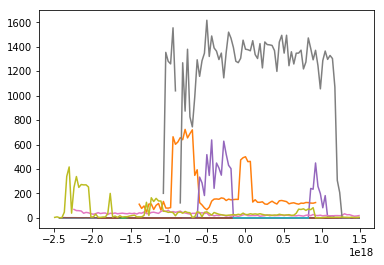

In [22]:
prec_list = list()
for i, v in enumerate(c):
    if i in [17,19,29,30,36,41,43,44,48,56]:
        prec_list.append(v)

plot_temp(prec_list)

17


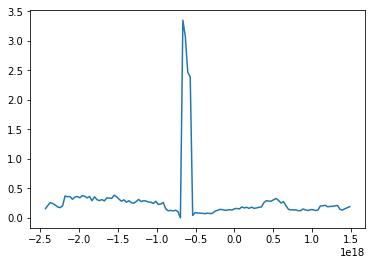

19


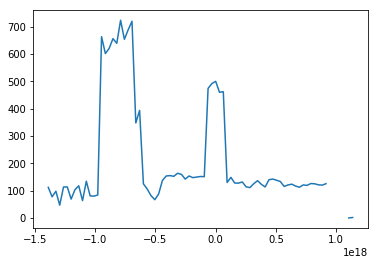

29


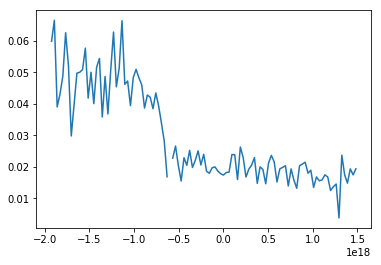

30


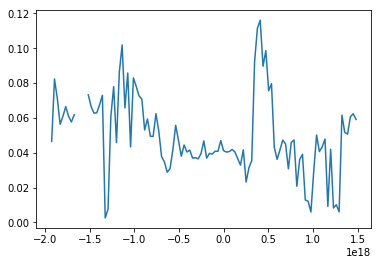

36


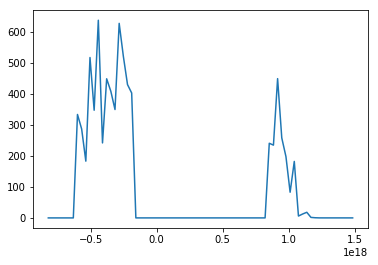

41


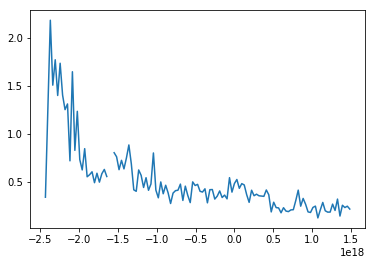

43


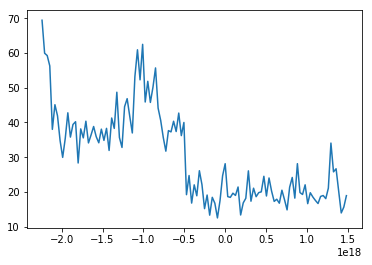

48


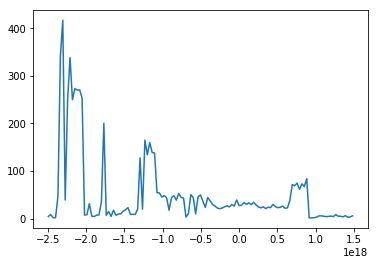

56


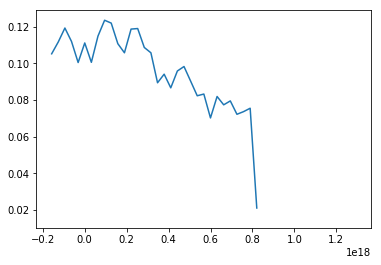

In [23]:
for i, v in enumerate(c):
    if i in [17,19,29,30,36,41,43,48,56]:
        print(i)
        plot_prec([v])

In [ ]:
# for i, v in enumerate(c):
#     if i in [29]:
#         temp_list.append(v)

In [ ]:
pd.concat(list(predict(c_temp[1])), axis=1)

In [ ]:
# fitting_errors = (ValueError, np.linalg.linalg.LinAlgError, TypeError)

# p = (3,0,2)

# prec_pred = run_arima(c_temp[1].prec, 10, p)



# try:
#     prec_pred = run_arima(c_temp[1].prec, 10, p)
# except fitting_errors as e:
#     print('prec model failed')
#     print(e)
# try:
#     temp_pred = run_arima(c_temp[1].temp, 10, p)
# except fitting_errors as e:
#     print('temp model failed')
#     print(e)

# try:
#     snow_pred = run_arima(c_temp[1].snow, 10, p)
# except fitting_errors as e:
#     print('snow model failed')
#     print(e)

# try:
#     forest_pred = run_arima(c_temp[1].forest.loc[pd.Timestamp("2002-01-01"):], 10, p)
# except fitting_errors as e:
#     print('forest model failed')
#     print(e)

